In [1]:
import numpy
import pandas
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.utils import to_categorical


from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm



# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


/Users/yangwm/miniconda2/envs/linkdata/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# load dataset
dataframe = pandas.read_csv("app/jupyter_test/car-dataset//car_evaluation.csv")

# Assign names to Columns
dataframe.columns = ['buying','maint','doors','persons','lug_boot','safety','classes']

# Encode Data
dataframe.buying.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
dataframe.maint.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
dataframe.doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
dataframe.persons.replace(('2','4','more'),(1,2,3), inplace=True)
dataframe.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
dataframe.safety.replace(('low','med','high'),(1,2,3), inplace=True)
dataframe.classes.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)
print(dataframe.head())

   buying  maint  doors  persons  lug_boot  safety  classes
0       1      1      1        1         1       2        1
1       1      1      1        1         1       3        1
2       1      1      1        1         2       1        1
3       1      1      1        1         2       2        1
4       1      1      1        1         2       3        1


In [4]:
print("dataframe.describe: ", dataframe.describe())

('dataframe.describe: ',             buying        maint        doors      persons     lug_boot  \
count  1727.000000  1727.000000  1727.000000  1727.000000  1727.000000   
mean      2.500869     2.500869     2.500869     2.000579     2.000579   
std       1.118098     1.118098     1.118098     0.816615     0.816615   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     1.000000     1.000000   
50%       3.000000     3.000000     3.000000     2.000000     2.000000   
75%       3.500000     3.500000     3.500000     3.000000     3.000000   
max       4.000000     4.000000     4.000000     3.000000     3.000000   

            safety      classes  
count  1727.000000  1727.000000  
mean      2.000579     1.415171  
std       0.816615     0.740847  
min       1.000000     1.000000  
25%       1.000000     1.000000  
50%       2.000000     1.000000  
75%       3.000000     2.000000  
max       3.000000     4.000000  )


(array([1209.,    0.,    0.,  384.,    0.,    0.,   69.,    0.,    0.,
          65.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

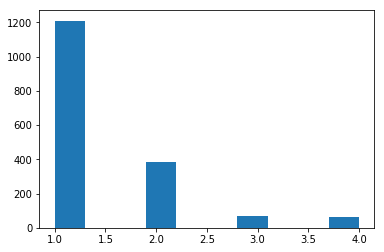

In [5]:
plt.hist((dataframe.classes))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15738a90>,
      dtype=object)

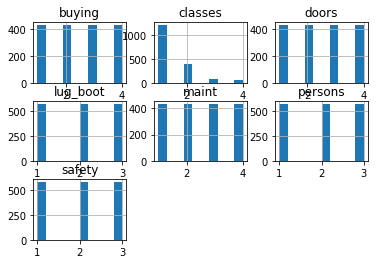

In [6]:
dataframe.hist()

In [7]:
dataset = dataframe.values


X = dataset[:,0:6]
Y = numpy.asarray(dataset[:,6], dtype="S6")


# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)


# create model
knn = KNeighborsClassifier()

knn.fit(X_Train, Y_Train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')

predictions = knn.predict(X_Test)

score = accuracy_score(Y_Test, predictions)
print(score)

0.9421965317919075


In [8]:
# create model
model = Sequential()
model.add(Dense(25, input_dim=6, init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='relu'))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_Train, Y_Train, epochs=600, batch_size=10)

# Evaluate the model
scores = model.evaluate(X_Test, Y_Test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/Users/yangwm/miniconda2/envs/linkdata/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="relu", kernel_initializer="uniform", input_dim=6)`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yangwm/miniconda2/envs/linkdata/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="uniform", kernel_constraint=<keras.con...)`
  after removing the cwd from sys.path.
/Users/yangwm/miniconda2/envs/linkdata/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  
/Users/yangwm/miniconda2/envs/linkdata/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initialize

Epoch 1/600


  10/1381 [..............................] - ETA: 1:17 - loss: 3.7000 - acc: 0.0000e+00

 140/1381 [==>...........................] - ETA: 5s - loss: 2.7013 - acc: 0.0000e+00  

 270/1381 [====>.........................] - ETA: 2s - loss: 2.5837 - acc: 0.0000e+00

 400/1381 [=======>......................] - ETA: 1s - loss: 2.4815 - acc: 0.0000e+00

 530/1381 [==========>...................] - ETA: 1s - loss: 2.3258 - acc: 0.0000e+00

 640/1381 [============>.................] - ETA: 0s - loss: 2.1612 - acc: 0.0625    

 760/1381 [===============>..............] - ETA: 0s - loss: 1.9173 - acc: 0.1513

 890/1381 [==================>...........] - ETA: 0s - loss: 1.7066 - acc: 0.1978

1020/1381 [=====================>........] - ETA: 0s - loss: 1.5356 - acc: 0.2569

1130/1381 [=======================>......] - ETA: 0s - loss: 1.4453 - acc: 0.2947

1250/1381 [==========================>...] - ETA: 0s - loss: 1.3487 - acc: 0.3248

1350/1381 [============================>.] - ETA: 0s - loss: 1.2845 - acc: 0.3481

1381/1381 [==============================] - 1s 837us/step - loss: 1.2624 - acc: 0.3548


Epoch 2/600
  10/1381 [..............................] - ETA: 1s - loss: 0.3076 - acc: 0.7000

 120/1381 [=>............................] - ETA: 0s - loss: 0.5155 - acc: 0.6500

 190/1381 [===>..........................] - ETA: 0s - loss: 0.4794 - acc: 0.6526

 280/1381 [=====>........................] - ETA: 0s - loss: 0.5421 - acc: 0.6571

 370/1381 [=======>......................] - ETA: 0s - loss: 0.5364 - acc: 0.6405

 460/1381 [========>.....................] - ETA: 0s - loss: 0.5235 - acc: 0.6283

 550/1381 [==========>...................] - ETA: 0s - loss: 0.5015 - acc: 0.6382

 670/1381 [=============>................] - ETA: 0s - loss: 0.5074 - acc: 0.6373

 810/1381 [================>.............] - ETA: 0s - loss: 0.4965 - acc: 0.6272

1010/1381 [====================>.........] - ETA: 0s - loss: 0.4703 - acc: 0.6406

1200/1381 [=========================>....] - ETA: 0s - loss: 0.4608 - acc: 0.6292

1381/1381 [==============================] - 1s 422us/step - loss: 0.4676 - acc: 0.6307


Epoch 3/600
  10/1381 [..............................] - ETA: 0s - loss: 0.7858 - acc: 0.4000

 110/1381 [=>............................] - ETA: 0s - loss: 0.4955 - acc: 0.6273

 210/1381 [===>..........................] - ETA: 0s - loss: 0.4526 - acc: 0.6524

 320/1381 [=====>........................] - ETA: 0s - loss: 0.4732 - acc: 0.6344

 440/1381 [========>.....................] - ETA: 0s - loss: 0.4659 - acc: 0.6477

 550/1381 [==========>...................] - ETA: 0s - loss: 0.4530 - acc: 0.6491

 660/1381 [=============>................] - ETA: 0s - loss: 0.4382 - acc: 0.6455

 750/1381 [===============>..............] - ETA: 0s - loss: 0.4505 - acc: 0.6413

 840/1381 [=================>............] - ETA: 0s - loss: 0.4602 - acc: 0.6417

 940/1381 [===================>..........] - ETA: 0s - loss: 0.4582 - acc: 0.6319

1030/1381 [=====================>........] - ETA: 0s - loss: 0.4513 - acc: 0.6359

1130/1381 [=======================>......] - ETA: 0s - loss: 0.4287 - acc: 0.6487

1220/1381 [=========================>....] - ETA: 0s - loss: 0.4332 - acc: 0.6500

1310/1381 [===========================>..] - ETA: 0s - loss: 0.4382 - acc: 0.6496

1381/1381 [==============================] - 1s 537us/step - loss: 0.4316 - acc: 0.6517


Epoch 4/600
  10/1381 [..............................] - ETA: 1s - loss: 0.9443 - acc: 0.5000

  90/1381 [>.............................] - ETA: 0s - loss: 0.6445 - acc: 0.6222

 180/1381 [==>...........................] - ETA: 0s - loss: 0.4970 - acc: 0.6556

 270/1381 [====>.........................] - ETA: 0s - loss: 0.4452 - acc: 0.6741

 370/1381 [=======>......................] - ETA: 0s - loss: 0.4846 - acc: 0.6459

 480/1381 [=========>....................] - ETA: 0s - loss: 0.4840 - acc: 0.6417

 600/1381 [============>.................] - ETA: 0s - loss: 0.4611 - acc: 0.6600

 730/1381 [==============>...............] - ETA: 0s - loss: 0.4449 - acc: 0.6658

 850/1381 [=================>............] - ETA: 0s - loss: 0.4422 - acc: 0.6659

 970/1381 [====================>.........] - ETA: 0s - loss: 0.4412 - acc: 0.6619

1090/1381 [======================>.......] - ETA: 0s - loss: 0.4449 - acc: 0.6615

1220/1381 [=========================>....] - ETA: 0s - loss: 0.4381 - acc: 0.6582

1340/1381 [============================>.] - ETA: 0s - loss: 0.4296 - acc: 0.6537

1381/1381 [==============================] - 1s 476us/step - loss: 0.4226 - acc: 0.6589


Epoch 5/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1677 - acc: 0.6000

 110/1381 [=>............................] - ETA: 0s - loss: 0.4924 - acc: 0.6727

 220/1381 [===>..........................] - ETA: 0s - loss: 0.4542 - acc: 0.6682

 340/1381 [======>.......................] - ETA: 0s - loss: 0.3968 - acc: 0.6529

 450/1381 [========>.....................] - ETA: 0s - loss: 0.3991 - acc: 0.6622

 580/1381 [===========>..................] - ETA: 0s - loss: 0.3825 - acc: 0.6724

 710/1381 [==============>...............] - ETA: 0s - loss: 0.4186 - acc: 0.6620

 840/1381 [=================>............] - ETA: 0s - loss: 0.4300 - acc: 0.6560

 970/1381 [====================>.........] - ETA: 0s - loss: 0.4214 - acc: 0.6526

1100/1381 [======================>.......] - ETA: 0s - loss: 0.4201 - acc: 0.6600

1220/1381 [=========================>....] - ETA: 0s - loss: 0.4114 - acc: 0.6689

1320/1381 [===========================>..] - ETA: 0s - loss: 0.4202 - acc: 0.6545

1381/1381 [==============================] - 1s 443us/step - loss: 0.4129 - acc: 0.6560


Epoch 6/600


  10/1381 [..............................] - ETA: 0s - loss: 0.7393 - acc: 0.9000

  90/1381 [>.............................] - ETA: 0s - loss: 0.4729 - acc: 0.7667

 180/1381 [==>...........................] - ETA: 0s - loss: 0.4523 - acc: 0.7389

 260/1381 [====>.........................] - ETA: 0s - loss: 0.4212 - acc: 0.7154

 370/1381 [=======>......................] - ETA: 0s - loss: 0.4394 - acc: 0.7054

 480/1381 [=========>....................] - ETA: 0s - loss: 0.4223 - acc: 0.7021

 600/1381 [============>.................] - ETA: 0s - loss: 0.4028 - acc: 0.7067

 710/1381 [==============>...............] - ETA: 0s - loss: 0.4065 - acc: 0.6972

 840/1381 [=================>............] - ETA: 0s - loss: 0.3998 - acc: 0.6988

 970/1381 [====================>.........] - ETA: 0s - loss: 0.4136 - acc: 0.6918

1090/1381 [======================>.......] - ETA: 0s - loss: 0.4064 - acc: 0.6890

1230/1381 [=========================>....] - ETA: 0s - loss: 0.4058 - acc: 0.6935

1350/1381 [============================>.] - ETA: 0s - loss: 0.4050 - acc: 0.6867

1381/1381 [==============================] - 1s 465us/step - loss: 0.4062 - acc: 0.6850


Epoch 7/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1343 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2209 - acc: 0.8100

 220/1381 [===>..........................] - ETA: 0s - loss: 0.3031 - acc: 0.7273

 340/1381 [======>.......................] - ETA: 0s - loss: 0.3294 - acc: 0.6882

 460/1381 [========>.....................] - ETA: 0s - loss: 0.3408 - acc: 0.6783

 590/1381 [===========>..................] - ETA: 0s - loss: 0.3519 - acc: 0.6695

 710/1381 [==============>...............] - ETA: 0s - loss: 0.3528 - acc: 0.6845

 840/1381 [=================>............] - ETA: 0s - loss: 0.3642 - acc: 0.6857

 970/1381 [====================>.........] - ETA: 0s - loss: 0.3736 - acc: 0.6856

1100/1381 [======================>.......] - ETA: 0s - loss: 0.3884 - acc: 0.6755

1220/1381 [=========================>....] - ETA: 0s - loss: 0.3945 - acc: 0.6697

1350/1381 [============================>.] - ETA: 0s - loss: 0.3978 - acc: 0.6644

1381/1381 [==============================] - 1s 427us/step - loss: 0.3922 - acc: 0.6698


Epoch 8/600
  10/1381 [..............................] - ETA: 0s - loss: 0.5675 - acc: 0.7000

 110/1381 [=>............................] - ETA: 0s - loss: 0.3130 - acc: 0.7091

 240/1381 [====>.........................] - ETA: 0s - loss: 0.3295 - acc: 0.7292

 360/1381 [======>.......................] - ETA: 0s - loss: 0.3523 - acc: 0.6944

 470/1381 [=========>....................] - ETA: 0s - loss: 0.3493 - acc: 0.6957

 600/1381 [============>.................] - ETA: 0s - loss: 0.3516 - acc: 0.6917

 730/1381 [==============>...............] - ETA: 0s - loss: 0.3767 - acc: 0.6863

 860/1381 [=================>............] - ETA: 0s - loss: 0.3890 - acc: 0.6767

1000/1381 [====================>.........] - ETA: 0s - loss: 0.4007 - acc: 0.6810

1110/1381 [=======================>......] - ETA: 0s - loss: 0.4029 - acc: 0.6820

1220/1381 [=========================>....] - ETA: 0s - loss: 0.3950 - acc: 0.6811

1330/1381 [===========================>..] - ETA: 0s - loss: 0.3961 - acc: 0.6865

1381/1381 [==============================] - 1s 440us/step - loss: 0.3947 - acc: 0.6836


Epoch 9/600
  10/1381 [..............................] - ETA: 1s - loss: 0.0843 - acc: 0.9000

 110/1381 [=>............................] - ETA: 0s - loss: 0.2778 - acc: 0.7545

 200/1381 [===>..........................] - ETA: 0s - loss: 0.2821 - acc: 0.7550

 320/1381 [=====>........................] - ETA: 0s - loss: 0.3019 - acc: 0.7406

 430/1381 [========>.....................] - ETA: 0s - loss: 0.3291 - acc: 0.7093

 550/1381 [==========>...................] - ETA: 0s - loss: 0.3389 - acc: 0.7145

 660/1381 [=============>................] - ETA: 0s - loss: 0.3467 - acc: 0.7091

 770/1381 [===============>..............] - ETA: 0s - loss: 0.3643 - acc: 0.6987

 880/1381 [==================>...........] - ETA: 0s - loss: 0.3664 - acc: 0.6920

1000/1381 [====================>.........] - ETA: 0s - loss: 0.3769 - acc: 0.6890

1120/1381 [=======================>......] - ETA: 0s - loss: 0.3956 - acc: 0.6848

1240/1381 [=========================>....] - ETA: 0s - loss: 0.3872 - acc: 0.6798

1360/1381 [============================>.] - ETA: 0s - loss: 0.3885 - acc: 0.6787

1381/1381 [==============================] - 1s 466us/step - loss: 0.3866 - acc: 0.6799


Epoch 10/600
  10/1381 [..............................] - ETA: 0s - loss: 1.0404 - acc: 0.4000

 110/1381 [=>............................] - ETA: 0s - loss: 0.3929 - acc: 0.6273

 200/1381 [===>..........................] - ETA: 0s - loss: 0.4037 - acc: 0.6050

 320/1381 [=====>........................] - ETA: 0s - loss: 0.4245 - acc: 0.6188

 440/1381 [========>.....................] - ETA: 0s - loss: 0.4238 - acc: 0.6364

 550/1381 [==========>...................] - ETA: 0s - loss: 0.4284 - acc: 0.6364

 660/1381 [=============>................] - ETA: 0s - loss: 0.4018 - acc: 0.6576

 760/1381 [===============>..............] - ETA: 0s - loss: 0.3952 - acc: 0.6684

 880/1381 [==================>...........] - ETA: 0s - loss: 0.3977 - acc: 0.6795

 990/1381 [====================>.........] - ETA: 0s - loss: 0.3929 - acc: 0.6798

1120/1381 [=======================>......] - ETA: 0s - loss: 0.3726 - acc: 0.6920

1230/1381 [=========================>....] - ETA: 0s - loss: 0.3689 - acc: 0.6967

1300/1381 [===========================>..] - ETA: 0s - loss: 0.3793 - acc: 0.6900

1380/1381 [============================>.] - ETA: 0s - loss: 0.3796 - acc: 0.6891

1381/1381 [==============================] - 1s 512us/step - loss: 0.3793 - acc: 0.6894


Epoch 11/600
  10/1381 [..............................] - ETA: 1s - loss: 0.3724 - acc: 0.5000

  80/1381 [>.............................] - ETA: 1s - loss: 0.2884 - acc: 0.6875

 190/1381 [===>..........................] - ETA: 0s - loss: 0.4053 - acc: 0.6632

 250/1381 [====>.........................] - ETA: 0s - loss: 0.4005 - acc: 0.6680

 310/1381 [=====>........................] - ETA: 0s - loss: 0.4175 - acc: 0.6452

 370/1381 [=======>......................] - ETA: 0s - loss: 0.4216 - acc: 0.6378

 440/1381 [========>.....................] - ETA: 0s - loss: 0.3991 - acc: 0.6409

 600/1381 [============>.................] - ETA: 0s - loss: 0.3879 - acc: 0.6500

 830/1381 [=================>............] - ETA: 0s - loss: 0.3936 - acc: 0.6614

1080/1381 [======================>.......] - ETA: 0s - loss: 0.3789 - acc: 0.6657

1260/1381 [==========================>...] - ETA: 0s - loss: 0.3800 - acc: 0.6730

1300/1381 [===========================>..] - ETA: 0s - loss: 0.3779 - acc: 0.6731

1360/1381 [============================>.] - ETA: 0s - loss: 0.3737 - acc: 0.6735

1381/1381 [==============================] - 1s 496us/step - loss: 0.3705 - acc: 0.6734


Epoch 12/600
  10/1381 [..............................] - ETA: 0s - loss: 0.4655 - acc: 0.6000

  60/1381 [>.............................] - ETA: 1s - loss: 0.3506 - acc: 0.7000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.3208 - acc: 0.7143

 220/1381 [===>..........................] - ETA: 0s - loss: 0.3834 - acc: 0.7182

 260/1381 [====>.........................] - ETA: 0s - loss: 0.3620 - acc: 0.7192

 410/1381 [=======>......................] - ETA: 0s - loss: 0.3882 - acc: 0.6756

 450/1381 [========>.....................] - ETA: 0s - loss: 0.4021 - acc: 0.6667

 490/1381 [=========>....................] - ETA: 0s - loss: 0.4005 - acc: 0.6735

 570/1381 [===========>..................] - ETA: 0s - loss: 0.3807 - acc: 0.6789

 620/1381 [============>.................] - ETA: 0s - loss: 0.3845 - acc: 0.6726

 670/1381 [=============>................] - ETA: 0s - loss: 0.3811 - acc: 0.6776

 700/1381 [==============>...............] - ETA: 0s - loss: 0.3736 - acc: 0.6786

 790/1381 [================>.............] - ETA: 0s - loss: 0.3549 - acc: 0.6899

 870/1381 [=================>............] - ETA: 0s - loss: 0.3483 - acc: 0.6966

 910/1381 [==================>...........] - ETA: 0s - loss: 0.3528 - acc: 0.6901

 970/1381 [====================>.........] - ETA: 0s - loss: 0.3509 - acc: 0.6897

1050/1381 [=====================>........] - ETA: 0s - loss: 0.3478 - acc: 0.6924

1180/1381 [========================>.....] - ETA: 0s - loss: 0.3623 - acc: 0.6847

1290/1381 [===========================>..] - ETA: 0s - loss: 0.3559 - acc: 0.6891

1370/1381 [============================>.] - ETA: 0s - loss: 0.3632 - acc: 0.6898

1381/1381 [==============================] - 1s 867us/step - loss: 0.3627 - acc: 0.6908


Epoch 13/600


  10/1381 [..............................] - ETA: 1s - loss: 0.1827 - acc: 0.6000

  90/1381 [>.............................] - ETA: 0s - loss: 0.3467 - acc: 0.6111

 150/1381 [==>...........................] - ETA: 1s - loss: 0.3687 - acc: 0.6333

 180/1381 [==>...........................] - ETA: 1s - loss: 0.3657 - acc: 0.6556

 250/1381 [====>.........................] - ETA: 1s - loss: 0.3362 - acc: 0.6480

 330/1381 [======>.......................] - ETA: 1s - loss: 0.3757 - acc: 0.6697

 340/1381 [======>.......................] - ETA: 1s - loss: 0.3843 - acc: 0.6676

 380/1381 [=======>......................] - ETA: 1s - loss: 0.3994 - acc: 0.6605

 440/1381 [========>.....................] - ETA: 1s - loss: 0.3927 - acc: 0.6614

 510/1381 [==========>...................] - ETA: 1s - loss: 0.3959 - acc: 0.6510

 560/1381 [===========>..................] - ETA: 1s - loss: 0.3818 - acc: 0.6571

 620/1381 [============>.................] - ETA: 0s - loss: 0.3720 - acc: 0.6677

 680/1381 [=============>................] - ETA: 0s - loss: 0.3782 - acc: 0.6765

 710/1381 [==============>...............] - ETA: 0s - loss: 0.3810 - acc: 0.6789

 780/1381 [===============>..............] - ETA: 0s - loss: 0.3787 - acc: 0.6808

 860/1381 [=================>............] - ETA: 0s - loss: 0.3698 - acc: 0.6872

 920/1381 [==================>...........] - ETA: 0s - loss: 0.3649 - acc: 0.6891

 980/1381 [====================>.........] - ETA: 0s - loss: 0.3754 - acc: 0.6867

1040/1381 [=====================>........] - ETA: 0s - loss: 0.3761 - acc: 0.6894

1090/1381 [======================>.......] - ETA: 0s - loss: 0.3700 - acc: 0.6945

1150/1381 [=======================>......] - ETA: 0s - loss: 0.3696 - acc: 0.6948

1230/1381 [=========================>....] - ETA: 0s - loss: 0.3704 - acc: 0.6935

1320/1381 [===========================>..] - ETA: 0s - loss: 0.3742 - acc: 0.6902

1360/1381 [============================>.] - ETA: 0s - loss: 0.3726 - acc: 0.6912

1381/1381 [==============================] - 1s 1ms/step - loss: 0.3709 - acc: 0.6894


Epoch 14/600
  10/1381 [..............................] - ETA: 1s - loss: 0.0842 - acc: 1.0000

  50/1381 [>.............................] - ETA: 1s - loss: 0.2273 - acc: 0.7600

 130/1381 [=>............................] - ETA: 1s - loss: 0.2840 - acc: 0.7154

 200/1381 [===>..........................] - ETA: 1s - loss: 0.3524 - acc: 0.6900

 270/1381 [====>.........................] - ETA: 0s - loss: 0.3173 - acc: 0.7259

 380/1381 [=======>......................] - ETA: 0s - loss: 0.3280 - acc: 0.7395

 480/1381 [=========>....................] - ETA: 0s - loss: 0.3258 - acc: 0.7271

 540/1381 [==========>...................] - ETA: 0s - loss: 0.3305 - acc: 0.7241

 570/1381 [===========>..................] - ETA: 0s - loss: 0.3337 - acc: 0.7193

 640/1381 [============>.................] - ETA: 0s - loss: 0.3334 - acc: 0.7188

 730/1381 [==============>...............] - ETA: 0s - loss: 0.3352 - acc: 0.7055

 810/1381 [================>.............] - ETA: 0s - loss: 0.3385 - acc: 0.7111

 910/1381 [==================>...........] - ETA: 0s - loss: 0.3436 - acc: 0.7132

1020/1381 [=====================>........] - ETA: 0s - loss: 0.3497 - acc: 0.7078

1140/1381 [=======================>......] - ETA: 0s - loss: 0.3527 - acc: 0.7000

1270/1381 [==========================>...] - ETA: 0s - loss: 0.3634 - acc: 0.6906

1381/1381 [==============================] - 1s 620us/step - loss: 0.3625 - acc: 0.6923


Epoch 15/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1500 - acc: 0.8000

  90/1381 [>.............................] - ETA: 0s - loss: 0.5652 - acc: 0.6444

 200/1381 [===>..........................] - ETA: 0s - loss: 0.4838 - acc: 0.6200

 320/1381 [=====>........................] - ETA: 0s - loss: 0.4431 - acc: 0.6344

 440/1381 [========>.....................] - ETA: 0s - loss: 0.4288 - acc: 0.6523

 520/1381 [==========>...................] - ETA: 0s - loss: 0.4297 - acc: 0.6423

 570/1381 [===========>..................] - ETA: 0s - loss: 0.4167 - acc: 0.6404

 610/1381 [============>.................] - ETA: 0s - loss: 0.4057 - acc: 0.6541

 660/1381 [=============>................] - ETA: 0s - loss: 0.4076 - acc: 0.6545

 730/1381 [==============>...............] - ETA: 0s - loss: 0.3889 - acc: 0.6658

 800/1381 [================>.............] - ETA: 0s - loss: 0.3990 - acc: 0.6700

 880/1381 [==================>...........] - ETA: 0s - loss: 0.4038 - acc: 0.6636

 960/1381 [===================>..........] - ETA: 0s - loss: 0.4001 - acc: 0.6708

1050/1381 [=====================>........] - ETA: 0s - loss: 0.3850 - acc: 0.6752

1150/1381 [=======================>......] - ETA: 0s - loss: 0.3764 - acc: 0.6800

1240/1381 [=========================>....] - ETA: 0s - loss: 0.3674 - acc: 0.6831

1340/1381 [============================>.] - ETA: 0s - loss: 0.3636 - acc: 0.6851

1381/1381 [==============================] - 1s 627us/step - loss: 0.3621 - acc: 0.6879


Epoch 16/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1946 - acc: 0.8000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2604 - acc: 0.7667

 160/1381 [==>...........................] - ETA: 0s - loss: 0.2532 - acc: 0.7563

 250/1381 [====>.........................] - ETA: 0s - loss: 0.3484 - acc: 0.7120

 330/1381 [======>.......................] - ETA: 0s - loss: 0.3290 - acc: 0.7061

 420/1381 [========>.....................] - ETA: 0s - loss: 0.3308 - acc: 0.7024

 490/1381 [=========>....................] - ETA: 0s - loss: 0.3243 - acc: 0.7020

 560/1381 [===========>..................] - ETA: 0s - loss: 0.3356 - acc: 0.6964

 640/1381 [============>.................] - ETA: 0s - loss: 0.3382 - acc: 0.6969

 710/1381 [==============>...............] - ETA: 0s - loss: 0.3409 - acc: 0.7000

 770/1381 [===============>..............] - ETA: 0s - loss: 0.3338 - acc: 0.7026

 800/1381 [================>.............] - ETA: 0s - loss: 0.3359 - acc: 0.6975

 810/1381 [================>.............] - ETA: 0s - loss: 0.3366 - acc: 0.6975

 820/1381 [================>.............] - ETA: 0s - loss: 0.3402 - acc: 0.6939

 860/1381 [=================>............] - ETA: 0s - loss: 0.3545 - acc: 0.6860

 910/1381 [==================>...........] - ETA: 0s - loss: 0.3488 - acc: 0.6868

 960/1381 [===================>..........] - ETA: 0s - loss: 0.3496 - acc: 0.6854

1030/1381 [=====================>........] - ETA: 0s - loss: 0.3505 - acc: 0.6874

1120/1381 [=======================>......] - ETA: 0s - loss: 0.3445 - acc: 0.6875

1230/1381 [=========================>....] - ETA: 0s - loss: 0.3428 - acc: 0.6821

1330/1381 [===========================>..] - ETA: 0s - loss: 0.3482 - acc: 0.6820

1381/1381 [==============================] - 1s 816us/step - loss: 0.3493 - acc: 0.6828


Epoch 17/600
  10/1381 [..............................] - ETA: 1s - loss: 0.3469 - acc: 0.5000

 100/1381 [=>............................] - ETA: 0s - loss: 0.4327 - acc: 0.5500

 210/1381 [===>..........................] - ETA: 0s - loss: 0.3459 - acc: 0.6714

 290/1381 [=====>........................] - ETA: 0s - loss: 0.3564 - acc: 0.6655

 390/1381 [=======>......................] - ETA: 0s - loss: 0.3842 - acc: 0.6564

 450/1381 [========>.....................] - ETA: 0s - loss: 0.3759 - acc: 0.6511

 490/1381 [=========>....................] - ETA: 0s - loss: 0.3800 - acc: 0.6551

 530/1381 [==========>...................] - ETA: 0s - loss: 0.3803 - acc: 0.6642

 580/1381 [===========>..................] - ETA: 0s - loss: 0.3712 - acc: 0.6672

 670/1381 [=============>................] - ETA: 0s - loss: 0.3563 - acc: 0.6731

 740/1381 [===============>..............] - ETA: 0s - loss: 0.3438 - acc: 0.6851

 840/1381 [=================>............] - ETA: 0s - loss: 0.3408 - acc: 0.6952

 920/1381 [==================>...........] - ETA: 0s - loss: 0.3433 - acc: 0.6902

 990/1381 [====================>.........] - ETA: 0s - loss: 0.3396 - acc: 0.6949

1080/1381 [======================>.......] - ETA: 0s - loss: 0.3486 - acc: 0.6981

1160/1381 [========================>.....] - ETA: 0s - loss: 0.3471 - acc: 0.6983

1230/1381 [=========================>....] - ETA: 0s - loss: 0.3507 - acc: 0.6984

1300/1381 [===========================>..] - ETA: 0s - loss: 0.3520 - acc: 0.6977

1381/1381 [==============================] - 1s 708us/step - loss: 0.3489 - acc: 0.6937


Epoch 18/600
  10/1381 [..............................] - ETA: 3s - loss: 0.1637 - acc: 0.8000

  70/1381 [>.............................] - ETA: 1s - loss: 0.2644 - acc: 0.7857

 140/1381 [==>...........................] - ETA: 1s - loss: 0.2500 - acc: 0.8071

 220/1381 [===>..........................] - ETA: 0s - loss: 0.2861 - acc: 0.7636

 310/1381 [=====>........................] - ETA: 0s - loss: 0.3096 - acc: 0.7387

 400/1381 [=======>......................] - ETA: 0s - loss: 0.3355 - acc: 0.7300

 490/1381 [=========>....................] - ETA: 0s - loss: 0.3260 - acc: 0.7265

 590/1381 [===========>..................] - ETA: 0s - loss: 0.3386 - acc: 0.7169

 670/1381 [=============>................] - ETA: 0s - loss: 0.3339 - acc: 0.7149

 740/1381 [===============>..............] - ETA: 0s - loss: 0.3484 - acc: 0.7081

 820/1381 [================>.............] - ETA: 0s - loss: 0.3583 - acc: 0.6951

 890/1381 [==================>...........] - ETA: 0s - loss: 0.3584 - acc: 0.6921

 970/1381 [====================>.........] - ETA: 0s - loss: 0.3519 - acc: 0.7010

1060/1381 [======================>.......] - ETA: 0s - loss: 0.3449 - acc: 0.7085

1150/1381 [=======================>......] - ETA: 0s - loss: 0.3583 - acc: 0.6983

1250/1381 [==========================>...] - ETA: 0s - loss: 0.3526 - acc: 0.7000

1350/1381 [============================>.] - ETA: 0s - loss: 0.3578 - acc: 0.7015

1381/1381 [==============================] - 1s 646us/step - loss: 0.3603 - acc: 0.7031


Epoch 19/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1936 - acc: 0.7000

  90/1381 [>.............................] - ETA: 0s - loss: 0.3078 - acc: 0.6889

 170/1381 [==>...........................] - ETA: 0s - loss: 0.3806 - acc: 0.6941

 270/1381 [====>.........................] - ETA: 0s - loss: 0.3609 - acc: 0.7000

 350/1381 [======>.......................] - ETA: 0s - loss: 0.3730 - acc: 0.6686

 410/1381 [=======>......................] - ETA: 0s - loss: 0.3887 - acc: 0.6732

 490/1381 [=========>....................] - ETA: 0s - loss: 0.3717 - acc: 0.6959

 560/1381 [===========>..................] - ETA: 0s - loss: 0.3618 - acc: 0.7000

 650/1381 [=============>................] - ETA: 0s - loss: 0.3527 - acc: 0.6985

 750/1381 [===============>..............] - ETA: 0s - loss: 0.3341 - acc: 0.7107

 850/1381 [=================>............] - ETA: 0s - loss: 0.3232 - acc: 0.7129

 950/1381 [===================>..........] - ETA: 0s - loss: 0.3290 - acc: 0.7147

1060/1381 [======================>.......] - ETA: 0s - loss: 0.3400 - acc: 0.7038

1160/1381 [========================>.....] - ETA: 0s - loss: 0.3371 - acc: 0.7052

1250/1381 [==========================>...] - ETA: 0s - loss: 0.3368 - acc: 0.7104

1330/1381 [===========================>..] - ETA: 0s - loss: 0.3326 - acc: 0.7120

1381/1381 [==============================] - 1s 619us/step - loss: 0.3326 - acc: 0.7154


Epoch 20/600
  10/1381 [..............................] - ETA: 3s - loss: 0.4741 - acc: 0.5000

  80/1381 [>.............................] - ETA: 1s - loss: 0.3556 - acc: 0.7000

 140/1381 [==>...........................] - ETA: 1s - loss: 0.3047 - acc: 0.7429

 220/1381 [===>..........................] - ETA: 0s - loss: 0.3680 - acc: 0.6909

 310/1381 [=====>........................] - ETA: 0s - loss: 0.3627 - acc: 0.6968

 410/1381 [=======>......................] - ETA: 0s - loss: 0.3671 - acc: 0.6976

 510/1381 [==========>...................] - ETA: 0s - loss: 0.3599 - acc: 0.7137

 600/1381 [============>.................] - ETA: 0s - loss: 0.3492 - acc: 0.7167

 690/1381 [=============>................] - ETA: 0s - loss: 0.3413 - acc: 0.7130

 790/1381 [================>.............] - ETA: 0s - loss: 0.3296 - acc: 0.7190

 890/1381 [==================>...........] - ETA: 0s - loss: 0.3262 - acc: 0.7180

 970/1381 [====================>.........] - ETA: 0s - loss: 0.3233 - acc: 0.7175

1050/1381 [=====================>........] - ETA: 0s - loss: 0.3383 - acc: 0.7114

1120/1381 [=======================>......] - ETA: 0s - loss: 0.3404 - acc: 0.7125

1210/1381 [=========================>....] - ETA: 0s - loss: 0.3398 - acc: 0.7066

1310/1381 [===========================>..] - ETA: 0s - loss: 0.3362 - acc: 0.7069

1381/1381 [==============================] - 1s 618us/step - loss: 0.3354 - acc: 0.7009


Epoch 21/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1886 - acc: 0.6000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2672 - acc: 0.7667

 180/1381 [==>...........................] - ETA: 0s - loss: 0.3386 - acc: 0.7444

 280/1381 [=====>........................] - ETA: 0s - loss: 0.3168 - acc: 0.7393

 380/1381 [=======>......................] - ETA: 0s - loss: 0.2952 - acc: 0.7421

 480/1381 [=========>....................] - ETA: 0s - loss: 0.2997 - acc: 0.7417

 590/1381 [===========>..................] - ETA: 0s - loss: 0.2997 - acc: 0.7390

 690/1381 [=============>................] - ETA: 0s - loss: 0.3016 - acc: 0.7246

 790/1381 [================>.............] - ETA: 0s - loss: 0.2984 - acc: 0.7266

 910/1381 [==================>...........] - ETA: 0s - loss: 0.3008 - acc: 0.7231

1010/1381 [====================>.........] - ETA: 0s - loss: 0.3134 - acc: 0.7129

1130/1381 [=======================>......] - ETA: 0s - loss: 0.3173 - acc: 0.7142

1260/1381 [==========================>...] - ETA: 0s - loss: 0.3127 - acc: 0.7119

1380/1381 [============================>.] - ETA: 0s - loss: 0.3191 - acc: 0.7152

1381/1381 [==============================] - 1s 494us/step - loss: 0.3203 - acc: 0.7147


Epoch 22/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2477 - acc: 0.7000

  80/1381 [>.............................] - ETA: 0s - loss: 0.3713 - acc: 0.6625

 180/1381 [==>...........................] - ETA: 0s - loss: 0.3099 - acc: 0.6889

 290/1381 [=====>........................] - ETA: 0s - loss: 0.3143 - acc: 0.6966

 400/1381 [=======>......................] - ETA: 0s - loss: 0.2921 - acc: 0.7200

 520/1381 [==========>...................] - ETA: 0s - loss: 0.3004 - acc: 0.7154

 650/1381 [=============>................] - ETA: 0s - loss: 0.3215 - acc: 0.7077

 760/1381 [===============>..............] - ETA: 0s - loss: 0.3368 - acc: 0.6974

 870/1381 [=================>............] - ETA: 0s - loss: 0.3368 - acc: 0.6908

 980/1381 [====================>.........] - ETA: 0s - loss: 0.3287 - acc: 0.6990

1100/1381 [======================>.......] - ETA: 0s - loss: 0.3199 - acc: 0.7082

1220/1381 [=========================>....] - ETA: 0s - loss: 0.3160 - acc: 0.7090

1350/1381 [============================>.] - ETA: 0s - loss: 0.3199 - acc: 0.7000

1381/1381 [==============================] - 1s 468us/step - loss: 0.3158 - acc: 0.7031


Epoch 23/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3497 - acc: 0.6000

 100/1381 [=>............................] - ETA: 0s - loss: 0.4049 - acc: 0.6700

 220/1381 [===>..........................] - ETA: 0s - loss: 0.3481 - acc: 0.6955

 340/1381 [======>.......................] - ETA: 0s - loss: 0.3321 - acc: 0.7000

 470/1381 [=========>....................] - ETA: 0s - loss: 0.3019 - acc: 0.7106

 600/1381 [============>.................] - ETA: 0s - loss: 0.2994 - acc: 0.7150

 730/1381 [==============>...............] - ETA: 0s - loss: 0.3154 - acc: 0.7068

 860/1381 [=================>............] - ETA: 0s - loss: 0.3132 - acc: 0.7116

 960/1381 [===================>..........] - ETA: 0s - loss: 0.3199 - acc: 0.7146

1060/1381 [======================>.......] - ETA: 0s - loss: 0.3124 - acc: 0.7179

1140/1381 [=======================>......] - ETA: 0s - loss: 0.3204 - acc: 0.7114

1230/1381 [=========================>....] - ETA: 0s - loss: 0.3266 - acc: 0.7163

1320/1381 [===========================>..] - ETA: 0s - loss: 0.3279 - acc: 0.7076

1381/1381 [==============================] - 1s 488us/step - loss: 0.3274 - acc: 0.7096


Epoch 24/600
  10/1381 [..............................] - ETA: 1s - loss: 0.5864 - acc: 0.7000

  90/1381 [>.............................] - ETA: 0s - loss: 0.3749 - acc: 0.7556

 180/1381 [==>...........................] - ETA: 0s - loss: 0.3564 - acc: 0.7389

 280/1381 [=====>........................] - ETA: 0s - loss: 0.3455 - acc: 0.7393

 380/1381 [=======>......................] - ETA: 0s - loss: 0.3206 - acc: 0.7395

 480/1381 [=========>....................] - ETA: 0s - loss: 0.3207 - acc: 0.7333

 580/1381 [===========>..................] - ETA: 0s - loss: 0.3138 - acc: 0.7276

 680/1381 [=============>................] - ETA: 0s - loss: 0.3187 - acc: 0.7206

 810/1381 [================>.............] - ETA: 0s - loss: 0.3065 - acc: 0.7284

 930/1381 [===================>..........] - ETA: 0s - loss: 0.3054 - acc: 0.7258

1060/1381 [======================>.......] - ETA: 0s - loss: 0.3024 - acc: 0.7292

1190/1381 [========================>.....] - ETA: 0s - loss: 0.3091 - acc: 0.7269

1310/1381 [===========================>..] - ETA: 0s - loss: 0.3110 - acc: 0.7237

1381/1381 [==============================] - 1s 485us/step - loss: 0.3132 - acc: 0.7219


Epoch 25/600


  10/1381 [..............................] - ETA: 0s - loss: 0.4342 - acc: 0.6000

 100/1381 [=>............................] - ETA: 0s - loss: 0.3030 - acc: 0.6700

 200/1381 [===>..........................] - ETA: 0s - loss: 0.3136 - acc: 0.6750

 320/1381 [=====>........................] - ETA: 0s - loss: 0.3078 - acc: 0.6906

 440/1381 [========>.....................] - ETA: 0s - loss: 0.2919 - acc: 0.7023

 550/1381 [==========>...................] - ETA: 0s - loss: 0.3025 - acc: 0.7073

 670/1381 [=============>................] - ETA: 0s - loss: 0.3044 - acc: 0.7119

 780/1381 [===============>..............] - ETA: 0s - loss: 0.3025 - acc: 0.7103

 900/1381 [==================>...........] - ETA: 0s - loss: 0.2998 - acc: 0.7167

1010/1381 [====================>.........] - ETA: 0s - loss: 0.3163 - acc: 0.7099

1120/1381 [=======================>......] - ETA: 0s - loss: 0.3223 - acc: 0.7152

1230/1381 [=========================>....] - ETA: 0s - loss: 0.3211 - acc: 0.7163

1360/1381 [============================>.] - ETA: 0s - loss: 0.3255 - acc: 0.7096

1381/1381 [==============================] - 1s 465us/step - loss: 0.3229 - acc: 0.7104


Epoch 26/600
  10/1381 [..............................] - ETA: 1s - loss: 0.2387 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.4019 - acc: 0.7200

 210/1381 [===>..........................] - ETA: 0s - loss: 0.3218 - acc: 0.7381

 330/1381 [======>.......................] - ETA: 0s - loss: 0.3429 - acc: 0.7212

 450/1381 [========>.....................] - ETA: 0s - loss: 0.3199 - acc: 0.7244

 570/1381 [===========>..................] - ETA: 0s - loss: 0.3055 - acc: 0.7316

 690/1381 [=============>................] - ETA: 0s - loss: 0.3068 - acc: 0.7217

 810/1381 [================>.............] - ETA: 0s - loss: 0.3150 - acc: 0.7148

 930/1381 [===================>..........] - ETA: 0s - loss: 0.3137 - acc: 0.7140

1040/1381 [=====================>........] - ETA: 0s - loss: 0.3121 - acc: 0.7183

1160/1381 [========================>.....] - ETA: 0s - loss: 0.3074 - acc: 0.7207

1290/1381 [===========================>..] - ETA: 0s - loss: 0.3055 - acc: 0.7178

1381/1381 [==============================] - 1s 448us/step - loss: 0.3142 - acc: 0.7154


Epoch 27/600


  10/1381 [..............................] - ETA: 0s - loss: 0.4302 - acc: 0.7000

 110/1381 [=>............................] - ETA: 0s - loss: 0.2864 - acc: 0.7091

 210/1381 [===>..........................] - ETA: 0s - loss: 0.2845 - acc: 0.6905

 320/1381 [=====>........................] - ETA: 0s - loss: 0.2479 - acc: 0.7187

 430/1381 [========>.....................] - ETA: 0s - loss: 0.2596 - acc: 0.7349

 550/1381 [==========>...................] - ETA: 0s - loss: 0.2455 - acc: 0.7491

 670/1381 [=============>................] - ETA: 0s - loss: 0.2486 - acc: 0.7358

 780/1381 [===============>..............] - ETA: 0s - loss: 0.2547 - acc: 0.7359

 900/1381 [==================>...........] - ETA: 0s - loss: 0.2762 - acc: 0.7200

1020/1381 [=====================>........] - ETA: 0s - loss: 0.2786 - acc: 0.7176

1140/1381 [=======================>......] - ETA: 0s - loss: 0.2879 - acc: 0.7175

1260/1381 [==========================>...] - ETA: 0s - loss: 0.2983 - acc: 0.7024

1380/1381 [============================>.] - ETA: 0s - loss: 0.3086 - acc: 0.7036

1381/1381 [==============================] - 1s 459us/step - loss: 0.3085 - acc: 0.7038


Epoch 28/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2115 - acc: 0.9000

  80/1381 [>.............................] - ETA: 0s - loss: 0.3382 - acc: 0.7250

 180/1381 [==>...........................] - ETA: 0s - loss: 0.3418 - acc: 0.7167

 300/1381 [=====>........................] - ETA: 0s - loss: 0.3331 - acc: 0.6800

 420/1381 [========>.....................] - ETA: 0s - loss: 0.3386 - acc: 0.6905

 540/1381 [==========>...................] - ETA: 0s - loss: 0.3335 - acc: 0.6926

 660/1381 [=============>................] - ETA: 0s - loss: 0.3245 - acc: 0.7000

 780/1381 [===============>..............] - ETA: 0s - loss: 0.3151 - acc: 0.7115

 900/1381 [==================>...........] - ETA: 0s - loss: 0.3066 - acc: 0.7200

 990/1381 [====================>.........] - ETA: 0s - loss: 0.2982 - acc: 0.7283

1080/1381 [======================>.......] - ETA: 0s - loss: 0.2928 - acc: 0.7287

1170/1381 [========================>.....] - ETA: 0s - loss: 0.2938 - acc: 0.7282

1240/1381 [=========================>....] - ETA: 0s - loss: 0.3024 - acc: 0.7242

1320/1381 [===========================>..] - ETA: 0s - loss: 0.3027 - acc: 0.7189

1381/1381 [==============================] - 1s 531us/step - loss: 0.2994 - acc: 0.7190


Epoch 29/600
  10/1381 [..............................] - ETA: 1s - loss: 0.2494 - acc: 0.7000

 120/1381 [=>............................] - ETA: 0s - loss: 0.2812 - acc: 0.7000

 200/1381 [===>..........................] - ETA: 0s - loss: 0.2593 - acc: 0.7100

 290/1381 [=====>........................] - ETA: 0s - loss: 0.2704 - acc: 0.7172

 380/1381 [=======>......................] - ETA: 0s - loss: 0.2548 - acc: 0.7368

 490/1381 [=========>....................] - ETA: 0s - loss: 0.2569 - acc: 0.7306

 620/1381 [============>.................] - ETA: 0s - loss: 0.2679 - acc: 0.7258

 740/1381 [===============>..............] - ETA: 0s - loss: 0.2813 - acc: 0.7189

 860/1381 [=================>............] - ETA: 0s - loss: 0.2750 - acc: 0.7256

 990/1381 [====================>.........] - ETA: 0s - loss: 0.2906 - acc: 0.7192

1110/1381 [=======================>......] - ETA: 0s - loss: 0.2840 - acc: 0.7207

1230/1381 [=========================>....] - ETA: 0s - loss: 0.2911 - acc: 0.7220

1350/1381 [============================>.] - ETA: 0s - loss: 0.2883 - acc: 0.7274

1381/1381 [==============================] - 1s 482us/step - loss: 0.2871 - acc: 0.7306


Epoch 30/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2170 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2428 - acc: 0.8000

 220/1381 [===>..........................] - ETA: 0s - loss: 0.2870 - acc: 0.7273

 350/1381 [======>.......................] - ETA: 0s - loss: 0.2723 - acc: 0.7200

 470/1381 [=========>....................] - ETA: 0s - loss: 0.2882 - acc: 0.7191

 600/1381 [============>.................] - ETA: 0s - loss: 0.2788 - acc: 0.7317

 710/1381 [==============>...............] - ETA: 0s - loss: 0.2939 - acc: 0.7239

 810/1381 [================>.............] - ETA: 0s - loss: 0.2854 - acc: 0.7309

 900/1381 [==================>...........] - ETA: 0s - loss: 0.2793 - acc: 0.7356

1010/1381 [====================>.........] - ETA: 0s - loss: 0.2824 - acc: 0.7297

1110/1381 [=======================>......] - ETA: 0s - loss: 0.2768 - acc: 0.7342

1210/1381 [=========================>....] - ETA: 0s - loss: 0.2783 - acc: 0.7372

1290/1381 [===========================>..] - ETA: 0s - loss: 0.2781 - acc: 0.7395

1380/1381 [============================>.] - ETA: 0s - loss: 0.2797 - acc: 0.7355

1381/1381 [==============================] - 1s 500us/step - loss: 0.2797 - acc: 0.7357


Epoch 31/600
  10/1381 [..............................] - ETA: 1s - loss: 0.1246 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2432 - acc: 0.7700

 190/1381 [===>..........................] - ETA: 0s - loss: 0.2297 - acc: 0.7684

 280/1381 [=====>........................] - ETA: 0s - loss: 0.2361 - acc: 0.7536

 370/1381 [=======>......................] - ETA: 0s - loss: 0.2422 - acc: 0.7432

 470/1381 [=========>....................] - ETA: 0s - loss: 0.2536 - acc: 0.7319

 560/1381 [===========>..................] - ETA: 0s - loss: 0.2626 - acc: 0.7196

 650/1381 [=============>................] - ETA: 0s - loss: 0.2526 - acc: 0.7262

 740/1381 [===============>..............] - ETA: 0s - loss: 0.2518 - acc: 0.7324

 830/1381 [=================>............] - ETA: 0s - loss: 0.2568 - acc: 0.7325

 920/1381 [==================>...........] - ETA: 0s - loss: 0.2696 - acc: 0.7293

1010/1381 [====================>.........] - ETA: 0s - loss: 0.2691 - acc: 0.7337

1100/1381 [======================>.......] - ETA: 0s - loss: 0.2735 - acc: 0.7327

1190/1381 [========================>.....] - ETA: 0s - loss: 0.2720 - acc: 0.7336

1280/1381 [==========================>...] - ETA: 0s - loss: 0.2762 - acc: 0.7320

1370/1381 [============================>.] - ETA: 0s - loss: 0.2773 - acc: 0.7336

1381/1381 [==============================] - 1s 596us/step - loss: 0.2771 - acc: 0.7335


Epoch 32/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3930 - acc: 0.7000

 100/1381 [=>............................] - ETA: 0s - loss: 0.3450 - acc: 0.7500

 190/1381 [===>..........................] - ETA: 0s - loss: 0.3204 - acc: 0.7579

 290/1381 [=====>........................] - ETA: 0s - loss: 0.3401 - acc: 0.7379

 410/1381 [=======>......................] - ETA: 0s - loss: 0.3101 - acc: 0.7415

 510/1381 [==========>...................] - ETA: 0s - loss: 0.2995 - acc: 0.7510

 600/1381 [============>.................] - ETA: 0s - loss: 0.2869 - acc: 0.7567

 690/1381 [=============>................] - ETA: 0s - loss: 0.2947 - acc: 0.7493

 780/1381 [===============>..............] - ETA: 0s - loss: 0.2957 - acc: 0.7500

 860/1381 [=================>............] - ETA: 0s - loss: 0.2925 - acc: 0.7523

 950/1381 [===================>..........] - ETA: 0s - loss: 0.2897 - acc: 0.7537

1040/1381 [=====================>........] - ETA: 0s - loss: 0.2844 - acc: 0.7529

1130/1381 [=======================>......] - ETA: 0s - loss: 0.2843 - acc: 0.7478

1220/1381 [=========================>....] - ETA: 0s - loss: 0.2859 - acc: 0.7516

1320/1381 [===========================>..] - ETA: 0s - loss: 0.2801 - acc: 0.7530

1381/1381 [==============================] - 1s 561us/step - loss: 0.2761 - acc: 0.7545


Epoch 33/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0943 - acc: 1.0000

 100/1381 [=>............................] - ETA: 0s - loss: 0.3414 - acc: 0.6600

 190/1381 [===>..........................] - ETA: 0s - loss: 0.3191 - acc: 0.7158

 310/1381 [=====>........................] - ETA: 0s - loss: 0.3069 - acc: 0.7258

 410/1381 [=======>......................] - ETA: 0s - loss: 0.2910 - acc: 0.7341

 490/1381 [=========>....................] - ETA: 0s - loss: 0.2945 - acc: 0.7327

 590/1381 [===========>..................] - ETA: 0s - loss: 0.2797 - acc: 0.7441

 690/1381 [=============>................] - ETA: 0s - loss: 0.2840 - acc: 0.7406

 790/1381 [================>.............] - ETA: 0s - loss: 0.2848 - acc: 0.7367

 910/1381 [==================>...........] - ETA: 0s - loss: 0.2805 - acc: 0.7396

1020/1381 [=====================>........] - ETA: 0s - loss: 0.2792 - acc: 0.7343

1120/1381 [=======================>......] - ETA: 0s - loss: 0.2760 - acc: 0.7339

1220/1381 [=========================>....] - ETA: 0s - loss: 0.2726 - acc: 0.7377

1310/1381 [===========================>..] - ETA: 0s - loss: 0.2759 - acc: 0.7397

1381/1381 [==============================] - 1s 538us/step - loss: 0.2703 - acc: 0.7466


Epoch 34/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2936 - acc: 0.6000

  80/1381 [>.............................] - ETA: 0s - loss: 0.2338 - acc: 0.7375

 160/1381 [==>...........................] - ETA: 0s - loss: 0.2848 - acc: 0.7375

 250/1381 [====>.........................] - ETA: 0s - loss: 0.2894 - acc: 0.7600

 340/1381 [======>.......................] - ETA: 0s - loss: 0.3110 - acc: 0.7441

 440/1381 [========>.....................] - ETA: 0s - loss: 0.2839 - acc: 0.7523

 550/1381 [==========>...................] - ETA: 0s - loss: 0.2724 - acc: 0.7582

 660/1381 [=============>................] - ETA: 0s - loss: 0.2674 - acc: 0.7545

 770/1381 [===============>..............] - ETA: 0s - loss: 0.2672 - acc: 0.7532

 870/1381 [=================>............] - ETA: 0s - loss: 0.2613 - acc: 0.7598

 970/1381 [====================>.........] - ETA: 0s - loss: 0.2575 - acc: 0.7588

1050/1381 [=====================>........] - ETA: 0s - loss: 0.2566 - acc: 0.7600

1150/1381 [=======================>......] - ETA: 0s - loss: 0.2530 - acc: 0.7600

1240/1381 [=========================>....] - ETA: 0s - loss: 0.2492 - acc: 0.7621

1330/1381 [===========================>..] - ETA: 0s - loss: 0.2487 - acc: 0.7654

1381/1381 [==============================] - 1s 551us/step - loss: 0.2462 - acc: 0.7668


Epoch 35/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1597 - acc: 0.8000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2302 - acc: 0.8000

 190/1381 [===>..........................] - ETA: 0s - loss: 0.2104 - acc: 0.7895

 290/1381 [=====>........................] - ETA: 0s - loss: 0.2027 - acc: 0.7793

 390/1381 [=======>......................] - ETA: 0s - loss: 0.2067 - acc: 0.7795

 510/1381 [==========>...................] - ETA: 0s - loss: 0.2205 - acc: 0.7784

 610/1381 [============>.................] - ETA: 0s - loss: 0.2460 - acc: 0.7738

 710/1381 [==============>...............] - ETA: 0s - loss: 0.2460 - acc: 0.7761

 830/1381 [=================>............] - ETA: 0s - loss: 0.2444 - acc: 0.7735

 940/1381 [===================>..........] - ETA: 0s - loss: 0.2372 - acc: 0.7734

1040/1381 [=====================>........] - ETA: 0s - loss: 0.2285 - acc: 0.7779

1140/1381 [=======================>......] - ETA: 0s - loss: 0.2278 - acc: 0.7781

1250/1381 [==========================>...] - ETA: 0s - loss: 0.2347 - acc: 0.7688

1350/1381 [============================>.] - ETA: 0s - loss: 0.2329 - acc: 0.7681

1381/1381 [==============================] - 1s 510us/step - loss: 0.2350 - acc: 0.7676


Epoch 36/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1000 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2211 - acc: 0.7900

 190/1381 [===>..........................] - ETA: 0s - loss: 0.2074 - acc: 0.7789

 290/1381 [=====>........................] - ETA: 0s - loss: 0.1925 - acc: 0.7897

 370/1381 [=======>......................] - ETA: 0s - loss: 0.2132 - acc: 0.7838

 470/1381 [=========>....................] - ETA: 0s - loss: 0.2362 - acc: 0.7702

 580/1381 [===========>..................] - ETA: 0s - loss: 0.2398 - acc: 0.7690

 690/1381 [=============>................] - ETA: 0s - loss: 0.2365 - acc: 0.7696

 810/1381 [================>.............] - ETA: 0s - loss: 0.2287 - acc: 0.7765

 910/1381 [==================>...........] - ETA: 0s - loss: 0.2267 - acc: 0.7769

1030/1381 [=====================>........] - ETA: 0s - loss: 0.2345 - acc: 0.7670

1160/1381 [========================>.....] - ETA: 0s - loss: 0.2334 - acc: 0.7690

1270/1381 [==========================>...] - ETA: 0s - loss: 0.2368 - acc: 0.7654

1370/1381 [============================>.] - ETA: 0s - loss: 0.2360 - acc: 0.7642

1381/1381 [==============================] - 1s 509us/step - loss: 0.2351 - acc: 0.7654


Epoch 37/600
  10/1381 [..............................] - ETA: 1s - loss: 0.2025 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2397 - acc: 0.8000

 200/1381 [===>..........................] - ETA: 0s - loss: 0.2901 - acc: 0.7250

 310/1381 [=====>........................] - ETA: 0s - loss: 0.2729 - acc: 0.7419

 420/1381 [========>.....................] - ETA: 0s - loss: 0.2360 - acc: 0.7714

 520/1381 [==========>...................] - ETA: 0s - loss: 0.2193 - acc: 0.7827

 620/1381 [============>.................] - ETA: 0s - loss: 0.2195 - acc: 0.7774

 720/1381 [==============>...............] - ETA: 0s - loss: 0.2234 - acc: 0.7750

 830/1381 [=================>............] - ETA: 0s - loss: 0.2297 - acc: 0.7675

 930/1381 [===================>..........] - ETA: 0s - loss: 0.2245 - acc: 0.7688

1030/1381 [=====================>........] - ETA: 0s - loss: 0.2201 - acc: 0.7709

1140/1381 [=======================>......] - ETA: 0s - loss: 0.2256 - acc: 0.7640

1250/1381 [==========================>...] - ETA: 0s - loss: 0.2270 - acc: 0.7632

1360/1381 [============================>.] - ETA: 0s - loss: 0.2324 - acc: 0.7610

1381/1381 [==============================] - 1s 507us/step - loss: 0.2321 - acc: 0.7618


Epoch 38/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0375 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.5438 - acc: 0.6500

 200/1381 [===>..........................] - ETA: 0s - loss: 0.3774 - acc: 0.6950

 300/1381 [=====>........................] - ETA: 0s - loss: 0.3248 - acc: 0.7167

 410/1381 [=======>......................] - ETA: 0s - loss: 0.2965 - acc: 0.7268

 500/1381 [=========>....................] - ETA: 0s - loss: 0.2818 - acc: 0.7380

 610/1381 [============>.................] - ETA: 0s - loss: 0.2735 - acc: 0.7377

 710/1381 [==============>...............] - ETA: 0s - loss: 0.2645 - acc: 0.7451

 820/1381 [================>.............] - ETA: 0s - loss: 0.2675 - acc: 0.7451

 930/1381 [===================>..........] - ETA: 0s - loss: 0.2611 - acc: 0.7441

1040/1381 [=====================>........] - ETA: 0s - loss: 0.2577 - acc: 0.7481

1170/1381 [========================>.....] - ETA: 0s - loss: 0.2509 - acc: 0.7581

1290/1381 [===========================>..] - ETA: 0s - loss: 0.2496 - acc: 0.7574

1381/1381 [==============================] - 1s 487us/step - loss: 0.2519 - acc: 0.7552


Epoch 39/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1078 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2210 - acc: 0.7600

 180/1381 [==>...........................] - ETA: 0s - loss: 0.2164 - acc: 0.7278

 270/1381 [====>.........................] - ETA: 0s - loss: 0.2520 - acc: 0.7333

 370/1381 [=======>......................] - ETA: 0s - loss: 0.2285 - acc: 0.7568

 480/1381 [=========>....................] - ETA: 0s - loss: 0.2322 - acc: 0.7396

 590/1381 [===========>..................] - ETA: 0s - loss: 0.2208 - acc: 0.7508

 710/1381 [==============>...............] - ETA: 0s - loss: 0.2256 - acc: 0.7394

 820/1381 [================>.............] - ETA: 0s - loss: 0.2271 - acc: 0.7439

 950/1381 [===================>..........] - ETA: 0s - loss: 0.2205 - acc: 0.7547

1070/1381 [======================>.......] - ETA: 0s - loss: 0.2198 - acc: 0.7579

1160/1381 [========================>.....] - ETA: 0s - loss: 0.2140 - acc: 0.7638

1270/1381 [==========================>...] - ETA: 0s - loss: 0.2196 - acc: 0.7630

1381/1381 [==============================] - 1s 492us/step - loss: 0.2174 - acc: 0.7632


Epoch 40/600
  10/1381 [..............................] - ETA: 0s - loss: 0.4490 - acc: 0.5000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2721 - acc: 0.6600

 200/1381 [===>..........................] - ETA: 0s - loss: 0.2822 - acc: 0.7050

 300/1381 [=====>........................] - ETA: 0s - loss: 0.2634 - acc: 0.7300

 410/1381 [=======>......................] - ETA: 0s - loss: 0.2668 - acc: 0.7341

 490/1381 [=========>....................] - ETA: 0s - loss: 0.2542 - acc: 0.7408

 590/1381 [===========>..................] - ETA: 0s - loss: 0.2478 - acc: 0.7525

 690/1381 [=============>................] - ETA: 0s - loss: 0.2385 - acc: 0.7580

 790/1381 [================>.............] - ETA: 0s - loss: 0.2352 - acc: 0.7519

 900/1381 [==================>...........] - ETA: 0s - loss: 0.2343 - acc: 0.7533

1000/1381 [====================>.........] - ETA: 0s - loss: 0.2335 - acc: 0.7540

1100/1381 [======================>.......] - ETA: 0s - loss: 0.2278 - acc: 0.7573

1220/1381 [=========================>....] - ETA: 0s - loss: 0.2228 - acc: 0.7590

1340/1381 [============================>.] - ETA: 0s - loss: 0.2235 - acc: 0.7634

1381/1381 [==============================] - 1s 512us/step - loss: 0.2249 - acc: 0.7632


Epoch 41/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1365 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2227 - acc: 0.7900

 200/1381 [===>..........................] - ETA: 0s - loss: 0.2546 - acc: 0.7750

 290/1381 [=====>........................] - ETA: 0s - loss: 0.2231 - acc: 0.7931

 400/1381 [=======>......................] - ETA: 0s - loss: 0.2235 - acc: 0.7850

 510/1381 [==========>...................] - ETA: 0s - loss: 0.2268 - acc: 0.7824

 620/1381 [============>.................] - ETA: 0s - loss: 0.2295 - acc: 0.7887

 720/1381 [==============>...............] - ETA: 0s - loss: 0.2132 - acc: 0.7972

 820/1381 [================>.............] - ETA: 0s - loss: 0.2220 - acc: 0.7902

 930/1381 [===================>..........] - ETA: 0s - loss: 0.2199 - acc: 0.7925

1030/1381 [=====================>........] - ETA: 0s - loss: 0.2165 - acc: 0.7951

1130/1381 [=======================>......] - ETA: 0s - loss: 0.2168 - acc: 0.7912

1230/1381 [=========================>....] - ETA: 0s - loss: 0.2182 - acc: 0.7902

1320/1381 [===========================>..] - ETA: 0s - loss: 0.2226 - acc: 0.7856

1381/1381 [==============================] - 1s 526us/step - loss: 0.2241 - acc: 0.7828


Epoch 42/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0639 - acc: 0.9000

  90/1381 [>.............................] - ETA: 0s - loss: 0.1955 - acc: 0.7778

 180/1381 [==>...........................] - ETA: 0s - loss: 0.2003 - acc: 0.7667

 270/1381 [====>.........................] - ETA: 0s - loss: 0.2248 - acc: 0.7704

 370/1381 [=======>......................] - ETA: 0s - loss: 0.2226 - acc: 0.7730

 470/1381 [=========>....................] - ETA: 0s - loss: 0.2110 - acc: 0.7723

 570/1381 [===========>..................] - ETA: 0s - loss: 0.2095 - acc: 0.7737

 680/1381 [=============>................] - ETA: 0s - loss: 0.2366 - acc: 0.7559

 800/1381 [================>.............] - ETA: 0s - loss: 0.2248 - acc: 0.7650

 900/1381 [==================>...........] - ETA: 0s - loss: 0.2278 - acc: 0.7644

1000/1381 [====================>.........] - ETA: 0s - loss: 0.2281 - acc: 0.7610

1110/1381 [=======================>......] - ETA: 0s - loss: 0.2266 - acc: 0.7613

1230/1381 [=========================>....] - ETA: 0s - loss: 0.2228 - acc: 0.7593

1350/1381 [============================>.] - ETA: 0s - loss: 0.2221 - acc: 0.7630

1381/1381 [==============================] - 1s 514us/step - loss: 0.2223 - acc: 0.7639


Epoch 43/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1600 - acc: 0.9000

  90/1381 [>.............................] - ETA: 0s - loss: 0.1718 - acc: 0.8556

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1855 - acc: 0.8059

 260/1381 [====>.........................] - ETA: 0s - loss: 0.1947 - acc: 0.7962

 360/1381 [======>.......................] - ETA: 0s - loss: 0.1938 - acc: 0.8028

 480/1381 [=========>....................] - ETA: 0s - loss: 0.2073 - acc: 0.7792

 600/1381 [============>.................] - ETA: 0s - loss: 0.1999 - acc: 0.7983

 720/1381 [==============>...............] - ETA: 0s - loss: 0.2155 - acc: 0.7917

 830/1381 [=================>............] - ETA: 0s - loss: 0.2241 - acc: 0.7867

 930/1381 [===================>..........] - ETA: 0s - loss: 0.2234 - acc: 0.7849

1040/1381 [=====================>........] - ETA: 0s - loss: 0.2253 - acc: 0.7846

1160/1381 [========================>.....] - ETA: 0s - loss: 0.2274 - acc: 0.7784

1270/1381 [==========================>...] - ETA: 0s - loss: 0.2292 - acc: 0.7748

1380/1381 [============================>.] - ETA: 0s - loss: 0.2249 - acc: 0.7790

1381/1381 [==============================] - 1s 499us/step - loss: 0.2250 - acc: 0.7784


Epoch 44/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3340 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1889 - acc: 0.7800

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1960 - acc: 0.7500

 290/1381 [=====>........................] - ETA: 0s - loss: 0.2071 - acc: 0.7793

 390/1381 [=======>......................] - ETA: 0s - loss: 0.2009 - acc: 0.7846

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1982 - acc: 0.7776

 600/1381 [============>.................] - ETA: 0s - loss: 0.2132 - acc: 0.7733

 710/1381 [==============>...............] - ETA: 0s - loss: 0.2107 - acc: 0.7732

 810/1381 [================>.............] - ETA: 0s - loss: 0.2055 - acc: 0.7765

 910/1381 [==================>...........] - ETA: 0s - loss: 0.2135 - acc: 0.7769

1000/1381 [====================>.........] - ETA: 0s - loss: 0.2087 - acc: 0.7740

1090/1381 [======================>.......] - ETA: 0s - loss: 0.2065 - acc: 0.7798

1190/1381 [========================>.....] - ETA: 0s - loss: 0.2098 - acc: 0.7756

1280/1381 [==========================>...] - ETA: 0s - loss: 0.2185 - acc: 0.7633

1380/1381 [============================>.] - ETA: 0s - loss: 0.2189 - acc: 0.7601

1381/1381 [==============================] - 1s 530us/step - loss: 0.2187 - acc: 0.7603


Epoch 45/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1779 - acc: 0.7000

  80/1381 [>.............................] - ETA: 0s - loss: 0.3090 - acc: 0.6875

 170/1381 [==>...........................] - ETA: 0s - loss: 0.2869 - acc: 0.7353

 300/1381 [=====>........................] - ETA: 0s - loss: 0.2400 - acc: 0.7533

 410/1381 [=======>......................] - ETA: 0s - loss: 0.2268 - acc: 0.7610

 510/1381 [==========>...................] - ETA: 0s - loss: 0.2271 - acc: 0.7647

 610/1381 [============>.................] - ETA: 0s - loss: 0.2195 - acc: 0.7705

 720/1381 [==============>...............] - ETA: 0s - loss: 0.2087 - acc: 0.7778

 820/1381 [================>.............] - ETA: 0s - loss: 0.2095 - acc: 0.7707

 920/1381 [==================>...........] - ETA: 0s - loss: 0.2113 - acc: 0.7717

1020/1381 [=====================>........] - ETA: 0s - loss: 0.2212 - acc: 0.7676

1140/1381 [=======================>......] - ETA: 0s - loss: 0.2165 - acc: 0.7675

1250/1381 [==========================>...] - ETA: 0s - loss: 0.2204 - acc: 0.7680

1380/1381 [============================>.] - ETA: 0s - loss: 0.2157 - acc: 0.7725

1381/1381 [==============================] - 1s 493us/step - loss: 0.2158 - acc: 0.7719


Epoch 46/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2138 - acc: 0.6000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2293 - acc: 0.7333

 170/1381 [==>...........................] - ETA: 0s - loss: 0.2507 - acc: 0.7647

 250/1381 [====>.........................] - ETA: 0s - loss: 0.2765 - acc: 0.7440

 340/1381 [======>.......................] - ETA: 0s - loss: 0.2693 - acc: 0.7441

 440/1381 [========>.....................] - ETA: 0s - loss: 0.2662 - acc: 0.7455

 550/1381 [==========>...................] - ETA: 0s - loss: 0.2671 - acc: 0.7491

 660/1381 [=============>................] - ETA: 0s - loss: 0.2489 - acc: 0.7621

 760/1381 [===============>..............] - ETA: 0s - loss: 0.2377 - acc: 0.7724

 870/1381 [=================>............] - ETA: 0s - loss: 0.2361 - acc: 0.7690

 970/1381 [====================>.........] - ETA: 0s - loss: 0.2288 - acc: 0.7711

1070/1381 [======================>.......] - ETA: 0s - loss: 0.2312 - acc: 0.7701

1180/1381 [========================>.....] - ETA: 0s - loss: 0.2275 - acc: 0.7712

1280/1381 [==========================>...] - ETA: 0s - loss: 0.2239 - acc: 0.7758

1380/1381 [============================>.] - ETA: 0s - loss: 0.2254 - acc: 0.7739

1381/1381 [==============================] - 1s 542us/step - loss: 0.2253 - acc: 0.7741


Epoch 47/600
  10/1381 [..............................] - ETA: 1s - loss: 0.3702 - acc: 0.7000

  90/1381 [>.............................] - ETA: 0s - loss: 0.1446 - acc: 0.8111

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1186 - acc: 0.8333

 270/1381 [====>.........................] - ETA: 0s - loss: 0.1223 - acc: 0.8296

 390/1381 [=======>......................] - ETA: 0s - loss: 0.1525 - acc: 0.8026

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1724 - acc: 0.7898

 590/1381 [===========>..................] - ETA: 0s - loss: 0.1967 - acc: 0.7746

 690/1381 [=============>................] - ETA: 0s - loss: 0.2038 - acc: 0.7754

 790/1381 [================>.............] - ETA: 0s - loss: 0.2077 - acc: 0.7671

 900/1381 [==================>...........] - ETA: 0s - loss: 0.2167 - acc: 0.7644

1000/1381 [====================>.........] - ETA: 0s - loss: 0.2126 - acc: 0.7650

1100/1381 [======================>.......] - ETA: 0s - loss: 0.2142 - acc: 0.7664

1210/1381 [=========================>....] - ETA: 0s - loss: 0.2159 - acc: 0.7653

1310/1381 [===========================>..] - ETA: 0s - loss: 0.2173 - acc: 0.7641

1381/1381 [==============================] - 1s 516us/step - loss: 0.2172 - acc: 0.7668


Epoch 48/600


  10/1381 [..............................] - ETA: 0s - loss: 0.2944 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1907 - acc: 0.7800

 180/1381 [==>...........................] - ETA: 0s - loss: 0.2027 - acc: 0.7778

 270/1381 [====>.........................] - ETA: 0s - loss: 0.1980 - acc: 0.7852

 360/1381 [======>.......................] - ETA: 0s - loss: 0.2058 - acc: 0.7833

 460/1381 [========>.....................] - ETA: 0s - loss: 0.2098 - acc: 0.7783

 550/1381 [==========>...................] - ETA: 0s - loss: 0.2106 - acc: 0.7818

 640/1381 [============>.................] - ETA: 0s - loss: 0.2089 - acc: 0.7844

 740/1381 [===============>..............] - ETA: 0s - loss: 0.2177 - acc: 0.7757

 850/1381 [=================>............] - ETA: 0s - loss: 0.2226 - acc: 0.7765

 940/1381 [===================>..........] - ETA: 0s - loss: 0.2210 - acc: 0.7755

1050/1381 [=====================>........] - ETA: 0s - loss: 0.2144 - acc: 0.7771

1160/1381 [========================>.....] - ETA: 0s - loss: 0.2126 - acc: 0.7759

1270/1381 [==========================>...] - ETA: 0s - loss: 0.2119 - acc: 0.7780

1370/1381 [============================>.] - ETA: 0s - loss: 0.2125 - acc: 0.7737

1381/1381 [==============================] - 1s 544us/step - loss: 0.2110 - acc: 0.7755


Epoch 49/600
  10/1381 [..............................] - ETA: 1s - loss: 0.1063 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2429 - acc: 0.7100

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1926 - acc: 0.7650

 320/1381 [=====>........................] - ETA: 0s - loss: 0.2101 - acc: 0.7438

 420/1381 [========>.....................] - ETA: 0s - loss: 0.2094 - acc: 0.7548

 550/1381 [==========>...................] - ETA: 0s - loss: 0.2154 - acc: 0.7655

 670/1381 [=============>................] - ETA: 0s - loss: 0.2101 - acc: 0.7746

 760/1381 [===============>..............] - ETA: 0s - loss: 0.1994 - acc: 0.7829

 860/1381 [=================>............] - ETA: 0s - loss: 0.2130 - acc: 0.7756

 960/1381 [===================>..........] - ETA: 0s - loss: 0.2135 - acc: 0.7760

1070/1381 [======================>.......] - ETA: 0s - loss: 0.2162 - acc: 0.7729

1200/1381 [=========================>....] - ETA: 0s - loss: 0.2163 - acc: 0.7700

1320/1381 [===========================>..] - ETA: 0s - loss: 0.2169 - acc: 0.7682

1381/1381 [==============================] - 1s 483us/step - loss: 0.2207 - acc: 0.7661


Epoch 50/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0203 - acc: 1.0000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2617 - acc: 0.7667

 180/1381 [==>...........................] - ETA: 0s - loss: 0.2444 - acc: 0.7611

 280/1381 [=====>........................] - ETA: 0s - loss: 0.2343 - acc: 0.7536

 380/1381 [=======>......................] - ETA: 0s - loss: 0.2258 - acc: 0.7632

 500/1381 [=========>....................] - ETA: 0s - loss: 0.2345 - acc: 0.7560

 610/1381 [============>.................] - ETA: 0s - loss: 0.2146 - acc: 0.7721

 710/1381 [==============>...............] - ETA: 0s - loss: 0.2129 - acc: 0.7718

 800/1381 [================>.............] - ETA: 0s - loss: 0.2142 - acc: 0.7738

 900/1381 [==================>...........] - ETA: 0s - loss: 0.2130 - acc: 0.7767

1010/1381 [====================>.........] - ETA: 0s - loss: 0.2142 - acc: 0.7792

1130/1381 [=======================>......] - ETA: 0s - loss: 0.2206 - acc: 0.7717

1240/1381 [=========================>....] - ETA: 0s - loss: 0.2195 - acc: 0.7726

1360/1381 [============================>.] - ETA: 0s - loss: 0.2218 - acc: 0.7713

1381/1381 [==============================] - 1s 503us/step - loss: 0.2222 - acc: 0.7719


Epoch 51/600
  10/1381 [..............................] - ETA: 0s - loss: 0.4578 - acc: 0.7000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2637 - acc: 0.7600

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1844 - acc: 0.7900

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1961 - acc: 0.7968

 420/1381 [========>.....................] - ETA: 0s - loss: 0.2249 - acc: 0.7881

 520/1381 [==========>...................] - ETA: 0s - loss: 0.2202 - acc: 0.7865

 630/1381 [============>.................] - ETA: 0s - loss: 0.2155 - acc: 0.7857

 740/1381 [===============>..............] - ETA: 0s - loss: 0.2129 - acc: 0.7865

 860/1381 [=================>............] - ETA: 0s - loss: 0.2090 - acc: 0.7826

 990/1381 [====================>.........] - ETA: 0s - loss: 0.2050 - acc: 0.7838

1090/1381 [======================>.......] - ETA: 0s - loss: 0.2120 - acc: 0.7789

1190/1381 [========================>.....] - ETA: 0s - loss: 0.2171 - acc: 0.7723

1290/1381 [===========================>..] - ETA: 0s - loss: 0.2113 - acc: 0.7736

1381/1381 [==============================] - 1s 487us/step - loss: 0.2145 - acc: 0.7697


Epoch 52/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2651 - acc: 0.7000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2611 - acc: 0.7500

 200/1381 [===>..........................] - ETA: 0s - loss: 0.2445 - acc: 0.7450

 290/1381 [=====>........................] - ETA: 0s - loss: 0.2320 - acc: 0.7586

 400/1381 [=======>......................] - ETA: 0s - loss: 0.2334 - acc: 0.7525

 500/1381 [=========>....................] - ETA: 0s - loss: 0.2178 - acc: 0.7660

 630/1381 [============>.................] - ETA: 0s - loss: 0.2127 - acc: 0.7714

 750/1381 [===============>..............] - ETA: 0s - loss: 0.2125 - acc: 0.7667

 880/1381 [==================>...........] - ETA: 0s - loss: 0.2207 - acc: 0.7580

 990/1381 [====================>.........] - ETA: 0s - loss: 0.2205 - acc: 0.7596

1090/1381 [======================>.......] - ETA: 0s - loss: 0.2170 - acc: 0.7606

1190/1381 [========================>.....] - ETA: 0s - loss: 0.2139 - acc: 0.7647

1310/1381 [===========================>..] - ETA: 0s - loss: 0.2142 - acc: 0.7641

1381/1381 [==============================] - 1s 482us/step - loss: 0.2140 - acc: 0.7632


Epoch 53/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0929 - acc: 0.9000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2226 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.2744 - acc: 0.7556

 270/1381 [====>.........................] - ETA: 0s - loss: 0.2529 - acc: 0.7630

 360/1381 [======>.......................] - ETA: 0s - loss: 0.2346 - acc: 0.7667

 460/1381 [========>.....................] - ETA: 0s - loss: 0.2242 - acc: 0.7587

 580/1381 [===========>..................] - ETA: 0s - loss: 0.2244 - acc: 0.7724

 680/1381 [=============>................] - ETA: 0s - loss: 0.2194 - acc: 0.7706

 770/1381 [===============>..............] - ETA: 0s - loss: 0.2124 - acc: 0.7753

 880/1381 [==================>...........] - ETA: 0s - loss: 0.2049 - acc: 0.7830

 980/1381 [====================>.........] - ETA: 0s - loss: 0.2171 - acc: 0.7735

1080/1381 [======================>.......] - ETA: 0s - loss: 0.2207 - acc: 0.7694

1160/1381 [========================>.....] - ETA: 0s - loss: 0.2167 - acc: 0.7750

1260/1381 [==========================>...] - ETA: 0s - loss: 0.2152 - acc: 0.7706

1360/1381 [============================>.] - ETA: 0s - loss: 0.2161 - acc: 0.7699

1381/1381 [==============================] - 1s 538us/step - loss: 0.2182 - acc: 0.7712


Epoch 54/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1193 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.4650 - acc: 0.7100

 180/1381 [==>...........................] - ETA: 0s - loss: 0.5055 - acc: 0.6611

 270/1381 [====>.........................] - ETA: 0s - loss: 0.4379 - acc: 0.6667

 360/1381 [======>.......................] - ETA: 0s - loss: 0.3846 - acc: 0.7056

 450/1381 [========>.....................] - ETA: 0s - loss: 0.3781 - acc: 0.7133

 540/1381 [==========>...................] - ETA: 0s - loss: 0.3655 - acc: 0.7278

 650/1381 [=============>................] - ETA: 0s - loss: 0.3295 - acc: 0.7385

 760/1381 [===============>..............] - ETA: 0s - loss: 0.3082 - acc: 0.7447

 870/1381 [=================>............] - ETA: 0s - loss: 0.2959 - acc: 0.7437

 980/1381 [====================>.........] - ETA: 0s - loss: 0.2855 - acc: 0.7469

1090/1381 [======================>.......] - ETA: 0s - loss: 0.2802 - acc: 0.7450

1190/1381 [========================>.....] - ETA: 0s - loss: 0.2742 - acc: 0.7420

1300/1381 [===========================>..] - ETA: 0s - loss: 0.2643 - acc: 0.7523

1381/1381 [==============================] - 1s 534us/step - loss: 0.2701 - acc: 0.7480


Epoch 55/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2366 - acc: 0.8000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2653 - acc: 0.6667

 180/1381 [==>...........................] - ETA: 0s - loss: 0.2186 - acc: 0.7167

 300/1381 [=====>........................] - ETA: 0s - loss: 0.2404 - acc: 0.7367

 420/1381 [========>.....................] - ETA: 0s - loss: 0.2317 - acc: 0.7595

 540/1381 [==========>...................] - ETA: 0s - loss: 0.2171 - acc: 0.7611

 640/1381 [============>.................] - ETA: 0s - loss: 0.2165 - acc: 0.7625

 740/1381 [===============>..............] - ETA: 0s - loss: 0.2107 - acc: 0.7649

 850/1381 [=================>............] - ETA: 0s - loss: 0.2115 - acc: 0.7612

 950/1381 [===================>..........] - ETA: 0s - loss: 0.2077 - acc: 0.7642

1050/1381 [=====================>........] - ETA: 0s - loss: 0.2115 - acc: 0.7600

1150/1381 [=======================>......] - ETA: 0s - loss: 0.2111 - acc: 0.7617

1250/1381 [==========================>...] - ETA: 0s - loss: 0.2203 - acc: 0.7560

1350/1381 [============================>.] - ETA: 0s - loss: 0.2193 - acc: 0.7585

1381/1381 [==============================] - 1s 514us/step - loss: 0.2222 - acc: 0.7589


Epoch 56/600
  10/1381 [..............................] - ETA: 1s - loss: 0.0677 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1640 - acc: 0.7700

 190/1381 [===>..........................] - ETA: 0s - loss: 0.2131 - acc: 0.7474

 280/1381 [=====>........................] - ETA: 0s - loss: 0.2009 - acc: 0.7679

 370/1381 [=======>......................] - ETA: 0s - loss: 0.2068 - acc: 0.7757

 470/1381 [=========>....................] - ETA: 0s - loss: 0.2111 - acc: 0.7617

 560/1381 [===========>..................] - ETA: 0s - loss: 0.2220 - acc: 0.7536

 660/1381 [=============>................] - ETA: 0s - loss: 0.2120 - acc: 0.7667

 760/1381 [===============>..............] - ETA: 0s - loss: 0.2171 - acc: 0.7632

 860/1381 [=================>............] - ETA: 0s - loss: 0.2344 - acc: 0.7558

 970/1381 [====================>.........] - ETA: 0s - loss: 0.2248 - acc: 0.7639

1070/1381 [======================>.......] - ETA: 0s - loss: 0.2216 - acc: 0.7645

1180/1381 [========================>.....] - ETA: 0s - loss: 0.2138 - acc: 0.7720

1290/1381 [===========================>..] - ETA: 0s - loss: 0.2144 - acc: 0.7698

1381/1381 [==============================] - 1s 528us/step - loss: 0.2198 - acc: 0.7690


Epoch 57/600
  10/1381 [..............................] - ETA: 0s - loss: 0.6437 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2718 - acc: 0.7700

 190/1381 [===>..........................] - ETA: 0s - loss: 0.2500 - acc: 0.7474

 280/1381 [=====>........................] - ETA: 0s - loss: 0.2196 - acc: 0.7679

 360/1381 [======>.......................] - ETA: 0s - loss: 0.2248 - acc: 0.7583

 420/1381 [========>.....................] - ETA: 0s - loss: 0.2192 - acc: 0.7643

 510/1381 [==========>...................] - ETA: 0s - loss: 0.2386 - acc: 0.7588

 610/1381 [============>.................] - ETA: 0s - loss: 0.2397 - acc: 0.7623

 720/1381 [==============>...............] - ETA: 0s - loss: 0.2409 - acc: 0.7597

 830/1381 [=================>............] - ETA: 0s - loss: 0.2351 - acc: 0.7639

 940/1381 [===================>..........] - ETA: 0s - loss: 0.2300 - acc: 0.7606

1040/1381 [=====================>........] - ETA: 0s - loss: 0.2273 - acc: 0.7683

1140/1381 [=======================>......] - ETA: 0s - loss: 0.2212 - acc: 0.7737

1240/1381 [=========================>....] - ETA: 0s - loss: 0.2247 - acc: 0.7669

1340/1381 [============================>.] - ETA: 0s - loss: 0.2205 - acc: 0.7672

1381/1381 [==============================] - 1s 555us/step - loss: 0.2219 - acc: 0.7690


Epoch 58/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1542 - acc: 0.7000

  90/1381 [>.............................] - ETA: 0s - loss: 0.1998 - acc: 0.7444

 180/1381 [==>...........................] - ETA: 0s - loss: 0.2206 - acc: 0.7500

 270/1381 [====>.........................] - ETA: 0s - loss: 0.2103 - acc: 0.7741

 370/1381 [=======>......................] - ETA: 0s - loss: 0.2033 - acc: 0.7784

 470/1381 [=========>....................] - ETA: 0s - loss: 0.2096 - acc: 0.7851

 560/1381 [===========>..................] - ETA: 0s - loss: 0.2086 - acc: 0.7786

 650/1381 [=============>................] - ETA: 0s - loss: 0.2083 - acc: 0.7738

 750/1381 [===============>..............] - ETA: 0s - loss: 0.2169 - acc: 0.7747

 860/1381 [=================>............] - ETA: 0s - loss: 0.2149 - acc: 0.7744

 960/1381 [===================>..........] - ETA: 0s - loss: 0.2085 - acc: 0.7833

1060/1381 [======================>.......] - ETA: 0s - loss: 0.2129 - acc: 0.7802

1140/1381 [=======================>......] - ETA: 0s - loss: 0.2128 - acc: 0.7807

1220/1381 [=========================>....] - ETA: 0s - loss: 0.2104 - acc: 0.7844

1300/1381 [===========================>..] - ETA: 0s - loss: 0.2134 - acc: 0.7808

1380/1381 [============================>.] - ETA: 0s - loss: 0.2152 - acc: 0.7761

1381/1381 [==============================] - 1s 573us/step - loss: 0.2166 - acc: 0.7755


Epoch 59/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2500 - acc: 0.7000

  80/1381 [>.............................] - ETA: 1s - loss: 0.2017 - acc: 0.7625

 160/1381 [==>...........................] - ETA: 0s - loss: 0.2728 - acc: 0.7250

 250/1381 [====>.........................] - ETA: 0s - loss: 0.2577 - acc: 0.7680

 340/1381 [======>.......................] - ETA: 0s - loss: 0.2357 - acc: 0.7735

 450/1381 [========>.....................] - ETA: 0s - loss: 0.2223 - acc: 0.7711

 550/1381 [==========>...................] - ETA: 0s - loss: 0.2237 - acc: 0.7655

 640/1381 [============>.................] - ETA: 0s - loss: 0.2259 - acc: 0.7656

 740/1381 [===============>..............] - ETA: 0s - loss: 0.2191 - acc: 0.7730

 830/1381 [=================>............] - ETA: 0s - loss: 0.2147 - acc: 0.7735

 930/1381 [===================>..........] - ETA: 0s - loss: 0.2209 - acc: 0.7774

1030/1381 [=====================>........] - ETA: 0s - loss: 0.2176 - acc: 0.7786

1130/1381 [=======================>......] - ETA: 0s - loss: 0.2101 - acc: 0.7850

1250/1381 [==========================>...] - ETA: 0s - loss: 0.2071 - acc: 0.7824

1360/1381 [============================>.] - ETA: 0s - loss: 0.2129 - acc: 0.7757

1381/1381 [==============================] - 1s 549us/step - loss: 0.2108 - acc: 0.7777


Epoch 60/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1028 - acc: 0.9000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1337 - acc: 0.8091

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1875 - acc: 0.7650

 280/1381 [=====>........................] - ETA: 0s - loss: 0.2054 - acc: 0.7714

 370/1381 [=======>......................] - ETA: 0s - loss: 0.1995 - acc: 0.7811

 460/1381 [========>.....................] - ETA: 0s - loss: 0.1974 - acc: 0.7761

 560/1381 [===========>..................] - ETA: 0s - loss: 0.2014 - acc: 0.7679

 680/1381 [=============>................] - ETA: 0s - loss: 0.2164 - acc: 0.7721

 790/1381 [================>.............] - ETA: 0s - loss: 0.2215 - acc: 0.7797

 910/1381 [==================>...........] - ETA: 0s - loss: 0.2218 - acc: 0.7758

1010/1381 [====================>.........] - ETA: 0s - loss: 0.2279 - acc: 0.7673

1110/1381 [=======================>......] - ETA: 0s - loss: 0.2287 - acc: 0.7694

1210/1381 [=========================>....] - ETA: 0s - loss: 0.2293 - acc: 0.7694

1310/1381 [===========================>..] - ETA: 0s - loss: 0.2251 - acc: 0.7702

1381/1381 [==============================] - 1s 525us/step - loss: 0.2226 - acc: 0.7741


Epoch 61/600


  10/1381 [..............................] - ETA: 0s - loss: 0.5017 - acc: 0.6000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2018 - acc: 0.7556

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1683 - acc: 0.7944

 290/1381 [=====>........................] - ETA: 0s - loss: 0.1762 - acc: 0.7690

 400/1381 [=======>......................] - ETA: 0s - loss: 0.1868 - acc: 0.7775

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1969 - acc: 0.7755

 580/1381 [===========>..................] - ETA: 0s - loss: 0.1989 - acc: 0.7828

 680/1381 [=============>................] - ETA: 0s - loss: 0.2023 - acc: 0.7794

 780/1381 [===============>..............] - ETA: 0s - loss: 0.2060 - acc: 0.7769

 880/1381 [==================>...........] - ETA: 0s - loss: 0.2069 - acc: 0.7841

 980/1381 [====================>.........] - ETA: 0s - loss: 0.2106 - acc: 0.7755

1080/1381 [======================>.......] - ETA: 0s - loss: 0.2171 - acc: 0.7685

1190/1381 [========================>.....] - ETA: 0s - loss: 0.2218 - acc: 0.7681

1290/1381 [===========================>..] - ETA: 0s - loss: 0.2212 - acc: 0.7682

1381/1381 [==============================] - 1s 524us/step - loss: 0.2140 - acc: 0.7755


Epoch 62/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1300 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2121 - acc: 0.7200

 200/1381 [===>..........................] - ETA: 0s - loss: 0.2509 - acc: 0.7150

 290/1381 [=====>........................] - ETA: 0s - loss: 0.2246 - acc: 0.7379

 390/1381 [=======>......................] - ETA: 0s - loss: 0.2110 - acc: 0.7641

 490/1381 [=========>....................] - ETA: 0s - loss: 0.2234 - acc: 0.7592

 590/1381 [===========>..................] - ETA: 0s - loss: 0.2184 - acc: 0.7627

 680/1381 [=============>................] - ETA: 0s - loss: 0.2266 - acc: 0.7676

 790/1381 [================>.............] - ETA: 0s - loss: 0.2312 - acc: 0.7633

 880/1381 [==================>...........] - ETA: 0s - loss: 0.2285 - acc: 0.7636

 960/1381 [===================>..........] - ETA: 0s - loss: 0.2230 - acc: 0.7667

1080/1381 [======================>.......] - ETA: 0s - loss: 0.2213 - acc: 0.7667

1180/1381 [========================>.....] - ETA: 0s - loss: 0.2210 - acc: 0.7653

1280/1381 [==========================>...] - ETA: 0s - loss: 0.2150 - acc: 0.7672

1381/1381 [==============================] - 1s 527us/step - loss: 0.2156 - acc: 0.7676


Epoch 63/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1173 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2450 - acc: 0.8000

 190/1381 [===>..........................] - ETA: 0s - loss: 0.2099 - acc: 0.8105

 290/1381 [=====>........................] - ETA: 0s - loss: 0.2336 - acc: 0.7724

 380/1381 [=======>......................] - ETA: 0s - loss: 0.2309 - acc: 0.7868

 480/1381 [=========>....................] - ETA: 0s - loss: 0.2255 - acc: 0.7812

 580/1381 [===========>..................] - ETA: 0s - loss: 0.2262 - acc: 0.7862

 630/1381 [============>.................] - ETA: 0s - loss: 0.2215 - acc: 0.7873

 660/1381 [=============>................] - ETA: 0s - loss: 0.2229 - acc: 0.7879

 700/1381 [==============>...............] - ETA: 0s - loss: 0.2181 - acc: 0.7900

 770/1381 [===============>..............] - ETA: 0s - loss: 0.2227 - acc: 0.7857

 840/1381 [=================>............] - ETA: 0s - loss: 0.2238 - acc: 0.7833

 910/1381 [==================>...........] - ETA: 0s - loss: 0.2230 - acc: 0.7824

 980/1381 [====================>.........] - ETA: 0s - loss: 0.2192 - acc: 0.7827

1060/1381 [======================>.......] - ETA: 0s - loss: 0.2279 - acc: 0.7764

1150/1381 [=======================>......] - ETA: 0s - loss: 0.2212 - acc: 0.7809

1240/1381 [=========================>....] - ETA: 0s - loss: 0.2180 - acc: 0.7790

1300/1381 [===========================>..] - ETA: 0s - loss: 0.2202 - acc: 0.7769

1381/1381 [==============================] - 1s 694us/step - loss: 0.2163 - acc: 0.7799


Epoch 64/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1212 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1976 - acc: 0.7900

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1819 - acc: 0.7950

 290/1381 [=====>........................] - ETA: 0s - loss: 0.2148 - acc: 0.7690

 390/1381 [=======>......................] - ETA: 0s - loss: 0.2208 - acc: 0.7590

 490/1381 [=========>....................] - ETA: 0s - loss: 0.2247 - acc: 0.7551

 610/1381 [============>.................] - ETA: 0s - loss: 0.2170 - acc: 0.7557

 710/1381 [==============>...............] - ETA: 0s - loss: 0.2182 - acc: 0.7465

 800/1381 [================>.............] - ETA: 0s - loss: 0.2145 - acc: 0.7550

 900/1381 [==================>...........] - ETA: 0s - loss: 0.2097 - acc: 0.7567

1000/1381 [====================>.........] - ETA: 0s - loss: 0.2169 - acc: 0.7530

1080/1381 [======================>.......] - ETA: 0s - loss: 0.2243 - acc: 0.7500

1170/1381 [========================>.....] - ETA: 0s - loss: 0.2360 - acc: 0.7453

1270/1381 [==========================>...] - ETA: 0s - loss: 0.2421 - acc: 0.7433

1370/1381 [============================>.] - ETA: 0s - loss: 0.2348 - acc: 0.7489

1381/1381 [==============================] - 1s 539us/step - loss: 0.2341 - acc: 0.7487


Epoch 65/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1646 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1748 - acc: 0.7600

 190/1381 [===>..........................] - ETA: 0s - loss: 0.1629 - acc: 0.7947

 280/1381 [=====>........................] - ETA: 0s - loss: 0.1785 - acc: 0.7929

 380/1381 [=======>......................] - ETA: 0s - loss: 0.1805 - acc: 0.7789

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1791 - acc: 0.7800

 600/1381 [============>.................] - ETA: 0s - loss: 0.1977 - acc: 0.7717

 710/1381 [==============>...............] - ETA: 0s - loss: 0.2048 - acc: 0.7746

 800/1381 [================>.............] - ETA: 0s - loss: 0.2042 - acc: 0.7712

 900/1381 [==================>...........] - ETA: 0s - loss: 0.2035 - acc: 0.7767

1020/1381 [=====================>........] - ETA: 0s - loss: 0.2022 - acc: 0.7775

1140/1381 [=======================>......] - ETA: 0s - loss: 0.2091 - acc: 0.7798

1260/1381 [==========================>...] - ETA: 0s - loss: 0.2133 - acc: 0.7762

1380/1381 [============================>.] - ETA: 0s - loss: 0.2133 - acc: 0.7754

1381/1381 [==============================] - 1s 502us/step - loss: 0.2132 - acc: 0.7755


Epoch 66/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1663 - acc: 0.7000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2102 - acc: 0.7444

 190/1381 [===>..........................] - ETA: 0s - loss: 0.2169 - acc: 0.7474

 290/1381 [=====>........................] - ETA: 0s - loss: 0.2135 - acc: 0.7621

 390/1381 [=======>......................] - ETA: 0s - loss: 0.2104 - acc: 0.7718

 490/1381 [=========>....................] - ETA: 0s - loss: 0.2078 - acc: 0.7735

 580/1381 [===========>..................] - ETA: 0s - loss: 0.2075 - acc: 0.7759

 670/1381 [=============>................] - ETA: 0s - loss: 0.2109 - acc: 0.7701

 760/1381 [===============>..............] - ETA: 0s - loss: 0.2081 - acc: 0.7711

 860/1381 [=================>............] - ETA: 0s - loss: 0.2092 - acc: 0.7651

 960/1381 [===================>..........] - ETA: 0s - loss: 0.2046 - acc: 0.7719

1080/1381 [======================>.......] - ETA: 0s - loss: 0.2052 - acc: 0.7704

1180/1381 [========================>.....] - ETA: 0s - loss: 0.2149 - acc: 0.7678

1300/1381 [===========================>..] - ETA: 0s - loss: 0.2223 - acc: 0.7631

1381/1381 [==============================] - 1s 524us/step - loss: 0.2206 - acc: 0.7661


Epoch 67/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2456 - acc: 0.8000

  90/1381 [>.............................] - ETA: 0s - loss: 0.1995 - acc: 0.7667

 200/1381 [===>..........................] - ETA: 0s - loss: 0.2669 - acc: 0.7550

 320/1381 [=====>........................] - ETA: 0s - loss: 0.2438 - acc: 0.7594

 410/1381 [=======>......................] - ETA: 0s - loss: 0.2399 - acc: 0.7634

 500/1381 [=========>....................] - ETA: 0s - loss: 0.2343 - acc: 0.7720

 590/1381 [===========>..................] - ETA: 0s - loss: 0.2391 - acc: 0.7644

 670/1381 [=============>................] - ETA: 0s - loss: 0.2403 - acc: 0.7567

 760/1381 [===============>..............] - ETA: 0s - loss: 0.2420 - acc: 0.7566

 840/1381 [=================>............] - ETA: 0s - loss: 0.2390 - acc: 0.7583

 920/1381 [==================>...........] - ETA: 0s - loss: 0.2403 - acc: 0.7620

1020/1381 [=====================>........] - ETA: 0s - loss: 0.2339 - acc: 0.7657

1140/1381 [=======================>......] - ETA: 0s - loss: 0.2296 - acc: 0.7640

1260/1381 [==========================>...] - ETA: 0s - loss: 0.2239 - acc: 0.7643

1370/1381 [============================>.] - ETA: 0s - loss: 0.2228 - acc: 0.7650

1381/1381 [==============================] - 1s 548us/step - loss: 0.2215 - acc: 0.7668


Epoch 68/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1144 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1956 - acc: 0.7400

 210/1381 [===>..........................] - ETA: 0s - loss: 0.2153 - acc: 0.7429

 320/1381 [=====>........................] - ETA: 0s - loss: 0.2334 - acc: 0.7375

 430/1381 [========>.....................] - ETA: 0s - loss: 0.2393 - acc: 0.7442

 550/1381 [==========>...................] - ETA: 0s - loss: 0.2282 - acc: 0.7600

 640/1381 [============>.................] - ETA: 0s - loss: 0.2213 - acc: 0.7641

 720/1381 [==============>...............] - ETA: 0s - loss: 0.2256 - acc: 0.7611

 810/1381 [================>.............] - ETA: 0s - loss: 0.2223 - acc: 0.7568

 900/1381 [==================>...........] - ETA: 0s - loss: 0.2206 - acc: 0.7622

 980/1381 [====================>.........] - ETA: 0s - loss: 0.2218 - acc: 0.7612

1070/1381 [======================>.......] - ETA: 0s - loss: 0.2277 - acc: 0.7636

1150/1381 [=======================>......] - ETA: 0s - loss: 0.2228 - acc: 0.7696

1240/1381 [=========================>....] - ETA: 0s - loss: 0.2285 - acc: 0.7677

1320/1381 [===========================>..] - ETA: 0s - loss: 0.2257 - acc: 0.7674

1381/1381 [==============================] - 1s 575us/step - loss: 0.2231 - acc: 0.7683


Epoch 69/600
  10/1381 [..............................] - ETA: 0s - loss: 0.8001 - acc: 0.6000

 100/1381 [=>............................] - ETA: 0s - loss: 0.3349 - acc: 0.7200

 180/1381 [==>...........................] - ETA: 0s - loss: 0.3049 - acc: 0.7222

 260/1381 [====>.........................] - ETA: 0s - loss: 0.2885 - acc: 0.7423

 340/1381 [======>.......................] - ETA: 0s - loss: 0.2587 - acc: 0.7647

 420/1381 [========>.....................] - ETA: 0s - loss: 0.2490 - acc: 0.7643

 510/1381 [==========>...................] - ETA: 0s - loss: 0.2461 - acc: 0.7647

 590/1381 [===========>..................] - ETA: 0s - loss: 0.2387 - acc: 0.7678

 660/1381 [=============>................] - ETA: 0s - loss: 0.2383 - acc: 0.7667

 740/1381 [===============>..............] - ETA: 0s - loss: 0.2353 - acc: 0.7689

 820/1381 [================>.............] - ETA: 0s - loss: 0.2292 - acc: 0.7744

 920/1381 [==================>...........] - ETA: 0s - loss: 0.2245 - acc: 0.7750

1030/1381 [=====================>........] - ETA: 0s - loss: 0.2225 - acc: 0.7757

1140/1381 [=======================>......] - ETA: 0s - loss: 0.2222 - acc: 0.7763

1250/1381 [==========================>...] - ETA: 0s - loss: 0.2249 - acc: 0.7784

1360/1381 [============================>.] - ETA: 0s - loss: 0.2229 - acc: 0.7750

1381/1381 [==============================] - 1s 583us/step - loss: 0.2214 - acc: 0.7755


Epoch 70/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0839 - acc: 0.9000

  90/1381 [>.............................] - ETA: 0s - loss: 0.1876 - acc: 0.7889

 200/1381 [===>..........................] - ETA: 0s - loss: 0.2021 - acc: 0.8100

 300/1381 [=====>........................] - ETA: 0s - loss: 0.2110 - acc: 0.7900

 410/1381 [=======>......................] - ETA: 0s - loss: 0.2269 - acc: 0.7805

 520/1381 [==========>...................] - ETA: 0s - loss: 0.2189 - acc: 0.7769

 620/1381 [============>.................] - ETA: 0s - loss: 0.2193 - acc: 0.7790

 720/1381 [==============>...............] - ETA: 0s - loss: 0.2158 - acc: 0.7792

 840/1381 [=================>............] - ETA: 0s - loss: 0.2190 - acc: 0.7750

 930/1381 [===================>..........] - ETA: 0s - loss: 0.2181 - acc: 0.7699

1020/1381 [=====================>........] - ETA: 0s - loss: 0.2143 - acc: 0.7725

1110/1381 [=======================>......] - ETA: 0s - loss: 0.2209 - acc: 0.7685

1230/1381 [=========================>....] - ETA: 0s - loss: 0.2213 - acc: 0.7683

1350/1381 [============================>.] - ETA: 0s - loss: 0.2180 - acc: 0.7711

1381/1381 [==============================] - 1s 508us/step - loss: 0.2199 - acc: 0.7676


Epoch 71/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0793 - acc: 0.8000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1981 - acc: 0.7455

 220/1381 [===>..........................] - ETA: 0s - loss: 0.1983 - acc: 0.7909

 330/1381 [======>.......................] - ETA: 0s - loss: 0.2033 - acc: 0.8061

 440/1381 [========>.....................] - ETA: 0s - loss: 0.2114 - acc: 0.7977

 550/1381 [==========>...................] - ETA: 0s - loss: 0.2004 - acc: 0.8055

 640/1381 [============>.................] - ETA: 0s - loss: 0.2003 - acc: 0.8031

 720/1381 [==============>...............] - ETA: 0s - loss: 0.2074 - acc: 0.7917

 800/1381 [================>.............] - ETA: 0s - loss: 0.2050 - acc: 0.7887

 890/1381 [==================>...........] - ETA: 0s - loss: 0.2138 - acc: 0.7775

 970/1381 [====================>.........] - ETA: 0s - loss: 0.2130 - acc: 0.7784

1050/1381 [=====================>........] - ETA: 0s - loss: 0.2155 - acc: 0.7724

1130/1381 [=======================>......] - ETA: 0s - loss: 0.2172 - acc: 0.7752

1210/1381 [=========================>....] - ETA: 0s - loss: 0.2191 - acc: 0.7752

1290/1381 [===========================>..] - ETA: 0s - loss: 0.2190 - acc: 0.7775

1370/1381 [============================>.] - ETA: 0s - loss: 0.2215 - acc: 0.7759

1381/1381 [==============================] - 1s 583us/step - loss: 0.2226 - acc: 0.7762


Epoch 72/600
  10/1381 [..............................] - ETA: 1s - loss: 0.3464 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2393 - acc: 0.7600

 180/1381 [==>...........................] - ETA: 0s - loss: 0.2203 - acc: 0.7611

 260/1381 [====>.........................] - ETA: 0s - loss: 0.2257 - acc: 0.7538

 300/1381 [=====>........................] - ETA: 0s - loss: 0.2137 - acc: 0.7633

 370/1381 [=======>......................] - ETA: 0s - loss: 0.2155 - acc: 0.7595

 420/1381 [========>.....................] - ETA: 0s - loss: 0.2078 - acc: 0.7667

 480/1381 [=========>....................] - ETA: 0s - loss: 0.2132 - acc: 0.7667

 560/1381 [===========>..................] - ETA: 0s - loss: 0.2063 - acc: 0.7679

 640/1381 [============>.................] - ETA: 0s - loss: 0.2003 - acc: 0.7672

 710/1381 [==============>...............] - ETA: 0s - loss: 0.2025 - acc: 0.7704

 780/1381 [===============>..............] - ETA: 0s - loss: 0.2022 - acc: 0.7731

 860/1381 [=================>............] - ETA: 0s - loss: 0.2016 - acc: 0.7744

 940/1381 [===================>..........] - ETA: 0s - loss: 0.2033 - acc: 0.7745

1020/1381 [=====================>........] - ETA: 0s - loss: 0.2064 - acc: 0.7755

1100/1381 [======================>.......] - ETA: 0s - loss: 0.2082 - acc: 0.7727

1180/1381 [========================>.....] - ETA: 0s - loss: 0.2090 - acc: 0.7703

1260/1381 [==========================>...] - ETA: 0s - loss: 0.2103 - acc: 0.7730

1340/1381 [============================>.] - ETA: 0s - loss: 0.2065 - acc: 0.7739

1381/1381 [==============================] - 1s 716us/step - loss: 0.2074 - acc: 0.7734


Epoch 73/600
  10/1381 [..............................] - ETA: 1s - loss: 0.1812 - acc: 0.8000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2295 - acc: 0.7667

 180/1381 [==>...........................] - ETA: 0s - loss: 0.2247 - acc: 0.7389

 290/1381 [=====>........................] - ETA: 0s - loss: 0.1916 - acc: 0.7966

 390/1381 [=======>......................] - ETA: 0s - loss: 0.1874 - acc: 0.8051

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1984 - acc: 0.7837

 590/1381 [===========>..................] - ETA: 0s - loss: 0.1954 - acc: 0.7831

 690/1381 [=============>................] - ETA: 0s - loss: 0.1951 - acc: 0.7797

 790/1381 [================>.............] - ETA: 0s - loss: 0.1986 - acc: 0.7873

 900/1381 [==================>...........] - ETA: 0s - loss: 0.1970 - acc: 0.7822

1010/1381 [====================>.........] - ETA: 0s - loss: 0.2011 - acc: 0.7782

1110/1381 [=======================>......] - ETA: 0s - loss: 0.2020 - acc: 0.7721

1220/1381 [=========================>....] - ETA: 0s - loss: 0.2000 - acc: 0.7738

1310/1381 [===========================>..] - ETA: 0s - loss: 0.2121 - acc: 0.7710

1381/1381 [==============================] - 1s 526us/step - loss: 0.2166 - acc: 0.7690


Epoch 74/600
  10/1381 [..............................] - ETA: 0s - loss: 0.6221 - acc: 0.7000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2675 - acc: 0.7556

 200/1381 [===>..........................] - ETA: 0s - loss: 0.2418 - acc: 0.8000

 300/1381 [=====>........................] - ETA: 0s - loss: 0.2325 - acc: 0.7800

 410/1381 [=======>......................] - ETA: 0s - loss: 0.2506 - acc: 0.7780

 520/1381 [==========>...................] - ETA: 0s - loss: 0.2295 - acc: 0.7904

 620/1381 [============>.................] - ETA: 0s - loss: 0.2113 - acc: 0.8000

 730/1381 [==============>...............] - ETA: 0s - loss: 0.2139 - acc: 0.7932

 830/1381 [=================>............] - ETA: 0s - loss: 0.2139 - acc: 0.7892

 940/1381 [===================>..........] - ETA: 0s - loss: 0.2122 - acc: 0.7872

1050/1381 [=====================>........] - ETA: 0s - loss: 0.2116 - acc: 0.7895

1170/1381 [========================>.....] - ETA: 0s - loss: 0.2115 - acc: 0.7795

1290/1381 [===========================>..] - ETA: 0s - loss: 0.2102 - acc: 0.7829

1381/1381 [==============================] - 1s 486us/step - loss: 0.2078 - acc: 0.7849


Epoch 75/600
  10/1381 [..............................] - ETA: 0s - loss: 0.5851 - acc: 0.3000

 110/1381 [=>............................] - ETA: 0s - loss: 0.3030 - acc: 0.7182

 230/1381 [===>..........................] - ETA: 0s - loss: 0.2730 - acc: 0.7435

 340/1381 [======>.......................] - ETA: 0s - loss: 0.2460 - acc: 0.7412

 460/1381 [========>.....................] - ETA: 0s - loss: 0.2513 - acc: 0.7370

 570/1381 [===========>..................] - ETA: 0s - loss: 0.2446 - acc: 0.7421

 690/1381 [=============>................] - ETA: 0s - loss: 0.2352 - acc: 0.7507

 800/1381 [================>.............] - ETA: 0s - loss: 0.2404 - acc: 0.7512

 910/1381 [==================>...........] - ETA: 0s - loss: 0.2381 - acc: 0.7527

1020/1381 [=====================>........] - ETA: 0s - loss: 0.2314 - acc: 0.7549

1100/1381 [======================>.......] - ETA: 0s - loss: 0.2292 - acc: 0.7591

1180/1381 [========================>.....] - ETA: 0s - loss: 0.2245 - acc: 0.7619

1260/1381 [==========================>...] - ETA: 0s - loss: 0.2267 - acc: 0.7611

1350/1381 [============================>.] - ETA: 0s - loss: 0.2230 - acc: 0.7622

1381/1381 [==============================] - 1s 518us/step - loss: 0.2216 - acc: 0.7632


Epoch 76/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0675 - acc: 0.8000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2002 - acc: 0.7333

 170/1381 [==>...........................] - ETA: 0s - loss: 0.2074 - acc: 0.7765

 260/1381 [====>.........................] - ETA: 0s - loss: 0.2474 - acc: 0.7462

 340/1381 [======>.......................] - ETA: 0s - loss: 0.2304 - acc: 0.7500

 420/1381 [========>.....................] - ETA: 0s - loss: 0.2202 - acc: 0.7690

 510/1381 [==========>...................] - ETA: 0s - loss: 0.2074 - acc: 0.7745

 600/1381 [============>.................] - ETA: 0s - loss: 0.2083 - acc: 0.7700

 700/1381 [==============>...............] - ETA: 0s - loss: 0.2007 - acc: 0.7829

 800/1381 [================>.............] - ETA: 0s - loss: 0.2083 - acc: 0.7787

 900/1381 [==================>...........] - ETA: 0s - loss: 0.2063 - acc: 0.7811

1000/1381 [====================>.........] - ETA: 0s - loss: 0.2055 - acc: 0.7790

1100/1381 [======================>.......] - ETA: 0s - loss: 0.2042 - acc: 0.7782

1210/1381 [=========================>....] - ETA: 0s - loss: 0.2057 - acc: 0.7702

1310/1381 [===========================>..] - ETA: 0s - loss: 0.2081 - acc: 0.7679

1381/1381 [==============================] - 1s 564us/step - loss: 0.2114 - acc: 0.7676


Epoch 77/600


  10/1381 [..............................] - ETA: 1s - loss: 0.1450 - acc: 0.8000

  80/1381 [>.............................] - ETA: 0s - loss: 0.2146 - acc: 0.7500

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1998 - acc: 0.7882

 260/1381 [====>.........................] - ETA: 0s - loss: 0.2158 - acc: 0.7846

 350/1381 [======>.......................] - ETA: 0s - loss: 0.2157 - acc: 0.7829

 450/1381 [========>.....................] - ETA: 0s - loss: 0.2063 - acc: 0.7778

 540/1381 [==========>...................] - ETA: 0s - loss: 0.2219 - acc: 0.7685

 650/1381 [=============>................] - ETA: 0s - loss: 0.2248 - acc: 0.7692

 760/1381 [===============>..............] - ETA: 0s - loss: 0.2230 - acc: 0.7632

 870/1381 [=================>............] - ETA: 0s - loss: 0.2208 - acc: 0.7724

 980/1381 [====================>.........] - ETA: 0s - loss: 0.2218 - acc: 0.7714

1080/1381 [======================>.......] - ETA: 0s - loss: 0.2154 - acc: 0.7796

1190/1381 [========================>.....] - ETA: 0s - loss: 0.2145 - acc: 0.7824

1300/1381 [===========================>..] - ETA: 0s - loss: 0.2161 - acc: 0.7823

1381/1381 [==============================] - 1s 525us/step - loss: 0.2145 - acc: 0.7813


Epoch 78/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0178 - acc: 1.0000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1542 - acc: 0.7600

 210/1381 [===>..........................] - ETA: 0s - loss: 0.1799 - acc: 0.7857

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1748 - acc: 0.7937

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1799 - acc: 0.8023

 550/1381 [==========>...................] - ETA: 0s - loss: 0.2022 - acc: 0.7782

 670/1381 [=============>................] - ETA: 0s - loss: 0.2024 - acc: 0.7731

 800/1381 [================>.............] - ETA: 0s - loss: 0.2090 - acc: 0.7737

 920/1381 [==================>...........] - ETA: 0s - loss: 0.2144 - acc: 0.7739

1030/1381 [=====================>........] - ETA: 0s - loss: 0.2182 - acc: 0.7757

1130/1381 [=======================>......] - ETA: 0s - loss: 0.2172 - acc: 0.7788

1240/1381 [=========================>....] - ETA: 0s - loss: 0.2179 - acc: 0.7790

1360/1381 [============================>.] - ETA: 0s - loss: 0.2142 - acc: 0.7816

1381/1381 [==============================] - 1s 467us/step - loss: 0.2135 - acc: 0.7820


Epoch 79/600
  10/1381 [..............................] - ETA: 0s - loss: 0.5666 - acc: 0.3000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1976 - acc: 0.7600

 200/1381 [===>..........................] - ETA: 0s - loss: 0.2069 - acc: 0.7500

 290/1381 [=====>........................] - ETA: 0s - loss: 0.2300 - acc: 0.7517

 380/1381 [=======>......................] - ETA: 0s - loss: 0.2014 - acc: 0.7684

 460/1381 [========>.....................] - ETA: 0s - loss: 0.2094 - acc: 0.7630

 550/1381 [==========>...................] - ETA: 0s - loss: 0.2024 - acc: 0.7727

 640/1381 [============>.................] - ETA: 0s - loss: 0.2191 - acc: 0.7703

 720/1381 [==============>...............] - ETA: 0s - loss: 0.2145 - acc: 0.7750

 810/1381 [================>.............] - ETA: 0s - loss: 0.2235 - acc: 0.7679

 890/1381 [==================>...........] - ETA: 0s - loss: 0.2200 - acc: 0.7697

 980/1381 [====================>.........] - ETA: 0s - loss: 0.2153 - acc: 0.7745

1060/1381 [======================>.......] - ETA: 0s - loss: 0.2139 - acc: 0.7717

1140/1381 [=======================>......] - ETA: 0s - loss: 0.2149 - acc: 0.7702

1220/1381 [=========================>....] - ETA: 0s - loss: 0.2180 - acc: 0.7697

1310/1381 [===========================>..] - ETA: 0s - loss: 0.2158 - acc: 0.7679

1381/1381 [==============================] - 1s 609us/step - loss: 0.2102 - acc: 0.7705


Epoch 80/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1255 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1334 - acc: 0.8700

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1628 - acc: 0.8350

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1568 - acc: 0.8194

 410/1381 [=======>......................] - ETA: 0s - loss: 0.1627 - acc: 0.8098

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1751 - acc: 0.8000

 620/1381 [============>.................] - ETA: 0s - loss: 0.1821 - acc: 0.7935

 730/1381 [==============>...............] - ETA: 0s - loss: 0.1910 - acc: 0.7822

 820/1381 [================>.............] - ETA: 0s - loss: 0.2080 - acc: 0.7805

 910/1381 [==================>...........] - ETA: 0s - loss: 0.2234 - acc: 0.7703

 990/1381 [====================>.........] - ETA: 0s - loss: 0.2203 - acc: 0.7687

1090/1381 [======================>.......] - ETA: 0s - loss: 0.2203 - acc: 0.7725

1200/1381 [=========================>....] - ETA: 0s - loss: 0.2153 - acc: 0.7792

1300/1381 [===========================>..] - ETA: 0s - loss: 0.2194 - acc: 0.7731

1381/1381 [==============================] - 1s 525us/step - loss: 0.2198 - acc: 0.7762


Epoch 81/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0324 - acc: 1.0000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1988 - acc: 0.7600

 200/1381 [===>..........................] - ETA: 0s - loss: 0.2004 - acc: 0.7750

 330/1381 [======>.......................] - ETA: 0s - loss: 0.2025 - acc: 0.7970

 450/1381 [========>.....................] - ETA: 0s - loss: 0.1902 - acc: 0.8022

 570/1381 [===========>..................] - ETA: 0s - loss: 0.1892 - acc: 0.8000

 690/1381 [=============>................] - ETA: 0s - loss: 0.1883 - acc: 0.8087

 820/1381 [================>.............] - ETA: 0s - loss: 0.2048 - acc: 0.7939

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1978 - acc: 0.7957

1060/1381 [======================>.......] - ETA: 0s - loss: 0.2008 - acc: 0.7906

1180/1381 [========================>.....] - ETA: 0s - loss: 0.2051 - acc: 0.7831

1300/1381 [===========================>..] - ETA: 0s - loss: 0.2107 - acc: 0.7785

1381/1381 [==============================] - 1s 452us/step - loss: 0.2123 - acc: 0.7777


Epoch 82/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1514 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1577 - acc: 0.8100

 220/1381 [===>..........................] - ETA: 0s - loss: 0.2011 - acc: 0.7773

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1938 - acc: 0.7879

 450/1381 [========>.....................] - ETA: 0s - loss: 0.2086 - acc: 0.7644

 570/1381 [===========>..................] - ETA: 0s - loss: 0.2111 - acc: 0.7772

 690/1381 [=============>................] - ETA: 0s - loss: 0.2085 - acc: 0.7754

 810/1381 [================>.............] - ETA: 0s - loss: 0.2107 - acc: 0.7741

 930/1381 [===================>..........] - ETA: 0s - loss: 0.2042 - acc: 0.7796

1050/1381 [=====================>........] - ETA: 0s - loss: 0.2060 - acc: 0.7819

1160/1381 [========================>.....] - ETA: 0s - loss: 0.2084 - acc: 0.7759

1270/1381 [==========================>...] - ETA: 0s - loss: 0.2028 - acc: 0.7803

1370/1381 [============================>.] - ETA: 0s - loss: 0.2075 - acc: 0.7781

1381/1381 [==============================] - 1s 464us/step - loss: 0.2065 - acc: 0.7791


Epoch 83/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0930 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2415 - acc: 0.7300

 210/1381 [===>..........................] - ETA: 0s - loss: 0.1908 - acc: 0.7714

 330/1381 [======>.......................] - ETA: 0s - loss: 0.2221 - acc: 0.7424

 440/1381 [========>.....................] - ETA: 0s - loss: 0.2400 - acc: 0.7455

 550/1381 [==========>...................] - ETA: 0s - loss: 0.2336 - acc: 0.7564

 660/1381 [=============>................] - ETA: 0s - loss: 0.2322 - acc: 0.7576

 770/1381 [===============>..............] - ETA: 0s - loss: 0.2252 - acc: 0.7675

 880/1381 [==================>...........] - ETA: 0s - loss: 0.2193 - acc: 0.7648

1000/1381 [====================>.........] - ETA: 0s - loss: 0.2146 - acc: 0.7670

1120/1381 [=======================>......] - ETA: 0s - loss: 0.2176 - acc: 0.7696

1220/1381 [=========================>....] - ETA: 0s - loss: 0.2204 - acc: 0.7721

1340/1381 [============================>.] - ETA: 0s - loss: 0.2151 - acc: 0.7746

1381/1381 [==============================] - 1s 473us/step - loss: 0.2133 - acc: 0.7748


Epoch 84/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0713 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2052 - acc: 0.7400

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1455 - acc: 0.8300

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1668 - acc: 0.8152

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1753 - acc: 0.8023

 530/1381 [==========>...................] - ETA: 0s - loss: 0.1945 - acc: 0.7887

 640/1381 [============>.................] - ETA: 0s - loss: 0.1939 - acc: 0.7906

 740/1381 [===============>..............] - ETA: 0s - loss: 0.1841 - acc: 0.8014

 830/1381 [=================>............] - ETA: 0s - loss: 0.1867 - acc: 0.8024

 920/1381 [==================>...........] - ETA: 0s - loss: 0.1907 - acc: 0.7902

1020/1381 [=====================>........] - ETA: 0s - loss: 0.1854 - acc: 0.7941

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1887 - acc: 0.7901

1190/1381 [========================>.....] - ETA: 0s - loss: 0.1936 - acc: 0.7824

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1930 - acc: 0.7844

1370/1381 [============================>.] - ETA: 0s - loss: 0.1975 - acc: 0.7847

1381/1381 [==============================] - 1s 542us/step - loss: 0.1990 - acc: 0.7849


Epoch 85/600
  10/1381 [..............................] - ETA: 1s - loss: 0.1453 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1595 - acc: 0.7900

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1610 - acc: 0.8056

 260/1381 [====>.........................] - ETA: 0s - loss: 0.1649 - acc: 0.8154

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1663 - acc: 0.8000

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1644 - acc: 0.7894

 600/1381 [============>.................] - ETA: 0s - loss: 0.1691 - acc: 0.7983

 720/1381 [==============>...............] - ETA: 0s - loss: 0.1769 - acc: 0.7958

 830/1381 [=================>............] - ETA: 0s - loss: 0.1767 - acc: 0.7964

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1797 - acc: 0.8032

1070/1381 [======================>.......] - ETA: 0s - loss: 0.1911 - acc: 0.7897

1190/1381 [========================>.....] - ETA: 0s - loss: 0.1887 - acc: 0.7992

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1980 - acc: 0.7969

1381/1381 [==============================] - 1s 487us/step - loss: 0.1979 - acc: 0.7944


Epoch 86/600


  10/1381 [..............................] - ETA: 0s - loss: 0.1698 - acc: 0.7000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1766 - acc: 0.7600

 190/1381 [===>..........................] - ETA: 0s - loss: 0.1938 - acc: 0.7684

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1890 - acc: 0.7839

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1825 - acc: 0.7884

 540/1381 [==========>...................] - ETA: 0s - loss: 0.1900 - acc: 0.7907

 650/1381 [=============>................] - ETA: 0s - loss: 0.2131 - acc: 0.7662

 750/1381 [===============>..............] - ETA: 0s - loss: 0.2166 - acc: 0.7747

 840/1381 [=================>............] - ETA: 0s - loss: 0.2170 - acc: 0.7714

 940/1381 [===================>..........] - ETA: 0s - loss: 0.2166 - acc: 0.7745

1020/1381 [=====================>........] - ETA: 0s - loss: 0.2096 - acc: 0.7833

1140/1381 [=======================>......] - ETA: 0s - loss: 0.2084 - acc: 0.7842

1260/1381 [==========================>...] - ETA: 0s - loss: 0.2101 - acc: 0.7865

1370/1381 [============================>.] - ETA: 0s - loss: 0.2075 - acc: 0.7869

1381/1381 [==============================] - 1s 495us/step - loss: 0.2060 - acc: 0.7886


Epoch 87/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0985 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2007 - acc: 0.7600

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1890 - acc: 0.7650

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1744 - acc: 0.7750

 440/1381 [========>.....................] - ETA: 0s - loss: 0.1994 - acc: 0.7636

 570/1381 [===========>..................] - ETA: 0s - loss: 0.2218 - acc: 0.7544

 700/1381 [==============>...............] - ETA: 0s - loss: 0.2224 - acc: 0.7600

 830/1381 [=================>............] - ETA: 0s - loss: 0.2242 - acc: 0.7590

 960/1381 [===================>..........] - ETA: 0s - loss: 0.2213 - acc: 0.7667

1090/1381 [======================>.......] - ETA: 0s - loss: 0.2175 - acc: 0.7725

1200/1381 [=========================>....] - ETA: 0s - loss: 0.2130 - acc: 0.7742

1320/1381 [===========================>..] - ETA: 0s - loss: 0.2074 - acc: 0.7788

1381/1381 [==============================] - 1s 439us/step - loss: 0.2042 - acc: 0.7791


Epoch 88/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1580 - acc: 0.7000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1334 - acc: 0.8000

 230/1381 [===>..........................] - ETA: 0s - loss: 0.1922 - acc: 0.7565

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1758 - acc: 0.7657

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1872 - acc: 0.7542

 600/1381 [============>.................] - ETA: 0s - loss: 0.1927 - acc: 0.7500

 720/1381 [==============>...............] - ETA: 0s - loss: 0.1861 - acc: 0.7639

 840/1381 [=================>............] - ETA: 0s - loss: 0.1845 - acc: 0.7750

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1812 - acc: 0.7814

1090/1381 [======================>.......] - ETA: 0s - loss: 0.1782 - acc: 0.7817

1190/1381 [========================>.....] - ETA: 0s - loss: 0.1757 - acc: 0.7824

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1759 - acc: 0.7854

1381/1381 [==============================] - 1s 444us/step - loss: 0.1844 - acc: 0.7842


Epoch 89/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0286 - acc: 1.0000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1623 - acc: 0.8600

 210/1381 [===>..........................] - ETA: 0s - loss: 0.1909 - acc: 0.8143

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1848 - acc: 0.8171

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1733 - acc: 0.8064

 590/1381 [===========>..................] - ETA: 0s - loss: 0.1664 - acc: 0.8119

 690/1381 [=============>................] - ETA: 0s - loss: 0.1776 - acc: 0.8000

 800/1381 [================>.............] - ETA: 0s - loss: 0.1798 - acc: 0.7962

 910/1381 [==================>...........] - ETA: 0s - loss: 0.1821 - acc: 0.8011

1020/1381 [=====================>........] - ETA: 0s - loss: 0.1794 - acc: 0.8039

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1833 - acc: 0.8000

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1806 - acc: 0.8016

1380/1381 [============================>.] - ETA: 0s - loss: 0.1853 - acc: 0.7986

1381/1381 [==============================] - 1s 460us/step - loss: 0.1852 - acc: 0.7987


Epoch 90/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1699 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.0987 - acc: 0.8900

 190/1381 [===>..........................] - ETA: 0s - loss: 0.1569 - acc: 0.8263

 280/1381 [=====>........................] - ETA: 0s - loss: 0.1592 - acc: 0.8071

 410/1381 [=======>......................] - ETA: 0s - loss: 0.1720 - acc: 0.8049

 530/1381 [==========>...................] - ETA: 0s - loss: 0.1787 - acc: 0.7962

 650/1381 [=============>................] - ETA: 0s - loss: 0.1769 - acc: 0.8015

 770/1381 [===============>..............] - ETA: 0s - loss: 0.1773 - acc: 0.7987

 890/1381 [==================>...........] - ETA: 0s - loss: 0.1841 - acc: 0.8011

1010/1381 [====================>.........] - ETA: 0s - loss: 0.1941 - acc: 0.7980

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1890 - acc: 0.8080

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1867 - acc: 0.8128

1330/1381 [===========================>..] - ETA: 0s - loss: 0.1875 - acc: 0.8075

1381/1381 [==============================] - 1s 505us/step - loss: 0.1877 - acc: 0.8067


Epoch 91/600
  10/1381 [..............................] - ETA: 1s - loss: 0.0214 - acc: 1.0000

  80/1381 [>.............................] - ETA: 0s - loss: 0.1392 - acc: 0.8375

 140/1381 [==>...........................] - ETA: 1s - loss: 0.1679 - acc: 0.8071

 230/1381 [===>..........................] - ETA: 0s - loss: 0.2034 - acc: 0.7826

 280/1381 [=====>........................] - ETA: 1s - loss: 0.2048 - acc: 0.7786

 340/1381 [======>.......................] - ETA: 1s - loss: 0.2053 - acc: 0.7794

 460/1381 [========>.....................] - ETA: 0s - loss: 0.1977 - acc: 0.7891

 600/1381 [============>.................] - ETA: 0s - loss: 0.1932 - acc: 0.7900

 860/1381 [=================>............] - ETA: 0s - loss: 0.1816 - acc: 0.8035

1000/1381 [====================>.........] - ETA: 0s - loss: 0.1794 - acc: 0.8030

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1770 - acc: 0.8061

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1821 - acc: 0.8008

1381/1381 [==============================] - 1s 534us/step - loss: 0.1832 - acc: 0.7987


Epoch 92/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0690 - acc: 0.9000

  80/1381 [>.............................] - ETA: 1s - loss: 0.1979 - acc: 0.8125

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1832 - acc: 0.8000

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1747 - acc: 0.8143

 460/1381 [========>.....................] - ETA: 0s - loss: 0.1830 - acc: 0.8065



 520/1381 [==========>...................] - ETA: 0s - loss: 0.1714 - acc: 0.8192

 580/1381 [===========>..................] - ETA: 0s - loss: 0.1676 - acc: 0.8207

 670/1381 [=============>................] - ETA: 0s - loss: 0.1658 - acc: 0.8194

 750/1381 [===============>..............] - ETA: 0s - loss: 0.1618 - acc: 0.8253

 830/1381 [=================>............] - ETA: 0s - loss: 0.1668 - acc: 0.8193

 900/1381 [==================>...........] - ETA: 0s - loss: 0.1745 - acc: 0.8089

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1741 - acc: 0.8063

1010/1381 [====================>.........] - ETA: 0s - loss: 0.1855 - acc: 0.8020

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1844 - acc: 0.8046

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1796 - acc: 0.8096

1200/1381 [=========================>....] - ETA: 0s - loss: 0.1772 - acc: 0.8083

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1741 - acc: 0.8095

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1726 - acc: 0.8098

1381/1381 [==============================] - 1s 716us/step - loss: 0.1760 - acc: 0.8088


Epoch 93/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2398 - acc: 0.7000

  80/1381 [>.............................] - ETA: 0s - loss: 0.1598 - acc: 0.7875

 130/1381 [=>............................] - ETA: 1s - loss: 0.1872 - acc: 0.7846

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1862 - acc: 0.7900

 270/1381 [====>.........................] - ETA: 0s - loss: 0.1746 - acc: 0.7889

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1756 - acc: 0.7941

 420/1381 [========>.....................] - ETA: 0s - loss: 0.1906 - acc: 0.7905

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1801 - acc: 0.8000

 520/1381 [==========>...................] - ETA: 0s - loss: 0.1981 - acc: 0.7981

 580/1381 [===========>..................] - ETA: 0s - loss: 0.2003 - acc: 0.7931

 640/1381 [============>.................] - ETA: 0s - loss: 0.2034 - acc: 0.7922

 710/1381 [==============>...............] - ETA: 0s - loss: 0.2022 - acc: 0.7944

 780/1381 [===============>..............] - ETA: 0s - loss: 0.2084 - acc: 0.7910

 890/1381 [==================>...........] - ETA: 0s - loss: 0.2107 - acc: 0.7944

 960/1381 [===================>..........] - ETA: 0s - loss: 0.2141 - acc: 0.7958

 990/1381 [====================>.........] - ETA: 0s - loss: 0.2131 - acc: 0.7970

1040/1381 [=====================>........] - ETA: 0s - loss: 0.2129 - acc: 0.7990

1110/1381 [=======================>......] - ETA: 0s - loss: 0.2089 - acc: 0.8009

1150/1381 [=======================>......] - ETA: 0s - loss: 0.2134 - acc: 0.7957

1190/1381 [========================>.....] - ETA: 0s - loss: 0.2162 - acc: 0.7924

1260/1381 [==========================>...] - ETA: 0s - loss: 0.2123 - acc: 0.7937

1310/1381 [===========================>..] - ETA: 0s - loss: 0.2114 - acc: 0.7924

1380/1381 [============================>.] - ETA: 0s - loss: 0.2098 - acc: 0.7877

1381/1381 [==============================] - 1s 881us/step - loss: 0.2097 - acc: 0.7878


Epoch 94/600


  10/1381 [..............................] - ETA: 6s - loss: 0.2810 - acc: 0.7000

  40/1381 [..............................] - ETA: 3s - loss: 0.1206 - acc: 0.8500

  80/1381 [>.............................] - ETA: 2s - loss: 0.1730 - acc: 0.8250

 120/1381 [=>............................] - ETA: 2s - loss: 0.2051 - acc: 0.8167

 190/1381 [===>..........................] - ETA: 1s - loss: 0.2240 - acc: 0.8211

 210/1381 [===>..........................] - ETA: 1s - loss: 0.2145 - acc: 0.8286

 250/1381 [====>.........................] - ETA: 1s - loss: 0.2121 - acc: 0.8120

 300/1381 [=====>........................] - ETA: 1s - loss: 0.1982 - acc: 0.8233

 350/1381 [======>.......................] - ETA: 1s - loss: 0.1940 - acc: 0.8257

 410/1381 [=======>......................] - ETA: 1s - loss: 0.2046 - acc: 0.8122

 450/1381 [========>.....................] - ETA: 1s - loss: 0.2100 - acc: 0.8000

 500/1381 [=========>....................] - ETA: 1s - loss: 0.2048 - acc: 0.8020

 570/1381 [===========>..................] - ETA: 1s - loss: 0.1995 - acc: 0.8035

 630/1381 [============>.................] - ETA: 0s - loss: 0.1971 - acc: 0.8063

 680/1381 [=============>................] - ETA: 0s - loss: 0.1914 - acc: 0.8103

 740/1381 [===============>..............] - ETA: 0s - loss: 0.2000 - acc: 0.8081

 780/1381 [===============>..............] - ETA: 0s - loss: 0.1979 - acc: 0.8090

 830/1381 [=================>............] - ETA: 0s - loss: 0.1976 - acc: 0.8084

 870/1381 [=================>............] - ETA: 0s - loss: 0.1969 - acc: 0.8080

 920/1381 [==================>...........] - ETA: 0s - loss: 0.2008 - acc: 0.8022

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1991 - acc: 0.8010

1060/1381 [======================>.......] - ETA: 0s - loss: 0.2026 - acc: 0.7953

1110/1381 [=======================>......] - ETA: 0s - loss: 0.2018 - acc: 0.7982

1130/1381 [=======================>......] - ETA: 0s - loss: 0.2014 - acc: 0.7973

1150/1381 [=======================>......] - ETA: 0s - loss: 0.2004 - acc: 0.7983

1200/1381 [=========================>....] - ETA: 0s - loss: 0.2003 - acc: 0.7992

1210/1381 [=========================>....] - ETA: 0s - loss: 0.2002 - acc: 0.7975

1230/1381 [=========================>....] - ETA: 0s - loss: 0.1986 - acc: 0.7984

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1958 - acc: 0.8000

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1962 - acc: 0.8000

1340/1381 [============================>.] - ETA: 0s - loss: 0.1978 - acc: 0.8007

1381/1381 [==============================] - 2s 1ms/step - loss: 0.1968 - acc: 0.8001


Epoch 95/600
  10/1381 [..............................] - ETA: 1s - loss: 0.2099 - acc: 0.7000

  70/1381 [>.............................] - ETA: 1s - loss: 0.1852 - acc: 0.8429

 100/1381 [=>............................] - ETA: 1s - loss: 0.1724 - acc: 0.8400

 110/1381 [=>............................] - ETA: 2s - loss: 0.1609 - acc: 0.8545

 160/1381 [==>...........................] - ETA: 1s - loss: 0.1811 - acc: 0.8312

 210/1381 [===>..........................] - ETA: 1s - loss: 0.1877 - acc: 0.8286

 270/1381 [====>.........................] - ETA: 1s - loss: 0.2000 - acc: 0.8333

 320/1381 [=====>........................] - ETA: 1s - loss: 0.2195 - acc: 0.8094

 390/1381 [=======>......................] - ETA: 1s - loss: 0.1983 - acc: 0.8205

 460/1381 [========>.....................] - ETA: 0s - loss: 0.1930 - acc: 0.8174

 530/1381 [==========>...................] - ETA: 0s - loss: 0.1966 - acc: 0.8019

 580/1381 [===========>..................] - ETA: 0s - loss: 0.1926 - acc: 0.7948

 640/1381 [============>.................] - ETA: 0s - loss: 0.1852 - acc: 0.7984

 710/1381 [==============>...............] - ETA: 0s - loss: 0.1794 - acc: 0.8056

 770/1381 [===============>..............] - ETA: 0s - loss: 0.1876 - acc: 0.8013

 800/1381 [================>.............] - ETA: 0s - loss: 0.1843 - acc: 0.8025

 840/1381 [=================>............] - ETA: 0s - loss: 0.1813 - acc: 0.8060

 910/1381 [==================>...........] - ETA: 0s - loss: 0.1783 - acc: 0.8077

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1775 - acc: 0.8063

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1752 - acc: 0.8091

1010/1381 [====================>.........] - ETA: 0s - loss: 0.1760 - acc: 0.8059

1030/1381 [=====================>........] - ETA: 0s - loss: 0.1754 - acc: 0.8087

1100/1381 [======================>.......] - ETA: 0s - loss: 0.1755 - acc: 0.8045

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1766 - acc: 0.8027

1180/1381 [========================>.....] - ETA: 0s - loss: 0.1759 - acc: 0.8008

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1741 - acc: 0.8016

1330/1381 [===========================>..] - ETA: 0s - loss: 0.1736 - acc: 0.8000

1381/1381 [==============================] - 2s 1ms/step - loss: 0.1714 - acc: 0.8016


Epoch 96/600
  10/1381 [..............................] - ETA: 0s - loss: 0.8147 - acc: 0.7000

  70/1381 [>.............................] - ETA: 1s - loss: 0.3001 - acc: 0.7571

 140/1381 [==>...........................] - ETA: 0s - loss: 0.2561 - acc: 0.7786

 190/1381 [===>..........................] - ETA: 0s - loss: 0.2177 - acc: 0.8105

 270/1381 [====>.........................] - ETA: 0s - loss: 0.2012 - acc: 0.8185

 370/1381 [=======>......................] - ETA: 0s - loss: 0.1785 - acc: 0.8216

 460/1381 [========>.....................] - ETA: 0s - loss: 0.1828 - acc: 0.8152

 560/1381 [===========>..................] - ETA: 0s - loss: 0.1781 - acc: 0.8107

 670/1381 [=============>................] - ETA: 0s - loss: 0.1784 - acc: 0.8119

 770/1381 [===============>..............] - ETA: 0s - loss: 0.1770 - acc: 0.8182

 870/1381 [=================>............] - ETA: 0s - loss: 0.1786 - acc: 0.8161

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1789 - acc: 0.8112

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1781 - acc: 0.8120

1190/1381 [========================>.....] - ETA: 0s - loss: 0.1761 - acc: 0.8134

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1747 - acc: 0.8163

1381/1381 [==============================] - 1s 568us/step - loss: 0.1747 - acc: 0.8132


Epoch 97/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0982 - acc: 0.9000

  90/1381 [>.............................] - ETA: 0s - loss: 0.1477 - acc: 0.8222

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1324 - acc: 0.8650

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1383 - acc: 0.8548

 410/1381 [=======>......................] - ETA: 0s - loss: 0.1347 - acc: 0.8463

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1357 - acc: 0.8347

 530/1381 [==========>...................] - ETA: 0s - loss: 0.1348 - acc: 0.8358

 560/1381 [===========>..................] - ETA: 0s - loss: 0.1326 - acc: 0.8375

 610/1381 [============>.................] - ETA: 0s - loss: 0.1417 - acc: 0.8262

 710/1381 [==============>...............] - ETA: 0s - loss: 0.1523 - acc: 0.8211

 800/1381 [================>.............] - ETA: 0s - loss: 0.1543 - acc: 0.8175

 870/1381 [=================>............] - ETA: 0s - loss: 0.1615 - acc: 0.8080

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1649 - acc: 0.7979

1050/1381 [=====================>........] - ETA: 0s - loss: 0.1642 - acc: 0.7990

1170/1381 [========================>.....] - ETA: 0s - loss: 0.1651 - acc: 0.8043

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1686 - acc: 0.8078

1380/1381 [============================>.] - ETA: 0s - loss: 0.1757 - acc: 0.8058

1381/1381 [==============================] - 1s 615us/step - loss: 0.1755 - acc: 0.8059


Epoch 98/600
  10/1381 [..............................] - ETA: 1s - loss: 0.3135 - acc: 0.9000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2290 - acc: 0.7667

 190/1381 [===>..........................] - ETA: 0s - loss: 0.2020 - acc: 0.7895

 300/1381 [=====>........................] - ETA: 0s - loss: 0.1900 - acc: 0.7933

 420/1381 [========>.....................] - ETA: 0s - loss: 0.1840 - acc: 0.7857

 530/1381 [==========>...................] - ETA: 0s - loss: 0.2009 - acc: 0.7755

 640/1381 [============>.................] - ETA: 0s - loss: 0.1977 - acc: 0.7859

 750/1381 [===============>..............] - ETA: 0s - loss: 0.1958 - acc: 0.7867

 860/1381 [=================>............] - ETA: 0s - loss: 0.1858 - acc: 0.7930

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1820 - acc: 0.7937

1060/1381 [======================>.......] - ETA: 0s - loss: 0.1721 - acc: 0.8038

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1695 - acc: 0.8060

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1660 - acc: 0.8094

1381/1381 [==============================] - 1s 495us/step - loss: 0.1679 - acc: 0.8067


Epoch 99/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0546 - acc: 1.0000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2518 - acc: 0.7800

 210/1381 [===>..........................] - ETA: 0s - loss: 0.1895 - acc: 0.8143

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1740 - acc: 0.8152

 450/1381 [========>.....................] - ETA: 0s - loss: 0.1674 - acc: 0.8200

 570/1381 [===========>..................] - ETA: 0s - loss: 0.1650 - acc: 0.8158

 690/1381 [=============>................] - ETA: 0s - loss: 0.1659 - acc: 0.8101

 800/1381 [================>.............] - ETA: 0s - loss: 0.1660 - acc: 0.8125

 890/1381 [==================>...........] - ETA: 0s - loss: 0.1609 - acc: 0.8112

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1607 - acc: 0.8112

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1625 - acc: 0.8102

1200/1381 [=========================>....] - ETA: 0s - loss: 0.1643 - acc: 0.8050

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1617 - acc: 0.8084

1381/1381 [==============================] - 1s 484us/step - loss: 0.1604 - acc: 0.8088


Epoch 100/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0904 - acc: 0.9000

  90/1381 [>.............................] - ETA: 0s - loss: 0.1223 - acc: 0.8222

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1789 - acc: 0.7882

 260/1381 [====>.........................] - ETA: 0s - loss: 0.1759 - acc: 0.7923

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1661 - acc: 0.8000

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1572 - acc: 0.8023

 550/1381 [==========>...................] - ETA: 0s - loss: 0.1520 - acc: 0.8036

 660/1381 [=============>................] - ETA: 0s - loss: 0.1569 - acc: 0.8045

 780/1381 [===============>..............] - ETA: 0s - loss: 0.1587 - acc: 0.8051

 890/1381 [==================>...........] - ETA: 0s - loss: 0.1606 - acc: 0.8067

1010/1381 [====================>.........] - ETA: 0s - loss: 0.1630 - acc: 0.8109

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1707 - acc: 0.8054

1230/1381 [=========================>....] - ETA: 0s - loss: 0.1707 - acc: 0.8073

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1700 - acc: 0.8106

1381/1381 [==============================]

 - 1s 527us/step - loss: 0.1684 - acc: 0.8117


Epoch 101/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2238 - acc: 0.7000

  70/1381 [>.............................] - ETA: 1s - loss: 0.1808 - acc: 0.8571

 120/1381 [=>............................] - ETA: 1s - loss: 0.1636 - acc: 0.8667

 170/1381 [==>...........................] - ETA: 1s - loss: 0.1535 - acc: 0.8529

 260/1381 [====>.........................] - ETA: 0s - loss: 0.1483 - acc: 0.8538

 370/1381 [=======>......................] - ETA: 0s - loss: 0.1419 - acc: 0.8459

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1444 - acc: 0.8367

 600/1381 [============>.................] - ETA: 0s - loss: 0.1541 - acc: 0.8233

 700/1381 [==============>...............] - ETA: 0s - loss: 0.1582 - acc: 0.8214

 810/1381 [================>.............] - ETA: 0s - loss: 0.1573 - acc: 0.8185

 930/1381 [===================>..........] - ETA: 0s - loss: 0.1641 - acc: 0.8194

1040/1381 [=====================>........] - ETA: 0s - loss: 0.1617 - acc: 0.8183

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1605 - acc: 0.8129

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1651 - acc: 0.8093

1381/1381 [==============================] - 1s 524us/step - loss: 0.1648 - acc: 0.8110


Epoch 102/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3191 - acc: 0.7000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1752 - acc: 0.8100

 220/1381 [===>..........................] - ETA: 0s - loss: 0.1851 - acc: 0.8091

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1990 - acc: 0.8194

 400/1381 [=======>......................] - ETA: 0s - loss: 0.1932 - acc: 0.8250

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1905 - acc: 0.8160

 590/1381 [===========>..................] - ETA: 0s - loss: 0.1866 - acc: 0.8153

 680/1381 [=============>................] - ETA: 0s - loss: 0.1850 - acc: 0.8206

 750/1381 [===============>..............] - ETA: 0s - loss: 0.1903 - acc: 0.8133

 810/1381 [================>.............] - ETA: 0s - loss: 0.1868 - acc: 0.8160

 890/1381 [==================>...........] - ETA: 0s - loss: 0.1802 - acc: 0.8213

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1774 - acc: 0.8194

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1758 - acc: 0.8148

1180/1381 [========================>.....] - ETA: 0s - loss: 0.1750 - acc: 0.8119

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1772 - acc: 0.8077

1381/1381 [==============================] - 1s 560us/step - loss: 0.1733 - acc: 0.8074


Epoch 103/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0836 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1507 - acc: 0.8100

 210/1381 [===>..........................] - ETA: 0s - loss: 0.1570 - acc: 0.8095

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1761 - acc: 0.8063

 440/1381 [========>.....................] - ETA: 0s - loss: 0.1638 - acc: 0.8182

 550/1381 [==========>...................] - ETA: 0s - loss: 0.1678 - acc: 0.8109

 680/1381 [=============>................] - ETA: 0s - loss: 0.1655 - acc: 0.8147

 800/1381 [================>.............] - ETA: 0s - loss: 0.1619 - acc: 0.8175

 920/1381 [==================>...........] - ETA: 0s - loss: 0.1552 - acc: 0.8217

1040/1381 [=====================>........] - ETA: 0s - loss: 0.1554 - acc: 0.8212

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1549 - acc: 0.8219

1240/1381 [=========================>....] - ETA: 0s - loss: 0.1551 - acc: 0.8266

1340/1381 [============================>.] - ETA: 0s - loss: 0.1591 - acc: 0.8246

1381/1381 [==============================] - 1s 477us/step - loss: 0.1605 - acc: 0.8255


Epoch 104/600
  10/1381 [..............................] - ETA: 0s - loss: 0.4636 - acc: 0.8000

  90/1381 [>.............................] - ETA: 0s - loss: 0.2731 - acc: 0.7222

 190/1381 [===>..........................] - ETA: 0s - loss: 0.1944 - acc: 0.8105

 320/1381 [=====>........................] - ETA: 0s - loss: 0.2033 - acc: 0.7875

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1847 - acc: 0.8023

 540/1381 [==========>...................] - ETA: 0s - loss: 0.1753 - acc: 0.8019

 650/1381 [=============>................] - ETA: 0s - loss: 0.1727 - acc: 0.8046

 740/1381 [===============>..............] - ETA: 0s - loss: 0.1646 - acc: 0.8108

 850/1381 [=================>............] - ETA: 0s - loss: 0.1605 - acc: 0.8129

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1767 - acc: 0.8094

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1740 - acc: 0.8111

1180/1381 [========================>.....] - ETA: 0s - loss: 0.1784 - acc: 0.8102

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1806 - acc: 0.8112

1340/1381 [============================>.] - ETA: 0s - loss: 0.1853 - acc: 0.8104

1381/1381 [==============================] - 1s 513us/step - loss: 0.1865 - acc: 0.8103


Epoch 105/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0542 - acc: 0.9000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1320 - acc: 0.8182

 190/1381 [===>..........................] - ETA: 0s - loss: 0.1420 - acc: 0.8316

 290/1381 [=====>........................] - ETA: 0s - loss: 0.1471 - acc: 0.8207

 410/1381 [=======>......................] - ETA: 0s - loss: 0.1500 - acc: 0.8195

 520/1381 [==========>...................] - ETA: 0s - loss: 0.1588 - acc: 0.8135

 650/1381 [=============>................] - ETA: 0s - loss: 0.1659 - acc: 0.8154

 740/1381 [===============>..............] - ETA: 0s - loss: 0.1629 - acc: 0.8122

 750/1381 [===============>..............] - ETA: 0s - loss: 0.1642 - acc: 0.8093

 800/1381 [================>.............] - ETA: 0s - loss: 0.1667 - acc: 0.8075

 860/1381 [=================>............] - ETA: 0s - loss: 0.1659 - acc: 0.8070

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1663 - acc: 0.8053

1030/1381 [=====================>........] - ETA: 0s - loss: 0.1719 - acc: 0.8087

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1687 - acc: 0.8107

1230/1381 [=========================>....] - ETA: 0s - loss: 0.1655 - acc: 0.8122

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1708 - acc: 0.8069

1381/1381 [==============================] - 1s 606us/step - loss: 0.1702 - acc: 0.8096


Epoch 106/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2260 - acc: 0.9000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1664 - acc: 0.8364

 210/1381 [===>..........................] - ETA: 0s - loss: 0.1640 - acc: 0.8048

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1613 - acc: 0.8031

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1753 - acc: 0.7837

 540/1381 [==========>...................] - ETA: 0s - loss: 0.1826 - acc: 0.7870

 640/1381 [============>.................] - ETA: 0s - loss: 0.1734 - acc: 0.7969

 750/1381 [===============>..............] - ETA: 0s - loss: 0.1726 - acc: 0.8000

 870/1381 [=================>............] - ETA: 0s - loss: 0.1650 - acc: 0.8069

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1584 - acc: 0.8141

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1628 - acc: 0.8153

1240/1381 [=========================>....] - ETA: 0s - loss: 0.1660 - acc: 0.8145

1360/1381 [============================>.] - ETA: 0s - loss: 0.1671 - acc: 0.8140

1381/1381 [==============================] - 1s 471us/step - loss: 0.1700 - acc: 0.8146


Epoch 107/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0524 - acc: 1.0000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1017 - acc: 0.8900

 190/1381 [===>..........................] - ETA: 0s - loss: 0.1640 - acc: 0.8211

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1653 - acc: 0.8187

 450/1381 [========>.....................] - ETA: 0s - loss: 0.1772 - acc: 0.8089

 560/1381 [===========>..................] - ETA: 0s - loss: 0.1716 - acc: 0.8107

 670/1381 [=============>................] - ETA: 0s - loss: 0.1740 - acc: 0.8179

 790/1381 [================>.............] - ETA: 0s - loss: 0.1704 - acc: 0.8203

 910/1381 [==================>...........] - ETA: 0s - loss: 0.1744 - acc: 0.8187

1030/1381 [=====================>........] - ETA: 0s - loss: 0.1728 - acc: 0.8204

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1702 - acc: 0.8235

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1712 - acc: 0.8244

1381/1381 [==============================] - 1s 451us/step - loss: 0.1701 - acc: 0.8248


Epoch 108/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2252 - acc: 0.6000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1057 - acc: 0.8455

 240/1381 [====>.........................] - ETA: 0s - loss: 0.1398 - acc: 0.8000

 370/1381 [=======>......................] - ETA: 0s - loss: 0.1686 - acc: 0.7838

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1776 - acc: 0.7898

 610/1381 [============>.................] - ETA: 0s - loss: 0.1747 - acc: 0.7984

 720/1381 [==============>...............] - ETA: 0s - loss: 0.1663 - acc: 0.8111

 840/1381 [=================>............] - ETA: 0s - loss: 0.1649 - acc: 0.8131

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1700 - acc: 0.8095

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1677 - acc: 0.8108

1180/1381 [========================>.....] - ETA: 0s - loss: 0.1660 - acc: 0.8102

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1707 - acc: 0.8133

1370/1381 [============================>.] - ETA: 0s - loss: 0.1736 - acc: 0.8153

1381/1381 [==============================] - 1s 466us/step - loss: 0.1747 - acc: 0.8146


Epoch 109/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1187 - acc: 0.8000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1581 - acc: 0.8364

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1659 - acc: 0.8111

 270/1381 [====>.........................] - ETA: 0s - loss: 0.1642 - acc: 0.8185

 360/1381 [======>.......................] - ETA: 0s - loss: 0.1625 - acc: 0.8167

 440/1381 [========>.....................] - ETA: 0s - loss: 0.1635 - acc: 0.8205

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1577 - acc: 0.8275

 590/1381 [===========>..................] - ETA: 0s - loss: 0.1592 - acc: 0.8322

 670/1381 [=============>................] - ETA: 0s - loss: 0.1586 - acc: 0.8299

 760/1381 [===============>..............] - ETA: 0s - loss: 0.1703 - acc: 0.8224

 860/1381 [=================>............] - ETA: 0s - loss: 0.1619 - acc: 0.8279

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1642 - acc: 0.8277

1030/1381 [=====================>........] - ETA: 0s - loss: 0.1640 - acc: 0.8223

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1685 - acc: 0.8170

1200/1381 [=========================>....] - ETA: 0s - loss: 0.1696 - acc: 0.8150

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1719 - acc: 0.8109

1381/1381 [==============================] - 1s 620us/step - loss: 0.1703 - acc: 0.8139


Epoch 110/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0978 - acc: 0.9000

  90/1381 [>.............................] - ETA: 0s - loss: 0.1659 - acc: 0.8222

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1349 - acc: 0.8278

 250/1381 [====>.........................] - ETA: 0s - loss: 0.1396 - acc: 0.8200

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1474 - acc: 0.8143

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1753 - acc: 0.8021

 560/1381 [===========>..................] - ETA: 0s - loss: 0.1852 - acc: 0.7964

 680/1381 [=============>................] - ETA: 0s - loss: 0.2002 - acc: 0.8029

 790/1381 [================>.............] - ETA: 0s - loss: 0.1970 - acc: 0.8127

 920/1381 [==================>...........] - ETA: 0s - loss: 0.1860 - acc: 0.8185

1030/1381 [=====================>........] - ETA: 0s - loss: 0.1800 - acc: 0.8214

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1803 - acc: 0.8226

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1830 - acc: 0.8205

1380/1381 [============================>.] - ETA: 0s - loss: 0.1838 - acc: 0.8203

1381/1381 [==============================] - 1s 501us/step - loss: 0.1837 - acc: 0.8204


Epoch 111/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0190 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.1696 - acc: 0.8231

 220/1381 [===>..........................] - ETA: 0s - loss: 0.1800 - acc: 0.8182

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1658 - acc: 0.8303

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1778 - acc: 0.8186

 550/1381 [==========>...................] - ETA: 0s - loss: 0.1725 - acc: 0.8218

 630/1381 [============>.................] - ETA: 0s - loss: 0.1675 - acc: 0.8254

 750/1381 [===============>..............] - ETA: 0s - loss: 0.1621 - acc: 0.8240

 880/1381 [==================>...........] - ETA: 0s - loss: 0.1602 - acc: 0.8205

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1576 - acc: 0.8240

1070/1381 [======================>.......] - ETA: 0s - loss: 0.1562 - acc: 0.8243

1170/1381 [========================>.....] - ETA: 0s - loss: 0.1536 - acc: 0.8256

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1532 - acc: 0.8258

1370/1381 [============================>.] - ETA: 0s - loss: 0.1516 - acc: 0.8248

1381/1381 [==============================] - 1s 503us/step - loss: 0.1514 - acc: 0.8248


Epoch 112/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1210 - acc: 0.8000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1800 - acc: 0.8200

 210/1381 [===>..........................] - ETA: 0s - loss: 0.1715 - acc: 0.8095

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1826 - acc: 0.7879

 450/1381 [========>.....................] - ETA: 0s - loss: 0.1747 - acc: 0.8044

 580/1381 [===========>..................] - ETA: 0s - loss: 0.1782 - acc: 0.8017

 710/1381 [==============>...............] - ETA: 0s - loss: 0.1747 - acc: 0.8042

 840/1381 [=================>............] - ETA: 0s - loss: 0.1710 - acc: 0.8048

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1779 - acc: 0.8000

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1738 - acc: 0.8018

1240/1381 [=========================>....] - ETA: 0s - loss: 0.1721 - acc: 0.8032

1360/1381 [============================>.] - ETA: 0s - loss: 0.1656 - acc: 0.8118

1381/1381 [==============================] - 1s 427us/step - loss: 0.1694 - acc: 0.8110


Epoch 113/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0481 - acc: 1.0000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1158 - acc: 0.8600

 210/1381 [===>..........................] - ETA: 0s - loss: 0.1623 - acc: 0.8238

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1650 - acc: 0.8057

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1524 - acc: 0.8146

 620/1381 [============>.................] - ETA: 0s - loss: 0.1661 - acc: 0.8065

 750/1381 [===============>..............] - ETA: 0s - loss: 0.1627 - acc: 0.8213

 880/1381 [==================>...........] - ETA: 0s - loss: 0.1661 - acc: 0.8182

1010/1381 [====================>.........] - ETA: 0s - loss: 0.1667 - acc: 0.8238

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1714 - acc: 0.8219

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1731 - acc: 0.8227

1381/1381 [==============================] - 1s 410us/step - loss: 0.1736 - acc: 0.8182


Epoch 114/600
  10/1381 [..............................] - ETA: 1s - loss: 0.0999 - acc: 0.9000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1419 - acc: 0.8545

 230/1381 [===>..........................] - ETA: 0s - loss: 0.1433 - acc: 0.8435

 360/1381 [======>.......................] - ETA: 0s - loss: 0.1440 - acc: 0.8250

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1558 - acc: 0.8140

 630/1381 [============>.................] - ETA: 0s - loss: 0.1775 - acc: 0.8127

 750/1381 [===============>..............] - ETA: 0s - loss: 0.1875 - acc: 0.8053

 860/1381 [=================>............] - ETA: 0s - loss: 0.1831 - acc: 0.8081

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1811 - acc: 0.8030

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1770 - acc: 0.8044

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1736 - acc: 0.8119

1381/1381 [==============================] - 1s 422us/step - loss: 0.1770 - acc: 0.8125


Epoch 115/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3530 - acc: 0.6000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1532 - acc: 0.8091

 210/1381 [===>..........................] - ETA: 0s - loss: 0.1440 - acc: 0.7952

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1549 - acc: 0.8125

 450/1381 [========>.....................] - ETA: 0s - loss: 0.1810 - acc: 0.8044

 580/1381 [===========>..................] - ETA: 0s - loss: 0.1808 - acc: 0.8138

 700/1381 [==============>...............] - ETA: 0s - loss: 0.1727 - acc: 0.8129

 820/1381 [================>.............] - ETA: 0s - loss: 0.1666 - acc: 0.8146

 930/1381 [===================>..........] - ETA: 0s - loss: 0.1614 - acc: 0.8204

1040/1381 [=====================>........] - ETA: 0s - loss: 0.1649 - acc: 0.8173

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1759 - acc: 0.8097

1220/1381 [=========================>....] - ETA: 0s - loss: 0.1729 - acc: 0.8131

1330/1381 [===========================>..] - ETA: 0s - loss: 0.1692 - acc: 0.8143

1381/1381 [==============================] - 1s 468us/step - loss: 0.1662 - acc: 0.8190


Epoch 116/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1242 - acc: 0.9000

 130/1381 [=>............................] - ETA: 0s - loss: 0.1851 - acc: 0.8308

 190/1381 [===>..........................] - ETA: 0s - loss: 0.1694 - acc: 0.8421

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1484 - acc: 0.8469

 440/1381 [========>.....................] - ETA: 0s - loss: 0.1496 - acc: 0.8409

 530/1381 [==========>...................] - ETA: 0s - loss: 0.1687 - acc: 0.8321

 670/1381 [=============>................] - ETA: 0s - loss: 0.1746 - acc: 0.8254

 770/1381 [===============>..............] - ETA: 0s - loss: 0.1710 - acc: 0.8195

 820/1381 [================>.............] - ETA: 0s - loss: 0.1667 - acc: 0.8232

 900/1381 [==================>...........] - ETA: 0s - loss: 0.1698 - acc: 0.8244

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1651 - acc: 0.8281

1060/1381 [======================>.......] - ETA: 0s - loss: 0.1658 - acc: 0.8274

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1637 - acc: 0.8277

1180/1381 [========================>.....] - ETA: 0s - loss: 0.1674 - acc: 0.8254

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1639 - acc: 0.8264

1370/1381 [============================>.] - ETA: 0s - loss: 0.1623 - acc: 0.8248

1381/1381 [==============================] - 1s 583us/step - loss: 0.1635 - acc: 0.8248


Epoch 117/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2035 - acc: 0.7000

 120/1381 [=>............................] - ETA: 0s - loss: 0.2576 - acc: 0.8250

 230/1381 [===>..........................] - ETA: 0s - loss: 0.2421 - acc: 0.8043

 350/1381 [======>.......................] - ETA: 0s - loss: 0.2403 - acc: 0.7914

 470/1381 [=========>....................] - ETA: 0s - loss: 0.2063 - acc: 0.8085

 630/1381 [============>.................] - ETA: 0s - loss: 0.1960 - acc: 0.8095

 790/1381 [================>.............] - ETA: 0s - loss: 0.1901 - acc: 0.8089

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1747 - acc: 0.8200

1100/1381 [======================>.......] - ETA: 0s - loss: 0.1745 - acc: 0.8227

1230/1381 [=========================>....] - ETA: 0s - loss: 0.1763 - acc: 0.8203

1370/1381 [============================>.] - ETA: 0s - loss: 0.1796 - acc: 0.8146

1381/1381 [==============================] - 1s 388us/step - loss: 0.1791 - acc: 0.8146


Epoch 118/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0495 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1340 - acc: 0.8471

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1691 - acc: 0.8212

 460/1381 [========>.....................] - ETA: 0s - loss: 0.1599 - acc: 0.8217

 550/1381 [==========>...................] - ETA: 0s - loss: 0.1663 - acc: 0.8273

 640/1381 [============>.................] - ETA: 0s - loss: 0.1658 - acc: 0.8172

 720/1381 [==============>...............] - ETA: 0s - loss: 0.1657 - acc: 0.8194

 800/1381 [================>.............] - ETA: 0s - loss: 0.1686 - acc: 0.8187

 890/1381 [==================>...........] - ETA: 0s - loss: 0.1648 - acc: 0.8225

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1652 - acc: 0.8258

1060/1381 [======================>.......] - ETA: 0s - loss: 0.1652 - acc: 0.8236

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1635 - acc: 0.8226

1220/1381 [=========================>....] - ETA: 0s - loss: 0.1602 - acc: 0.8254

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1674 - acc: 0.8250

1370/1381 [============================>.] - ETA: 0s - loss: 0.1661 - acc: 0.8226

1381/1381 [==============================] - 1s 544us/step - loss: 0.1679 - acc: 0.8204


Epoch 119/600
  10/1381 [..............................] - ETA: 0s - loss: 0.4968 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.2140 - acc: 0.8400

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1652 - acc: 0.8400

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1651 - acc: 0.8226

 410/1381 [=======>......................] - ETA: 0s - loss: 0.1578 - acc: 0.8293

 520/1381 [==========>...................] - ETA: 0s - loss: 0.1556 - acc: 0.8308

 630/1381 [============>.................] - ETA: 0s - loss: 0.1526 - acc: 0.8302

 730/1381 [==============>...............] - ETA: 0s - loss: 0.1507 - acc: 0.8301

 830/1381 [=================>............] - ETA: 0s - loss: 0.1500 - acc: 0.8289

 930/1381 [===================>..........] - ETA: 0s - loss: 0.1530 - acc: 0.8258

1030/1381 [=====================>........] - ETA: 0s - loss: 0.1528 - acc: 0.8291

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1514 - acc: 0.8286

1220/1381 [=========================>....] - ETA: 0s - loss: 0.1534 - acc: 0.8262

1330/1381 [===========================>..] - ETA: 0s - loss: 0.1545 - acc: 0.8248

1381/1381 [==============================] - 1s 521us/step - loss: 0.1545 - acc: 0.8248


Epoch 120/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0812 - acc: 0.9000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1722 - acc: 0.7909

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1519 - acc: 0.8100

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1832 - acc: 0.7871

 420/1381 [========>.....................] - ETA: 0s - loss: 0.1914 - acc: 0.7905

 530/1381 [==========>...................] - ETA: 0s - loss: 0.2047 - acc: 0.7906

 630/1381 [============>.................] - ETA: 0s - loss: 0.1898 - acc: 0.8063

 730/1381 [==============>...............] - ETA: 0s - loss: 0.1808 - acc: 0.8151

 820/1381 [================>.............] - ETA: 0s - loss: 0.1767 - acc: 0.8183

 930/1381 [===================>..........] - ETA: 0s - loss: 0.1659 - acc: 0.8247

1030/1381 [=====================>........] - ETA: 0s - loss: 0.1670 - acc: 0.8194

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1641 - acc: 0.8230

1230/1381 [=========================>....] - ETA: 0s - loss: 0.1626 - acc: 0.8211

1340/1381 [============================>.] - ETA: 0s - loss: 0.1614 - acc: 0.8209

1381/1381 [==============================] - 1s 519us/step - loss: 0.1602 - acc: 0.8226


Epoch 121/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1212 - acc: 0.7000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1359 - acc: 0.8364

 220/1381 [===>..........................] - ETA: 0s - loss: 0.1374 - acc: 0.8455

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1191 - acc: 0.8529

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1326 - acc: 0.8512

 530/1381 [==========>...................] - ETA: 0s - loss: 0.1401 - acc: 0.8472

 640/1381 [============>.................] - ETA: 0s - loss: 0.1412 - acc: 0.8500

 740/1381 [===============>..............] - ETA: 0s - loss: 0.1443 - acc: 0.8486

 840/1381 [=================>............] - ETA: 0s - loss: 0.1459 - acc: 0.8429

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1515 - acc: 0.8379

1090/1381 [======================>.......] - ETA: 0s - loss: 0.1551 - acc: 0.8321

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1552 - acc: 0.8296

1360/1381 [============================>.] - ETA: 0s - loss: 0.1582 - acc: 0.8265

1381/1381 [==============================] - 1s 468us/step - loss: 0.1578 - acc: 0.8262


Epoch 122/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1251 - acc: 0.8000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1929 - acc: 0.7636

 210/1381 [===>..........................] - ETA: 0s - loss: 0.1744 - acc: 0.7952

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1433 - acc: 0.8258

 420/1381 [========>.....................] - ETA: 0s - loss: 0.1391 - acc: 0.8286

 530/1381 [==========>...................] - ETA: 0s - loss: 0.1551 - acc: 0.8245

 640/1381 [============>.................] - ETA: 0s - loss: 0.1559 - acc: 0.8250

 770/1381 [===============>..............] - ETA: 0s - loss: 0.1638 - acc: 0.8273

 850/1381 [=================>............] - ETA: 0s - loss: 0.1688 - acc: 0.8188

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1661 - acc: 0.8200

1050/1381 [=====================>........] - ETA: 0s - loss: 0.1672 - acc: 0.8181

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1628 - acc: 0.8200

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1650 - acc: 0.8208

1350/1381 [============================>.] - ETA: 0s - loss: 0.1672 - acc: 0.8133

1381/1381 [==============================] - 1s 519us/step - loss: 0.1667 - acc: 0.8139


Epoch 123/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1597 - acc: 0.7000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.1701 - acc: 0.7857

 230/1381 [===>..........................] - ETA: 0s - loss: 0.1821 - acc: 0.8000

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1751 - acc: 0.7970

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1775 - acc: 0.8000

 580/1381 [===========>..................] - ETA: 0s - loss: 0.1716 - acc: 0.8069

 720/1381 [==============>...............] - ETA: 0s - loss: 0.1664 - acc: 0.8153

 870/1381 [=================>............] - ETA: 0s - loss: 0.1620 - acc: 0.8184

1020/1381 [=====================>........] - ETA: 0s - loss: 0.1523 - acc: 0.8275

1170/1381 [========================>.....] - ETA: 0s - loss: 0.1475 - acc: 0.8299

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1556 - acc: 0.8242

1381/1381 [==============================] - 1s 398us/step - loss: 0.1557 - acc: 0.8240


Epoch 124/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1562 - acc: 0.7000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1699 - acc: 0.8250

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1868 - acc: 0.8097

 460/1381 [========>.....................] - ETA: 0s - loss: 0.1968 - acc: 0.8109

 610/1381 [============>.................] - ETA: 0s - loss: 0.1883 - acc: 0.8082

 770/1381 [===============>..............] - ETA: 0s - loss: 0.1788 - acc: 0.8078

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1775 - acc: 0.8096

1090/1381 [======================>.......] - ETA: 0s - loss: 0.1734 - acc: 0.8128

1240/1381 [=========================>....] - ETA: 0s - loss: 0.1763 - acc: 0.8137

1381/1381 [==============================] - 0s 337us/step - loss: 0.1756 - acc: 0.8161


Epoch 125/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0523 - acc: 0.9000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.1617 - acc: 0.8333

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1790 - acc: 0.8258

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1652 - acc: 0.8277

 630/1381 [============>.................] - ETA: 0s - loss: 0.1656 - acc: 0.8317

 790/1381 [================>.............] - ETA: 0s - loss: 0.1659 - acc: 0.8291

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1671 - acc: 0.8263

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1628 - acc: 0.8225

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1649 - acc: 0.8228

1381/1381 [==============================] - 0s 326us/step - loss: 0.1642 - acc: 0.8204


Epoch 126/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0890 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1226 - acc: 0.8278

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1249 - acc: 0.8206

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1425 - acc: 0.8100

 660/1381 [=============>................] - ETA: 0s - loss: 0.1467 - acc: 0.8136

 820/1381 [================>.............] - ETA: 0s - loss: 0.1489 - acc: 0.8122

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1525 - acc: 0.8082

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1563 - acc: 0.8070

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1557 - acc: 0.8084

1381/1381 [==============================] - 0s 322us/step - loss: 0.1665 - acc: 0.8074


Epoch 127/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3219 - acc: 0.6000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1868 - acc: 0.8059

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1905 - acc: 0.8000

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1771 - acc: 0.8146

 640/1381 [============>.................] - ETA: 0s - loss: 0.1751 - acc: 0.8203

 790/1381 [================>.............] - ETA: 0s - loss: 0.1722 - acc: 0.8165

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1800 - acc: 0.8149

1100/1381 [======================>.......] - ETA: 0s - loss: 0.1785 - acc: 0.8182

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1712 - acc: 0.8208

1381/1381 [==============================] - 0s 334us/step - loss: 0.1711 - acc: 0.8204


Epoch 128/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0934 - acc: 0.8000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.2162 - acc: 0.7812

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1719 - acc: 0.8031

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1759 - acc: 0.8042

 640/1381 [============>.................] - ETA: 0s - loss: 0.1732 - acc: 0.8125

 780/1381 [===============>..............] - ETA: 0s - loss: 0.1718 - acc: 0.8128

 910/1381 [==================>...........] - ETA: 0s - loss: 0.1629 - acc: 0.8198

1040/1381 [=====================>........] - ETA: 0s - loss: 0.1604 - acc: 0.8212

1170/1381 [========================>.....] - ETA: 0s - loss: 0.1571 - acc: 0.8265

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1566 - acc: 0.8265

1381/1381 [==============================] - 0s 359us/step - loss: 0.1547 - acc: 0.8291


Epoch 129/600
  10/1381 [..............................] - ETA: 0s - loss: 0.9915 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.2293 - acc: 0.8235

 320/1381 [=====>........................] - ETA: 0s - loss: 0.2071 - acc: 0.8156

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1780 - acc: 0.8388

 650/1381 [=============>................] - ETA: 0s - loss: 0.1711 - acc: 0.8415

 810/1381 [================>.............] - ETA: 0s - loss: 0.1680 - acc: 0.8420

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1585 - acc: 0.8433

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1615 - acc: 0.8310

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1543 - acc: 0.8362

1381/1381 [==============================] - 0s 324us/step - loss: 0.1540 - acc: 0.8356


Epoch 130/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0774 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0914 - acc: 0.8882

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1183 - acc: 0.8600

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1219 - acc: 0.8560

 670/1381 [=============>................] - ETA: 0s - loss: 0.1415 - acc: 0.8418

 840/1381 [=================>............] - ETA: 0s - loss: 0.1416 - acc: 0.8298

1000/1381 [====================>.........] - ETA: 0s - loss: 0.1407 - acc: 0.8310

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1464 - acc: 0.8267

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1469 - acc: 0.8303

1381/1381 [==============================] - 0s 321us/step - loss: 0.1475 - acc: 0.8291


Epoch 131/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1139 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1435 - acc: 0.8333

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1485 - acc: 0.8457

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1609 - acc: 0.8373

 670/1381 [=============>................] - ETA: 0s - loss: 0.1683 - acc: 0.8299

 830/1381 [=================>............] - ETA: 0s - loss: 0.1798 - acc: 0.8277

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1786 - acc: 0.8232

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1778 - acc: 0.8175

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1778 - acc: 0.8200

1360/1381 [============================>.] - ETA: 0s - loss: 0.1725 - acc: 0.8228

1381/1381 [==============================] - 1s 363us/step - loss: 0.1715 - acc: 0.8233


Epoch 132/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1137 - acc: 0.8000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1755 - acc: 0.8364

 220/1381 [===>..........................] - ETA: 0s - loss: 0.1692 - acc: 0.8227

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1478 - acc: 0.8242

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1563 - acc: 0.8256

 530/1381 [==========>...................] - ETA: 0s - loss: 0.1538 - acc: 0.8340

 630/1381 [============>.................] - ETA: 0s - loss: 0.1590 - acc: 0.8286

 780/1381 [===============>..............] - ETA: 0s - loss: 0.1516 - acc: 0.8295

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1618 - acc: 0.8191

1100/1381 [======================>.......] - ETA: 0s - loss: 0.1633 - acc: 0.8164

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1632 - acc: 0.8175

1381/1381 [==============================] - 1s 406us/step - loss: 0.1593 - acc: 0.8204


Epoch 133/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1077 - acc: 0.8000

 130/1381 [=>............................] - ETA: 0s - loss: 0.1144 - acc: 0.8692

 220/1381 [===>..........................] - ETA: 0s - loss: 0.1152 - acc: 0.8545

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1337 - acc: 0.8250

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1577 - acc: 0.8186

 540/1381 [==========>...................] - ETA: 0s - loss: 0.1536 - acc: 0.8278

 660/1381 [=============>................] - ETA: 0s - loss: 0.1552 - acc: 0.8333

 760/1381 [===============>..............] - ETA: 0s - loss: 0.1534 - acc: 0.8303

 860/1381 [=================>............] - ETA: 0s - loss: 0.1525 - acc: 0.8302

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1530 - acc: 0.8265

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1552 - acc: 0.8259

1170/1381 [========================>.....] - ETA: 0s - loss: 0.1603 - acc: 0.8239

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1650 - acc: 0.8198

1360/1381 [============================>.] - ETA: 0s - loss: 0.1646 - acc: 0.8221

1381/1381 [==============================] - 1s 508us/step - loss: 0.1640 - acc: 0.8219


Epoch 134/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2059 - acc: 0.7000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1658 - acc: 0.7636

 220/1381 [===>..........................] - ETA: 0s - loss: 0.1250 - acc: 0.8318

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1461 - acc: 0.8281

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1589 - acc: 0.8209

 540/1381 [==========>...................] - ETA: 0s - loss: 0.1563 - acc: 0.8093

 660/1381 [=============>................] - ETA: 0s - loss: 0.1577 - acc: 0.8045

 830/1381 [=================>............] - ETA: 0s - loss: 0.1581 - acc: 0.8084

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1643 - acc: 0.8071

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1682 - acc: 0.8078

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1711 - acc: 0.8047

1381/1381 [==============================] - 1s 403us/step - loss: 0.1695 - acc: 0.8074


Epoch 135/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0536 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1620 - acc: 0.8824

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1593 - acc: 0.8500

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1535 - acc: 0.8442

 530/1381 [==========>...................] - ETA: 0s - loss: 0.1660 - acc: 0.8340

 620/1381 [============>.................] - ETA: 0s - loss: 0.1659 - acc: 0.8387

 710/1381 [==============>...............] - ETA: 0s - loss: 0.1747 - acc: 0.8254

 800/1381 [================>.............] - ETA: 0s - loss: 0.1727 - acc: 0.8312

 910/1381 [==================>...........] - ETA: 0s - loss: 0.1784 - acc: 0.8253

1020/1381 [=====================>........] - ETA: 0s - loss: 0.1756 - acc: 0.8225

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1742 - acc: 0.8221

1240/1381 [=========================>....] - ETA: 0s - loss: 0.1716 - acc: 0.8242

1360/1381 [============================>.] - ETA: 0s - loss: 0.1719 - acc: 0.8213

1381/1381 [==============================] - 1s 464us/step - loss: 0.1704 - acc: 0.8226


Epoch 136/600
  10/1381 [..............................] - ETA: 1s - loss: 0.1230 - acc: 0.7000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1493 - acc: 0.8200

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1385 - acc: 0.8300

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1422 - acc: 0.8516

 420/1381 [========>.....................] - ETA: 0s - loss: 0.1449 - acc: 0.8405

 520/1381 [==========>...................] - ETA: 0s - loss: 0.1364 - acc: 0.8500

 620/1381 [============>.................] - ETA: 0s - loss: 0.1506 - acc: 0.8419

 710/1381 [==============>...............] - ETA: 0s - loss: 0.1618 - acc: 0.8338

 860/1381 [=================>............] - ETA: 0s - loss: 0.1666 - acc: 0.8349

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1701 - acc: 0.8278

1050/1381 [=====================>........] - ETA: 0s - loss: 0.1688 - acc: 0.8210

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1664 - acc: 0.8239

1220/1381 [=========================>....] - ETA: 0s - loss: 0.1645 - acc: 0.8262

1330/1381 [===========================>..] - ETA: 0s - loss: 0.1644 - acc: 0.8226

1381/1381 [==============================] - 1s 516us/step - loss: 0.1631 - acc: 0.8226


Epoch 137/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2261 - acc: 0.8000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1375 - acc: 0.8545

 220/1381 [===>..........................] - ETA: 0s - loss: 0.1454 - acc: 0.8727

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1413 - acc: 0.8625

 420/1381 [========>.....................] - ETA: 0s - loss: 0.1487 - acc: 0.8452

 540/1381 [==========>...................] - ETA: 0s - loss: 0.1667 - acc: 0.8315

 650/1381 [=============>................] - ETA: 0s - loss: 0.1730 - acc: 0.8354

 750/1381 [===============>..............] - ETA: 0s - loss: 0.1735 - acc: 0.8280

 870/1381 [=================>............] - ETA: 0s - loss: 0.1728 - acc: 0.8230

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1678 - acc: 0.8216

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1691 - acc: 0.8231

1210/1381 [=========================>....] - ETA: 0s - loss: 0.1708 - acc: 0.8248

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1696 - acc: 0.8244

1381/1381 [==============================] - 1s 484us/step - loss: 0.1705 - acc: 0.8219


Epoch 138/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0887 - acc: 0.8000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.1339 - acc: 0.8467

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1635 - acc: 0.8226

 460/1381 [========>.....................] - ETA: 0s - loss: 0.1557 - acc: 0.8174

 610/1381 [============>.................] - ETA: 0s - loss: 0.1590 - acc: 0.8197

 760/1381 [===============>..............] - ETA: 0s - loss: 0.1583 - acc: 0.8224

 920/1381 [==================>...........] - ETA: 0s - loss: 0.1642 - acc: 0.8239

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1559 - acc: 0.8278

1240/1381 [=========================>....] - ETA: 0s - loss: 0.1543 - acc: 0.8290

1381/1381 [==============================] - 0s 337us/step - loss: 0.1588 - acc: 0.8277


Epoch 139/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1044 - acc: 0.8000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1329 - acc: 0.8437

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1370 - acc: 0.8406

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1477 - acc: 0.8292

 640/1381 [============>.................] - ETA: 0s - loss: 0.1555 - acc: 0.8187

 800/1381 [================>.............] - ETA: 0s - loss: 0.1486 - acc: 0.8200

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1573 - acc: 0.8298

1100/1381 [======================>.......] - ETA: 0s - loss: 0.1545 - acc: 0.8291

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1571 - acc: 0.8238

1381/1381 [==============================] - 0s 332us/step - loss: 0.1557 - acc: 0.8240


Epoch 140/600
  10/1381 [..............................] - ETA: 0s - loss: 0.5176 - acc: 0.5000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1487 - acc: 0.8562

 300/1381 [=====>........................] - ETA: 0s - loss: 0.1890 - acc: 0.8100

 450/1381 [========>.....................] - ETA: 0s - loss: 0.1863 - acc: 0.7978

 590/1381 [===========>..................] - ETA: 0s - loss: 0.1875 - acc: 0.7847

 740/1381 [===============>..............] - ETA: 0s - loss: 0.1817 - acc: 0.7959

 880/1381 [==================>...........] - ETA: 0s - loss: 0.1711 - acc: 0.8068

1010/1381 [====================>.........] - ETA: 0s - loss: 0.1639 - acc: 0.8139

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1639 - acc: 0.8112

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1677 - acc: 0.8038

1381/1381 [==============================] - 0s 360us/step - loss: 0.1654 - acc: 0.8059


Epoch 141/600
  10/1381 [..............................] - ETA: 0s - loss: 0.6468 - acc: 0.5000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.2353 - acc: 0.7562

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1815 - acc: 0.8031

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1842 - acc: 0.8000

 630/1381 [============>.................] - ETA: 0s - loss: 0.1730 - acc: 0.8079

 790/1381 [================>.............] - ETA: 0s - loss: 0.1716 - acc: 0.8038

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1673 - acc: 0.8032

1100/1381 [======================>.......] - ETA: 0s - loss: 0.1657 - acc: 0.8073

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1638 - acc: 0.8103

1381/1381 [==============================] - 0s 333us/step - loss: 0.1616 - acc: 0.8168


Epoch 142/600


  10/1381 [..............................] - ETA: 0s - loss: 0.1194 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.2008 - acc: 0.7647

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1751 - acc: 0.7906

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1491 - acc: 0.8062

 620/1381 [============>.................] - ETA: 0s - loss: 0.1526 - acc: 0.8000

 780/1381 [===============>..............] - ETA: 0s - loss: 0.1587 - acc: 0.8077

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1615 - acc: 0.8128

1090/1381 [======================>.......] - ETA: 0s - loss: 0.1679 - acc: 0.8128

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1642 - acc: 0.8120

1381/1381 [==============================] - 0s 335us/step - loss: 0.1645 - acc: 0.8117


Epoch 143/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0494 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1598 - acc: 0.8353

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1639 - acc: 0.8273

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1628 - acc: 0.8245

 640/1381 [============>.................] - ETA: 0s - loss: 0.1607 - acc: 0.8281

 800/1381 [================>.............] - ETA: 0s - loss: 0.1647 - acc: 0.8137

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1564 - acc: 0.8227

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1595 - acc: 0.8159

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1555 - acc: 0.8209

1381/1381 [==============================] - 0s 325us/step - loss: 0.1556 - acc: 0.8204


Epoch 144/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2116 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1852 - acc: 0.8235

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1739 - acc: 0.8265

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1822 - acc: 0.8100

 660/1381 [=============>................] - ETA: 0s - loss: 0.1679 - acc: 0.8182

 800/1381 [================>.............] - ETA: 0s - loss: 0.1670 - acc: 0.8225

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1638 - acc: 0.8216

1070/1381 [======================>.......] - ETA: 0s - loss: 0.1614 - acc: 0.8252

1180/1381 [========================>.....] - ETA: 0s - loss: 0.1579 - acc: 0.8254

1340/1381 [============================>.] - ETA: 0s - loss: 0.1652 - acc: 0.8224

1381/1381 [==============================] - 0s 355us/step - loss: 0.1651 - acc: 0.8219


Epoch 145/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0352 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1015 - acc: 0.8625

 300/1381 [=====>........................] - ETA: 0s - loss: 0.1442 - acc: 0.8367

 520/1381 [==========>...................] - ETA: 0s - loss: 0.1653 - acc: 0.8269

 700/1381 [==============>...............] - ETA: 0s - loss: 0.1781 - acc: 0.8143

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1899 - acc: 0.8082

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1840 - acc: 0.8122

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1794 - acc: 0.8115

1381/1381 [==============================] - 0s 290us/step - loss: 0.1789 - acc: 0.8117


Epoch 146/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0797 - acc: 0.8000

 120/1381 [=>............................] - ETA: 0s - loss: 0.1070 - acc: 0.8083

 260/1381 [====>.........................] - ETA: 0s - loss: 0.1405 - acc: 0.8192

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1366 - acc: 0.8343

 450/1381 [========>.....................] - ETA: 0s - loss: 0.1455 - acc: 0.8289

 550/1381 [==========>...................] - ETA: 0s - loss: 0.1591 - acc: 0.8291

 630/1381 [============>.................] - ETA: 0s - loss: 0.1536 - acc: 0.8317

 730/1381 [==============>...............] - ETA: 0s - loss: 0.1609 - acc: 0.8233

 830/1381 [=================>............] - ETA: 0s - loss: 0.1638 - acc: 0.8205

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1634 - acc: 0.8202

1040/1381 [=====================>........] - ETA: 0s - loss: 0.1609 - acc: 0.8240

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1603 - acc: 0.8228

1240/1381 [=========================>....] - ETA: 0s - loss: 0.1599 - acc: 0.8242

1330/1381 [===========================>..] - ETA: 0s - loss: 0.1611 - acc: 0.8226

1381/1381 [==============================] - 1s 532us/step - loss: 0.1641 - acc: 0.8211


Epoch 147/600


  10/1381 [..............................] - ETA: 0s - loss: 0.1262 - acc: 0.8000

  90/1381 [>.............................] - ETA: 0s - loss: 0.1692 - acc: 0.8111

 190/1381 [===>..........................] - ETA: 0s - loss: 0.1723 - acc: 0.8211

 300/1381 [=====>........................] - ETA: 0s - loss: 0.1564 - acc: 0.8233

 410/1381 [=======>......................] - ETA: 0s - loss: 0.1467 - acc: 0.8268

 520/1381 [==========>...................] - ETA: 0s - loss: 0.1566 - acc: 0.8250

 630/1381 [============>.................] - ETA: 0s - loss: 0.1646 - acc: 0.8143

 730/1381 [==============>...............] - ETA: 0s - loss: 0.1724 - acc: 0.8164

 850/1381 [=================>............] - ETA: 0s - loss: 0.1764 - acc: 0.8106

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1693 - acc: 0.8155

1090/1381 [======================>.......] - ETA: 0s - loss: 0.1691 - acc: 0.8193

1210/1381 [=========================>....] - ETA: 0s - loss: 0.1663 - acc: 0.8207

1350/1381 [============================>.] - ETA: 0s - loss: 0.1659 - acc: 0.8237

1381/1381 [==============================] - 1s 475us/step - loss: 0.1699 - acc: 0.8197


Epoch 148/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0267 - acc: 1.0000

  90/1381 [>.............................] - ETA: 0s - loss: 0.0873 - acc: 0.8778

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1934 - acc: 0.8100

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1740 - acc: 0.8091

 460/1381 [========>.....................] - ETA: 0s - loss: 0.1620 - acc: 0.8109

 570/1381 [===========>..................] - ETA: 0s - loss: 0.1686 - acc: 0.8158

 680/1381 [=============>................] - ETA: 0s - loss: 0.1680 - acc: 0.8221

 790/1381 [================>.............] - ETA: 0s - loss: 0.1706 - acc: 0.8139

 900/1381 [==================>...........] - ETA: 0s - loss: 0.1746 - acc: 0.8122

1020/1381 [=====================>........] - ETA: 0s - loss: 0.1714 - acc: 0.8147

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1665 - acc: 0.8175

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1664 - acc: 0.8246

1380/1381 [============================>.] - ETA: 0s - loss: 0.1637 - acc: 0.8232

1381/1381 [==============================] - 1s 454us/step - loss: 0.1644 - acc: 0.8226


Epoch 149/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1806 - acc: 0.8000

 110/1381 [=>............................] - ETA: 0s - loss: 0.2108 - acc: 0.8364

 200/1381 [===>..........................] - ETA: 0s - loss: 0.1861 - acc: 0.8150

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1987 - acc: 0.8219

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1877 - acc: 0.8163

 550/1381 [==========>...................] - ETA: 0s - loss: 0.1679 - acc: 0.8273

 670/1381 [=============>................] - ETA: 0s - loss: 0.1689 - acc: 0.8254

 800/1381 [================>.............] - ETA: 0s - loss: 0.1621 - acc: 0.8300

 930/1381 [===================>..........] - ETA: 0s - loss: 0.1620 - acc: 0.8258

1060/1381 [======================>.......] - ETA: 0s - loss: 0.1591 - acc: 0.8264

1190/1381 [========================>.....] - ETA: 0s - loss: 0.1602 - acc: 0.8210

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1622 - acc: 0.8212

1381/1381 [==============================] - 1s 439us/step - loss: 0.1622 - acc: 0.8219


Epoch 150/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1485 - acc: 0.8000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1621 - acc: 0.8273

 220/1381 [===>..........................] - ETA: 0s - loss: 0.1704 - acc: 0.8227

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1721 - acc: 0.8029

 460/1381 [========>.....................] - ETA: 0s - loss: 0.1799 - acc: 0.8152

 590/1381 [===========>..................] - ETA: 0s - loss: 0.1795 - acc: 0.8153

 720/1381 [==============>...............] - ETA: 0s - loss: 0.1767 - acc: 0.8194

 850/1381 [=================>............] - ETA: 0s - loss: 0.1785 - acc: 0.8200

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1724 - acc: 0.8194

1090/1381 [======================>.......] - ETA: 0s - loss: 0.1701 - acc: 0.8193

1190/1381 [========================>.....] - ETA: 0s - loss: 0.1677 - acc: 0.8218

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1669 - acc: 0.8240

1381/1381 [==============================] - 1s 450us/step - loss: 0.1664 - acc: 0.8219


Epoch 151/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0126 - acc: 1.0000

  90/1381 [>.............................] - ETA: 0s - loss: 0.1165 - acc: 0.8667

 210/1381 [===>..........................] - ETA: 0s - loss: 0.1604 - acc: 0.8286

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1684 - acc: 0.8353

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1692 - acc: 0.8298

 600/1381 [============>.................] - ETA: 0s - loss: 0.1600 - acc: 0.8350

 720/1381 [==============>...............] - ETA: 0s - loss: 0.1632 - acc: 0.8222

 840/1381 [=================>............] - ETA: 0s - loss: 0.1683 - acc: 0.8143

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1663 - acc: 0.8155

1070/1381 [======================>.......] - ETA: 0s - loss: 0.1570 - acc: 0.8234

1190/1381 [========================>.....] - ETA: 0s - loss: 0.1603 - acc: 0.8176

1330/1381 [===========================>..] - ETA: 0s - loss: 0.1606 - acc: 0.8226

1381/1381 [==============================] - 1s 432us/step - loss: 0.1613 - acc: 0.8248


Epoch 152/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0301 - acc: 0.9000

 100/1381 [=>............................] - ETA: 0s - loss: 0.1554 - acc: 0.8100

 210/1381 [===>..........................] - ETA: 0s - loss: 0.1821 - acc: 0.7905

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1615 - acc: 0.8219

 440/1381 [========>.....................] - ETA: 0s - loss: 0.1693 - acc: 0.8159

 560/1381 [===========>..................] - ETA: 0s - loss: 0.1554 - acc: 0.8375

 680/1381 [=============>................] - ETA: 0s - loss: 0.1496 - acc: 0.8338

 800/1381 [================>.............] - ETA: 0s - loss: 0.1567 - acc: 0.8275

 930/1381 [===================>..........] - ETA: 0s - loss: 0.1631 - acc: 0.8183

1050/1381 [=====================>........] - ETA: 0s - loss: 0.1705 - acc: 0.8171

1180/1381 [========================>.....] - ETA: 0s - loss: 0.1657 - acc: 0.8186

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1650 - acc: 0.8195

1381/1381 [==============================] - 1s 449us/step - loss: 0.1623 - acc: 0.8211


Epoch 153/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0186 - acc: 1.0000

 110/1381 [=>............................] - ETA: 0s - loss: 0.2335 - acc: 0.8091

 210/1381 [===>..........................] - ETA: 0s - loss: 0.2385 - acc: 0.8143

 300/1381 [=====>........................] - ETA: 0s - loss: 0.2262 - acc: 0.8067

 390/1381 [=======>......................] - ETA: 0s - loss: 0.2304 - acc: 0.8026

 490/1381 [=========>....................] - ETA: 0s - loss: 0.2307 - acc: 0.7918

 620/1381 [============>.................] - ETA: 0s - loss: 0.2098 - acc: 0.8032

 750/1381 [===============>..............] - ETA: 0s - loss: 0.2073 - acc: 0.8053

 870/1381 [=================>............] - ETA: 0s - loss: 0.1925 - acc: 0.8115

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1856 - acc: 0.8162

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1834 - acc: 0.8125

1210/1381 [=========================>....] - ETA: 0s - loss: 0.1858 - acc: 0.8091

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1833 - acc: 0.8098

1381/1381 [==============================] - 1s 496us/step - loss: 0.1866 - acc: 0.8103


Epoch 154/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0408 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.1405 - acc: 0.8429

 240/1381 [====>.........................] - ETA: 0s - loss: 0.1860 - acc: 0.8125



 380/1381 [=======>......................] - ETA: 0s - loss: 0.1915 - acc: 0.7868

 440/1381 [========>.....................] - ETA: 0s - loss: 0.1908 - acc: 0.7864

 610/1381 [============>.................] - ETA: 0s - loss: 0.1723 - acc: 0.8049

 860/1381 [=================>............] - ETA: 0s - loss: 0.1667 - acc: 0.8128

1050/1381 [=====================>........] - ETA: 0s - loss: 0.1630 - acc: 0.8114

1210/1381 [=========================>....] - ETA: 0s - loss: 0.1607 - acc: 0.8157

1340/1381 [============================>.] - ETA: 0s - loss: 0.1573 - acc: 0.8149

1381/1381 [==============================] - 1s 381us/step - loss: 0.1594 - acc: 0.8161


Epoch 155/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1504 - acc: 0.9000

 210/1381 [===>..........................] - ETA: 0s - loss: 0.1944 - acc: 0.7714

 450/1381 [========>.....................] - ETA: 0s - loss: 0.2033 - acc: 0.7889

 590/1381 [===========>..................] - ETA: 0s - loss: 0.1944 - acc: 0.7966

 700/1381 [==============>...............] - ETA: 0s - loss: 0.1871 - acc: 0.8043

 810/1381 [================>.............] - ETA: 0s - loss: 0.1892 - acc: 0.8000

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1870 - acc: 0.8032

1070/1381 [======================>.......] - ETA: 0s - loss: 0.1792 - acc: 0.8131

1220/1381 [=========================>....] - ETA: 0s - loss: 0.1730 - acc: 0.8164

1370/1381 [============================>.] - ETA: 0s - loss: 0.1683 - acc: 0.8197

1381/1381 [==============================] - 0s 348us/step - loss: 0.1685 - acc: 0.8190


Epoch 156/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1543 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1712 - acc: 0.8500

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1934 - acc: 0.8147

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1782 - acc: 0.8120

 660/1381 [=============>................] - ETA: 0s - loss: 0.1765 - acc: 0.8121

 820/1381 [================>.............] - ETA: 0s - loss: 0.1765 - acc: 0.8037

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1702 - acc: 0.8092

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1665 - acc: 0.8149

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1626 - acc: 0.8132

1381/1381 [==============================] - 0s 329us/step - loss: 0.1674 - acc: 0.8117


Epoch 157/600
  10/1381 [..............................] - ETA: 0s - loss: 0.4823 - acc: 0.8000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1553 - acc: 0.8375

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1316 - acc: 0.8387

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1655 - acc: 0.8125

 640/1381 [============>.................] - ETA: 0s - loss: 0.1625 - acc: 0.8250

 800/1381 [================>.............] - ETA: 0s - loss: 0.1567 - acc: 0.8275

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1593 - acc: 0.8240

1100/1381 [======================>.......] - ETA: 0s - loss: 0.1592 - acc: 0.8291

1200/1381 [=========================>....] - ETA: 0s - loss: 0.1590 - acc: 0.8275

1340/1381 [============================>.] - ETA: 0s - loss: 0.1665 - acc: 0.8254

1381/1381 [==============================] - 0s 352us/step - loss: 0.1674 - acc: 0.8233


Epoch 158/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0900 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1419 - acc: 0.8412

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1430 - acc: 0.8394

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1365 - acc: 0.8480

 660/1381 [=============>................] - ETA: 0s - loss: 0.1416 - acc: 0.8424

 820/1381 [================>.............] - ETA: 0s - loss: 0.1674 - acc: 0.8280

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1638 - acc: 0.8313

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1685 - acc: 0.8307

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1794 - acc: 0.8264

1381/1381 [==============================] - 0s 326us/step - loss: 0.1760 - acc: 0.8291


Epoch 159/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2246 - acc: 0.6000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.1848 - acc: 0.7533

 300/1381 [=====>........................] - ETA: 0s - loss: 0.2075 - acc: 0.7467

 450/1381 [========>.....................] - ETA: 0s - loss: 0.1815 - acc: 0.7911

 610/1381 [============>.................] - ETA: 0s - loss: 0.1750 - acc: 0.7951

 760/1381 [===============>..............] - ETA: 0s - loss: 0.1732 - acc: 0.8039

 910/1381 [==================>...........] - ETA: 0s - loss: 0.1719 - acc: 0.8044

1060/1381 [======================>.......] - ETA: 0s - loss: 0.1741 - acc: 0.8019

1220/1381 [=========================>....] - ETA: 0s - loss: 0.1741 - acc: 0.8090

1380/1381 [============================>.] - ETA: 0s - loss: 0.1692 - acc: 0.8123

1381/1381 [==============================] - 0s 344us/step - loss: 0.1691 - acc: 0.8125


Epoch 160/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1428 - acc: 0.8000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.1216 - acc: 0.8533

 300/1381 [=====>........................] - ETA: 0s - loss: 0.1508 - acc: 0.8167

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1396 - acc: 0.8233

 580/1381 [===========>..................] - ETA: 0s - loss: 0.1546 - acc: 0.8052

 730/1381 [==============>...............] - ETA: 0s - loss: 0.1450 - acc: 0.8178

 880/1381 [==================>...........] - ETA: 0s - loss: 0.1358 - acc: 0.8330

1030/1381 [=====================>........] - ETA: 0s - loss: 0.1385 - acc: 0.8301

1180/1381 [========================>.....] - ETA: 0s - loss: 0.1450 - acc: 0.8237

1340/1381 [============================>.] - ETA: 0s - loss: 0.1546 - acc: 0.8216

1381/1381 [==============================] - 0s 350us/step - loss: 0.1526 - acc: 0.8240


Epoch 161/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0131 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1524 - acc: 0.8588

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1869 - acc: 0.8250

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1724 - acc: 0.8302

 520/1381 [==========>...................] - ETA: 0s - loss: 0.1948 - acc: 0.8212

 660/1381 [=============>................] - ETA: 0s - loss: 0.1959 - acc: 0.8152

 780/1381 [===============>..............] - ETA: 0s - loss: 0.1909 - acc: 0.8218

 880/1381 [==================>...........] - ETA: 0s - loss: 0.1836 - acc: 0.8273

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1814 - acc: 0.8278

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1852 - acc: 0.8213

1170/1381 [========================>.....] - ETA: 0s - loss: 0.1798 - acc: 0.8231

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1806 - acc: 0.8228

1381/1381 [==============================] - 1s 451us/step - loss: 0.1752 - acc: 0.8248


Epoch 162/600


  10/1381 [..............................] - ETA: 0s - loss: 0.1758 - acc: 0.8000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1709 - acc: 0.8437

 300/1381 [=====>........................] - ETA: 0s - loss: 0.1805 - acc: 0.8333

 420/1381 [========>.....................] - ETA: 0s - loss: 0.1735 - acc: 0.8286

 570/1381 [===========>..................] - ETA: 0s - loss: 0.1806 - acc: 0.8211

 730/1381 [==============>...............] - ETA: 0s - loss: 0.1843 - acc: 0.8110

 890/1381 [==================>...........] - ETA: 0s - loss: 0.1816 - acc: 0.8112

1010/1381 [====================>.........] - ETA: 0s - loss: 0.1780 - acc: 0.8168

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1770 - acc: 0.8161

1210/1381 [=========================>....] - ETA: 0s - loss: 0.1727 - acc: 0.8165

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1672 - acc: 0.8212

1381/1381 [==============================] - 1s 399us/step - loss: 0.1625 - acc: 0.8269


Epoch 163/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2683 - acc: 0.8000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.1695 - acc: 0.8429

 270/1381 [====>.........................] - ETA: 0s - loss: 0.1635 - acc: 0.8185

 390/1381 [=======>......................] - ETA: 0s - loss: 0.1726 - acc: 0.8026

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1818 - acc: 0.7941

 640/1381 [============>.................] - ETA: 0s - loss: 0.1754 - acc: 0.7969

 780/1381 [===============>..............] - ETA: 0s - loss: 0.1779 - acc: 0.8038

 930/1381 [===================>..........] - ETA: 0s - loss: 0.1668 - acc: 0.8129

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1610 - acc: 0.8194

1240/1381 [=========================>....] - ETA: 0s - loss: 0.1640 - acc: 0.8218

1380/1381 [============================>.] - ETA: 0s - loss: 0.1716 - acc: 0.8167

1381/1381 [==============================] - 1s 379us/step - loss: 0.1714 - acc: 0.8168


Epoch 164/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0782 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1233 - acc: 0.8625

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1471 - acc: 0.8161

 450/1381 [========>.....................] - ETA: 0s - loss: 0.1591 - acc: 0.7978

 600/1381 [============>.................] - ETA: 0s - loss: 0.1639 - acc: 0.7967

 740/1381 [===============>..............] - ETA: 0s - loss: 0.1601 - acc: 0.8041

 890/1381 [==================>...........] - ETA: 0s - loss: 0.1612 - acc: 0.8169

1040/1381 [=====================>........] - ETA: 0s - loss: 0.1559 - acc: 0.8183

1200/1381 [=========================>....] - ETA: 0s - loss: 0.1585 - acc: 0.8158

1350/1381 [============================>.] - ETA: 0s - loss: 0.1623 - acc: 0.8156

1381/1381 [==============================] - 0s 353us/step - loss: 0.1619 - acc: 0.8175


Epoch 165/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0659 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1086 - acc: 0.8333

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1432 - acc: 0.8273

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1554 - acc: 0.8149

 620/1381 [============>.................] - ETA: 0s - loss: 0.1508 - acc: 0.8177

 770/1381 [===============>..............] - ETA: 0s - loss: 0.1412 - acc: 0.8286

 920/1381 [==================>...........] - ETA: 0s - loss: 0.1462 - acc: 0.8250

1050/1381 [=====================>........] - ETA: 0s - loss: 0.1457 - acc: 0.8257

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1433 - acc: 0.8289

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1439 - acc: 0.8296

1380/1381 [============================>.] - ETA: 0s - loss: 0.1435 - acc: 0.8312

1381/1381 [==============================] - 1s 390us/step - loss: 0.1434 - acc: 0.8313


Epoch 166/600
  10/1381 [..............................] - ETA: 1s - loss: 0.3593 - acc: 0.7000

 130/1381 [=>............................] - ETA: 0s - loss: 0.1667 - acc: 0.8077

 270/1381 [====>.........................] - ETA: 0s - loss: 0.1553 - acc: 0.8222

 410/1381 [=======>......................] - ETA: 0s - loss: 0.1397 - acc: 0.8390

 530/1381 [==========>...................] - ETA: 0s - loss: 0.1620 - acc: 0.8170

 630/1381 [============>.................] - ETA: 0s - loss: 0.1552 - acc: 0.8143

 720/1381 [==============>...............] - ETA: 0s - loss: 0.1594 - acc: 0.8153

 820/1381 [================>.............] - ETA: 0s - loss: 0.1605 - acc: 0.8183

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1558 - acc: 0.8242

1100/1381 [======================>.......] - ETA: 0s - loss: 0.1658 - acc: 0.8218

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1652 - acc: 0.8230

1381/1381 [==============================] - 1s 424us/step - loss: 0.1656 - acc: 0.8248


Epoch 167/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1355 - acc: 0.8000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.1633 - acc: 0.7933

 290/1381 [=====>........................] - ETA: 0s - loss: 0.1868 - acc: 0.7759

 440/1381 [========>.....................] - ETA: 0s - loss: 0.1880 - acc: 0.7864

 570/1381 [===========>..................] - ETA: 0s - loss: 0.1810 - acc: 0.7895

 690/1381 [=============>................] - ETA: 0s - loss: 0.1811 - acc: 0.7986

 830/1381 [=================>............] - ETA: 0s - loss: 0.1657 - acc: 0.8145

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1668 - acc: 0.8147

1070/1381 [======================>.......] - ETA: 0s - loss: 0.1743 - acc: 0.8168

1220/1381 [=========================>....] - ETA: 0s - loss: 0.1797 - acc: 0.8082

1350/1381 [============================>.] - ETA: 0s - loss: 0.1746 - acc: 0.8133

1381/1381 [==============================] - 1s 393us/step - loss: 0.1733 - acc: 0.8154


Epoch 168/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3387 - acc: 0.8000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1502 - acc: 0.8125

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1451 - acc: 0.8129

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1545 - acc: 0.8209

 560/1381 [===========>..................] - ETA: 0s - loss: 0.1591 - acc: 0.8250

 710/1381 [==============>...............] - ETA: 0s - loss: 0.1659 - acc: 0.8211

 850/1381 [=================>............] - ETA: 0s - loss: 0.1625 - acc: 0.8271

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1659 - acc: 0.8276

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1640 - acc: 0.8279

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1652 - acc: 0.8184

1370/1381 [============================>.] - ETA: 0s - loss: 0.1635 - acc: 0.8161

1381/1381 [==============================] - 1s 388us/step - loss: 0.1626 - acc: 0.8168


Epoch 169/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1437 - acc: 0.8000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1814 - acc: 0.8125

 300/1381 [=====>........................] - ETA: 0s - loss: 0.1543 - acc: 0.8333

 440/1381 [========>.....................] - ETA: 0s - loss: 0.1410 - acc: 0.8386

 590/1381 [===========>..................] - ETA: 0s - loss: 0.1414 - acc: 0.8407

 730/1381 [==============>...............] - ETA: 0s - loss: 0.1427 - acc: 0.8411

 870/1381 [=================>............] - ETA: 0s - loss: 0.1438 - acc: 0.8402

1020/1381 [=====================>........] - ETA: 0s - loss: 0.1482 - acc: 0.8373

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1473 - acc: 0.8353

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1495 - acc: 0.8333

1381/1381 [==============================] - 1s 370us/step - loss: 0.1512 - acc: 0.8313


Epoch 170/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2837 - acc: 0.8000

 120/1381 [=>............................] - ETA: 0s - loss: 0.1210 - acc: 0.8333

 220/1381 [===>..........................] - ETA: 0s - loss: 0.1125 - acc: 0.8455

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1574 - acc: 0.8029

 450/1381 [========>.....................] - ETA: 0s - loss: 0.1538 - acc: 0.8089

 600/1381 [============>.................] - ETA: 0s - loss: 0.1572 - acc: 0.8133

 760/1381 [===============>..............] - ETA: 0s - loss: 0.1704 - acc: 0.8158

 920/1381 [==================>...........] - ETA: 0s - loss: 0.1664 - acc: 0.8207

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1658 - acc: 0.8231

1240/1381 [=========================>....] - ETA: 0s - loss: 0.1688 - acc: 0.8153

1381/1381 [==============================] - 1s 378us/step - loss: 0.1647 - acc: 0.8182


Epoch 171/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0288 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1110 - acc: 0.8500

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1633 - acc: 0.8290

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1543 - acc: 0.8255

 620/1381 [============>.................] - ETA: 0s - loss: 0.1572 - acc: 0.8177

 770/1381 [===============>..............] - ETA: 0s - loss: 0.1561 - acc: 0.8169

 930/1381 [===================>..........] - ETA: 0s - loss: 0.1529 - acc: 0.8215

1100/1381 [======================>.......] - ETA: 0s - loss: 0.1542 - acc: 0.8264

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1531 - acc: 0.8214

1381/1381 [==============================] - 0s 334us/step - loss: 0.1551 - acc: 0.8182


Epoch 172/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0282 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1880 - acc: 0.8824

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1747 - acc: 0.8484

 400/1381 [=======>......................] - ETA: 0s - loss: 0.1690 - acc: 0.8475

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1626 - acc: 0.8471

 590/1381 [===========>..................] - ETA: 0s - loss: 0.1551 - acc: 0.8475

 680/1381 [=============>................] - ETA: 0s - loss: 0.1610 - acc: 0.8397

 770/1381 [===============>..............] - ETA: 0s - loss: 0.1563 - acc: 0.8416

 870/1381 [=================>............] - ETA: 0s - loss: 0.1579 - acc: 0.8345

 910/1381 [==================>...........] - ETA: 0s - loss: 0.1650 - acc: 0.8275

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1701 - acc: 0.8271

1030/1381 [=====================>........] - ETA: 0s - loss: 0.1666 - acc: 0.8272

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1649 - acc: 0.8296

1190/1381 [========================>.....] - ETA: 0s - loss: 0.1733 - acc: 0.8235

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1706 - acc: 0.8277

1381/1381 [==============================] - 1s 567us/step - loss: 0.1725 - acc: 0.8291


Epoch 173/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0219 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1179 - acc: 0.8500



 310/1381 [=====>........................] - ETA: 0s - loss: 0.1239 - acc: 0.8677

 420/1381 [========>.....................] - ETA: 0s - loss: 0.1203 - acc: 0.8595

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1272 - acc: 0.8551

 590/1381 [===========>..................] - ETA: 0s - loss: 0.1324 - acc: 0.8525

 680/1381 [=============>................] - ETA: 0s - loss: 0.1384 - acc: 0.8456

 820/1381 [================>.............] - ETA: 0s - loss: 0.1400 - acc: 0.8451

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1487 - acc: 0.8379

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1476 - acc: 0.8389

1230/1381 [=========================>....] - ETA: 0s - loss: 0.1436 - acc: 0.8407

1380/1381 [============================>.] - ETA: 0s - loss: 0.1588 - acc: 0.8304

1381/1381 [==============================] - 1s 425us/step - loss: 0.1587 - acc: 0.8306


Epoch 174/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0335 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1494 - acc: 0.8529

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1690 - acc: 0.8500

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1692 - acc: 0.8340

 630/1381 [============>.................] - ETA: 0s - loss: 0.1495 - acc: 0.8397

 790/1381 [================>.............] - ETA: 0s - loss: 0.1539 - acc: 0.8329

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1497 - acc: 0.8347

1100/1381 [======================>.......] - ETA: 0s - loss: 0.1497 - acc: 0.8355

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1492 - acc: 0.8357

1381/1381 [==============================] - 0s 339us/step - loss: 0.1549 - acc: 0.8327


Epoch 175/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0507 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1640 - acc: 0.8059

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1426 - acc: 0.8364

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1496 - acc: 0.8354

 650/1381 [=============>................] - ETA: 0s - loss: 0.1456 - acc: 0.8354

 790/1381 [================>.............] - ETA: 0s - loss: 0.1433 - acc: 0.8392

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1492 - acc: 0.8305

1090/1381 [======================>.......] - ETA: 0s - loss: 0.1560 - acc: 0.8257

1240/1381 [=========================>....] - ETA: 0s - loss: 0.1572 - acc: 0.8250

1360/1381 [============================>.] - ETA: 0s - loss: 0.1601 - acc: 0.8243

1381/1381 [==============================] - 0s 349us/step - loss: 0.1621 - acc: 0.8255


Epoch 176/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1161 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1908 - acc: 0.7941

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1864 - acc: 0.8161

 460/1381 [========>.....................] - ETA: 0s - loss: 0.1885 - acc: 0.8130

 580/1381 [===========>..................] - ETA: 0s - loss: 0.1845 - acc: 0.8172

 740/1381 [===============>..............] - ETA: 0s - loss: 0.1697 - acc: 0.8270

 890/1381 [==================>...........] - ETA: 0s - loss: 0.1700 - acc: 0.8258

1050/1381 [=====================>........] - ETA: 0s - loss: 0.1791 - acc: 0.8219

1200/1381 [=========================>....] - ETA: 0s - loss: 0.1826 - acc: 0.8167

1360/1381 [============================>.] - ETA: 0s - loss: 0.1775 - acc: 0.8147

1381/1381 [==============================] - 0s 345us/step - loss: 0.1755 - acc: 0.8161


Epoch 177/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1242 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1652 - acc: 0.8235

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1739 - acc: 0.7969

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1552 - acc: 0.8167

 640/1381 [============>.................] - ETA: 0s - loss: 0.1478 - acc: 0.8172

 800/1381 [================>.............] - ETA: 0s - loss: 0.1559 - acc: 0.8163

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1588 - acc: 0.8177

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1598 - acc: 0.8170

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1614 - acc: 0.8172

1381/1381 [==============================] - 0s 327us/step - loss: 0.1613 - acc: 0.8197


Epoch 178/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0386 - acc: 1.0000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.1255 - acc: 0.8467

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1724 - acc: 0.8250

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1659 - acc: 0.8208

 630/1381 [============>.................] - ETA: 0s - loss: 0.1637 - acc: 0.8127

 790/1381 [================>.............] - ETA: 0s - loss: 0.1645 - acc: 0.8177

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1702 - acc: 0.8158

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1716 - acc: 0.8126

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1702 - acc: 0.8173

1381/1381 [==============================] - 0s 331us/step - loss: 0.1666 - acc: 0.8190


Epoch 179/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0035 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1127 - acc: 0.8471

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1351 - acc: 0.8387

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1401 - acc: 0.8298

 630/1381 [============>.................] - ETA: 0s - loss: 0.1383 - acc: 0.8349

 790/1381 [================>.............] - ETA: 0s - loss: 0.1368 - acc: 0.8367

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1429 - acc: 0.8295

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1454 - acc: 0.8261

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1535 - acc: 0.8244

1381/1381 [==============================] - 0s 330us/step - loss: 0.1573 - acc: 0.8226


Epoch 180/600


  10/1381 [..............................] - ETA: 0s - loss: 0.1776 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1752 - acc: 0.8353

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1627 - acc: 0.8333

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1607 - acc: 0.8277

 610/1381 [============>.................] - ETA: 0s - loss: 0.1541 - acc: 0.8295

 770/1381 [===============>..............] - ETA: 0s - loss: 0.1485 - acc: 0.8325

 930/1381 [===================>..........] - ETA: 0s - loss: 0.1502 - acc: 0.8301

1090/1381 [======================>.......] - ETA: 0s - loss: 0.1612 - acc: 0.8294

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1638 - acc: 0.8280

1381/1381 [==============================] - 0s 331us/step - loss: 0.1642 - acc: 0.8255


Epoch 181/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0961 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1926 - acc: 0.8176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1836 - acc: 0.8303

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1701 - acc: 0.8306

 640/1381 [============>.................] - ETA: 0s - loss: 0.1672 - acc: 0.8297

 810/1381 [================>.............] - ETA: 0s - loss: 0.1658 - acc: 0.8222

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1763 - acc: 0.8196

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1721 - acc: 0.8232

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1735 - acc: 0.8203

1381/1381 [==============================] - 0s 329us/step - loss: 0.1742 - acc: 0.8211


Epoch 182/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0583 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1056 - acc: 0.8235

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1437 - acc: 0.8091

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1402 - acc: 0.8280

 670/1381 [=============>................] - ETA: 0s - loss: 0.1397 - acc: 0.8373

 810/1381 [================>.............] - ETA: 0s - loss: 0.1480 - acc: 0.8358

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1524 - acc: 0.8289

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1605 - acc: 0.8274

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1627 - acc: 0.8233

1381/1381 [==============================] - 0s 326us/step - loss: 0.1600 - acc: 0.8219


Epoch 183/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1526 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.2001 - acc: 0.8176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1630 - acc: 0.8303

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1646 - acc: 0.8125

 640/1381 [============>.................] - ETA: 0s - loss: 0.1723 - acc: 0.8094

 790/1381 [================>.............] - ETA: 0s - loss: 0.1675 - acc: 0.8177

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1653 - acc: 0.8179

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1636 - acc: 0.8234

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1634 - acc: 0.8208

1381/1381 [==============================] - 0s 334us/step - loss: 0.1603 - acc: 0.8190


Epoch 184/600
  10/1381 [..............................] - ETA: 0s - loss: 0.6984 - acc: 0.4000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.2044 - acc: 0.7722

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1813 - acc: 0.7943

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1707 - acc: 0.8078

 670/1381 [=============>................] - ETA: 0s - loss: 0.1607 - acc: 0.8254

 830/1381 [=================>............] - ETA: 0s - loss: 0.1609 - acc: 0.8205

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1609 - acc: 0.8253

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1669 - acc: 0.8233

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1640 - acc: 0.8242

1381/1381 [==============================] - 0s 325us/step - loss: 0.1632 - acc: 0.8226


Epoch 185/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0231 - acc: 1.0000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.1186 - acc: 0.8667

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1404 - acc: 0.8484

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1340 - acc: 0.8511

 630/1381 [============>.................] - ETA: 0s - loss: 0.1482 - acc: 0.8333

 790/1381 [================>.............] - ETA: 0s - loss: 0.1592 - acc: 0.8228

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1644 - acc: 0.8221

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1678 - acc: 0.8207

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1667 - acc: 0.8291

1381/1381 [==============================] - 0s 331us/step - loss: 0.1629 - acc: 0.8306


Epoch 186/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0343 - acc: 0.9000

 130/1381 [=>............................] - ETA: 0s - loss: 0.1233 - acc: 0.7923

 250/1381 [====>.........................] - ETA: 0s - loss: 0.1674 - acc: 0.7880

 380/1381 [=======>......................] - ETA: 0s - loss: 0.1721 - acc: 0.8026

 530/1381 [==========>...................] - ETA: 0s - loss: 0.1562 - acc: 0.8151

 690/1381 [=============>................] - ETA: 0s - loss: 0.1703 - acc: 0.8159

 860/1381 [=================>............] - ETA: 0s - loss: 0.1683 - acc: 0.8186

1020/1381 [=====================>........] - ETA: 0s - loss: 0.1668 - acc: 0.8137

1190/1381 [========================>.....] - ETA: 0s - loss: 0.1694 - acc: 0.8193

1360/1381 [============================>.] - ETA: 0s - loss: 0.1668 - acc: 0.8213

1381/1381 [==============================] - 0s 349us/step - loss: 0.1654 - acc: 0.8226


Epoch 187/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0033 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1429 - acc: 0.8611

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1524 - acc: 0.8281

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1624 - acc: 0.8187

 650/1381 [=============>................] - ETA: 0s - loss: 0.1594 - acc: 0.8246

 810/1381 [================>.............] - ETA: 0s - loss: 0.1621 - acc: 0.8235

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1552 - acc: 0.8271

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1594 - acc: 0.8250

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1658 - acc: 0.8271

1381/1381 [==============================] - 0s 326us/step - loss: 0.1652 - acc: 0.8262


Epoch 188/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0926 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1476 - acc: 0.7889

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1433 - acc: 0.8206

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1375 - acc: 0.8353

 670/1381 [=============>................] - ETA: 0s - loss: 0.1468 - acc: 0.8254

 830/1381 [=================>............] - ETA: 0s - loss: 0.1417 - acc: 0.8277

1000/1381 [====================>.........] - ETA: 0s - loss: 0.1465 - acc: 0.8220

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1543 - acc: 0.8224

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1496 - acc: 0.8205

1381/1381 [==============================] - 0s 320us/step - loss: 0.1535 - acc: 0.8197


Epoch 189/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1641 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.2294 - acc: 0.7667

 340/1381 [======>.......................] - ETA: 0s - loss: 0.2178 - acc: 0.7706

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1898 - acc: 0.8060

 650/1381 [=============>................] - ETA: 0s - loss: 0.1707 - acc: 0.8138

 820/1381 [================>.............] - ETA: 0s - loss: 0.1664 - acc: 0.8159

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1623 - acc: 0.8184

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1639 - acc: 0.8132

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1598 - acc: 0.8138

1381/1381 [==============================] - 0s 321us/step - loss: 0.1578 - acc: 0.8168


Epoch 190/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2009 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.2009 - acc: 0.7722

 340/1381 [======>.......................] - ETA: 0s - loss: 0.2063 - acc: 0.7765

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1836 - acc: 0.7882

 670/1381 [=============>................] - ETA: 0s - loss: 0.1796 - acc: 0.7955

 830/1381 [=================>............] - ETA: 0s - loss: 0.1713 - acc: 0.7928

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1666 - acc: 0.7990

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1634 - acc: 0.8026

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1653 - acc: 0.8069

1381/1381 [==============================] - 0s 322us/step - loss: 0.1646 - acc: 0.8081


Epoch 191/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0567 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1096 - acc: 0.8562

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1349 - acc: 0.8562

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1437 - acc: 0.8469

 650/1381 [=============>................] - ETA: 0s - loss: 0.1666 - acc: 0.8323

 790/1381 [================>.............] - ETA: 0s - loss: 0.1785 - acc: 0.8177

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1777 - acc: 0.8200

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1732 - acc: 0.8171

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1696 - acc: 0.8142

1381/1381 [==============================] - 0s 332us/step - loss: 0.1706 - acc: 0.8161


Epoch 192/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0456 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.2098 - acc: 0.8412

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1908 - acc: 0.8091

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1758 - acc: 0.8163

 650/1381 [=============>................] - ETA: 0s - loss: 0.1761 - acc: 0.8215

 810/1381 [================>.............] - ETA: 0s - loss: 0.1756 - acc: 0.8173

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1740 - acc: 0.8144

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1732 - acc: 0.8106

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1736 - acc: 0.8116

1381/1381 [==============================] - 0s 326us/step - loss: 0.1730 - acc: 0.8125


Epoch 193/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0506 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1406 - acc: 0.8353

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1559 - acc: 0.8344

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1515 - acc: 0.8383

 630/1381 [============>.................] - ETA: 0s - loss: 0.1492 - acc: 0.8365

 790/1381 [================>.............] - ETA: 0s - loss: 0.1470 - acc: 0.8443

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1608 - acc: 0.8326

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1523 - acc: 0.8387

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1555 - acc: 0.8383

1381/1381 [==============================] - 0s 326us/step - loss: 0.1609 - acc: 0.8327


Epoch 194/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0923 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1481 - acc: 0.8278

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1586 - acc: 0.8088

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1516 - acc: 0.8240

 660/1381 [=============>................] - ETA: 0s - loss: 0.1586 - acc: 0.8182

 820/1381 [================>.............] - ETA: 0s - loss: 0.1453 - acc: 0.8341

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1487 - acc: 0.8316

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1572 - acc: 0.8237

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1580 - acc: 0.8186

1381/1381 [==============================] - 0s 325us/step - loss: 0.1569 - acc: 0.8182


Epoch 195/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0652 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1359 - acc: 0.8529

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1441 - acc: 0.8394

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1338 - acc: 0.8420

 660/1381 [=============>................] - ETA: 0s - loss: 0.1407 - acc: 0.8318

 820/1381 [================>.............] - ETA: 0s - loss: 0.1463 - acc: 0.8317

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1543 - acc: 0.8306

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1539 - acc: 0.8287

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1540 - acc: 0.8275

1381/1381 [==============================] - 0s 319us/step - loss: 0.1548 - acc: 0.8262


Epoch 196/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1169 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1864 - acc: 0.7824

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1541 - acc: 0.8273

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1425 - acc: 0.8280

 660/1381 [=============>................] - ETA: 0s - loss: 0.1461 - acc: 0.8288

 820/1381 [================>.............] - ETA: 0s - loss: 0.1493 - acc: 0.8256

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1568 - acc: 0.8265

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1565 - acc: 0.8235

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1602 - acc: 0.8214

1381/1381 [==============================] - 0s 325us/step - loss: 0.1658 - acc: 0.8161


Epoch 197/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0812 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1669 - acc: 0.8353

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1688 - acc: 0.8235

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1539 - acc: 0.8360

 660/1381 [=============>................] - ETA: 0s - loss: 0.1563 - acc: 0.8303

 820/1381 [================>.............] - ETA: 0s - loss: 0.1547 - acc: 0.8317

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1521 - acc: 0.8337

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1481 - acc: 0.8377

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1442 - acc: 0.8346

1381/1381 [==============================] - 0s 320us/step - loss: 0.1472 - acc: 0.8284


Epoch 198/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0956 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1535 - acc: 0.8556

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1608 - acc: 0.8324

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1696 - acc: 0.8140

 650/1381 [=============>................] - ETA: 0s - loss: 0.1733 - acc: 0.8169

 810/1381 [================>.............] - ETA: 0s - loss: 0.1636 - acc: 0.8247

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1649 - acc: 0.8237

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1552 - acc: 0.8345

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1521 - acc: 0.8346

1381/1381 [==============================] - 0s 322us/step - loss: 0.1578 - acc: 0.8298


Epoch 199/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0039 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1513 - acc: 0.8118

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1404 - acc: 0.8273

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1526 - acc: 0.8204

 650/1381 [=============>................] - ETA: 0s - loss: 0.1557 - acc: 0.8246

 800/1381 [================>.............] - ETA: 0s - loss: 0.1690 - acc: 0.8175

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1599 - acc: 0.8167

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1654 - acc: 0.8180

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1630 - acc: 0.8213

1381/1381 [==============================] - 0s 325us/step - loss: 0.1633 - acc: 0.8240


Epoch 200/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1895 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1760 - acc: 0.7765

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1505 - acc: 0.8121

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1390 - acc: 0.8388

 650/1381 [=============>................] - ETA: 0s - loss: 0.1461 - acc: 0.8338

 800/1381 [================>.............] - ETA: 0s - loss: 0.1398 - acc: 0.8375

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1329 - acc: 0.8406

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1401 - acc: 0.8354

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1519 - acc: 0.8341

1381/1381 [==============================] - 0s 323us/step - loss: 0.1524 - acc: 0.8306


Epoch 201/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0407 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1866 - acc: 0.8176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1634 - acc: 0.8242

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1682 - acc: 0.8245

 650/1381 [=============>................] - ETA: 0s - loss: 0.1582 - acc: 0.8369

 810/1381 [================>.............] - ETA: 0s - loss: 0.1514 - acc: 0.8420

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1474 - acc: 0.8417

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1501 - acc: 0.8384

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1491 - acc: 0.8398

1381/1381 [==============================] - 0s 328us/step - loss: 0.1510 - acc: 0.8356


Epoch 202/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1257 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1267 - acc: 0.8278

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1666 - acc: 0.8206

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1605 - acc: 0.8255

 670/1381 [=============>................] - ETA: 0s - loss: 0.1661 - acc: 0.8358

 830/1381 [=================>............] - ETA: 0s - loss: 0.1580 - acc: 0.8386

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1533 - acc: 0.8434

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1541 - acc: 0.8391

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1593 - acc: 0.8328

1381/1381 [==============================] - 0s 318us/step - loss: 0.1608 - acc: 0.8284


Epoch 203/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0917 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1226 - acc: 0.8294

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1425 - acc: 0.8152

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1383 - acc: 0.8286

 650/1381 [=============>................] - ETA: 0s - loss: 0.1383 - acc: 0.8262

 810/1381 [================>.............] - ETA: 0s - loss: 0.1388 - acc: 0.8296

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1476 - acc: 0.8247

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1456 - acc: 0.8292

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1476 - acc: 0.8269

1381/1381 [==============================] - 0s 320us/step - loss: 0.1473 - acc: 0.8277


Epoch 204/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1383 - acc: 0.7000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1539 - acc: 0.8167

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1539 - acc: 0.8088

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1467 - acc: 0.8300

 660/1381 [=============>................] - ETA: 0s - loss: 0.1541 - acc: 0.8227

 830/1381 [=================>............] - ETA: 0s - loss: 0.1520 - acc: 0.8217

1000/1381 [====================>.........] - ETA: 0s - loss: 0.1522 - acc: 0.8290

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1535 - acc: 0.8267

1330/1381 [===========================>..] - ETA: 0s - loss: 0.1502 - acc: 0.8308

1381/1381 [==============================] - 0s 318us/step - loss: 0.1501 - acc: 0.8313


Epoch 205/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3384 - acc: 0.7000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1623 - acc: 0.8000

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1742 - acc: 0.8029

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1737 - acc: 0.8040

 660/1381 [=============>................] - ETA: 0s - loss: 0.1880 - acc: 0.8000

 820/1381 [================>.............] - ETA: 0s - loss: 0.1740 - acc: 0.8061

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1700 - acc: 0.8092

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1630 - acc: 0.8124

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1574 - acc: 0.8185

1381/1381 [==============================] - 0s 324us/step - loss: 0.1569 - acc: 0.8182


Epoch 206/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0456 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1318 - acc: 0.8353

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1210 - acc: 0.8455

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1268 - acc: 0.8551

 650/1381 [=============>................] - ETA: 0s - loss: 0.1255 - acc: 0.8492

 810/1381 [================>.............] - ETA: 0s - loss: 0.1352 - acc: 0.8432

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1438 - acc: 0.8371

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1399 - acc: 0.8381

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1390 - acc: 0.8423

1381/1381 [==============================] - 0s 325us/step - loss: 0.1414 - acc: 0.8392


Epoch 207/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0517 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1730 - acc: 0.8059

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1638 - acc: 0.8182

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1578 - acc: 0.8220

 660/1381 [=============>................] - ETA: 0s - loss: 0.1530 - acc: 0.8197

 810/1381 [================>.............] - ETA: 0s - loss: 0.1578 - acc: 0.8198

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1526 - acc: 0.8247

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1506 - acc: 0.8232

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1458 - acc: 0.8302

1381/1381 [==============================] - 0s 325us/step - loss: 0.1443 - acc: 0.8320


Epoch 208/600
  10/1381 [..............................] - ETA: 0s - loss: 0.4018 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1798 - acc: 0.8167

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1450 - acc: 0.8500

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1527 - acc: 0.8420

 660/1381 [=============>................] - ETA: 0s - loss: 0.1473 - acc: 0.8409

 810/1381 [================>.............] - ETA: 0s - loss: 0.1577 - acc: 0.8272

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1529 - acc: 0.8298

1070/1381 [======================>.......] - ETA: 0s - loss: 0.1527 - acc: 0.8336

1200/1381 [=========================>....] - ETA: 0s - loss: 0.1511 - acc: 0.8358

1360/1381 [============================>.] - ETA: 0s - loss: 0.1547 - acc: 0.8368

1381/1381 [==============================] - 0s 351us/step - loss: 0.1533 - acc: 0.8371


Epoch 209/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2934 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1494 - acc: 0.8588

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1482 - acc: 0.8529

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1608 - acc: 0.8380

 670/1381 [=============>................] - ETA: 0s - loss: 0.1517 - acc: 0.8418

 830/1381 [=================>............] - ETA: 0s - loss: 0.1644 - acc: 0.8337

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1649 - acc: 0.8316

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1607 - acc: 0.8307

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1568 - acc: 0.8318

1381/1381 [==============================] - 0s 326us/step - loss: 0.1515 - acc: 0.8371


Epoch 210/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1091 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1263 - acc: 0.8353

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1441 - acc: 0.8424

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1372 - acc: 0.8429

 650/1381 [=============>................] - ETA: 0s - loss: 0.1336 - acc: 0.8385

 810/1381 [================>.............] - ETA: 0s - loss: 0.1345 - acc: 0.8383

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1510 - acc: 0.8357

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1460 - acc: 0.8386

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1452 - acc: 0.8362

1381/1381 [==============================] - 0s 322us/step - loss: 0.1439 - acc: 0.8378


Epoch 211/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0875 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1688 - acc: 0.8059

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1596 - acc: 0.8147

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1462 - acc: 0.8240

 670/1381 [=============>................] - ETA: 0s - loss: 0.1521 - acc: 0.8224

 830/1381 [=================>............] - ETA: 0s - loss: 0.1519 - acc: 0.8325

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1515 - acc: 0.8316

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1479 - acc: 0.8325

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1485 - acc: 0.8346

1381/1381 [==============================] - 0s 323us/step - loss: 0.1461 - acc: 0.8364


Epoch 212/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1008 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1099 - acc: 0.8529

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1309 - acc: 0.8485

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1390 - acc: 0.8400

 660/1381 [=============>................] - ETA: 0s - loss: 0.1529 - acc: 0.8364

 820/1381 [================>.............] - ETA: 0s - loss: 0.1419 - acc: 0.8402

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1443 - acc: 0.8394

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1502 - acc: 0.8304

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1540 - acc: 0.8267

1381/1381 [==============================] - 0s 321us/step - loss: 0.1508 - acc: 0.8298


Epoch 213/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3107 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1151 - acc: 0.8706

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1442 - acc: 0.8273

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1492 - acc: 0.8388

 660/1381 [=============>................] - ETA: 0s - loss: 0.1479 - acc: 0.8409

 830/1381 [=================>............] - ETA: 0s - loss: 0.1464 - acc: 0.8386

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1458 - acc: 0.8374

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1535 - acc: 0.8313

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1508 - acc: 0.8336

1381/1381 [==============================] - 0s 322us/step - loss: 0.1509 - acc: 0.8356


Epoch 214/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1089 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1362 - acc: 0.8389

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1145 - acc: 0.8647

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1206 - acc: 0.8640

 660/1381 [=============>................] - ETA: 0s - loss: 0.1244 - acc: 0.8561

 820/1381 [================>.............] - ETA: 0s - loss: 0.1395 - acc: 0.8402

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1435 - acc: 0.8313

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1475 - acc: 0.8278

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1534 - acc: 0.8244

1381/1381 [==============================] - 0s 321us/step - loss: 0.1556 - acc: 0.8255


Epoch 215/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0989 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1413 - acc: 0.8778

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1173 - acc: 0.8765

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1151 - acc: 0.8766

 600/1381 [============>.................] - ETA: 0s - loss: 0.1230 - acc: 0.8583

 760/1381 [===============>..............] - ETA: 0s - loss: 0.1238 - acc: 0.8592

 910/1381 [==================>...........] - ETA: 0s - loss: 0.1263 - acc: 0.8538

1080/1381 [======================>.......] - ETA: 0s - loss: 0.1303 - acc: 0.8454

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1349 - acc: 0.8416

1381/1381 [==============================] - 0s 336us/step - loss: 0.1372 - acc: 0.8371


Epoch 216/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3480 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1391 - acc: 0.8529

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1510 - acc: 0.8303

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1472 - acc: 0.8312

 650/1381 [=============>................] - ETA: 0s - loss: 0.1540 - acc: 0.8354

 810/1381 [================>.............] - ETA: 0s - loss: 0.1482 - acc: 0.8383

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1509 - acc: 0.8351

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1442 - acc: 0.8434

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1425 - acc: 0.8442

1381/1381 [==============================] - 0s 324us/step - loss: 0.1400 - acc: 0.8472


Epoch 217/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3639 - acc: 0.6000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1730 - acc: 0.8176

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1591 - acc: 0.8312

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1445 - acc: 0.8375

 640/1381 [============>.................] - ETA: 0s - loss: 0.1416 - acc: 0.8422

 790/1381 [================>.............] - ETA: 0s - loss: 0.1419 - acc: 0.8468

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1481 - acc: 0.8368

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1451 - acc: 0.8342

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1453 - acc: 0.8331

1381/1381 [==============================] - 0s 326us/step - loss: 0.1482 - acc: 0.8298


Epoch 218/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3548 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1819 - acc: 0.8529

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1555 - acc: 0.8471

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1480 - acc: 0.8500

 670/1381 [=============>................] - ETA: 0s - loss: 0.1645 - acc: 0.8403

 840/1381 [=================>............] - ETA: 0s - loss: 0.1530 - acc: 0.8464

1010/1381 [====================>.........] - ETA: 0s - loss: 0.1454 - acc: 0.8515

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1434 - acc: 0.8496

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1399 - acc: 0.8477

1381/1381 [==============================] - 0s 322us/step - loss: 0.1392 - acc: 0.8479


Epoch 219/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1951 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1748 - acc: 0.8333

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1334 - acc: 0.8600

 520/1381 [==========>...................] - ETA: 0s - loss: 0.1342 - acc: 0.8519

 690/1381 [=============>................] - ETA: 0s - loss: 0.1442 - acc: 0.8435

 850/1381 [=================>............] - ETA: 0s - loss: 0.1423 - acc: 0.8494

1010/1381 [====================>.........] - ETA: 0s - loss: 0.1360 - acc: 0.8574

1180/1381 [========================>.....] - ETA: 0s - loss: 0.1407 - acc: 0.8475

1330/1381 [===========================>..] - ETA: 0s - loss: 0.1389 - acc: 0.8451

1381/1381 [==============================] - 0s 320us/step - loss: 0.1375 - acc: 0.8465


Epoch 220/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0393 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1428 - acc: 0.8500

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1243 - acc: 0.8706

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1321 - acc: 0.8640

 660/1381 [=============>................] - ETA: 0s - loss: 0.1318 - acc: 0.8606

 830/1381 [=================>............] - ETA: 0s - loss: 0.1409 - acc: 0.8542

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1424 - acc: 0.8444

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1425 - acc: 0.8461

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1424 - acc: 0.8431

1381/1381 [==============================] - 0s 320us/step - loss: 0.1421 - acc: 0.8421


Epoch 221/600
  10/1381 [..............................] - ETA: 0s - loss: 0.4802 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1500 - acc: 0.8118

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1478 - acc: 0.8212

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1515 - acc: 0.8220

 670/1381 [=============>................] - ETA: 0s - loss: 0.1542 - acc: 0.8313

 820/1381 [================>.............] - ETA: 0s - loss: 0.1502 - acc: 0.8366

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1531 - acc: 0.8374

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1547 - acc: 0.8270

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1519 - acc: 0.8280

1381/1381 [==============================] - 0s 320us/step - loss: 0.1515 - acc: 0.8255


Epoch 222/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0285 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0920 - acc: 0.8778

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1140 - acc: 0.8529

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1417 - acc: 0.8510

 680/1381 [=============>................] - ETA: 0s - loss: 0.1310 - acc: 0.8603

 840/1381 [=================>............] - ETA: 0s - loss: 0.1426 - acc: 0.8500

1000/1381 [====================>.........] - ETA: 0s - loss: 0.1459 - acc: 0.8430

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1461 - acc: 0.8405

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1474 - acc: 0.8379

1381/1381 [==============================] - 0s 321us/step - loss: 0.1451 - acc: 0.8392


Epoch 223/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1923 - acc: 0.7000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1541 - acc: 0.8222

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1567 - acc: 0.8235

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1382 - acc: 0.8408

 650/1381 [=============>................] - ETA: 0s - loss: 0.1523 - acc: 0.8262

 810/1381 [================>.............] - ETA: 0s - loss: 0.1558 - acc: 0.8321

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1501 - acc: 0.8371

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1497 - acc: 0.8330

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1452 - acc: 0.8344

1381/1381 [==============================] - 0s 325us/step - loss: 0.1464 - acc: 0.8335


Epoch 224/600
  10/1381 [..............................] - ETA: 0s - loss: 0.4392 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.3607 - acc: 0.7667

 350/1381 [======>.......................] - ETA: 0s - loss: 0.2858 - acc: 0.7857

 510/1381 [==========>...................] - ETA: 0s - loss: 0.2400 - acc: 0.8000

 660/1381 [=============>................] - ETA: 0s - loss: 0.2369 - acc: 0.7985

 820/1381 [================>.............] - ETA: 0s - loss: 0.2323 - acc: 0.7939

 980/1381 [====================>.........] - ETA: 0s - loss: 0.2260 - acc: 0.8000

1140/1381 [=======================>......] - ETA: 0s - loss: 0.2139 - acc: 0.8070

1300/1381 [===========================>..] - ETA: 0s - loss: 0.2123 - acc: 0.8062

1381/1381 [==============================] - 0s 321us/step - loss: 0.2074 - acc: 0.8081


Epoch 225/600
  10/1381 [..............................] - ETA: 0s - loss: 0.4029 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1733 - acc: 0.8471

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1378 - acc: 0.8636

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1473 - acc: 0.8333

 640/1381 [============>.................] - ETA: 0s - loss: 0.1314 - acc: 0.8469

 800/1381 [================>.............] - ETA: 0s - loss: 0.1355 - acc: 0.8400

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1330 - acc: 0.8454

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1317 - acc: 0.8469

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1341 - acc: 0.8438

1381/1381 [==============================] - 0s 327us/step - loss: 0.1338 - acc: 0.8436


Epoch 226/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1118 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0940 - acc: 0.9000

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1205 - acc: 0.8697

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1400 - acc: 0.8531

 650/1381 [=============>................] - ETA: 0s - loss: 0.1410 - acc: 0.8569

 820/1381 [================>.............] - ETA: 0s - loss: 0.1388 - acc: 0.8549

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1328 - acc: 0.8535

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1298 - acc: 0.8496

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1369 - acc: 0.8394

1381/1381 [==============================] - 0s 320us/step - loss: 0.1409 - acc: 0.8364


Epoch 227/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1871 - acc: 0.7000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1810 - acc: 0.8056

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1830 - acc: 0.8000

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1625 - acc: 0.8216

 680/1381 [=============>................] - ETA: 0s - loss: 0.1523 - acc: 0.8221

 840/1381 [=================>............] - ETA: 0s - loss: 0.1447 - acc: 0.8333

1000/1381 [====================>.........] - ETA: 0s - loss: 0.1456 - acc: 0.8370

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1395 - acc: 0.8353

1330/1381 [===========================>..] - ETA: 0s - loss: 0.1402 - acc: 0.8361

1381/1381 [==============================] - 0s 319us/step - loss: 0.1390 - acc: 0.8371


Epoch 228/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1236 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1513 - acc: 0.8444

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1544 - acc: 0.8265

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1467 - acc: 0.8180

 650/1381 [=============>................] - ETA: 0s - loss: 0.1427 - acc: 0.8185

 820/1381 [================>.............] - ETA: 0s - loss: 0.1397 - acc: 0.8244

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1483 - acc: 0.8204

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1414 - acc: 0.8278

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1379 - acc: 0.8344

1381/1381 [==============================] - 0s 323us/step - loss: 0.1389 - acc: 0.8342


Epoch 229/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2142 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1532 - acc: 0.8176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1833 - acc: 0.8000

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1738 - acc: 0.8080

 660/1381 [=============>................] - ETA: 0s - loss: 0.1752 - acc: 0.8045

 820/1381 [================>.............] - ETA: 0s - loss: 0.1672 - acc: 0.8085

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1561 - acc: 0.8212

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1477 - acc: 0.8319

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1428 - acc: 0.8356

1381/1381 [==============================] - 0s 321us/step - loss: 0.1406 - acc: 0.8392


Epoch 230/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1115 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0977 - acc: 0.8706

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1085 - acc: 0.8735

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1144 - acc: 0.8529

 680/1381 [=============>................] - ETA: 0s - loss: 0.1206 - acc: 0.8441

 840/1381 [=================>............] - ETA: 0s - loss: 0.1265 - acc: 0.8405

1010/1381 [====================>.........] - ETA: 0s - loss: 0.1359 - acc: 0.8436

1180/1381 [========================>.....] - ETA: 0s - loss: 0.1320 - acc: 0.8483

1350/1381 [============================>.] - ETA: 0s - loss: 0.1296 - acc: 0.8504

1381/1381 [==============================] - 0s 315us/step - loss: 0.1287 - acc: 0.8508


Epoch 231/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0437 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1016 - acc: 0.8611

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0958 - acc: 0.8706

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1019 - acc: 0.8702

 600/1381 [============>.................] - ETA: 0s - loss: 0.1144 - acc: 0.8517

 730/1381 [==============>...............] - ETA: 0s - loss: 0.1123 - acc: 0.8575

 890/1381 [==================>...........] - ETA: 0s - loss: 0.1213 - acc: 0.8472

1040/1381 [=====================>........] - ETA: 0s - loss: 0.1161 - acc: 0.8548

1200/1381 [=========================>....] - ETA: 0s - loss: 0.1218 - acc: 0.8517

1370/1381 [============================>.] - ETA: 0s - loss: 0.1287 - acc: 0.8496

1381/1381 [==============================] - 0s 349us/step - loss: 0.1280 - acc: 0.8508


Epoch 232/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0643 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1333 - acc: 0.8941

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1253 - acc: 0.8818

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1267 - acc: 0.8551

 650/1381 [=============>................] - ETA: 0s - loss: 0.1219 - acc: 0.8538

 820/1381 [================>.............] - ETA: 0s - loss: 0.1172 - acc: 0.8598

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1194 - acc: 0.8505

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1209 - acc: 0.8452

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1278 - acc: 0.8439

1381/1381 [==============================] - 0s 322us/step - loss: 0.1288 - acc: 0.8414


Epoch 233/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2790 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1322 - acc: 0.8412

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1373 - acc: 0.8333

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1423 - acc: 0.8327

 650/1381 [=============>................] - ETA: 0s - loss: 0.1331 - acc: 0.8431

 800/1381 [================>.............] - ETA: 0s - loss: 0.1312 - acc: 0.8437

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1265 - acc: 0.8474

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1281 - acc: 0.8478

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1321 - acc: 0.8481

1381/1381 [==============================] - 0s 330us/step - loss: 0.1335 - acc: 0.8414


Epoch 234/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0915 - acc: 0.9000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.1189 - acc: 0.8400

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1249 - acc: 0.8419

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1258 - acc: 0.8489

 630/1381 [============>.................] - ETA: 0s - loss: 0.1312 - acc: 0.8444

 800/1381 [================>.............] - ETA: 0s - loss: 0.1250 - acc: 0.8512

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1265 - acc: 0.8515

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1337 - acc: 0.8526

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1346 - acc: 0.8531

1381/1381 [==============================] - 0s 325us/step - loss: 0.1307 - acc: 0.8559


Epoch 235/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2801 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1740 - acc: 0.8294

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1546 - acc: 0.8455

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1445 - acc: 0.8500

 650/1381 [=============>................] - ETA: 0s - loss: 0.1392 - acc: 0.8492

 800/1381 [================>.............] - ETA: 0s - loss: 0.1327 - acc: 0.8537

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1289 - acc: 0.8516

1100/1381 [======================>.......] - ETA: 0s - loss: 0.1313 - acc: 0.8455

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1306 - acc: 0.8452

1381/1381 [==============================] - 0s 335us/step - loss: 0.1305 - acc: 0.8458


Epoch 236/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0919 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1194 - acc: 0.8765

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1258 - acc: 0.8559

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1295 - acc: 0.8460

 660/1381 [=============>................] - ETA: 0s - loss: 0.1281 - acc: 0.8515

 820/1381 [================>.............] - ETA: 0s - loss: 0.1388 - acc: 0.8500

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1384 - acc: 0.8459

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1320 - acc: 0.8522

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1298 - acc: 0.8504

1381/1381 [==============================] - 0s 321us/step - loss: 0.1296 - acc: 0.8508


Epoch 237/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0292 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1558 - acc: 0.8176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1423 - acc: 0.8303

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1388 - acc: 0.8388

 660/1381 [=============>................] - ETA: 0s - loss: 0.1476 - acc: 0.8394

 820/1381 [================>.............] - ETA: 0s - loss: 0.1378 - acc: 0.8463

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1353 - acc: 0.8458

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1395 - acc: 0.8423

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1387 - acc: 0.8437

1381/1381 [==============================] - 0s 330us/step - loss: 0.1377 - acc: 0.8450


Epoch 238/600


  10/1381 [..............................] - ETA: 0s - loss: 0.2093 - acc: 0.6000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1021 - acc: 0.8765

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1008 - acc: 0.8939

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1019 - acc: 0.8857

 660/1381 [=============>................] - ETA: 0s - loss: 0.1128 - acc: 0.8712

 820/1381 [================>.............] - ETA: 0s - loss: 0.1217 - acc: 0.8610

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1270 - acc: 0.8571

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1312 - acc: 0.8518

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1343 - acc: 0.8477

1381/1381 [==============================] - 0s 318us/step - loss: 0.1333 - acc: 0.8487


Epoch 239/600
  10/1381 [..............................] - ETA: 0s - loss: 0.4402 - acc: 0.6000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1117 - acc: 0.8667

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0974 - acc: 0.8824

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1110 - acc: 0.8700

 650/1381 [=============>................] - ETA: 0s - loss: 0.1089 - acc: 0.8723

 800/1381 [================>.............] - ETA: 0s - loss: 0.1233 - acc: 0.8625

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1271 - acc: 0.8562

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1305 - acc: 0.8513

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1324 - acc: 0.8457

1381/1381 [==============================] - 0s 328us/step - loss: 0.1294 - acc: 0.8472


Epoch 240/600
  10/1381 [..............................] - ETA: 0s - loss: 0.4120 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1360 - acc: 0.8588

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1427 - acc: 0.8529

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1500 - acc: 0.8460

 660/1381 [=============>................] - ETA: 0s - loss: 0.1520 - acc: 0.8470

 820/1381 [================>.............] - ETA: 0s - loss: 0.1438 - acc: 0.8549

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1400 - acc: 0.8551

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1410 - acc: 0.8539

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1398 - acc: 0.8504

1381/1381 [==============================] - 0s 321us/step - loss: 0.1385 - acc: 0.8508


Epoch 241/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1652 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1319 - acc: 0.8471

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1146 - acc: 0.8697

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1166 - acc: 0.8633

 660/1381 [=============>................] - ETA: 0s - loss: 0.1195 - acc: 0.8591

 830/1381 [=================>............] - ETA: 0s - loss: 0.1198 - acc: 0.8566

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1212 - acc: 0.8556

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1241 - acc: 0.8558

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1300 - acc: 0.8531

1381/1381 [==============================] - 0s 325us/step - loss: 0.1328 - acc: 0.8523


Epoch 242/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2269 - acc: 0.7000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1182 - acc: 0.8833

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1358 - acc: 0.8529

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1337 - acc: 0.8500

 630/1381 [============>.................] - ETA: 0s - loss: 0.1369 - acc: 0.8492

 780/1381 [===============>..............] - ETA: 0s - loss: 0.1299 - acc: 0.8538

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1302 - acc: 0.8500

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1311 - acc: 0.8486

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1263 - acc: 0.8516

1381/1381 [==============================] - 0s 326us/step - loss: 0.1264 - acc: 0.8516


Epoch 243/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0187 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1252 - acc: 0.8833

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1237 - acc: 0.8676

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1382 - acc: 0.8700

 660/1381 [=============>................] - ETA: 0s - loss: 0.1341 - acc: 0.8712

 830/1381 [=================>............] - ETA: 0s - loss: 0.1363 - acc: 0.8627

1000/1381 [====================>.........] - ETA: 0s - loss: 0.1296 - acc: 0.8620

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1271 - acc: 0.8617

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1256 - acc: 0.8626

1381/1381 [==============================] - 0s 322us/step - loss: 0.1277 - acc: 0.8624


Epoch 244/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0526 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1252 - acc: 0.8294

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1132 - acc: 0.8576

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1081 - acc: 0.8625

 640/1381 [============>.................] - ETA: 0s - loss: 0.1168 - acc: 0.8500

 810/1381 [================>.............] - ETA: 0s - loss: 0.1315 - acc: 0.8457

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1344 - acc: 0.8388

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1360 - acc: 0.8395

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1306 - acc: 0.8443

1381/1381 [==============================] - 0s 321us/step - loss: 0.1300 - acc: 0.8450


Epoch 245/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2288 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1592 - acc: 0.8235

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1330 - acc: 0.8515

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1332 - acc: 0.8469

 660/1381 [=============>................] - ETA: 0s - loss: 0.1367 - acc: 0.8424

 820/1381 [================>.............] - ETA: 0s - loss: 0.1407 - acc: 0.8415

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1361 - acc: 0.8418

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1282 - acc: 0.8513

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1346 - acc: 0.8530

1381/1381 [==============================] - 0s 320us/step - loss: 0.1358 - acc: 0.8479


Epoch 246/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0691 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1262 - acc: 0.8389

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1086 - acc: 0.8714

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1062 - acc: 0.8706

 670/1381 [=============>................] - ETA: 0s - loss: 0.1196 - acc: 0.8597

 820/1381 [================>.............] - ETA: 0s - loss: 0.1217 - acc: 0.8512

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1269 - acc: 0.8510

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1268 - acc: 0.8535

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1271 - acc: 0.8538

1381/1381 [==============================] - 0s 322us/step - loss: 0.1261 - acc: 0.8573


Epoch 247/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0265 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1160 - acc: 0.8529

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1559 - acc: 0.8344

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1440 - acc: 0.8362

 620/1381 [============>.................] - ETA: 0s - loss: 0.1328 - acc: 0.8516

 780/1381 [===============>..............] - ETA: 0s - loss: 0.1257 - acc: 0.8551

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1258 - acc: 0.8468

1100/1381 [======================>.......] - ETA: 0s - loss: 0.1240 - acc: 0.8518

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1244 - acc: 0.8496

1381/1381 [==============================] - 0s 327us/step - loss: 0.1257 - acc: 0.8479


Epoch 248/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1178 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1207 - acc: 0.8611

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1063 - acc: 0.8727

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1130 - acc: 0.8520

 670/1381 [=============>................] - ETA: 0s - loss: 0.1174 - acc: 0.8537

 810/1381 [================>.............] - ETA: 0s - loss: 0.1225 - acc: 0.8519

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1337 - acc: 0.8443

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1300 - acc: 0.8478

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1303 - acc: 0.8508

1381/1381 [==============================] - 0s 327us/step - loss: 0.1279 - acc: 0.8552


Epoch 249/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1997 - acc: 0.6000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1418 - acc: 0.8176

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1379 - acc: 0.8382

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1325 - acc: 0.8431

 670/1381 [=============>................] - ETA: 0s - loss: 0.1319 - acc: 0.8463

 830/1381 [=================>............] - ETA: 0s - loss: 0.1265 - acc: 0.8530

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1350 - acc: 0.8495

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1333 - acc: 0.8491

1330/1381 [===========================>..] - ETA: 0s - loss: 0.1316 - acc: 0.8549

1381/1381 [==============================] - 0s 317us/step - loss: 0.1310 - acc: 0.8552


Epoch 250/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0369 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0674 - acc: 0.9187

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1042 - acc: 0.8844

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1083 - acc: 0.8729

 640/1381 [============>.................] - ETA: 0s - loss: 0.1101 - acc: 0.8656

 800/1381 [================>.............] - ETA: 0s - loss: 0.1122 - acc: 0.8612

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1176 - acc: 0.8521

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1185 - acc: 0.8482

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1236 - acc: 0.8473

1381/1381 [==============================] - 0s 327us/step - loss: 0.1224 - acc: 0.8494


Epoch 251/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1916 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1377 - acc: 0.8588

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1299 - acc: 0.8636

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1310 - acc: 0.8612

 650/1381 [=============>................] - ETA: 0s - loss: 0.1270 - acc: 0.8631

 810/1381 [================>.............] - ETA: 0s - loss: 0.1211 - acc: 0.8667

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1183 - acc: 0.8649

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1179 - acc: 0.8619

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1205 - acc: 0.8612

1381/1381 [==============================] - 0s 322us/step - loss: 0.1241 - acc: 0.8588


Epoch 252/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2380 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1294 - acc: 0.8389

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1396 - acc: 0.8412

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1422 - acc: 0.8490

 670/1381 [=============>................] - ETA: 0s - loss: 0.1306 - acc: 0.8478

 840/1381 [=================>............] - ETA: 0s - loss: 0.1279 - acc: 0.8476

1000/1381 [====================>.........] - ETA: 0s - loss: 0.1277 - acc: 0.8500

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1259 - acc: 0.8526

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1262 - acc: 0.8523

1381/1381 [==============================] - 0s 320us/step - loss: 0.1242 - acc: 0.8552


Epoch 253/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1172 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1591 - acc: 0.8294

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1414 - acc: 0.8545

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1256 - acc: 0.8694

 660/1381 [=============>................] - ETA: 0s - loss: 0.1212 - acc: 0.8682

 830/1381 [=================>............] - ETA: 0s - loss: 0.1245 - acc: 0.8675

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1212 - acc: 0.8677

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1197 - acc: 0.8628

1250/1381 [==========================>...] - ETA: 0s - loss: 0.1219 - acc: 0.8640

1380/1381 [============================>.] - ETA: 0s - loss: 0.1254 - acc: 0.8572

1381/1381 [==============================] - 0s 339us/step - loss: 0.1253 - acc: 0.8573


Epoch 254/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2319 - acc: 0.7000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.1276 - acc: 0.8429

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1283 - acc: 0.8581

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1232 - acc: 0.8702

 640/1381 [============>.................] - ETA: 0s - loss: 0.1279 - acc: 0.8703

 800/1381 [================>.............] - ETA: 0s - loss: 0.1191 - acc: 0.8775

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1232 - acc: 0.8656

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1168 - acc: 0.8705

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1190 - acc: 0.8680

1381/1381 [==============================] - 0s 325us/step - loss: 0.1167 - acc: 0.8718


Epoch 255/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0851 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0783 - acc: 0.9278

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0906 - acc: 0.9088

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1132 - acc: 0.8960

 660/1381 [=============>................] - ETA: 0s - loss: 0.1205 - acc: 0.8788

 810/1381 [================>.............] - ETA: 0s - loss: 0.1209 - acc: 0.8778

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1195 - acc: 0.8784

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1183 - acc: 0.8752

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1193 - acc: 0.8731

1381/1381 [==============================] - 0s 322us/step - loss: 0.1202 - acc: 0.8726


Epoch 256/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0626 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1105 - acc: 0.8706

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1135 - acc: 0.8529

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1020 - acc: 0.8660

 670/1381 [=============>................] - ETA: 0s - loss: 0.1080 - acc: 0.8567

 820/1381 [================>.............] - ETA: 0s - loss: 0.1117 - acc: 0.8561

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1127 - acc: 0.8561

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1172 - acc: 0.8561

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1222 - acc: 0.8573

1381/1381 [==============================] - 0s 320us/step - loss: 0.1226 - acc: 0.8566


Epoch 257/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0658 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1421 - acc: 0.8059

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1378 - acc: 0.8212

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1290 - acc: 0.8449

 650/1381 [=============>................] - ETA: 0s - loss: 0.1322 - acc: 0.8492

 810/1381 [================>.............] - ETA: 0s - loss: 0.1286 - acc: 0.8494

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1247 - acc: 0.8531

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1216 - acc: 0.8570

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1245 - acc: 0.8592

1381/1381 [==============================] - 0s 320us/step - loss: 0.1248 - acc: 0.8559


Epoch 258/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0574 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1148 - acc: 0.8824

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1310 - acc: 0.8735

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1254 - acc: 0.8620

 650/1381 [=============>................] - ETA: 0s - loss: 0.1147 - acc: 0.8723

 820/1381 [================>.............] - ETA: 0s - loss: 0.1232 - acc: 0.8634

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1257 - acc: 0.8612

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1216 - acc: 0.8658

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1189 - acc: 0.8662

1381/1381 [==============================] - 0s 326us/step - loss: 0.1200 - acc: 0.8646


Epoch 259/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2028 - acc: 0.7000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1623 - acc: 0.8167

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1243 - acc: 0.8543

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1088 - acc: 0.8706

 680/1381 [=============>................] - ETA: 0s - loss: 0.1094 - acc: 0.8735

 840/1381 [=================>............] - ETA: 0s - loss: 0.1130 - acc: 0.8643

1000/1381 [====================>.........] - ETA: 0s - loss: 0.1256 - acc: 0.8540

1170/1381 [========================>.....] - ETA: 0s - loss: 0.1252 - acc: 0.8530

1340/1381 [============================>.] - ETA: 0s - loss: 0.1245 - acc: 0.8500

1381/1381 [==============================] - 0s 318us/step - loss: 0.1224 - acc: 0.8530


Epoch 260/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0716 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1587 - acc: 0.8235

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1311 - acc: 0.8606

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1213 - acc: 0.8694

 650/1381 [=============>................] - ETA: 0s - loss: 0.1258 - acc: 0.8677

 820/1381 [================>.............] - ETA: 0s - loss: 0.1273 - acc: 0.8720

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1250 - acc: 0.8663

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1202 - acc: 0.8693

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1222 - acc: 0.8608

1381/1381 [==============================] - 0s 321us/step - loss: 0.1251 - acc: 0.8610


Epoch 261/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2711 - acc: 0.6000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1177 - acc: 0.8294

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1225 - acc: 0.8559

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1243 - acc: 0.8500

 660/1381 [=============>................] - ETA: 0s - loss: 0.1248 - acc: 0.8515

 830/1381 [=================>............] - ETA: 0s - loss: 0.1302 - acc: 0.8470

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1248 - acc: 0.8566

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1259 - acc: 0.8643

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1284 - acc: 0.8626

1381/1381 [==============================] - 0s 320us/step - loss: 0.1280 - acc: 0.8631


Epoch 262/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0363 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0958 - acc: 0.8588

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1271 - acc: 0.8606

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1160 - acc: 0.8660

 650/1381 [=============>................] - ETA: 0s - loss: 0.1203 - acc: 0.8677

 810/1381 [================>.............] - ETA: 0s - loss: 0.1173 - acc: 0.8679

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1168 - acc: 0.8711

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1200 - acc: 0.8673

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1206 - acc: 0.8651

1381/1381 [==============================] - 0s 323us/step - loss: 0.1196 - acc: 0.8668


Epoch 263/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0452 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0911 - acc: 0.8500

 360/1381 [======>.......................] - ETA: 0s - loss: 0.1172 - acc: 0.8667

 520/1381 [==========>...................] - ETA: 0s - loss: 0.1247 - acc: 0.8712

 680/1381 [=============>................] - ETA: 0s - loss: 0.1313 - acc: 0.8618

 840/1381 [=================>............] - ETA: 0s - loss: 0.1259 - acc: 0.8655

1000/1381 [====================>.........] - ETA: 0s - loss: 0.1206 - acc: 0.8670

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1238 - acc: 0.8655

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1264 - acc: 0.8621

1381/1381 [==============================] - 0s 319us/step - loss: 0.1237 - acc: 0.8646


Epoch 264/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0071 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1231 - acc: 0.8824

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1194 - acc: 0.8765

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1205 - acc: 0.8804

 670/1381 [=============>................] - ETA: 0s - loss: 0.1224 - acc: 0.8746

 830/1381 [=================>............] - ETA: 0s - loss: 0.1207 - acc: 0.8735

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1168 - acc: 0.8778

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1127 - acc: 0.8816

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1120 - acc: 0.8817

1381/1381 [==============================] - 0s 320us/step - loss: 0.1153 - acc: 0.8762


Epoch 265/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1146 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1037 - acc: 0.8500

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1000 - acc: 0.8714

 520/1381 [==========>...................] - ETA: 0s - loss: 0.1164 - acc: 0.8673

 680/1381 [=============>................] - ETA: 0s - loss: 0.1207 - acc: 0.8544

 840/1381 [=================>............] - ETA: 0s - loss: 0.1190 - acc: 0.8548

1000/1381 [====================>.........] - ETA: 0s - loss: 0.1170 - acc: 0.8620

1170/1381 [========================>.....] - ETA: 0s - loss: 0.1199 - acc: 0.8658

1340/1381 [============================>.] - ETA: 0s - loss: 0.1174 - acc: 0.8649

1381/1381 [==============================] - 0s 318us/step - loss: 0.1159 - acc: 0.8660


Epoch 266/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0186 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1357 - acc: 0.8235

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1159 - acc: 0.8594

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1301 - acc: 0.8542

 640/1381 [============>.................] - ETA: 0s - loss: 0.1236 - acc: 0.8609

 800/1381 [================>.............] - ETA: 0s - loss: 0.1175 - acc: 0.8637

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1184 - acc: 0.8615

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1197 - acc: 0.8607

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1213 - acc: 0.8633

1381/1381 [==============================] - 0s 325us/step - loss: 0.1195 - acc: 0.8639


Epoch 267/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1166 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1034 - acc: 0.8824

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1065 - acc: 0.8848

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1085 - acc: 0.8694

 640/1381 [============>.................] - ETA: 0s - loss: 0.1035 - acc: 0.8766

 790/1381 [================>.............] - ETA: 0s - loss: 0.1115 - acc: 0.8620

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1120 - acc: 0.8615

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1223 - acc: 0.8616

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1189 - acc: 0.8656

1381/1381 [==============================] - 0s 330us/step - loss: 0.1185 - acc: 0.8646


Epoch 268/600
  10/1381 [..............................] - ETA: 0s - loss: 0.6096 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1502 - acc: 0.8529

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1296 - acc: 0.8647

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1241 - acc: 0.8653

 650/1381 [=============>................] - ETA: 0s - loss: 0.1286 - acc: 0.8615

 810/1381 [================>.............] - ETA: 0s - loss: 0.1234 - acc: 0.8667

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1251 - acc: 0.8698

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1199 - acc: 0.8750

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1197 - acc: 0.8734

1381/1381 [==============================] - 0s 326us/step - loss: 0.1203 - acc: 0.8697


Epoch 269/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2199 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1257 - acc: 0.8500

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1169 - acc: 0.8676

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1108 - acc: 0.8820

 660/1381 [=============>................] - ETA: 0s - loss: 0.1130 - acc: 0.8742

 830/1381 [=================>............] - ETA: 0s - loss: 0.1161 - acc: 0.8795

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1130 - acc: 0.8778

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1093 - acc: 0.8783

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1149 - acc: 0.8712

1381/1381 [==============================] - 0s 319us/step - loss: 0.1147 - acc: 0.8704


Epoch 270/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0493 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1186 - acc: 0.8667

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1218 - acc: 0.8629

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1327 - acc: 0.8549

 680/1381 [=============>................] - ETA: 0s - loss: 0.1480 - acc: 0.8485

 840/1381 [=================>............] - ETA: 0s - loss: 0.1377 - acc: 0.8571

1010/1381 [====================>.........] - ETA: 0s - loss: 0.1333 - acc: 0.8624

1170/1381 [========================>.....] - ETA: 0s - loss: 0.1301 - acc: 0.8650

1330/1381 [===========================>..] - ETA: 0s - loss: 0.1275 - acc: 0.8647

1381/1381 [==============================] - 0s 317us/step - loss: 0.1266 - acc: 0.8646


Epoch 271/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0704 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1001 - acc: 0.8778

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1034 - acc: 0.8912

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1047 - acc: 0.8760

 660/1381 [=============>................] - ETA: 0s - loss: 0.1067 - acc: 0.8742

 830/1381 [=================>............] - ETA: 0s - loss: 0.1036 - acc: 0.8759

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1009 - acc: 0.8707

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1070 - acc: 0.8722

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1118 - acc: 0.8672

1381/1381 [==============================] - 0s 321us/step - loss: 0.1122 - acc: 0.8682


Epoch 272/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0863 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1243 - acc: 0.8833

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1362 - acc: 0.8676

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1200 - acc: 0.8800

 640/1381 [============>.................] - ETA: 0s - loss: 0.1226 - acc: 0.8734

 810/1381 [================>.............] - ETA: 0s - loss: 0.1169 - acc: 0.8790

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1162 - acc: 0.8794

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1132 - acc: 0.8805

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1112 - acc: 0.8822

1381/1381 [==============================] - 0s 324us/step - loss: 0.1124 - acc: 0.8762


Epoch 273/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1079 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1295 - acc: 0.8647

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1401 - acc: 0.8394

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1335 - acc: 0.8531

 640/1381 [============>.................] - ETA: 0s - loss: 0.1284 - acc: 0.8562

 800/1381 [================>.............] - ETA: 0s - loss: 0.1219 - acc: 0.8612

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1192 - acc: 0.8621

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1111 - acc: 0.8714

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1073 - acc: 0.8752

1381/1381 [==============================] - 0s 326us/step - loss: 0.1137 - acc: 0.8718


Epoch 274/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1409 - acc: 0.8000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1469 - acc: 0.8312

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1265 - acc: 0.8531

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1194 - acc: 0.8449

 650/1381 [=============>................] - ETA: 0s - loss: 0.1123 - acc: 0.8523

 810/1381 [================>.............] - ETA: 0s - loss: 0.1132 - acc: 0.8543

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1099 - acc: 0.8602

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1081 - acc: 0.8652

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1138 - acc: 0.8630

1381/1381 [==============================] - 0s 328us/step - loss: 0.1114 - acc: 0.8660


Epoch 275/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1056 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1015 - acc: 0.9000

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0994 - acc: 0.8941

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1153 - acc: 0.8800

 660/1381 [=============>................] - ETA: 0s - loss: 0.1187 - acc: 0.8712

 820/1381 [================>.............] - ETA: 0s - loss: 0.1205 - acc: 0.8659

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1154 - acc: 0.8714

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1155 - acc: 0.8684

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1188 - acc: 0.8687

1381/1381 [==============================] - 0s 321us/step - loss: 0.1227 - acc: 0.8668


Epoch 276/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1366 - acc: 0.8000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1314 - acc: 0.8437

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1144 - acc: 0.8576

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1082 - acc: 0.8714

 660/1381 [=============>................] - ETA: 0s - loss: 0.1175 - acc: 0.8697

 780/1381 [===============>..............] - ETA: 0s - loss: 0.1245 - acc: 0.8641

 910/1381 [==================>...........] - ETA: 0s - loss: 0.1185 - acc: 0.8714

1040/1381 [=====================>........] - ETA: 0s - loss: 0.1198 - acc: 0.8654

1190/1381 [========================>.....] - ETA: 0s - loss: 0.1198 - acc: 0.8639

1360/1381 [============================>.] - ETA: 0s - loss: 0.1207 - acc: 0.8625

1381/1381 [==============================] - 0s 351us/step - loss: 0.1210 - acc: 0.8624


Epoch 277/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2612 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1136 - acc: 0.8529

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1094 - acc: 0.8636

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1086 - acc: 0.8776

 650/1381 [=============>................] - ETA: 0s - loss: 0.1107 - acc: 0.8723

 810/1381 [================>.............] - ETA: 0s - loss: 0.1091 - acc: 0.8753

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1073 - acc: 0.8742

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1083 - acc: 0.8741

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1081 - acc: 0.8758

1381/1381 [==============================] - 0s 325us/step - loss: 0.1107 - acc: 0.8783


Epoch 278/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0909 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0793 - acc: 0.9000

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0899 - acc: 0.8909

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0983 - acc: 0.8833

 650/1381 [=============>................] - ETA: 0s - loss: 0.1046 - acc: 0.8769

 810/1381 [================>.............] - ETA: 0s - loss: 0.1174 - acc: 0.8753

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1129 - acc: 0.8784

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1174 - acc: 0.8732

1280/1381 [==========================>...] - ETA: 0s - loss: 0.1125 - acc: 0.8742

1381/1381 [==============================] - 0s 325us/step - loss: 0.1118 - acc: 0.8740


Epoch 279/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0266 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1230 - acc: 0.9000

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1152 - acc: 0.8788

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1124 - acc: 0.8796

 650/1381 [=============>................] - ETA: 0s - loss: 0.1078 - acc: 0.8831

 810/1381 [================>.............] - ETA: 0s - loss: 0.1050 - acc: 0.8815

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1056 - acc: 0.8765

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1069 - acc: 0.8772

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1064 - acc: 0.8746

1381/1381 [==============================] - 0s 323us/step - loss: 0.1085 - acc: 0.8747


Epoch 280/600
  10/1381 [..............................] - ETA: 0s - loss: 0.4356 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1178 - acc: 0.8778

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1255 - acc: 0.8657

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1143 - acc: 0.8725

 670/1381 [=============>................] - ETA: 0s - loss: 0.1272 - acc: 0.8701

 830/1381 [=================>............] - ETA: 0s - loss: 0.1312 - acc: 0.8723

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1271 - acc: 0.8677

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1214 - acc: 0.8702

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1197 - acc: 0.8723

1381/1381 [==============================] - 0s 321us/step - loss: 0.1181 - acc: 0.8740


Epoch 281/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1845 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1094 - acc: 0.9000

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1060 - acc: 0.9000

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1081 - acc: 0.8854

 640/1381 [============>.................] - ETA: 0s - loss: 0.1054 - acc: 0.8797

 800/1381 [================>.............] - ETA: 0s - loss: 0.1151 - acc: 0.8737

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1151 - acc: 0.8750

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1158 - acc: 0.8752

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1150 - acc: 0.8744

1381/1381 [==============================] - 0s 322us/step - loss: 0.1109 - acc: 0.8783


Epoch 282/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1638 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0892 - acc: 0.8882

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0879 - acc: 0.8848

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0940 - acc: 0.8860

 660/1381 [=============>................] - ETA: 0s - loss: 0.1107 - acc: 0.8803

 820/1381 [================>.............] - ETA: 0s - loss: 0.1053 - acc: 0.8878

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1013 - acc: 0.8888

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1069 - acc: 0.8842

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1076 - acc: 0.8738

1381/1381 [==============================] - 0s 321us/step - loss: 0.1080 - acc: 0.8747


Epoch 283/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0768 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1208 - acc: 0.8941

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1181 - acc: 0.8824

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1132 - acc: 0.8760

 660/1381 [=============>................] - ETA: 0s - loss: 0.1012 - acc: 0.8864

 820/1381 [================>.............] - ETA: 0s - loss: 0.1099 - acc: 0.8756

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1117 - acc: 0.8704

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1135 - acc: 0.8675

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1126 - acc: 0.8685

1381/1381 [==============================] - 0s 321us/step - loss: 0.1141 - acc: 0.8646


Epoch 284/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0108 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0769 - acc: 0.9118

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1029 - acc: 0.8939

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0925 - acc: 0.9000

 640/1381 [============>.................] - ETA: 0s - loss: 0.0898 - acc: 0.9031

 800/1381 [================>.............] - ETA: 0s - loss: 0.0954 - acc: 0.8887

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0990 - acc: 0.8832

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0959 - acc: 0.8864

1240/1381 [=========================>....] - ETA: 0s - loss: 0.1018 - acc: 0.8815

1381/1381 [==============================] - 0s 335us/step - loss: 0.1040 - acc: 0.8791


Epoch 285/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0461 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1570 - acc: 0.8353

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1289 - acc: 0.8515

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1171 - acc: 0.8600

 660/1381 [=============>................] - ETA: 0s - loss: 0.1169 - acc: 0.8667

 830/1381 [=================>............] - ETA: 0s - loss: 0.1247 - acc: 0.8578

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1206 - acc: 0.8636

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1162 - acc: 0.8704

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1153 - acc: 0.8634

1381/1381 [==============================] - 0s 322us/step - loss: 0.1136 - acc: 0.8660


Epoch 286/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1748 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1073 - acc: 0.8706

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1105 - acc: 0.8667

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1060 - acc: 0.8755

 660/1381 [=============>................] - ETA: 0s - loss: 0.0980 - acc: 0.8818

 820/1381 [================>.............] - ETA: 0s - loss: 0.0989 - acc: 0.8793

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1017 - acc: 0.8755

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1021 - acc: 0.8737

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1032 - acc: 0.8762

1381/1381 [==============================] - 0s 322us/step - loss: 0.1024 - acc: 0.8769


Epoch 287/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0196 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1088 - acc: 0.8706

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1019 - acc: 0.8735

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0975 - acc: 0.8820

 650/1381 [=============>................] - ETA: 0s - loss: 0.0987 - acc: 0.8877

 810/1381 [================>.............] - ETA: 0s - loss: 0.0992 - acc: 0.8877

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1019 - acc: 0.8794

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1131 - acc: 0.8788

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1091 - acc: 0.8829

1381/1381 [==============================] - 0s 324us/step - loss: 0.1095 - acc: 0.8783


Epoch 288/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0130 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1176 - acc: 0.8882

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1034 - acc: 0.8970

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1054 - acc: 0.8959

 650/1381 [=============>................] - ETA: 0s - loss: 0.0993 - acc: 0.8908

 810/1381 [================>.............] - ETA: 0s - loss: 0.1113 - acc: 0.8852

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1059 - acc: 0.8857

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1073 - acc: 0.8842

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1086 - acc: 0.8846

1381/1381 [==============================] - 0s 323us/step - loss: 0.1084 - acc: 0.8849


Epoch 289/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0810 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0939 - acc: 0.9176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0975 - acc: 0.8970

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0927 - acc: 0.9020

 660/1381 [=============>................] - ETA: 0s - loss: 0.0951 - acc: 0.8909

 820/1381 [================>.............] - ETA: 0s - loss: 0.0976 - acc: 0.8866

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0971 - acc: 0.8857

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1034 - acc: 0.8775

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1068 - acc: 0.8762

1381/1381 [==============================] - 0s 329us/step - loss: 0.1038 - acc: 0.8783


Epoch 290/600


  10/1381 [..............................] - ETA: 0s - loss: 0.2867 - acc: 0.6000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1328 - acc: 0.8529

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1333 - acc: 0.8636

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1247 - acc: 0.8571

 650/1381 [=============>................] - ETA: 0s - loss: 0.1169 - acc: 0.8600

 810/1381 [================>.............] - ETA: 0s - loss: 0.1126 - acc: 0.8605

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1128 - acc: 0.8635

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1125 - acc: 0.8625

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1170 - acc: 0.8651

1381/1381 [==============================] - 0s 326us/step - loss: 0.1167 - acc: 0.8675


Epoch 291/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0311 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0943 - acc: 0.8722

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1074 - acc: 0.8647

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1057 - acc: 0.8680

 660/1381 [=============>................] - ETA: 0s - loss: 0.1072 - acc: 0.8682

 820/1381 [================>.............] - ETA: 0s - loss: 0.1087 - acc: 0.8622

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1036 - acc: 0.8714

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0999 - acc: 0.8770

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1019 - acc: 0.8806

1381/1381 [==============================] - 0s 323us/step - loss: 0.1008 - acc: 0.8834


Epoch 292/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0648 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1101 - acc: 0.8765

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1083 - acc: 0.8879

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1114 - acc: 0.8880

 670/1381 [=============>................] - ETA: 0s - loss: 0.1012 - acc: 0.8940

 840/1381 [=================>............] - ETA: 0s - loss: 0.0986 - acc: 0.8929

1000/1381 [====================>.........] - ETA: 0s - loss: 0.1025 - acc: 0.8910

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1009 - acc: 0.8879

1340/1381 [============================>.] - ETA: 0s - loss: 0.1053 - acc: 0.8873

1381/1381 [==============================] - 0s 319us/step - loss: 0.1057 - acc: 0.8863


Epoch 293/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0086 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0993 - acc: 0.9235

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0997 - acc: 0.9242

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1011 - acc: 0.9082

 650/1381 [=============>................] - ETA: 0s - loss: 0.0968 - acc: 0.9062

 810/1381 [================>.............] - ETA: 0s - loss: 0.0951 - acc: 0.9025

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0987 - acc: 0.8959

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1036 - acc: 0.8929

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1016 - acc: 0.8923

1381/1381 [==============================] - 0s 322us/step - loss: 0.1030 - acc: 0.8892


Epoch 294/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0801 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1292 - acc: 0.8765

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1070 - acc: 0.8818

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1082 - acc: 0.8755

 650/1381 [=============>................] - ETA: 0s - loss: 0.1059 - acc: 0.8769

 810/1381 [================>.............] - ETA: 0s - loss: 0.1006 - acc: 0.8827

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0978 - acc: 0.8866

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0966 - acc: 0.8868

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0993 - acc: 0.8877

1381/1381 [==============================] - 0s 320us/step - loss: 0.1003 - acc: 0.8856


Epoch 295/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0073 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0804 - acc: 0.9056

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0946 - acc: 0.8912

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0962 - acc: 0.8880

 630/1381 [============>.................] - ETA: 0s - loss: 0.0949 - acc: 0.8857

 790/1381 [================>.............] - ETA: 0s - loss: 0.0984 - acc: 0.8886

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1051 - acc: 0.8811

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1063 - acc: 0.8820

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1053 - acc: 0.8825

1381/1381 [==============================] - 0s 328us/step - loss: 0.1029 - acc: 0.8863


Epoch 296/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0689 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1114 - acc: 0.8687

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1185 - acc: 0.8581

 460/1381 [========>.....................] - ETA: 0s - loss: 0.1053 - acc: 0.8804

 620/1381 [============>.................] - ETA: 0s - loss: 0.1030 - acc: 0.8790

 780/1381 [===============>..............] - ETA: 0s - loss: 0.1025 - acc: 0.8782

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1060 - acc: 0.8830

1100/1381 [======================>.......] - ETA: 0s - loss: 0.1031 - acc: 0.8882

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1040 - acc: 0.8889

1381/1381 [==============================] - 0s 332us/step - loss: 0.1035 - acc: 0.8892


Epoch 297/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0733 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1288 - acc: 0.8882

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1023 - acc: 0.8909

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0997 - acc: 0.8878

 650/1381 [=============>................] - ETA: 0s - loss: 0.1005 - acc: 0.8846

 810/1381 [================>.............] - ETA: 0s - loss: 0.1078 - acc: 0.8753

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1102 - acc: 0.8735

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1100 - acc: 0.8754

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1066 - acc: 0.8785

1381/1381 [==============================] - 0s 325us/step - loss: 0.1039 - acc: 0.8812


Epoch 298/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1478 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1217 - acc: 0.8647

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1073 - acc: 0.8727

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0903 - acc: 0.8959

 650/1381 [=============>................] - ETA: 0s - loss: 0.1038 - acc: 0.8892

 810/1381 [================>.............] - ETA: 0s - loss: 0.1040 - acc: 0.8840

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1064 - acc: 0.8835

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1111 - acc: 0.8796

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1073 - acc: 0.8823

1381/1381 [==============================] - 0s 324us/step - loss: 0.1053 - acc: 0.8834


Epoch 299/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0310 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0811 - acc: 0.9077

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0999 - acc: 0.8846

 390/1381 [=======>......................] - ETA: 0s - loss: 0.1048 - acc: 0.8769

 540/1381 [==========>...................] - ETA: 0s - loss: 0.1124 - acc: 0.8722

 700/1381 [==============>...............] - ETA: 0s - loss: 0.1040 - acc: 0.8829

 860/1381 [=================>............] - ETA: 0s - loss: 0.0995 - acc: 0.8884

1020/1381 [=====================>........] - ETA: 0s - loss: 0.1004 - acc: 0.8873

1180/1381 [========================>.....] - ETA: 0s - loss: 0.1068 - acc: 0.8805

1340/1381 [============================>.] - ETA: 0s - loss: 0.1046 - acc: 0.8784

1381/1381 [==============================] - 0s 352us/step - loss: 0.1054 - acc: 0.8791


Epoch 300/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1182 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1370 - acc: 0.8556

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1259 - acc: 0.8588

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1186 - acc: 0.8640

 670/1381 [=============>................] - ETA: 0s - loss: 0.1146 - acc: 0.8701

 830/1381 [=================>............] - ETA: 0s - loss: 0.1173 - acc: 0.8602

 990/1381 [====================>.........] - ETA: 0s - loss: 0.1110 - acc: 0.8657

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1083 - acc: 0.8681

1310/1381 [===========================>..] - ETA: 0s - loss: 0.1040 - acc: 0.8725

1381/1381 [==============================] - 0s 326us/step - loss: 0.1057 - acc: 0.8711


Epoch 301/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0982 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1229 - acc: 0.8706

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1132 - acc: 0.8788

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1180 - acc: 0.8776

 660/1381 [=============>................] - ETA: 0s - loss: 0.1137 - acc: 0.8742

 810/1381 [================>.............] - ETA: 0s - loss: 0.1101 - acc: 0.8790

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1030 - acc: 0.8837

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1041 - acc: 0.8833

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1018 - acc: 0.8862

1381/1381 [==============================] - 0s 322us/step - loss: 0.1013 - acc: 0.8841


Epoch 302/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1782 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0821 - acc: 0.8824

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0815 - acc: 0.8941

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0921 - acc: 0.8898

 650/1381 [=============>................] - ETA: 0s - loss: 0.0908 - acc: 0.8923

 820/1381 [================>.............] - ETA: 0s - loss: 0.0887 - acc: 0.8939

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0931 - acc: 0.8909

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0964 - acc: 0.8819

1330/1381 [===========================>..] - ETA: 0s - loss: 0.1010 - acc: 0.8789

1381/1381 [==============================] - 0s 319us/step - loss: 0.1036 - acc: 0.8791


Epoch 303/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1286 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1105 - acc: 0.8833

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1114 - acc: 0.8788

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0983 - acc: 0.8857

 650/1381 [=============>................] - ETA: 0s - loss: 0.0974 - acc: 0.8908

 810/1381 [================>.............] - ETA: 0s - loss: 0.1023 - acc: 0.8852

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1059 - acc: 0.8773

1120/1381 [=======================>......] - ETA: 0s - loss: 0.1144 - acc: 0.8741

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1186 - acc: 0.8713

1381/1381 [==============================] - 0s 325us/step - loss: 0.1191 - acc: 0.8675


Epoch 304/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0877 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0831 - acc: 0.9353

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0904 - acc: 0.9147

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1010 - acc: 0.9000

 660/1381 [=============>................] - ETA: 0s - loss: 0.1025 - acc: 0.8985

 820/1381 [================>.............] - ETA: 0s - loss: 0.1054 - acc: 0.8963

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1058 - acc: 0.8959

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1033 - acc: 0.8965

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0996 - acc: 0.8969

1381/1381 [==============================] - 0s 322us/step - loss: 0.0984 - acc: 0.8979


Epoch 305/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0652 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0741 - acc: 0.9111

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0882 - acc: 0.8971

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1092 - acc: 0.8900

 660/1381 [=============>................] - ETA: 0s - loss: 0.1015 - acc: 0.8909

 820/1381 [================>.............] - ETA: 0s - loss: 0.0985 - acc: 0.8915

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0961 - acc: 0.8898

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0953 - acc: 0.8886

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0951 - acc: 0.8916

1381/1381 [==============================] - 0s 325us/step - loss: 0.0936 - acc: 0.8921


Epoch 306/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1468 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1517 - acc: 0.8471

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1209 - acc: 0.8667

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1140 - acc: 0.8796

 650/1381 [=============>................] - ETA: 0s - loss: 0.1094 - acc: 0.8831

 810/1381 [================>.............] - ETA: 0s - loss: 0.1006 - acc: 0.8926

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0990 - acc: 0.8929

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1011 - acc: 0.8904

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1022 - acc: 0.8885

1381/1381 [==============================] - 0s 323us/step - loss: 0.1005 - acc: 0.8892


Epoch 307/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0459 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0737 - acc: 0.9176

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0845 - acc: 0.8882

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0938 - acc: 0.8843

 670/1381 [=============>................] - ETA: 0s - loss: 0.1034 - acc: 0.8836

 830/1381 [=================>............] - ETA: 0s - loss: 0.1024 - acc: 0.8819

1010/1381 [====================>.........] - ETA: 0s - loss: 0.1085 - acc: 0.8752

1180/1381 [========================>.....] - ETA: 0s - loss: 0.1045 - acc: 0.8814

1340/1381 [============================>.] - ETA: 0s - loss: 0.1032 - acc: 0.8791

1381/1381 [==============================] - 0s 315us/step - loss: 0.1011 - acc: 0.8820


Epoch 308/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1254 - acc: 0.7000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1168 - acc: 0.8556

 350/1381 [======>.......................] - ETA: 0s - loss: 0.0929 - acc: 0.8857

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1004 - acc: 0.8824

 670/1381 [=============>................] - ETA: 0s - loss: 0.0990 - acc: 0.8881

 830/1381 [=================>............] - ETA: 0s - loss: 0.1049 - acc: 0.8807

1000/1381 [====================>.........] - ETA: 0s - loss: 0.1063 - acc: 0.8830

1160/1381 [========================>.....] - ETA: 0s - loss: 0.1049 - acc: 0.8793

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0989 - acc: 0.8871

1381/1381 [==============================] - 0s 319us/step - loss: 0.0999 - acc: 0.8841


Epoch 309/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2157 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1164 - acc: 0.8824

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0948 - acc: 0.8970

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1110 - acc: 0.8898

 640/1381 [============>.................] - ETA: 0s - loss: 0.1124 - acc: 0.8812

 810/1381 [================>.............] - ETA: 0s - loss: 0.1167 - acc: 0.8753

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1121 - acc: 0.8763

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1076 - acc: 0.8832

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1092 - acc: 0.8822

1381/1381 [==============================] - 0s 323us/step - loss: 0.1104 - acc: 0.8820


Epoch 310/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1479 - acc: 0.7000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1551 - acc: 0.8722

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1115 - acc: 0.9000

 510/1381 [==========>...................] - ETA: 0s - loss: 0.1233 - acc: 0.8765

 680/1381 [=============>................] - ETA: 0s - loss: 0.1261 - acc: 0.8735

 850/1381 [=================>............] - ETA: 0s - loss: 0.1192 - acc: 0.8765

1010/1381 [====================>.........] - ETA: 0s - loss: 0.1138 - acc: 0.8782

1180/1381 [========================>.....] - ETA: 0s - loss: 0.1097 - acc: 0.8780

1340/1381 [============================>.] - ETA: 0s - loss: 0.1043 - acc: 0.8843

1381/1381 [==============================] - 0s 316us/step - loss: 0.1045 - acc: 0.8841


Epoch 311/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0195 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1260 - acc: 0.8722

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0970 - acc: 0.8882

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0954 - acc: 0.8840

 670/1381 [=============>................] - ETA: 0s - loss: 0.1065 - acc: 0.8761

 830/1381 [=================>............] - ETA: 0s - loss: 0.1019 - acc: 0.8831

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1019 - acc: 0.8847

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1003 - acc: 0.8835

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1030 - acc: 0.8826

1381/1381 [==============================] - 0s 320us/step - loss: 0.1041 - acc: 0.8812


Epoch 312/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2659 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1400 - acc: 0.8706

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1300 - acc: 0.8697

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1243 - acc: 0.8612

 650/1381 [=============>................] - ETA: 0s - loss: 0.1106 - acc: 0.8677

 820/1381 [================>.............] - ETA: 0s - loss: 0.1034 - acc: 0.8768

 980/1381 [====================>.........] - ETA: 0s - loss: 0.1051 - acc: 0.8755

1140/1381 [=======================>......] - ETA: 0s - loss: 0.1060 - acc: 0.8781

1300/1381 [===========================>..] - ETA: 0s - loss: 0.1037 - acc: 0.8792

1381/1381 [==============================] - 0s 322us/step - loss: 0.1022 - acc: 0.8805


Epoch 313/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0462 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0819 - acc: 0.9000

 350/1381 [======>.......................] - ETA: 0s - loss: 0.0834 - acc: 0.9143

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0949 - acc: 0.9078

 680/1381 [=============>................] - ETA: 0s - loss: 0.0987 - acc: 0.9029

 850/1381 [=================>............] - ETA: 0s - loss: 0.1049 - acc: 0.8918

1020/1381 [=====================>........] - ETA: 0s - loss: 0.1001 - acc: 0.8882

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0988 - acc: 0.8873

1340/1381 [============================>.] - ETA: 0s - loss: 0.1014 - acc: 0.8806

1381/1381 [==============================] - 0s 319us/step - loss: 0.1020 - acc: 0.8805


Epoch 314/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1481 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0979 - acc: 0.8833

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0914 - acc: 0.8882

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1041 - acc: 0.8800

 670/1381 [=============>................] - ETA: 0s - loss: 0.1014 - acc: 0.8806

 830/1381 [=================>............] - ETA: 0s - loss: 0.1000 - acc: 0.8807

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0984 - acc: 0.8808

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0943 - acc: 0.8852

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0917 - acc: 0.8870

1381/1381 [==============================] - 0s 320us/step - loss: 0.0923 - acc: 0.8878


Epoch 315/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0093 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1044 - acc: 0.8647

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0837 - acc: 0.8970

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0811 - acc: 0.9061

 650/1381 [=============>................] - ETA: 0s - loss: 0.0952 - acc: 0.8954

 810/1381 [================>.............] - ETA: 0s - loss: 0.0925 - acc: 0.8988

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0905 - acc: 0.9021

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0934 - acc: 0.8965

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0974 - acc: 0.8922

1381/1381 [==============================] - 0s 325us/step - loss: 0.0977 - acc: 0.8914


Epoch 316/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3189 - acc: 0.7000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.1421 - acc: 0.8533

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1168 - acc: 0.8742

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1092 - acc: 0.8766

 630/1381 [============>.................] - ETA: 0s - loss: 0.1022 - acc: 0.8825

 800/1381 [================>.............] - ETA: 0s - loss: 0.0957 - acc: 0.8950

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0927 - acc: 0.8948

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0997 - acc: 0.8911

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0966 - acc: 0.8922

1381/1381 [==============================] - 0s 334us/step - loss: 0.0954 - acc: 0.8899


Epoch 317/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0144 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0886 - acc: 0.8824

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1085 - acc: 0.8606

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1078 - acc: 0.8694

 650/1381 [=============>................] - ETA: 0s - loss: 0.1037 - acc: 0.8754

 810/1381 [================>.............] - ETA: 0s - loss: 0.0961 - acc: 0.8815

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0967 - acc: 0.8825

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0955 - acc: 0.8832

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0939 - acc: 0.8853

1381/1381 [==============================] - 0s 327us/step - loss: 0.1002 - acc: 0.8820


Epoch 318/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1049 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1807 - acc: 0.8176

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1324 - acc: 0.8618

 500/1381 [=========>....................] - ETA: 0s - loss: 0.1358 - acc: 0.8560

 660/1381 [=============>................] - ETA: 0s - loss: 0.1274 - acc: 0.8576

 820/1381 [================>.............] - ETA: 0s - loss: 0.1196 - acc: 0.8634

 970/1381 [====================>.........] - ETA: 0s - loss: 0.1152 - acc: 0.8763

1130/1381 [=======================>......] - ETA: 0s - loss: 0.1132 - acc: 0.8752

1290/1381 [===========================>..] - ETA: 0s - loss: 0.1109 - acc: 0.8798

1381/1381 [==============================] - 0s 325us/step - loss: 0.1110 - acc: 0.8798


Epoch 319/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0302 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0926 - acc: 0.8889

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1013 - acc: 0.8857

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0821 - acc: 0.9118

 670/1381 [=============>................] - ETA: 0s - loss: 0.0786 - acc: 0.9164

 820/1381 [================>.............] - ETA: 0s - loss: 0.0901 - acc: 0.9061

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0912 - acc: 0.9051

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0907 - acc: 0.9026

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0906 - acc: 0.9031

1381/1381 [==============================] - 0s 322us/step - loss: 0.0897 - acc: 0.9022


Epoch 320/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2575 - acc: 0.6000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1174 - acc: 0.8250

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1011 - acc: 0.8727

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0920 - acc: 0.8898

 650/1381 [=============>................] - ETA: 0s - loss: 0.0853 - acc: 0.8969

 810/1381 [================>.............] - ETA: 0s - loss: 0.0885 - acc: 0.8951

 960/1381 [===================>..........] - ETA: 0s - loss: 0.1020 - acc: 0.8844

1110/1381 [=======================>......] - ETA: 0s - loss: 0.1011 - acc: 0.8847

1270/1381 [==========================>...] - ETA: 0s - loss: 0.1031 - acc: 0.8858

1381/1381 [==============================] - 0s 328us/step - loss: 0.0999 - acc: 0.8870


Epoch 321/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0963 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1035 - acc: 0.9111

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0852 - acc: 0.9206

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0953 - acc: 0.9080

 660/1381 [=============>................] - ETA: 0s - loss: 0.0907 - acc: 0.9076

 820/1381 [================>.............] - ETA: 0s - loss: 0.0988 - acc: 0.8951

 950/1381 [===================>..........] - ETA: 0s - loss: 0.1022 - acc: 0.8916

1070/1381 [======================>.......] - ETA: 0s - loss: 0.1000 - acc: 0.8963

1190/1381 [========================>.....] - ETA: 0s - loss: 0.1039 - acc: 0.8908

1320/1381 [===========================>..] - ETA: 0s - loss: 0.1052 - acc: 0.8879

1381/1381 [==============================] - 0s 354us/step - loss: 0.1048 - acc: 0.8878


Epoch 322/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0675 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1006 - acc: 0.8778

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0888 - acc: 0.9000

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0870 - acc: 0.9000

 660/1381 [=============>................] - ETA: 0s - loss: 0.0857 - acc: 0.9076

 820/1381 [================>.............] - ETA: 0s - loss: 0.0883 - acc: 0.9037

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0920 - acc: 0.8959

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0919 - acc: 0.8965

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0921 - acc: 0.8969

1381/1381 [==============================] - 0s 322us/step - loss: 0.0922 - acc: 0.8972


Epoch 323/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0889 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0973 - acc: 0.9000

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0939 - acc: 0.8937

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0907 - acc: 0.8917

 650/1381 [=============>................] - ETA: 0s - loss: 0.0897 - acc: 0.8892

 800/1381 [================>.............] - ETA: 0s - loss: 0.0964 - acc: 0.8837

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0974 - acc: 0.8844

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0975 - acc: 0.8866

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0931 - acc: 0.8891

1381/1381 [==============================] - 0s 323us/step - loss: 0.0924 - acc: 0.8921


Epoch 324/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1111 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0976 - acc: 0.8765

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0858 - acc: 0.8818

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0858 - acc: 0.8898

 640/1381 [============>.................] - ETA: 0s - loss: 0.0854 - acc: 0.8844

 800/1381 [================>.............] - ETA: 0s - loss: 0.0917 - acc: 0.8837

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0878 - acc: 0.8854

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0847 - acc: 0.8919

1270/1381 [==========================>...] - ETA: 0s - loss: 0.0816 - acc: 0.8929

1381/1381 [==============================] - 0s 331us/step - loss: 0.0854 - acc: 0.8921


Epoch 325/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2359 - acc: 0.5000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0863 - acc: 0.8647

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0745 - acc: 0.8969

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0731 - acc: 0.9021

 630/1381 [============>.................] - ETA: 0s - loss: 0.0788 - acc: 0.9016

 790/1381 [================>.............] - ETA: 0s - loss: 0.0826 - acc: 0.8975

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0812 - acc: 0.9011

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0826 - acc: 0.9009

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0875 - acc: 0.9016

1370/1381 [============================>.] - ETA: 0s - loss: 0.0906 - acc: 0.8971

1381/1381 [==============================] - 0s 347us/step - loss: 0.0902 - acc: 0.8972


Epoch 326/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0594 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0742 - acc: 0.9000

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0792 - acc: 0.9000

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0879 - acc: 0.8917

 640/1381 [============>.................] - ETA: 0s - loss: 0.0895 - acc: 0.8969

 800/1381 [================>.............] - ETA: 0s - loss: 0.0913 - acc: 0.8950

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0945 - acc: 0.8906

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0896 - acc: 0.8955

1270/1381 [==========================>...] - ETA: 0s - loss: 0.0921 - acc: 0.8906

1381/1381 [==============================] - 0s 331us/step - loss: 0.0910 - acc: 0.8921


Epoch 327/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0702 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0724 - acc: 0.9375

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0796 - acc: 0.9219

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0827 - acc: 0.9128

 630/1381 [============>.................] - ETA: 0s - loss: 0.0854 - acc: 0.9016

 790/1381 [================>.............] - ETA: 0s - loss: 0.0884 - acc: 0.8949

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0883 - acc: 0.8957

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0874 - acc: 0.8973

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0893 - acc: 0.8944

1381/1381 [==============================] - 0s 333us/step - loss: 0.0898 - acc: 0.8957


Epoch 328/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1447 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1250 - acc: 0.8647

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1043 - acc: 0.8871

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1021 - acc: 0.8830

 620/1381 [============>.................] - ETA: 0s - loss: 0.1035 - acc: 0.8790

 760/1381 [===============>..............] - ETA: 0s - loss: 0.1052 - acc: 0.8816

 840/1381 [=================>............] - ETA: 0s - loss: 0.1009 - acc: 0.8857

 930/1381 [===================>..........] - ETA: 0s - loss: 0.1013 - acc: 0.8882

1060/1381 [======================>.......] - ETA: 0s - loss: 0.1000 - acc: 0.8821

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0966 - acc: 0.8864

1270/1381 [==========================>...] - ETA: 0s - loss: 0.0943 - acc: 0.8882

1381/1381 [==============================] - 1s 403us/step - loss: 0.0942 - acc: 0.8878


Epoch 329/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0679 - acc: 0.9000

 210/1381 [===>..........................] - ETA: 0s - loss: 0.0830 - acc: 0.9000

 400/1381 [=======>......................] - ETA: 0s - loss: 0.0855 - acc: 0.8950

 550/1381 [==========>...................] - ETA: 0s - loss: 0.1024 - acc: 0.8764

 680/1381 [=============>................] - ETA: 0s - loss: 0.0976 - acc: 0.8794

 790/1381 [================>.............] - ETA: 0s - loss: 0.0980 - acc: 0.8835

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0946 - acc: 0.8876

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0970 - acc: 0.8890

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1000 - acc: 0.8904

1381/1381 [==============================] - 0s 339us/step - loss: 0.0962 - acc: 0.8943


Epoch 330/600
  10/1381 [..............................] - ETA: 1s - loss: 0.0303 - acc: 1.0000

 110/1381 [=>............................] - ETA: 0s - loss: 0.1120 - acc: 0.8636

 240/1381 [====>.........................] - ETA: 0s - loss: 0.0912 - acc: 0.8792

 370/1381 [=======>......................] - ETA: 0s - loss: 0.0810 - acc: 0.8946

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0772 - acc: 0.9062

 590/1381 [===========>..................] - ETA: 0s - loss: 0.0795 - acc: 0.9034

 710/1381 [==============>...............] - ETA: 0s - loss: 0.0809 - acc: 0.9000

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0865 - acc: 0.8947

1190/1381 [========================>.....] - ETA: 0s - loss: 0.0856 - acc: 0.8975

1381/1381 [==============================] - 0s 342us/step - loss: 0.0855 - acc: 0.9008


Epoch 331/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0092 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.1721 - acc: 0.8357

 260/1381 [====>.........................] - ETA: 0s - loss: 0.1397 - acc: 0.8654

 380/1381 [=======>......................] - ETA: 0s - loss: 0.1412 - acc: 0.8579

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1352 - acc: 0.8562

 580/1381 [===========>..................] - ETA: 0s - loss: 0.1296 - acc: 0.8621

 700/1381 [==============>...............] - ETA: 0s - loss: 0.1217 - acc: 0.8629

 830/1381 [=================>............] - ETA: 0s - loss: 0.1144 - acc: 0.8675

 940/1381 [===================>..........] - ETA: 0s - loss: 0.1075 - acc: 0.8723

1050/1381 [=====================>........] - ETA: 0s - loss: 0.1094 - acc: 0.8724

1150/1381 [=======================>......] - ETA: 0s - loss: 0.1046 - acc: 0.8774

1260/1381 [==========================>...] - ETA: 0s - loss: 0.1017 - acc: 0.8825

1381/1381 [==============================] - 1s 452us/step - loss: 0.0975 - acc: 0.8878


Epoch 332/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0701 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0828 - acc: 0.9000

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0823 - acc: 0.9000

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0892 - acc: 0.9000

 590/1381 [===========>..................] - ETA: 0s - loss: 0.0852 - acc: 0.9034

 730/1381 [==============>...............] - ETA: 0s - loss: 0.0836 - acc: 0.9014

 860/1381 [=================>............] - ETA: 0s - loss: 0.0843 - acc: 0.9012

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0881 - acc: 0.9000

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0898 - acc: 0.9009

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0898 - acc: 0.9000

1381/1381 [==============================] - 0s 360us/step - loss: 0.0914 - acc: 0.8993


Epoch 333/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0814 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1112 - acc: 0.9000

 320/1381 [=====>........................] - ETA: 0s - loss: 0.1163 - acc: 0.8875

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1023 - acc: 0.8958

 620/1381 [============>.................] - ETA: 0s - loss: 0.0951 - acc: 0.8952

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0928 - acc: 0.9013

 920/1381 [==================>...........] - ETA: 0s - loss: 0.0921 - acc: 0.9033

1080/1381 [======================>.......] - ETA: 0s - loss: 0.0880 - acc: 0.9056

1230/1381 [=========================>....] - ETA: 0s - loss: 0.0893 - acc: 0.9041

1380/1381 [============================>.] - ETA: 0s - loss: 0.0901 - acc: 0.9022

1381/1381 [==============================] - 0s 347us/step - loss: 0.0900 - acc: 0.9022


Epoch 334/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2051 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1128 - acc: 0.9059

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1023 - acc: 0.8909

 450/1381 [========>.....................] - ETA: 0s - loss: 0.0890 - acc: 0.9089

 580/1381 [===========>..................] - ETA: 0s - loss: 0.0868 - acc: 0.9069

 710/1381 [==============>...............] - ETA: 0s - loss: 0.0817 - acc: 0.9113

 840/1381 [=================>............] - ETA: 0s - loss: 0.0775 - acc: 0.9107

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0808 - acc: 0.9051

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0814 - acc: 0.9035

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0848 - acc: 0.9000

1381/1381 [==============================] - 1s 364us/step - loss: 0.0872 - acc: 0.8957


Epoch 335/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0218 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0779 - acc: 0.8812

 290/1381 [=====>........................] - ETA: 0s - loss: 0.0877 - acc: 0.8897

 450/1381 [========>.....................] - ETA: 0s - loss: 0.0958 - acc: 0.8889

 600/1381 [============>.................] - ETA: 0s - loss: 0.0956 - acc: 0.8850

 760/1381 [===============>..............] - ETA: 0s - loss: 0.0940 - acc: 0.8882

 920/1381 [==================>...........] - ETA: 0s - loss: 0.0893 - acc: 0.8924

1080/1381 [======================>.......] - ETA: 0s - loss: 0.0868 - acc: 0.8954

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0853 - acc: 0.8944

1381/1381 [==============================] - 0s 340us/step - loss: 0.0878 - acc: 0.8928


Epoch 336/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0255 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0857 - acc: 0.8937

 280/1381 [=====>........................] - ETA: 0s - loss: 0.1023 - acc: 0.8893

 420/1381 [========>.....................] - ETA: 0s - loss: 0.0921 - acc: 0.9024

 540/1381 [==========>...................] - ETA: 0s - loss: 0.0875 - acc: 0.9019

 690/1381 [=============>................] - ETA: 0s - loss: 0.0861 - acc: 0.9058

 840/1381 [=================>............] - ETA: 0s - loss: 0.0858 - acc: 0.9036

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0871 - acc: 0.9041

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0894 - acc: 0.9036

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0903 - acc: 0.9016

1380/1381 [============================>.] - ETA: 0s - loss: 0.0903 - acc: 0.8993

1381/1381 [==============================] - 1s 384us/step - loss: 0.0903 - acc: 0.8993


Epoch 337/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0217 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0969 - acc: 0.8857

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0917 - acc: 0.8857

 420/1381 [========>.....................] - ETA: 0s - loss: 0.0934 - acc: 0.8929

 560/1381 [===========>..................] - ETA: 0s - loss: 0.1026 - acc: 0.8893

 700/1381 [==============>...............] - ETA: 0s - loss: 0.0990 - acc: 0.8914

 850/1381 [=================>............] - ETA: 0s - loss: 0.0915 - acc: 0.9024

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0930 - acc: 0.8980

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0914 - acc: 0.8983

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0892 - acc: 0.9000

1381/1381 [==============================] - 0s 362us/step - loss: 0.0880 - acc: 0.9015


Epoch 338/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0256 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0706 - acc: 0.9214

 270/1381 [====>.........................] - ETA: 0s - loss: 0.0731 - acc: 0.9000

 400/1381 [=======>......................] - ETA: 0s - loss: 0.0696 - acc: 0.9125

 540/1381 [==========>...................] - ETA: 0s - loss: 0.0804 - acc: 0.9037

 700/1381 [==============>...............] - ETA: 0s - loss: 0.0734 - acc: 0.9086

 820/1381 [================>.............] - ETA: 0s - loss: 0.0725 - acc: 0.9146

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0764 - acc: 0.9075

1040/1381 [=====================>........] - ETA: 0s - loss: 0.0777 - acc: 0.9048

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0778 - acc: 0.9061

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0773 - acc: 0.9056

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0789 - acc: 0.9038

1381/1381 [==============================] - 1s 432us/step - loss: 0.0793 - acc: 0.9059


Epoch 339/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0627 - acc: 0.9000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0851 - acc: 0.8929

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0903 - acc: 0.9000

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0852 - acc: 0.9070

 580/1381 [===========>..................] - ETA: 0s - loss: 0.0774 - acc: 0.9155

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0838 - acc: 0.9083

 860/1381 [=================>............] - ETA: 0s - loss: 0.0839 - acc: 0.9058

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0948 - acc: 0.8990

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0976 - acc: 0.9000



1250/1381 [==========================>...] - ETA: 0s - loss: 0.0955 - acc: 0.8984

1360/1381 [============================>.] - ETA: 0s - loss: 0.0940 - acc: 0.8985

1381/1381 [==============================] - 1s 386us/step - loss: 0.0949 - acc: 0.8986


Epoch 340/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0873 - acc: 0.8000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0897 - acc: 0.8437

 300/1381 [=====>........................] - ETA: 0s - loss: 0.1061 - acc: 0.8667

 440/1381 [========>.....................] - ETA: 0s - loss: 0.1012 - acc: 0.8727

 580/1381 [===========>..................] - ETA: 0s - loss: 0.0992 - acc: 0.8793

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0908 - acc: 0.8903

 870/1381 [=================>............] - ETA: 0s - loss: 0.0902 - acc: 0.8920

1020/1381 [=====================>........] - ETA: 0s - loss: 0.0864 - acc: 0.8951

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0829 - acc: 0.8982

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0832 - acc: 0.9016

1381/1381 [==============================] - 1s 380us/step - loss: 0.0821 - acc: 0.9022


Epoch 341/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0465 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0506 - acc: 0.9308

 250/1381 [====>.........................] - ETA: 0s - loss: 0.0586 - acc: 0.9160

 380/1381 [=======>......................] - ETA: 0s - loss: 0.0691 - acc: 0.9079

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0736 - acc: 0.9039

 640/1381 [============>.................] - ETA: 0s - loss: 0.0758 - acc: 0.9047

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0803 - acc: 0.8974

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0779 - acc: 0.9000

1080/1381 [======================>.......] - ETA: 0s - loss: 0.0802 - acc: 0.9009

1210/1381 [=========================>....] - ETA: 0s - loss: 0.0773 - acc: 0.9066

1340/1381 [============================>.] - ETA: 0s - loss: 0.0792 - acc: 0.9045

1381/1381 [==============================] - 1s 394us/step - loss: 0.0798 - acc: 0.9037


Epoch 342/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0768 - acc: 0.9000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0676 - acc: 0.9000

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0680 - acc: 0.9250

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0709 - acc: 0.9163

 560/1381 [===========>..................] - ETA: 0s - loss: 0.0680 - acc: 0.9125

 670/1381 [=============>................] - ETA: 0s - loss: 0.0749 - acc: 0.9075

 800/1381 [================>.............] - ETA: 0s - loss: 0.0733 - acc: 0.9062

 870/1381 [=================>............] - ETA: 0s - loss: 0.0734 - acc: 0.9092

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0803 - acc: 0.9051

1080/1381 [======================>.......] - ETA: 0s - loss: 0.0810 - acc: 0.9037

1210/1381 [=========================>....] - ETA: 0s - loss: 0.0837 - acc: 0.9066

1340/1381 [============================>.] - ETA: 0s - loss: 0.0831 - acc: 0.9030

1381/1381 [==============================] - 1s 436us/step - loss: 0.0887 - acc: 0.9022


Epoch 343/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0796 - acc: 0.9000

  90/1381 [>.............................] - ETA: 0s - loss: 0.0605 - acc: 0.9222

 240/1381 [====>.........................] - ETA: 0s - loss: 0.0881 - acc: 0.9000

 380/1381 [=======>......................] - ETA: 0s - loss: 0.0838 - acc: 0.9026

 520/1381 [==========>...................] - ETA: 0s - loss: 0.0770 - acc: 0.9135

 660/1381 [=============>................] - ETA: 0s - loss: 0.0767 - acc: 0.9182

 790/1381 [================>.............] - ETA: 0s - loss: 0.0803 - acc: 0.9114

 900/1381 [==================>...........] - ETA: 0s - loss: 0.0773 - acc: 0.9133

1030/1381 [=====================>........] - ETA: 0s - loss: 0.0811 - acc: 0.9087

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0789 - acc: 0.9094

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0816 - acc: 0.9023

1380/1381 [============================>.] - ETA: 0s - loss: 0.0821 - acc: 0.9007

1381/1381 [==============================] - 1s 426us/step - loss: 0.0822 - acc: 0.9008


Epoch 344/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3802 - acc: 0.7000

 100/1381 [=>............................] - ETA: 0s - loss: 0.0833 - acc: 0.9200

 200/1381 [===>..........................] - ETA: 0s - loss: 0.0866 - acc: 0.9100

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0903 - acc: 0.8875

 420/1381 [========>.....................] - ETA: 0s - loss: 0.0850 - acc: 0.8881

 590/1381 [===========>..................] - ETA: 0s - loss: 0.0860 - acc: 0.8898

 750/1381 [===============>..............] - ETA: 0s - loss: 0.0806 - acc: 0.8933

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0769 - acc: 0.8989

1060/1381 [======================>.......] - ETA: 0s - loss: 0.0788 - acc: 0.9009

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0832 - acc: 0.8983

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0807 - acc: 0.9031

1381/1381 [==============================] - 1s 416us/step - loss: 0.0820 - acc: 0.9037


Epoch 345/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0195 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.3977 - acc: 0.7875

 320/1381 [=====>........................] - ETA: 0s - loss: 0.3916 - acc: 0.7781

 460/1381 [========>.....................] - ETA: 0s - loss: 0.3475 - acc: 0.7739

 610/1381 [============>.................] - ETA: 0s - loss: 0.3026 - acc: 0.7852

 750/1381 [===============>..............] - ETA: 0s - loss: 0.2778 - acc: 0.8027

 900/1381 [==================>...........] - ETA: 0s - loss: 0.2661 - acc: 0.8078

1060/1381 [======================>.......] - ETA: 0s - loss: 0.2450 - acc: 0.8217

1210/1381 [=========================>....] - ETA: 0s - loss: 0.2276 - acc: 0.8331

1370/1381 [============================>.] - ETA: 0s - loss: 0.2119 - acc: 0.8423

1381/1381 [==============================] - 0s 346us/step - loss: 0.2104 - acc: 0.8436


Epoch 346/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0060 - acc: 1.0000

 110/1381 [=>............................] - ETA: 0s - loss: 0.0768 - acc: 0.9000

 200/1381 [===>..........................] - ETA: 0s - loss: 0.0848 - acc: 0.8750

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0962 - acc: 0.8643

 370/1381 [=======>......................] - ETA: 0s - loss: 0.0951 - acc: 0.8730

 450/1381 [========>.....................] - ETA: 0s - loss: 0.0938 - acc: 0.8800



 530/1381 [==========>...................] - ETA: 0s - loss: 0.1009 - acc: 0.8811

 620/1381 [============>.................] - ETA: 0s - loss: 0.0977 - acc: 0.8855

 710/1381 [==============>...............] - ETA: 0s - loss: 0.0967 - acc: 0.8845

 870/1381 [=================>............] - ETA: 0s - loss: 0.0956 - acc: 0.8839

1030/1381 [=====================>........] - ETA: 0s - loss: 0.0910 - acc: 0.8883

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0927 - acc: 0.8889

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0935 - acc: 0.8891

1381/1381 [==============================] - 1s 476us/step - loss: 0.0951 - acc: 0.8892


Epoch 347/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0818 - acc: 0.9000

 120/1381 [=>............................] - ETA: 0s - loss: 0.0621 - acc: 0.9083

 230/1381 [===>..........................] - ETA: 0s - loss: 0.0718 - acc: 0.9043

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0768 - acc: 0.9000

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0685 - acc: 0.9196

 610/1381 [============>.................] - ETA: 0s - loss: 0.0698 - acc: 0.9230

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0828 - acc: 0.9117

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0880 - acc: 0.9118

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0886 - acc: 0.9128

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0890 - acc: 0.9096

1381/1381 [==============================] - 1s 372us/step - loss: 0.0891 - acc: 0.9088


Epoch 348/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1023 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1049 - acc: 0.9000

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0919 - acc: 0.9059

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0874 - acc: 0.9020

 640/1381 [============>.................] - ETA: 0s - loss: 0.0837 - acc: 0.9109

 800/1381 [================>.............] - ETA: 0s - loss: 0.0764 - acc: 0.9200

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0726 - acc: 0.9221

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0751 - acc: 0.9193

1230/1381 [=========================>....] - ETA: 0s - loss: 0.0787 - acc: 0.9163

1380/1381 [============================>.] - ETA: 0s - loss: 0.0817 - acc: 0.9159

1381/1381 [==============================] - 0s 342us/step - loss: 0.0817 - acc: 0.9160


Epoch 349/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1600 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0739 - acc: 0.9118

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0927 - acc: 0.8909

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0838 - acc: 0.9020

 640/1381 [============>.................] - ETA: 0s - loss: 0.0780 - acc: 0.9078

 790/1381 [================>.............] - ETA: 0s - loss: 0.0788 - acc: 0.9025

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0782 - acc: 0.9053

1070/1381 [======================>.......] - ETA: 0s - loss: 0.0787 - acc: 0.9084

1220/1381 [=========================>....] - ETA: 0s - loss: 0.0787 - acc: 0.9066

1380/1381 [============================>.] - ETA: 0s - loss: 0.0832 - acc: 0.9022

1381/1381 [==============================] - 0s 343us/step - loss: 0.0831 - acc: 0.9022


Epoch 350/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0875 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0619 - acc: 0.9222

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0685 - acc: 0.9088

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0811 - acc: 0.8837

 650/1381 [=============>................] - ETA: 0s - loss: 0.0824 - acc: 0.8892

 790/1381 [================>.............] - ETA: 0s - loss: 0.0795 - acc: 0.8937

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0801 - acc: 0.9000

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0823 - acc: 0.8972

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0793 - acc: 0.9000

1381/1381 [==============================] - 0s 342us/step - loss: 0.0785 - acc: 0.9022


Epoch 351/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0229 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0475 - acc: 0.9412

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0585 - acc: 0.9281

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0651 - acc: 0.9234

 620/1381 [============>.................] - ETA: 0s - loss: 0.0721 - acc: 0.9081

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0778 - acc: 0.9091

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0840 - acc: 0.9032

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0896 - acc: 0.8982

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0913 - acc: 0.8952

1360/1381 [============================>.] - ETA: 0s - loss: 0.0860 - acc: 0.9022

1381/1381 [==============================] - 0s 348us/step - loss: 0.0850 - acc: 0.9037


Epoch 352/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0537 - acc: 0.9000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0603 - acc: 0.9077

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0758 - acc: 0.9231

 380/1381 [=======>......................] - ETA: 0s - loss: 0.0864 - acc: 0.9132

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0817 - acc: 0.9176

 640/1381 [============>.................] - ETA: 0s - loss: 0.0783 - acc: 0.9203

 810/1381 [================>.............] - ETA: 0s - loss: 0.0773 - acc: 0.9160

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0810 - acc: 0.9093

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0826 - acc: 0.9062

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0866 - acc: 0.9016

1381/1381 [==============================] - 0s 361us/step - loss: 0.0857 - acc: 0.9001


Epoch 353/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0447 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0990 - acc: 0.8706

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0878 - acc: 0.8939

 480/1381 [=========>....................] - ETA: 0s - loss: 0.1079 - acc: 0.8875

 630/1381 [============>.................] - ETA: 0s - loss: 0.1006 - acc: 0.8921

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0977 - acc: 0.8896

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0942 - acc: 0.8968

1070/1381 [======================>.......] - ETA: 0s - loss: 0.0914 - acc: 0.8963

1210/1381 [=========================>....] - ETA: 0s - loss: 0.0905 - acc: 0.8967

1350/1381 [============================>.] - ETA: 0s - loss: 0.0876 - acc: 0.9022

1381/1381 [==============================] - 0s 347us/step - loss: 0.0897 - acc: 0.9008


Epoch 354/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0172 - acc: 1.0000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0664 - acc: 0.9200

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0818 - acc: 0.9267

 450/1381 [========>.....................] - ETA: 0s - loss: 0.0815 - acc: 0.9222

 610/1381 [============>.................] - ETA: 0s - loss: 0.0774 - acc: 0.9246

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0836 - acc: 0.9143

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0829 - acc: 0.9129

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0789 - acc: 0.9128

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0799 - acc: 0.9071

1381/1381 [==============================] - 0s 335us/step - loss: 0.0785 - acc: 0.9073


Epoch 355/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0504 - acc: 0.9000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0600 - acc: 0.9308

 250/1381 [====>.........................] - ETA: 0s - loss: 0.0798 - acc: 0.9160

 380/1381 [=======>......................] - ETA: 0s - loss: 0.0785 - acc: 0.9132

 530/1381 [==========>...................] - ETA: 0s - loss: 0.0782 - acc: 0.9170

 690/1381 [=============>................] - ETA: 0s - loss: 0.0791 - acc: 0.9116

 850/1381 [=================>............] - ETA: 0s - loss: 0.0811 - acc: 0.9059

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0783 - acc: 0.9079

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0814 - acc: 0.9068

1340/1381 [============================>.] - ETA: 0s - loss: 0.0830 - acc: 0.9082

1381/1381 [==============================] - 0s 353us/step - loss: 0.0822 - acc: 0.9080


Epoch 356/600
  10/1381 [..............................] - ETA: 0s - loss: 0.5137 - acc: 0.3000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1064 - acc: 0.8706

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0904 - acc: 0.8970

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0867 - acc: 0.9040

 670/1381 [=============>................] - ETA: 0s - loss: 0.0869 - acc: 0.9030

 840/1381 [=================>............] - ETA: 0s - loss: 0.0873 - acc: 0.9000

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0889 - acc: 0.9010

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0849 - acc: 0.9035

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0870 - acc: 0.8984

1381/1381 [==============================] - 0s 335us/step - loss: 0.0868 - acc: 0.8986


Epoch 357/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1127 - acc: 0.9000

 120/1381 [=>............................] - ETA: 0s - loss: 0.0888 - acc: 0.8750

 240/1381 [====>.........................] - ETA: 0s - loss: 0.0824 - acc: 0.9000

 370/1381 [=======>......................] - ETA: 0s - loss: 0.0698 - acc: 0.9189

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0756 - acc: 0.9120

 630/1381 [============>.................] - ETA: 0s - loss: 0.0826 - acc: 0.9048

 760/1381 [===============>..............] - ETA: 0s - loss: 0.0808 - acc: 0.9066

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0815 - acc: 0.9090

1020/1381 [=====================>........] - ETA: 0s - loss: 0.0803 - acc: 0.9108

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0805 - acc: 0.9077

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0799 - acc: 0.9062

1381/1381 [==============================] - 1s 400us/step - loss: 0.0824 - acc: 0.9030


Epoch 358/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1872 - acc: 0.9000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0833 - acc: 0.8786

 270/1381 [====>.........................] - ETA: 0s - loss: 0.0740 - acc: 0.9074

 390/1381 [=======>......................] - ETA: 0s - loss: 0.0710 - acc: 0.9077

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0767 - acc: 0.8960

 610/1381 [============>.................] - ETA: 0s - loss: 0.0732 - acc: 0.9049

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0732 - acc: 0.9042

 850/1381 [=================>............] - ETA: 0s - loss: 0.0785 - acc: 0.9047

1030/1381 [=====================>........] - ETA: 0s - loss: 0.0782 - acc: 0.9068

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0812 - acc: 0.9043

1381/1381 [==============================] - 1s 381us/step - loss: 0.0832 - acc: 0.9022


Epoch 359/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0877 - acc: 0.9000

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0819 - acc: 0.9038

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0895 - acc: 0.8977

 600/1381 [============>.................] - ETA: 0s - loss: 0.0822 - acc: 0.9050

 760/1381 [===============>..............] - ETA: 0s - loss: 0.0827 - acc: 0.9066

 920/1381 [==================>...........] - ETA: 0s - loss: 0.0859 - acc: 0.9054

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0827 - acc: 0.9083

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0827 - acc: 0.9095

1381/1381 [==============================] - 0s 296us/step - loss: 0.0832 - acc: 0.9080


Epoch 360/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0229 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0965 - acc: 0.8750

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0950 - acc: 0.8844

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0899 - acc: 0.9087

 610/1381 [============>.................] - ETA: 0s - loss: 0.0928 - acc: 0.9098

 760/1381 [===============>..............] - ETA: 0s - loss: 0.0930 - acc: 0.9039

 920/1381 [==================>...........] - ETA: 0s - loss: 0.0873 - acc: 0.9054

1060/1381 [======================>.......] - ETA: 0s - loss: 0.0855 - acc: 0.9075

1190/1381 [========================>.....] - ETA: 0s - loss: 0.0868 - acc: 0.9050

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0867 - acc: 0.9053

1381/1381 [==============================] - 0s 361us/step - loss: 0.0879 - acc: 0.9022


Epoch 361/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1682 - acc: 0.7000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0791 - acc: 0.8867

 240/1381 [====>.........................] - ETA: 0s - loss: 0.0787 - acc: 0.9000

 370/1381 [=======>......................] - ETA: 0s - loss: 0.0891 - acc: 0.9027

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0771 - acc: 0.9180

 640/1381 [============>.................] - ETA: 0s - loss: 0.0798 - acc: 0.9141

 800/1381 [================>.............] - ETA: 0s - loss: 0.0788 - acc: 0.9150

 900/1381 [==================>...........] - ETA: 0s - loss: 0.0765 - acc: 0.9167

1020/1381 [=====================>........] - ETA: 0s - loss: 0.0796 - acc: 0.9088

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0815 - acc: 0.9088

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0791 - acc: 0.9128

1381/1381 [==============================] - 1s 411us/step - loss: 0.0818 - acc: 0.9131


Epoch 362/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1385 - acc: 0.8000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0325 - acc: 0.9750

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0660 - acc: 0.9290

 440/1381 [========>.....................] - ETA: 0s - loss: 0.0660 - acc: 0.9273

 560/1381 [===========>..................] - ETA: 0s - loss: 0.0711 - acc: 0.9179

 690/1381 [=============>................] - ETA: 0s - loss: 0.0795 - acc: 0.9101

 830/1381 [=================>............] - ETA: 0s - loss: 0.0752 - acc: 0.9133

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0799 - acc: 0.9052

1070/1381 [======================>.......] - ETA: 0s - loss: 0.0793 - acc: 0.9047

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0830 - acc: 0.9009

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0820 - acc: 0.9015

1381/1381 [==============================] - 1s 398us/step - loss: 0.0807 - acc: 0.9030


Epoch 363/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0597 - acc: 0.9000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.1038 - acc: 0.8667

 300/1381 [=====>........................] - ETA: 0s - loss: 0.1123 - acc: 0.8767

 450/1381 [========>.....................] - ETA: 0s - loss: 0.0981 - acc: 0.8933

 600/1381 [============>.................] - ETA: 0s - loss: 0.0958 - acc: 0.8967

 750/1381 [===============>..............] - ETA: 0s - loss: 0.0882 - acc: 0.9027

 900/1381 [==================>...........] - ETA: 0s - loss: 0.0902 - acc: 0.8978

1050/1381 [=====================>........] - ETA: 0s - loss: 0.0869 - acc: 0.9057

1190/1381 [========================>.....] - ETA: 0s - loss: 0.0857 - acc: 0.9067

1360/1381 [============================>.] - ETA: 0s - loss: 0.0842 - acc: 0.9081

1381/1381 [==============================] - 0s 353us/step - loss: 0.0840 - acc: 0.9080


Epoch 364/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0635 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1632 - acc: 0.8167

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1178 - acc: 0.8714

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0988 - acc: 0.8860

 660/1381 [=============>................] - ETA: 0s - loss: 0.0924 - acc: 0.8924

 810/1381 [================>.............] - ETA: 0s - loss: 0.0911 - acc: 0.9000

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0922 - acc: 0.9021

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0907 - acc: 0.9027

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0906 - acc: 0.9023

1381/1381 [==============================] - 0s 325us/step - loss: 0.0896 - acc: 0.9015


Epoch 365/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1141 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0786 - acc: 0.9235

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0779 - acc: 0.9187

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0826 - acc: 0.9125

 640/1381 [============>.................] - ETA: 0s - loss: 0.0821 - acc: 0.9094

 800/1381 [================>.............] - ETA: 0s - loss: 0.0829 - acc: 0.9075

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0842 - acc: 0.9094

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0800 - acc: 0.9142

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0813 - acc: 0.9141

1381/1381 [==============================] - 0s 325us/step - loss: 0.0799 - acc: 0.9153


Epoch 366/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0265 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1181 - acc: 0.8563

 290/1381 [=====>........................] - ETA: 0s - loss: 0.1054 - acc: 0.8793

 430/1381 [========>.....................] - ETA: 0s - loss: 0.1009 - acc: 0.8884

 590/1381 [===========>..................] - ETA: 0s - loss: 0.0880 - acc: 0.9068

 740/1381 [===============>..............] - ETA: 0s - loss: 0.0835 - acc: 0.9108

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0777 - acc: 0.9146

1050/1381 [=====================>........] - ETA: 0s - loss: 0.0804 - acc: 0.9152

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0812 - acc: 0.9117

1340/1381 [============================>.] - ETA: 0s - loss: 0.0814 - acc: 0.9112

1381/1381 [==============================] - 0s 351us/step - loss: 0.0821 - acc: 0.9102


Epoch 367/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0178 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0993 - acc: 0.9118

 340/1381 [======>.......................] - ETA: 0s - loss: 0.1063 - acc: 0.9000

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0912 - acc: 0.9137

 670/1381 [=============>................] - ETA: 0s - loss: 0.0871 - acc: 0.9134

 830/1381 [=================>............] - ETA: 0s - loss: 0.0875 - acc: 0.9145

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0850 - acc: 0.9162

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0836 - acc: 0.9158

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0824 - acc: 0.9162

1381/1381 [==============================] - 0s 327us/step - loss: 0.0835 - acc: 0.9117


Epoch 368/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0491 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0623 - acc: 0.9250

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0863 - acc: 0.9065

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0843 - acc: 0.9000

 630/1381 [============>.................] - ETA: 0s - loss: 0.0822 - acc: 0.9063

 800/1381 [================>.............] - ETA: 0s - loss: 0.0822 - acc: 0.9062

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0838 - acc: 0.9031

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0840 - acc: 0.9035

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0825 - acc: 0.9054

1381/1381 [==============================] - 0s 326us/step - loss: 0.0823 - acc: 0.9073


Epoch 369/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0933 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0623 - acc: 0.9294

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0676 - acc: 0.9147

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0684 - acc: 0.9100

 670/1381 [=============>................] - ETA: 0s - loss: 0.0853 - acc: 0.9000

 830/1381 [=================>............] - ETA: 0s - loss: 0.0906 - acc: 0.8904

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0874 - acc: 0.8990

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0833 - acc: 0.9034

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0871 - acc: 0.9015

1381/1381 [==============================] - 0s 317us/step - loss: 0.0883 - acc: 0.8979


Epoch 370/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0611 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1169 - acc: 0.8765

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0939 - acc: 0.9000

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0894 - acc: 0.9020

 660/1381 [=============>................] - ETA: 0s - loss: 0.0887 - acc: 0.9030

 820/1381 [================>.............] - ETA: 0s - loss: 0.0813 - acc: 0.9110

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0820 - acc: 0.9091

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0796 - acc: 0.9130

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0809 - acc: 0.9115

1381/1381 [==============================] - 0s 322us/step - loss: 0.0797 - acc: 0.9124


Epoch 371/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0522 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0876 - acc: 0.9118

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0956 - acc: 0.8879

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0809 - acc: 0.9040

 660/1381 [=============>................] - ETA: 0s - loss: 0.0780 - acc: 0.9045

 820/1381 [================>.............] - ETA: 0s - loss: 0.0721 - acc: 0.9134

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0757 - acc: 0.9102

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0735 - acc: 0.9158

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0777 - acc: 0.9123

1381/1381 [==============================] - 0s 319us/step - loss: 0.0801 - acc: 0.9117


Epoch 372/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3584 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1130 - acc: 0.8588

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1015 - acc: 0.8576

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0908 - acc: 0.8694

 650/1381 [=============>................] - ETA: 0s - loss: 0.0943 - acc: 0.8677

 810/1381 [================>.............] - ETA: 0s - loss: 0.0936 - acc: 0.8704

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0900 - acc: 0.8763

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0860 - acc: 0.8832

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0861 - acc: 0.8876

1381/1381 [==============================] - 0s 325us/step - loss: 0.0847 - acc: 0.8907


Epoch 373/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1160 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0673 - acc: 0.9389

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0678 - acc: 0.9176

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0727 - acc: 0.9100

 650/1381 [=============>................] - ETA: 0s - loss: 0.0733 - acc: 0.9062

 820/1381 [================>.............] - ETA: 0s - loss: 0.0761 - acc: 0.9110

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0812 - acc: 0.9092

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0782 - acc: 0.9113

1270/1381 [==========================>...] - ETA: 0s - loss: 0.0794 - acc: 0.9110

1381/1381 [==============================] - 0s 331us/step - loss: 0.0793 - acc: 0.9102


Epoch 374/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0819 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0732 - acc: 0.9294

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0775 - acc: 0.9147

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0792 - acc: 0.9200

 660/1381 [=============>................] - ETA: 0s - loss: 0.0750 - acc: 0.9227

 830/1381 [=================>............] - ETA: 0s - loss: 0.0943 - acc: 0.9120

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0915 - acc: 0.9111

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0873 - acc: 0.9104

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0860 - acc: 0.9137

1381/1381 [==============================] - 0s 321us/step - loss: 0.0845 - acc: 0.9146


Epoch 375/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0620 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0715 - acc: 0.9118

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0616 - acc: 0.9235

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0677 - acc: 0.9080

 660/1381 [=============>................] - ETA: 0s - loss: 0.0698 - acc: 0.9030

 820/1381 [================>.............] - ETA: 0s - loss: 0.0733 - acc: 0.9037

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0745 - acc: 0.9061

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0783 - acc: 0.9043

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0764 - acc: 0.9068

1381/1381 [==============================] - 0s 318us/step - loss: 0.0760 - acc: 0.9059


Epoch 376/600
  10/1381 [..............................] - ETA: 0s - loss: 6.8085e-04 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0843 - acc: 0.9118    

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0795 - acc: 0.9118

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0828 - acc: 0.9060

 660/1381 [=============>................] - ETA: 0s - loss: 0.0800 - acc: 0.9121

 820/1381 [================>.............] - ETA: 0s - loss: 0.0818 - acc: 0.9073

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0810 - acc: 0.9085

1070/1381 [======================>.......] - ETA: 0s - loss: 0.0775 - acc: 0.9150

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0813 - acc: 0.9117

1350/1381 [============================>.] - ETA: 0s - loss: 0.0797 - acc: 0.9096

1381/1381 [==============================] - 0s 351us/step - loss: 0.0789 - acc: 0.9109


Epoch 377/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0570 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0706 - acc: 0.9375

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0648 - acc: 0.9250

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0673 - acc: 0.9250

 640/1381 [============>.................] - ETA: 0s - loss: 0.0755 - acc: 0.9141

 800/1381 [================>.............] - ETA: 0s - loss: 0.0785 - acc: 0.9125

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0767 - acc: 0.9115

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0746 - acc: 0.9144

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0806 - acc: 0.9086

1381/1381 [==============================] - 0s 329us/step - loss: 0.0787 - acc: 0.9109


Epoch 378/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0547 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0787 - acc: 0.9176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0856 - acc: 0.9091

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0898 - acc: 0.9060

 670/1381 [=============>................] - ETA: 0s - loss: 0.0848 - acc: 0.9045

 830/1381 [=================>............] - ETA: 0s - loss: 0.0760 - acc: 0.9145

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0729 - acc: 0.9140

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0748 - acc: 0.9094

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0759 - acc: 0.9083

1381/1381 [==============================] - 0s 323us/step - loss: 0.0767 - acc: 0.9073


Epoch 379/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0360 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0586 - acc: 0.9176

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0601 - acc: 0.9206

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0673 - acc: 0.9118

 670/1381 [=============>................] - ETA: 0s - loss: 0.0692 - acc: 0.9060

 830/1381 [=================>............] - ETA: 0s - loss: 0.0677 - acc: 0.9084

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0740 - acc: 0.9120

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0740 - acc: 0.9121

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0752 - acc: 0.9129

1381/1381 [==============================] - 0s 318us/step - loss: 0.0767 - acc: 0.9109


Epoch 380/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0028 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1074 - acc: 0.9059

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0931 - acc: 0.9030

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0865 - acc: 0.9041

 640/1381 [============>.................] - ETA: 0s - loss: 0.0821 - acc: 0.9094

 800/1381 [================>.............] - ETA: 0s - loss: 0.0802 - acc: 0.9125

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0810 - acc: 0.9115

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0832 - acc: 0.9089

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0808 - acc: 0.9101

1381/1381 [==============================] - 0s 326us/step - loss: 0.0808 - acc: 0.9117


Epoch 381/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0028 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0680 - acc: 0.9059

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0698 - acc: 0.9000

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0818 - acc: 0.8959

 650/1381 [=============>................] - ETA: 0s - loss: 0.0882 - acc: 0.8954

 810/1381 [================>.............] - ETA: 0s - loss: 0.0878 - acc: 0.8988

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0826 - acc: 0.9062

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0822 - acc: 0.9062

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0794 - acc: 0.9109

1381/1381 [==============================] - 0s 319us/step - loss: 0.0813 - acc: 0.9109


Epoch 382/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0247 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1174 - acc: 0.8941

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0929 - acc: 0.9182

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0940 - acc: 0.9020

 640/1381 [============>.................] - ETA: 0s - loss: 0.0905 - acc: 0.9047

 800/1381 [================>.............] - ETA: 0s - loss: 0.0859 - acc: 0.9100

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0868 - acc: 0.9082

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0828 - acc: 0.9106

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0820 - acc: 0.9123

1381/1381 [==============================] - 0s 323us/step - loss: 0.0813 - acc: 0.9124


Epoch 383/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0396 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0848 - acc: 0.9059

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0761 - acc: 0.9091

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0774 - acc: 0.9180

 660/1381 [=============>................] - ETA: 0s - loss: 0.0757 - acc: 0.9167

 810/1381 [================>.............] - ETA: 0s - loss: 0.0746 - acc: 0.9123

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0756 - acc: 0.9137

1060/1381 [======================>.......] - ETA: 0s - loss: 0.0739 - acc: 0.9142

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0725 - acc: 0.9127

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0735 - acc: 0.9124

1381/1381 [==============================] - 1s 376us/step - loss: 0.0767 - acc: 0.9095


Epoch 384/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0560 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0701 - acc: 0.9615

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0615 - acc: 0.9577

 390/1381 [=======>......................] - ETA: 0s - loss: 0.0793 - acc: 0.9359

 530/1381 [==========>...................] - ETA: 0s - loss: 0.0811 - acc: 0.9302

 680/1381 [=============>................] - ETA: 0s - loss: 0.0790 - acc: 0.9221

 810/1381 [================>.............] - ETA: 0s - loss: 0.0768 - acc: 0.9222

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0783 - acc: 0.9170

1070/1381 [======================>.......] - ETA: 0s - loss: 0.0834 - acc: 0.9131

1190/1381 [========================>.....] - ETA: 0s - loss: 0.0844 - acc: 0.9126

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0854 - acc: 0.9091

1381/1381 [==============================] - 1s 402us/step - loss: 0.0831 - acc: 0.9109


Epoch 385/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0398 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0663 - acc: 0.9308

 250/1381 [====>.........................] - ETA: 0s - loss: 0.0683 - acc: 0.9160

 380/1381 [=======>......................] - ETA: 0s - loss: 0.0819 - acc: 0.9079

 520/1381 [==========>...................] - ETA: 0s - loss: 0.0826 - acc: 0.9000

 650/1381 [=============>................] - ETA: 0s - loss: 0.0812 - acc: 0.8985

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0804 - acc: 0.9026

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0830 - acc: 0.8944

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0849 - acc: 0.8941

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0855 - acc: 0.8939

1270/1381 [==========================>...] - ETA: 0s - loss: 0.0849 - acc: 0.8961

1381/1381 [==============================] - 1s 413us/step - loss: 0.0826 - acc: 0.8993


Epoch 386/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0633 - acc: 0.9000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0586 - acc: 0.9267

 290/1381 [=====>........................] - ETA: 0s - loss: 0.0636 - acc: 0.9241

 420/1381 [========>.....................] - ETA: 0s - loss: 0.0748 - acc: 0.9167

 550/1381 [==========>...................] - ETA: 0s - loss: 0.0718 - acc: 0.9236

 680/1381 [=============>................] - ETA: 0s - loss: 0.0685 - acc: 0.9265

 830/1381 [=================>............] - ETA: 0s - loss: 0.0740 - acc: 0.9169

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0797 - acc: 0.9102

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0776 - acc: 0.9132

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0767 - acc: 0.9138

1381/1381 [==============================] - 1s 363us/step - loss: 0.0766 - acc: 0.9160


Epoch 387/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0551 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.1034 - acc: 0.8923

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0805 - acc: 0.9038

 390/1381 [=======>......................] - ETA: 0s - loss: 0.0778 - acc: 0.9026

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0722 - acc: 0.9098

 630/1381 [============>.................] - ETA: 0s - loss: 0.0714 - acc: 0.9175

 760/1381 [===============>..............] - ETA: 0s - loss: 0.0719 - acc: 0.9158

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0709 - acc: 0.9180

1020/1381 [=====================>........] - ETA: 0s - loss: 0.0690 - acc: 0.9167

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0697 - acc: 0.9137

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0671 - acc: 0.9168

1381/1381 [==============================] - 1s 402us/step - loss: 0.0684 - acc: 0.9167


Epoch 388/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0705 - acc: 0.9000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0798 - acc: 0.9071

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0721 - acc: 0.9214

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0737 - acc: 0.9209

 580/1381 [===========>..................] - ETA: 0s - loss: 0.0706 - acc: 0.9207

 740/1381 [===============>..............] - ETA: 0s - loss: 0.0757 - acc: 0.9135

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0794 - acc: 0.9101

1050/1381 [=====================>........] - ETA: 0s - loss: 0.0769 - acc: 0.9143

1190/1381 [========================>.....] - ETA: 0s - loss: 0.0807 - acc: 0.9126

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0831 - acc: 0.9098

1381/1381 [==============================] - 0s 362us/step - loss: 0.0821 - acc: 0.9095


Epoch 389/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0106 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0716 - acc: 0.9214

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0846 - acc: 0.9071

 420/1381 [========>.....................] - ETA: 0s - loss: 0.0858 - acc: 0.8952

 560/1381 [===========>..................] - ETA: 0s - loss: 0.0829 - acc: 0.8982

 700/1381 [==============>...............] - ETA: 0s - loss: 0.0771 - acc: 0.9043

 830/1381 [=================>............] - ETA: 0s - loss: 0.0756 - acc: 0.9060

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0751 - acc: 0.9062

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0791 - acc: 0.9000

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0807 - acc: 0.8968

1381/1381 [==============================] - 1s 375us/step - loss: 0.0786 - acc: 0.9015


Epoch 390/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0251 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0447 - acc: 0.9500

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0556 - acc: 0.9393

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0687 - acc: 0.9186

 580/1381 [===========>..................] - ETA: 0s - loss: 0.0682 - acc: 0.9224

 710/1381 [==============>...............] - ETA: 0s - loss: 0.0739 - acc: 0.9155

 880/1381 [==================>...........] - ETA: 0s - loss: 0.0735 - acc: 0.9136

1040/1381 [=====================>........] - ETA: 0s - loss: 0.0770 - acc: 0.9096

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0768 - acc: 0.9108

1360/1381 [============================>.] - ETA: 0s - loss: 0.0776 - acc: 0.9103

1381/1381 [==============================] - 0s 350us/step - loss: 0.0785 - acc: 0.9095


Epoch 391/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0209 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0999 - acc: 0.8556

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0952 - acc: 0.8697

 490/1381 [=========>....................] - ETA: 0s - loss: 0.1013 - acc: 0.8673

 630/1381 [============>.................] - ETA: 0s - loss: 0.0955 - acc: 0.8746

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0922 - acc: 0.8833

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0952 - acc: 0.8817

1070/1381 [======================>.......] - ETA: 0s - loss: 0.0902 - acc: 0.8888

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0894 - acc: 0.8925

1360/1381 [============================>.] - ETA: 0s - loss: 0.0894 - acc: 0.8919

1381/1381 [==============================] - 0s 350us/step - loss: 0.0892 - acc: 0.8921


Epoch 392/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1257 - acc: 0.8000

 120/1381 [=>............................] - ETA: 0s - loss: 0.1639 - acc: 0.8417

 260/1381 [====>.........................] - ETA: 0s - loss: 0.1408 - acc: 0.8654

 420/1381 [========>.....................] - ETA: 0s - loss: 0.1248 - acc: 0.8643

 580/1381 [===========>..................] - ETA: 0s - loss: 0.1089 - acc: 0.8776

 730/1381 [==============>...............] - ETA: 0s - loss: 0.1025 - acc: 0.8808

 900/1381 [==================>...........] - ETA: 0s - loss: 0.0968 - acc: 0.8844

1070/1381 [======================>.......] - ETA: 0s - loss: 0.0910 - acc: 0.8935

1230/1381 [=========================>....] - ETA: 0s - loss: 0.0873 - acc: 0.8984

1381/1381 [==============================] - 0s 339us/step - loss: 0.0838 - acc: 0.9015


Epoch 393/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0129 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0947 - acc: 0.9118

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0990 - acc: 0.8909

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0882 - acc: 0.9021

 620/1381 [============>.................] - ETA: 0s - loss: 0.0815 - acc: 0.9113

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0754 - acc: 0.9167

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0774 - acc: 0.9140

1070/1381 [======================>.......] - ETA: 0s - loss: 0.0750 - acc: 0.9140

1230/1381 [=========================>....] - ETA: 0s - loss: 0.0795 - acc: 0.9146

1381/1381 [==============================] - 0s 339us/step - loss: 0.0795 - acc: 0.9117


Epoch 394/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0142 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0637 - acc: 0.9235

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0548 - acc: 0.9281

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0569 - acc: 0.9265

 650/1381 [=============>................] - ETA: 0s - loss: 0.0669 - acc: 0.9215

 820/1381 [================>.............] - ETA: 0s - loss: 0.0669 - acc: 0.9146

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0711 - acc: 0.9102

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0721 - acc: 0.9096

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0740 - acc: 0.9038

1381/1381 [==============================] - 0s 322us/step - loss: 0.0784 - acc: 0.9015


Epoch 395/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0319 - acc: 1.0000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0591 - acc: 0.9067

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0571 - acc: 0.9250

 420/1381 [========>.....................] - ETA: 0s - loss: 0.0705 - acc: 0.9190

 560/1381 [===========>..................] - ETA: 0s - loss: 0.0742 - acc: 0.9161

 710/1381 [==============>...............] - ETA: 0s - loss: 0.0711 - acc: 0.9141

 840/1381 [=================>............] - ETA: 0s - loss: 0.0708 - acc: 0.9155

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0730 - acc: 0.9141

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0719 - acc: 0.9179

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0700 - acc: 0.9192

1380/1381 [============================>.] - ETA: 0s - loss: 0.0725 - acc: 0.9159

1381/1381 [==============================] - 1s 386us/step - loss: 0.0727 - acc: 0.9153


Epoch 396/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0141 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.1454 - acc: 0.8786

 280/1381 [=====>........................] - ETA: 0s - loss: 0.1100 - acc: 0.8929

 410/1381 [=======>......................] - ETA: 0s - loss: 0.0900 - acc: 0.9098

 550/1381 [==========>...................] - ETA: 0s - loss: 0.0851 - acc: 0.9073

 700/1381 [==============>...............] - ETA: 0s - loss: 0.0792 - acc: 0.9171

 860/1381 [=================>............] - ETA: 0s - loss: 0.0787 - acc: 0.9198

1020/1381 [=====================>........] - ETA: 0s - loss: 0.0777 - acc: 0.9186

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0750 - acc: 0.9178

1340/1381 [============================>.] - ETA: 0s - loss: 0.0772 - acc: 0.9149

1381/1381 [==============================] - 0s 352us/step - loss: 0.0777 - acc: 0.9124


Epoch 397/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0977 - acc: 0.9000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0985 - acc: 0.9133

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0856 - acc: 0.9179

 400/1381 [=======>......................] - ETA: 0s - loss: 0.0877 - acc: 0.9075

 530/1381 [==========>...................] - ETA: 0s - loss: 0.0873 - acc: 0.8981

 660/1381 [=============>................] - ETA: 0s - loss: 0.0828 - acc: 0.9015

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0844 - acc: 0.8987

 910/1381 [==================>...........] - ETA: 0s - loss: 0.0797 - acc: 0.9044

1060/1381 [======================>.......] - ETA: 0s - loss: 0.0756 - acc: 0.9123

1210/1381 [=========================>....] - ETA: 0s - loss: 0.0745 - acc: 0.9140

1370/1381 [============================>.] - ETA: 0s - loss: 0.0763 - acc: 0.9124

1381/1381 [==============================] - 1s 384us/step - loss: 0.0757 - acc: 0.9131


Epoch 398/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0155 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0650 - acc: 0.9118

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0628 - acc: 0.9029

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0613 - acc: 0.9196

 660/1381 [=============>................] - ETA: 0s - loss: 0.0700 - acc: 0.9227

 790/1381 [================>.............] - ETA: 0s - loss: 0.0722 - acc: 0.9203

 910/1381 [==================>...........] - ETA: 0s - loss: 0.0741 - acc: 0.9143

1040/1381 [=====================>........] - ETA: 0s - loss: 0.0726 - acc: 0.9163

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0740 - acc: 0.9127

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0738 - acc: 0.9130

1381/1381 [==============================] - 1s 366us/step - loss: 0.0747 - acc: 0.9138


Epoch 399/600
  10/1381 [..............................] - ETA: 0s - loss: 9.0133e-04 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0690 - acc: 0.8937    

 290/1381 [=====>........................] - ETA: 0s - loss: 0.0690 - acc: 0.9034

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0700 - acc: 0.9070

 560/1381 [===========>..................] - ETA: 0s - loss: 0.0778 - acc: 0.9000

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0822 - acc: 0.9014

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0840 - acc: 0.9034

1050/1381 [=====================>........] - ETA: 0s - loss: 0.0824 - acc: 0.9000

1210/1381 [=========================>....] - ETA: 0s - loss: 0.0776 - acc: 0.9083

1370/1381 [============================>.] - ETA: 0s - loss: 0.0798 - acc: 0.9051

1381/1381 [==============================] - 0s 345us/step - loss: 0.0803 - acc: 0.9037


Epoch 400/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0739 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0801 - acc: 0.9056

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0744 - acc: 0.9161

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0758 - acc: 0.9163

 590/1381 [===========>..................] - ETA: 0s - loss: 0.0777 - acc: 0.9136

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0781 - acc: 0.9125

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0812 - acc: 0.9056

1050/1381 [=====================>........] - ETA: 0s - loss: 0.0787 - acc: 0.9086

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0775 - acc: 0.9100

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0788 - acc: 0.9075

1381/1381 [==============================] - 0s 362us/step - loss: 0.0789 - acc: 0.9073


Epoch 401/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2175 - acc: 0.7000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0721 - acc: 0.9125

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0662 - acc: 0.9219

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0790 - acc: 0.9167

 630/1381 [============>.................] - ETA: 0s - loss: 0.0691 - acc: 0.9254

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0675 - acc: 0.9260

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0761 - acc: 0.9140

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0760 - acc: 0.9136

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0772 - acc: 0.9095

1381/1381 [==============================] - 0s 333us/step - loss: 0.0769 - acc: 0.9102


Epoch 402/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0285 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0574 - acc: 0.9471

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0673 - acc: 0.9353

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0705 - acc: 0.9240

 660/1381 [=============>................] - ETA: 0s - loss: 0.0831 - acc: 0.9136

 820/1381 [================>.............] - ETA: 0s - loss: 0.0841 - acc: 0.9146

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0815 - acc: 0.9165

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0833 - acc: 0.9097

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0817 - acc: 0.9116

1381/1381 [==============================] - 0s 331us/step - loss: 0.0800 - acc: 0.9117


Epoch 403/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0877 - acc: 0.9000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0815 - acc: 0.9133

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0775 - acc: 0.8937

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0881 - acc: 0.8896

 640/1381 [============>.................] - ETA: 0s - loss: 0.0799 - acc: 0.9047

 800/1381 [================>.............] - ETA: 0s - loss: 0.0756 - acc: 0.9087

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0818 - acc: 0.9021

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0853 - acc: 0.9018

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0826 - acc: 0.9031

1381/1381 [==============================] - 0s 327us/step - loss: 0.0812 - acc: 0.9037


Epoch 404/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0227 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0411 - acc: 0.9500

 270/1381 [====>.........................] - ETA: 0s - loss: 0.0494 - acc: 0.9444

 400/1381 [=======>......................] - ETA: 0s - loss: 0.0564 - acc: 0.9375

 540/1381 [==========>...................] - ETA: 0s - loss: 0.0662 - acc: 0.9352

 700/1381 [==============>...............] - ETA: 0s - loss: 0.0744 - acc: 0.9257

 860/1381 [=================>............] - ETA: 0s - loss: 0.0701 - acc: 0.9279

1020/1381 [=====================>........] - ETA: 0s - loss: 0.0718 - acc: 0.9235

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0705 - acc: 0.9231

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0755 - acc: 0.9165

1381/1381 [==============================] - 0s 359us/step - loss: 0.0748 - acc: 0.9175


Epoch 405/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0823 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1259 - acc: 0.8824

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0863 - acc: 0.9182

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0832 - acc: 0.9143

 650/1381 [=============>................] - ETA: 0s - loss: 0.0865 - acc: 0.9123

 820/1381 [================>.............] - ETA: 0s - loss: 0.0820 - acc: 0.9159

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0799 - acc: 0.9162

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0780 - acc: 0.9217

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0754 - acc: 0.9212

1381/1381 [==============================] - 0s 320us/step - loss: 0.0744 - acc: 0.9225


Epoch 406/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0301 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1173 - acc: 0.8588

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0934 - acc: 0.8909

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0924 - acc: 0.8918

 650/1381 [=============>................] - ETA: 0s - loss: 0.0970 - acc: 0.8969

 810/1381 [================>.............] - ETA: 0s - loss: 0.0927 - acc: 0.9049

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0867 - acc: 0.9093

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0802 - acc: 0.9149

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0778 - acc: 0.9163

1381/1381 [==============================] - 0s 322us/step - loss: 0.0787 - acc: 0.9146


Epoch 407/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0648 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0693 - acc: 0.9000

 350/1381 [======>.......................] - ETA: 0s - loss: 0.0653 - acc: 0.9229

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0696 - acc: 0.9137

 670/1381 [=============>................] - ETA: 0s - loss: 0.0836 - acc: 0.9060

 840/1381 [=================>............] - ETA: 0s - loss: 0.0877 - acc: 0.9036

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0857 - acc: 0.9020

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0838 - acc: 0.9000

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0793 - acc: 0.9053

1381/1381 [==============================] - 0s 322us/step - loss: 0.0776 - acc: 0.9080


Epoch 408/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1118 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0909 - acc: 0.8944

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0900 - acc: 0.9088

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0874 - acc: 0.9180

 660/1381 [=============>................] - ETA: 0s - loss: 0.0881 - acc: 0.9136

 820/1381 [================>.............] - ETA: 0s - loss: 0.0824 - acc: 0.9134

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0790 - acc: 0.9173

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0761 - acc: 0.9200

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0726 - acc: 0.9237

1381/1381 [==============================] - 0s 319us/step - loss: 0.0736 - acc: 0.9225


Epoch 409/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0380 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0730 - acc: 0.9176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0751 - acc: 0.9212

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0840 - acc: 0.9220

 660/1381 [=============>................] - ETA: 0s - loss: 0.0763 - acc: 0.9242

 810/1381 [================>.............] - ETA: 0s - loss: 0.0731 - acc: 0.9235

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0749 - acc: 0.9216

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0760 - acc: 0.9204

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0817 - acc: 0.9140

1381/1381 [==============================] - 0s 329us/step - loss: 0.0804 - acc: 0.9167


Epoch 410/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0919 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0638 - acc: 0.9176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0639 - acc: 0.9152

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0550 - acc: 0.9327

 650/1381 [=============>................] - ETA: 0s - loss: 0.0569 - acc: 0.9323

 820/1381 [================>.............] - ETA: 0s - loss: 0.0560 - acc: 0.9341

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0658 - acc: 0.9299

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0655 - acc: 0.9257

1210/1381 [=========================>....] - ETA: 0s - loss: 0.0650 - acc: 0.9248

1370/1381 [============================>.] - ETA: 0s - loss: 0.0679 - acc: 0.9241

1381/1381 [==============================] - 0s 348us/step - loss: 0.0674 - acc: 0.9247


Epoch 411/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0216 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0373 - acc: 0.9588

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0545 - acc: 0.9424

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0557 - acc: 0.9354

 640/1381 [============>.................] - ETA: 0s - loss: 0.0580 - acc: 0.9344

 790/1381 [================>.............] - ETA: 0s - loss: 0.0643 - acc: 0.9266

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0653 - acc: 0.9245

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0689 - acc: 0.9209

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0708 - acc: 0.9214

1381/1381 [==============================] - 0s 331us/step - loss: 0.0727 - acc: 0.9167


Epoch 412/600


  10/1381 [..............................] - ETA: 0s - loss: 0.1050 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0660 - acc: 0.9529

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0709 - acc: 0.9333

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0698 - acc: 0.9245

 650/1381 [=============>................] - ETA: 0s - loss: 0.0719 - acc: 0.9262

 810/1381 [================>.............] - ETA: 0s - loss: 0.0712 - acc: 0.9222

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0691 - acc: 0.9299

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0739 - acc: 0.9239

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0755 - acc: 0.9202

1381/1381 [==============================] - 0s 322us/step - loss: 0.0766 - acc: 0.9182


Epoch 413/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0473 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1040 - acc: 0.8529

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0848 - acc: 0.8848

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0824 - acc: 0.8918

 640/1381 [============>.................] - ETA: 0s - loss: 0.0790 - acc: 0.8922

 810/1381 [================>.............] - ETA: 0s - loss: 0.0752 - acc: 0.8988

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0733 - acc: 0.9021

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0765 - acc: 0.9061

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0788 - acc: 0.9023

1381/1381 [==============================] - 0s 320us/step - loss: 0.0803 - acc: 0.9022


Epoch 414/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0865 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0845 - acc: 0.9111

 360/1381 [======>.......................] - ETA: 0s - loss: 0.0820 - acc: 0.9028

 520/1381 [==========>...................] - ETA: 0s - loss: 0.0813 - acc: 0.9135

 690/1381 [=============>................] - ETA: 0s - loss: 0.0799 - acc: 0.9159

 840/1381 [=================>............] - ETA: 0s - loss: 0.0780 - acc: 0.9190

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0767 - acc: 0.9220

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0779 - acc: 0.9171

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0750 - acc: 0.9188

1381/1381 [==============================] - 0s 317us/step - loss: 0.0737 - acc: 0.9218


Epoch 415/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0175 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0628 - acc: 0.9353

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0583 - acc: 0.9424

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0646 - acc: 0.9280

 660/1381 [=============>................] - ETA: 0s - loss: 0.0730 - acc: 0.9242

 820/1381 [================>.............] - ETA: 0s - loss: 0.0790 - acc: 0.9159

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0789 - acc: 0.9172

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0751 - acc: 0.9191

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0773 - acc: 0.9152

1381/1381 [==============================] - 0s 318us/step - loss: 0.0774 - acc: 0.9131


Epoch 416/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0329 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0945 - acc: 0.8778

 350/1381 [======>.......................] - ETA: 0s - loss: 0.0960 - acc: 0.8771

 520/1381 [==========>...................] - ETA: 0s - loss: 0.0885 - acc: 0.8846

 690/1381 [=============>................] - ETA: 0s - loss: 0.0816 - acc: 0.9000

 860/1381 [=================>............] - ETA: 0s - loss: 0.0791 - acc: 0.9035

1030/1381 [=====================>........] - ETA: 0s - loss: 0.0768 - acc: 0.9097

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0756 - acc: 0.9108

1360/1381 [============================>.] - ETA: 0s - loss: 0.0791 - acc: 0.9118

1381/1381 [==============================] - 0s 313us/step - loss: 0.0786 - acc: 0.9124


Epoch 417/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0164 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1273 - acc: 0.8611

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1110 - acc: 0.8800

 520/1381 [==========>...................] - ETA: 0s - loss: 0.0895 - acc: 0.9000

 670/1381 [=============>................] - ETA: 0s - loss: 0.0823 - acc: 0.9000

 840/1381 [=================>............] - ETA: 0s - loss: 0.0817 - acc: 0.9012

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0816 - acc: 0.9059

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0796 - acc: 0.9051

1350/1381 [============================>.] - ETA: 0s - loss: 0.0784 - acc: 0.9074

1381/1381 [==============================] - 0s 316us/step - loss: 0.0786 - acc: 0.9073


Epoch 418/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1233 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0712 - acc: 0.9059

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0806 - acc: 0.8941

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0790 - acc: 0.8920

 660/1381 [=============>................] - ETA: 0s - loss: 0.0745 - acc: 0.9045

 830/1381 [=================>............] - ETA: 0s - loss: 0.0710 - acc: 0.9084

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0681 - acc: 0.9112

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0667 - acc: 0.9134

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0730 - acc: 0.9133

1381/1381 [==============================] - 0s 330us/step - loss: 0.0731 - acc: 0.9124


Epoch 419/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0397 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0613 - acc: 0.9286

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0579 - acc: 0.9321

 410/1381 [=======>......................] - ETA: 0s - loss: 0.0661 - acc: 0.9220

 570/1381 [===========>..................] - ETA: 0s - loss: 0.0693 - acc: 0.9105

 730/1381 [==============>...............] - ETA: 0s - loss: 0.0735 - acc: 0.9096

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0703 - acc: 0.9135

1050/1381 [=====================>........] - ETA: 0s - loss: 0.0696 - acc: 0.9162

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0743 - acc: 0.9100

1360/1381 [============================>.] - ETA: 0s - loss: 0.0757 - acc: 0.9081

1381/1381 [==============================] - 0s 349us/step - loss: 0.0761 - acc: 0.9073


Epoch 420/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0341 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0611 - acc: 0.9235

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0631 - acc: 0.9212

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0685 - acc: 0.9208

 640/1381 [============>.................] - ETA: 0s - loss: 0.0769 - acc: 0.9109

 800/1381 [================>.............] - ETA: 0s - loss: 0.0842 - acc: 0.9037

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0802 - acc: 0.9094

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0817 - acc: 0.9062

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0780 - acc: 0.9102

1381/1381 [==============================] - 0s 329us/step - loss: 0.0779 - acc: 0.9109


Epoch 421/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0373 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1508 - acc: 0.9000

 310/1381 [=====>........................] - ETA: 0s - loss: 0.1184 - acc: 0.9097

 470/1381 [=========>....................] - ETA: 0s - loss: 0.1119 - acc: 0.9128

 620/1381 [============>.................] - ETA: 0s - loss: 0.1030 - acc: 0.9145

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0945 - acc: 0.9208

 920/1381 [==================>...........] - ETA: 0s - loss: 0.0958 - acc: 0.9152

1070/1381 [======================>.......] - ETA: 0s - loss: 0.0919 - acc: 0.9178

1210/1381 [=========================>....] - ETA: 0s - loss: 0.0908 - acc: 0.9132

1360/1381 [============================>.] - ETA: 0s - loss: 0.0871 - acc: 0.9147

1381/1381 [==============================] - 0s 346us/step - loss: 0.0877 - acc: 0.9138


Epoch 422/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0628 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1037 - acc: 0.8941

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0886 - acc: 0.8970

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0830 - acc: 0.9041

 650/1381 [=============>................] - ETA: 0s - loss: 0.0810 - acc: 0.9077

 810/1381 [================>.............] - ETA: 0s - loss: 0.0796 - acc: 0.9062

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0824 - acc: 0.9041

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0848 - acc: 0.9044

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0786 - acc: 0.9109

1381/1381 [==============================] - 0s 327us/step - loss: 0.0790 - acc: 0.9109


Epoch 423/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0693 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0692 - acc: 0.9125

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0726 - acc: 0.9156

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0626 - acc: 0.9271

 640/1381 [============>.................] - ETA: 0s - loss: 0.0708 - acc: 0.9234

 800/1381 [================>.............] - ETA: 0s - loss: 0.0740 - acc: 0.9200

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0710 - acc: 0.9245

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0751 - acc: 0.9182

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0729 - acc: 0.9198

1381/1381 [==============================] - 0s 332us/step - loss: 0.0726 - acc: 0.9211


Epoch 424/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0684 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0692 - acc: 0.9250

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0680 - acc: 0.9312

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0611 - acc: 0.9333

 640/1381 [============>.................] - ETA: 0s - loss: 0.0637 - acc: 0.9297

 800/1381 [================>.............] - ETA: 0s - loss: 0.0631 - acc: 0.9262

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0651 - acc: 0.9242

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0649 - acc: 0.9252

1270/1381 [==========================>...] - ETA: 0s - loss: 0.0685 - acc: 0.9244

1381/1381 [==============================] - 0s 330us/step - loss: 0.0724 - acc: 0.9211


Epoch 425/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1557 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1003 - acc: 0.8824

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0901 - acc: 0.8909

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0855 - acc: 0.9000

 650/1381 [=============>................] - ETA: 0s - loss: 0.0812 - acc: 0.9046

 810/1381 [================>.............] - ETA: 0s - loss: 0.0798 - acc: 0.9062

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0809 - acc: 0.9072

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0781 - acc: 0.9088

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0743 - acc: 0.9147

1381/1381 [==============================] - 0s 325us/step - loss: 0.0752 - acc: 0.9117


Epoch 426/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1127 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0521 - acc: 0.9471

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0681 - acc: 0.9121

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0789 - acc: 0.9061

 620/1381 [============>.................] - ETA: 0s - loss: 0.0800 - acc: 0.9097

 740/1381 [===============>..............] - ETA: 0s - loss: 0.0775 - acc: 0.9135

 870/1381 [=================>............] - ETA: 0s - loss: 0.0781 - acc: 0.9161

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0767 - acc: 0.9190

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0752 - acc: 0.9174

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0768 - acc: 0.9138

1381/1381 [==============================] - 1s 367us/step - loss: 0.0771 - acc: 0.9146


Epoch 427/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0075 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0920 - acc: 0.8875

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0761 - acc: 0.9156

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0698 - acc: 0.9250

 600/1381 [============>.................] - ETA: 0s - loss: 0.0758 - acc: 0.9217

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0803 - acc: 0.9167

 840/1381 [=================>............] - ETA: 0s - loss: 0.0812 - acc: 0.9107

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0848 - acc: 0.9063

1080/1381 [======================>.......] - ETA: 0s - loss: 0.0862 - acc: 0.9056

1210/1381 [=========================>....] - ETA: 0s - loss: 0.0820 - acc: 0.9091

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0814 - acc: 0.9091

1381/1381 [==============================] - 1s 399us/step - loss: 0.0801 - acc: 0.9109


Epoch 428/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0495 - acc: 1.0000

  90/1381 [>.............................] - ETA: 0s - loss: 0.0839 - acc: 0.9111

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0802 - acc: 0.9125

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0785 - acc: 0.9036

 410/1381 [=======>......................] - ETA: 0s - loss: 0.0782 - acc: 0.9098

 540/1381 [==========>...................] - ETA: 0s - loss: 0.0733 - acc: 0.9130

 640/1381 [============>.................] - ETA: 0s - loss: 0.0719 - acc: 0.9172

 760/1381 [===============>..............] - ETA: 0s - loss: 0.0695 - acc: 0.9224

 880/1381 [==================>...........] - ETA: 0s - loss: 0.0710 - acc: 0.9193

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0768 - acc: 0.9178

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0759 - acc: 0.9159

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0747 - acc: 0.9169

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0735 - acc: 0.9185

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0737 - acc: 0.9189

1381/1381 [==============================] - 1s 532us/step - loss: 0.0763 - acc: 0.9153


Epoch 429/600
  10/1381 [..............................] - ETA: 1s - loss: 0.1108 - acc: 0.9000

  30/1381 [..............................] - ETA: 2s - loss: 0.0758 - acc: 0.9333

  90/1381 [>.............................] - ETA: 1s - loss: 0.0719 - acc: 0.9111

 120/1381 [=>............................] - ETA: 1s - loss: 0.0759 - acc: 0.9250

 130/1381 [=>............................] - ETA: 2s - loss: 0.0718 - acc: 0.9308

 240/1381 [====>.........................] - ETA: 1s - loss: 0.0703 - acc: 0.9125

 320/1381 [=====>........................] - ETA: 1s - loss: 0.0762 - acc: 0.9062

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0692 - acc: 0.9163

 540/1381 [==========>...................] - ETA: 0s - loss: 0.0657 - acc: 0.9185

 640/1381 [============>.................] - ETA: 0s - loss: 0.0716 - acc: 0.9094

 740/1381 [===============>..............] - ETA: 0s - loss: 0.0701 - acc: 0.9108

 840/1381 [=================>............] - ETA: 0s - loss: 0.0757 - acc: 0.9060

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0720 - acc: 0.9116

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0744 - acc: 0.9073

1220/1381 [=========================>....] - ETA: 0s - loss: 0.0737 - acc: 0.9098

1350/1381 [============================>.] - ETA: 0s - loss: 0.0729 - acc: 0.9119

1381/1381 [==============================] - 1s 630us/step - loss: 0.0737 - acc: 0.9088


Epoch 430/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0223 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0584 - acc: 0.9231

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0681 - acc: 0.9179

 400/1381 [=======>......................] - ETA: 0s - loss: 0.0747 - acc: 0.9150

 570/1381 [===========>..................] - ETA: 0s - loss: 0.0730 - acc: 0.9158

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0785 - acc: 0.9103

 910/1381 [==================>...........] - ETA: 0s - loss: 0.0816 - acc: 0.9088

1030/1381 [=====================>........] - ETA: 0s - loss: 0.0787 - acc: 0.9117

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0774 - acc: 0.9121

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0747 - acc: 0.9160

1381/1381 [==============================] - 0s 357us/step - loss: 0.0752 - acc: 0.9167


Epoch 431/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0365 - acc: 0.9000

 200/1381 [===>..........................] - ETA: 0s - loss: 0.0836 - acc: 0.8950

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0757 - acc: 0.9030

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0717 - acc: 0.9065

 590/1381 [===========>..................] - ETA: 0s - loss: 0.0673 - acc: 0.9186

 790/1381 [================>.............] - ETA: 0s - loss: 0.0696 - acc: 0.9152

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0758 - acc: 0.9156

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0770 - acc: 0.9143

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0765 - acc: 0.9132

1381/1381 [==============================] - 0s 328us/step - loss: 0.0761 - acc: 0.9131


Epoch 432/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0982 - acc: 0.8000

 120/1381 [=>............................] - ETA: 0s - loss: 0.0867 - acc: 0.9250

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0793 - acc: 0.9143

 420/1381 [========>.....................] - ETA: 0s - loss: 0.0830 - acc: 0.9143

 570/1381 [===========>..................] - ETA: 0s - loss: 0.0769 - acc: 0.9228

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0816 - acc: 0.9181

 870/1381 [=================>............] - ETA: 0s - loss: 0.0829 - acc: 0.9172

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0781 - acc: 0.9208

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0769 - acc: 0.9190

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0758 - acc: 0.9191

1381/1381 [==============================] - 0s 359us/step - loss: 0.0775 - acc: 0.9153


Epoch 433/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0168 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0747 - acc: 0.9059

 290/1381 [=====>........................] - ETA: 0s - loss: 0.0769 - acc: 0.9034

 440/1381 [========>.....................] - ETA: 0s - loss: 0.0807 - acc: 0.9000

 590/1381 [===========>..................] - ETA: 0s - loss: 0.0866 - acc: 0.8915

 750/1381 [===============>..............] - ETA: 0s - loss: 0.0880 - acc: 0.8973

 910/1381 [==================>...........] - ETA: 0s - loss: 0.0872 - acc: 0.8978

1050/1381 [=====================>........] - ETA: 0s - loss: 0.0865 - acc: 0.9019

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0879 - acc: 0.9034

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0861 - acc: 0.9023

1381/1381 [==============================] - 1s 378us/step - loss: 0.0853 - acc: 0.9022


Epoch 434/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0302 - acc: 0.9000

 110/1381 [=>............................] - ETA: 0s - loss: 0.0958 - acc: 0.9000

 210/1381 [===>..........................] - ETA: 0s - loss: 0.0711 - acc: 0.9238

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0645 - acc: 0.9290

 420/1381 [========>.....................] - ETA: 0s - loss: 0.0642 - acc: 0.9310

 530/1381 [==========>...................] - ETA: 0s - loss: 0.0622 - acc: 0.9321

 650/1381 [=============>................] - ETA: 0s - loss: 0.0618 - acc: 0.9338

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0595 - acc: 0.9351

 880/1381 [==================>...........] - ETA: 0s - loss: 0.0616 - acc: 0.9352

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0657 - acc: 0.9297

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0717 - acc: 0.9196

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0734 - acc: 0.9153

1370/1381 [============================>.] - ETA: 0s - loss: 0.0739 - acc: 0.9131

1381/1381 [==============================] - 1s 464us/step - loss: 0.0737 - acc: 0.9131


Epoch 435/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0080 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0814 - acc: 0.8615

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0693 - acc: 0.8962

 390/1381 [=======>......................] - ETA: 0s - loss: 0.0684 - acc: 0.9077

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0733 - acc: 0.9000

 630/1381 [============>.................] - ETA: 0s - loss: 0.0749 - acc: 0.8984

 740/1381 [===============>..............] - ETA: 0s - loss: 0.0762 - acc: 0.9041

 840/1381 [=================>............] - ETA: 0s - loss: 0.0713 - acc: 0.9107

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0696 - acc: 0.9129

1050/1381 [=====================>........] - ETA: 0s - loss: 0.0729 - acc: 0.9105

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0760 - acc: 0.9096

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0763 - acc: 0.9081

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0755 - acc: 0.9093

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0751 - acc: 0.9106

1381/1381 [==============================] - 1s 539us/step - loss: 0.0741 - acc: 0.9117


Epoch 436/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0061 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0618 - acc: 0.9231

 220/1381 [===>..........................] - ETA: 0s - loss: 0.0673 - acc: 0.9091

 240/1381 [====>.........................] - ETA: 0s - loss: 0.0649 - acc: 0.9167

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0728 - acc: 0.9179

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0677 - acc: 0.9176

 440/1381 [========>.....................] - ETA: 0s - loss: 0.0681 - acc: 0.9136

 530/1381 [==========>...................] - ETA: 0s - loss: 0.0685 - acc: 0.9113

 620/1381 [============>.................] - ETA: 0s - loss: 0.0671 - acc: 0.9145

 730/1381 [==============>...............] - ETA: 0s - loss: 0.0718 - acc: 0.9055

 820/1381 [================>.............] - ETA: 0s - loss: 0.0709 - acc: 0.9085

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0799 - acc: 0.9011

1030/1381 [=====================>........] - ETA: 0s - loss: 0.0787 - acc: 0.9010

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0797 - acc: 0.9000

1230/1381 [=========================>....] - ETA: 0s - loss: 0.0763 - acc: 0.9057

1350/1381 [============================>.] - ETA: 0s - loss: 0.0757 - acc: 0.9044

1381/1381 [==============================] - 1s 596us/step - loss: 0.0756 - acc: 0.9051


Epoch 437/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1172 - acc: 0.8000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0681 - acc: 0.9143

 270/1381 [====>.........................] - ETA: 0s - loss: 0.0805 - acc: 0.8852

 400/1381 [=======>......................] - ETA: 0s - loss: 0.0771 - acc: 0.8900

 530/1381 [==========>...................] - ETA: 0s - loss: 0.0794 - acc: 0.8925

 660/1381 [=============>................] - ETA: 0s - loss: 0.0736 - acc: 0.9030

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0763 - acc: 0.9013

 910/1381 [==================>...........] - ETA: 0s - loss: 0.0772 - acc: 0.9000

1040/1381 [=====================>........] - ETA: 0s - loss: 0.0831 - acc: 0.8971

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0797 - acc: 0.9017

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0813 - acc: 0.9038

1381/1381 [==============================] - 1s 412us/step - loss: 0.0816 - acc: 0.9059


Epoch 438/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0618 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0708 - acc: 0.9000

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0724 - acc: 0.9115

 390/1381 [=======>......................] - ETA: 0s - loss: 0.0832 - acc: 0.9026

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0848 - acc: 0.9039

 640/1381 [============>.................] - ETA: 0s - loss: 0.0806 - acc: 0.9109

 760/1381 [===============>..............] - ETA: 0s - loss: 0.0735 - acc: 0.9224

 870/1381 [=================>............] - ETA: 0s - loss: 0.0735 - acc: 0.9218

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0724 - acc: 0.9222

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0780 - acc: 0.9171

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0817 - acc: 0.9160

1381/1381 [==============================] - 1s 417us/step - loss: 0.0786 - acc: 0.9182


Epoch 439/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0605 - acc: 0.9000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0989 - acc: 0.9133

 290/1381 [=====>........................] - ETA: 0s - loss: 0.1003 - acc: 0.9000

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0865 - acc: 0.9186

 570/1381 [===========>..................] - ETA: 0s - loss: 0.0817 - acc: 0.9158

 710/1381 [==============>...............] - ETA: 0s - loss: 0.0811 - acc: 0.9183

 860/1381 [=================>............] - ETA: 0s - loss: 0.0822 - acc: 0.9174

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0789 - acc: 0.9180

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0782 - acc: 0.9212

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0754 - acc: 0.9238

1381/1381 [==============================] - 1s 381us/step - loss: 0.0767 - acc: 0.9203


Epoch 440/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0943 - acc: 0.8000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0531 - acc: 0.9071

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0583 - acc: 0.9192

 390/1381 [=======>......................] - ETA: 0s - loss: 0.0618 - acc: 0.9128

 520/1381 [==========>...................] - ETA: 0s - loss: 0.0609 - acc: 0.9192

 650/1381 [=============>................] - ETA: 0s - loss: 0.0683 - acc: 0.9246

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0671 - acc: 0.9269

 910/1381 [==================>...........] - ETA: 0s - loss: 0.0693 - acc: 0.9220

1040/1381 [=====================>........] - ETA: 0s - loss: 0.0730 - acc: 0.9183

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0743 - acc: 0.9138

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0743 - acc: 0.9133

1381/1381 [==============================] - 1s 414us/step - loss: 0.0740 - acc: 0.9124


Epoch 441/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0353 - acc: 1.0000

 110/1381 [=>............................] - ETA: 0s - loss: 0.0798 - acc: 0.9182

 220/1381 [===>..........................] - ETA: 0s - loss: 0.0760 - acc: 0.9227

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0873 - acc: 0.9152

 440/1381 [========>.....................] - ETA: 0s - loss: 0.0811 - acc: 0.9205

 540/1381 [==========>...................] - ETA: 0s - loss: 0.0751 - acc: 0.9241

 640/1381 [============>.................] - ETA: 0s - loss: 0.0705 - acc: 0.9328

 750/1381 [===============>..............] - ETA: 0s - loss: 0.0763 - acc: 0.9253

 870/1381 [=================>............] - ETA: 0s - loss: 0.0747 - acc: 0.9241

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0783 - acc: 0.9202

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0746 - acc: 0.9243

1230/1381 [=========================>....] - ETA: 0s - loss: 0.0760 - acc: 0.9220

1350/1381 [============================>.] - ETA: 0s - loss: 0.0762 - acc: 0.9222

1381/1381 [==============================] - 1s 474us/step - loss: 0.0755 - acc: 0.9225


Epoch 442/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0784 - acc: 0.9000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0729 - acc: 0.9077

 250/1381 [====>.........................] - ETA: 0s - loss: 0.0736 - acc: 0.9040

 380/1381 [=======>......................] - ETA: 0s - loss: 0.0694 - acc: 0.9184

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0657 - acc: 0.9260

 620/1381 [============>.................] - ETA: 0s - loss: 0.0687 - acc: 0.9210

 740/1381 [===============>..............] - ETA: 0s - loss: 0.0702 - acc: 0.9243

 860/1381 [=================>............] - ETA: 0s - loss: 0.0705 - acc: 0.9233

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0704 - acc: 0.9245

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0717 - acc: 0.9200

1220/1381 [=========================>....] - ETA: 0s - loss: 0.0711 - acc: 0.9205

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0735 - acc: 0.9188

1381/1381 [==============================] - 1s 439us/step - loss: 0.0726 - acc: 0.9196


Epoch 443/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1204 - acc: 0.8000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0817 - acc: 0.9000

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0638 - acc: 0.9192

 380/1381 [=======>......................] - ETA: 0s - loss: 0.0915 - acc: 0.8974

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0893 - acc: 0.9020

 630/1381 [============>.................] - ETA: 0s - loss: 0.0937 - acc: 0.8952

 760/1381 [===============>..............] - ETA: 0s - loss: 0.0917 - acc: 0.8921

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0862 - acc: 0.8989

1020/1381 [=====================>........] - ETA: 0s - loss: 0.0810 - acc: 0.9049

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0785 - acc: 0.9070

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0751 - acc: 0.9111

1381/1381 [==============================] - 1s 421us/step - loss: 0.0739 - acc: 0.9131


Epoch 444/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0407 - acc: 0.9000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0922 - acc: 0.9214

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0884 - acc: 0.9000

 390/1381 [=======>......................] - ETA: 0s - loss: 0.0809 - acc: 0.9051

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0806 - acc: 0.9078

 640/1381 [============>.................] - ETA: 0s - loss: 0.0768 - acc: 0.9109

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0778 - acc: 0.9117

 900/1381 [==================>...........] - ETA: 0s - loss: 0.0775 - acc: 0.9100

1030/1381 [=====================>........] - ETA: 0s - loss: 0.0743 - acc: 0.9165

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0721 - acc: 0.9181

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0698 - acc: 0.9214

1380/1381 [============================>.] - ETA: 0s - loss: 0.0709 - acc: 0.9203

1381/1381 [==============================] - 1s 429us/step - loss: 0.0708 - acc: 0.9203


Epoch 445/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0466 - acc: 0.9000

 120/1381 [=>............................] - ETA: 0s - loss: 0.0478 - acc: 0.9333

 210/1381 [===>..........................] - ETA: 0s - loss: 0.0694 - acc: 0.9238

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0733 - acc: 0.9133

 390/1381 [=======>......................] - ETA: 0s - loss: 0.0859 - acc: 0.9077

 550/1381 [==========>...................] - ETA: 0s - loss: 0.0817 - acc: 0.9091

 730/1381 [==============>...............] - ETA: 0s - loss: 0.0736 - acc: 0.9192

 880/1381 [==================>...........] - ETA: 0s - loss: 0.0711 - acc: 0.9227

1040/1381 [=====================>........] - ETA: 0s - loss: 0.0739 - acc: 0.9183

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0764 - acc: 0.9150

1360/1381 [============================>.] - ETA: 0s - loss: 0.0753 - acc: 0.9140

1381/1381 [==============================] - 1s 387us/step - loss: 0.0756 - acc: 0.9138


Epoch 446/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0185 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0765 - acc: 0.9187

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0611 - acc: 0.9290

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0681 - acc: 0.9261

 610/1381 [============>.................] - ETA: 0s - loss: 0.0632 - acc: 0.9311

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0652 - acc: 0.9236

 860/1381 [=================>............] - ETA: 0s - loss: 0.0606 - acc: 0.9302

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0685 - acc: 0.9238

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0699 - acc: 0.9241

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0695 - acc: 0.9223

1381/1381 [==============================] - 0s 362us/step - loss: 0.0693 - acc: 0.9211


Epoch 447/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1056 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0738 - acc: 0.8875

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0792 - acc: 0.8909

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0708 - acc: 0.9082

 640/1381 [============>.................] - ETA: 0s - loss: 0.0753 - acc: 0.9062

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0750 - acc: 0.9052

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0718 - acc: 0.9140

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0747 - acc: 0.9155

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0743 - acc: 0.9159

1381/1381 [==============================] - 0s 332us/step - loss: 0.0747 - acc: 0.9175


Epoch 448/600


  10/1381 [..............................] - ETA: 0s - loss: 0.1094 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0708 - acc: 0.9000

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0809 - acc: 0.8906

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0924 - acc: 0.8918

 660/1381 [=============>................] - ETA: 0s - loss: 0.0838 - acc: 0.9061

 820/1381 [================>.............] - ETA: 0s - loss: 0.0788 - acc: 0.9134

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0767 - acc: 0.9153

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0776 - acc: 0.9165

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0734 - acc: 0.9198

1381/1381 [==============================] - 0s 324us/step - loss: 0.0743 - acc: 0.9196


Epoch 449/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0782 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0988 - acc: 0.9000

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0847 - acc: 0.9088

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0854 - acc: 0.9020

 670/1381 [=============>................] - ETA: 0s - loss: 0.0789 - acc: 0.9060

 840/1381 [=================>............] - ETA: 0s - loss: 0.0749 - acc: 0.9095

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0749 - acc: 0.9121

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0799 - acc: 0.9061

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0754 - acc: 0.9085

1381/1381 [==============================] - 0s 330us/step - loss: 0.0758 - acc: 0.9080


Epoch 450/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0285 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0800 - acc: 0.8824

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0757 - acc: 0.8882

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0712 - acc: 0.9041

 660/1381 [=============>................] - ETA: 0s - loss: 0.0716 - acc: 0.8985

 830/1381 [=================>............] - ETA: 0s - loss: 0.0710 - acc: 0.9000

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0732 - acc: 0.9020

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0766 - acc: 0.8974

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0779 - acc: 0.9000

1381/1381 [==============================] - 0s 324us/step - loss: 0.0763 - acc: 0.9037


Epoch 451/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3935 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0710 - acc: 0.9389

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0863 - acc: 0.9121

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0839 - acc: 0.9040

 660/1381 [=============>................] - ETA: 0s - loss: 0.0736 - acc: 0.9182

 810/1381 [================>.............] - ETA: 0s - loss: 0.0743 - acc: 0.9185

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0697 - acc: 0.9204

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0718 - acc: 0.9158

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0746 - acc: 0.9123

1381/1381 [==============================] - 0s 320us/step - loss: 0.0722 - acc: 0.9153


Epoch 452/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0259 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0778 - acc: 0.9375

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0821 - acc: 0.9212

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0698 - acc: 0.9220

 670/1381 [=============>................] - ETA: 0s - loss: 0.0803 - acc: 0.9104

 840/1381 [=================>............] - ETA: 0s - loss: 0.0754 - acc: 0.9143

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0744 - acc: 0.9150

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0702 - acc: 0.9222

1340/1381 [============================>.] - ETA: 0s - loss: 0.0688 - acc: 0.9209

1381/1381 [==============================] - 0s 314us/step - loss: 0.0686 - acc: 0.9211


Epoch 453/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0746 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0652 - acc: 0.9000

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0686 - acc: 0.9061

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0618 - acc: 0.9160

 650/1381 [=============>................] - ETA: 0s - loss: 0.0739 - acc: 0.9031

 820/1381 [================>.............] - ETA: 0s - loss: 0.0724 - acc: 0.9061

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0761 - acc: 0.9040

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0804 - acc: 0.9017

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0822 - acc: 0.8977

1381/1381 [==============================] - 0s 323us/step - loss: 0.0831 - acc: 0.8979


Epoch 454/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0500 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0551 - acc: 0.9412

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0639 - acc: 0.9187

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0647 - acc: 0.9128

 620/1381 [============>.................] - ETA: 0s - loss: 0.0645 - acc: 0.9210

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0662 - acc: 0.9156

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0646 - acc: 0.9161

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0707 - acc: 0.9136

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0702 - acc: 0.9135

1381/1381 [==============================] - 0s 331us/step - loss: 0.0710 - acc: 0.9117


Epoch 455/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0088 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1018 - acc: 0.8611

 350/1381 [======>.......................] - ETA: 0s - loss: 0.0879 - acc: 0.9000

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0781 - acc: 0.9059

 670/1381 [=============>................] - ETA: 0s - loss: 0.0801 - acc: 0.9045

 840/1381 [=================>............] - ETA: 0s - loss: 0.0839 - acc: 0.8976

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0814 - acc: 0.9010

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0797 - acc: 0.9026

1340/1381 [============================>.] - ETA: 0s - loss: 0.0781 - acc: 0.9007

1381/1381 [==============================] - 0s 316us/step - loss: 0.0793 - acc: 0.8993


Epoch 456/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0533 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0718 - acc: 0.9333

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0647 - acc: 0.9273

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0621 - acc: 0.9265

 660/1381 [=============>................] - ETA: 0s - loss: 0.0598 - acc: 0.9303

 810/1381 [================>.............] - ETA: 0s - loss: 0.0670 - acc: 0.9259

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0703 - acc: 0.9216

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0730 - acc: 0.9175

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0754 - acc: 0.9160

1381/1381 [==============================] - 0s 319us/step - loss: 0.0740 - acc: 0.9167


Epoch 457/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0077 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0679 - acc: 0.9294

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0767 - acc: 0.9182

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0812 - acc: 0.9102

 650/1381 [=============>................] - ETA: 0s - loss: 0.0753 - acc: 0.9169

 810/1381 [================>.............] - ETA: 0s - loss: 0.0704 - acc: 0.9148

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0718 - acc: 0.9144

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0738 - acc: 0.9124

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0734 - acc: 0.9169

1381/1381 [==============================] - 0s 321us/step - loss: 0.0752 - acc: 0.9131


Epoch 458/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0181 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0762 - acc: 0.9333

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0764 - acc: 0.9176

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0844 - acc: 0.9020

 650/1381 [=============>................] - ETA: 0s - loss: 0.0759 - acc: 0.9077

 800/1381 [================>.............] - ETA: 0s - loss: 0.0739 - acc: 0.9062

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0801 - acc: 0.9010

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0783 - acc: 0.9027

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0789 - acc: 0.9047

1381/1381 [==============================] - 0s 327us/step - loss: 0.0779 - acc: 0.9066


Epoch 459/600
  10/1381 [..............................] - ETA: 0s - loss: 0.3027 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1045 - acc: 0.8778

 350/1381 [======>.......................] - ETA: 0s - loss: 0.0901 - acc: 0.8943

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0785 - acc: 0.9078

 670/1381 [=============>................] - ETA: 0s - loss: 0.0736 - acc: 0.9104

 840/1381 [=================>............] - ETA: 0s - loss: 0.0757 - acc: 0.9071

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0734 - acc: 0.9070

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0703 - acc: 0.9121

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0728 - acc: 0.9113

1381/1381 [==============================] - 0s 317us/step - loss: 0.0734 - acc: 0.9109


Epoch 460/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0453 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0909 - acc: 0.9059

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0696 - acc: 0.9265

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0678 - acc: 0.9250

 640/1381 [============>.................] - ETA: 0s - loss: 0.0686 - acc: 0.9219

 800/1381 [================>.............] - ETA: 0s - loss: 0.0663 - acc: 0.9250

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0690 - acc: 0.9208

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0700 - acc: 0.9179

1270/1381 [==========================>...] - ETA: 0s - loss: 0.0716 - acc: 0.9142

1381/1381 [==============================] - 0s 328us/step - loss: 0.0693 - acc: 0.9182


Epoch 461/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0395 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0455 - acc: 0.9529

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0492 - acc: 0.9424

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0586 - acc: 0.9300

 670/1381 [=============>................] - ETA: 0s - loss: 0.0558 - acc: 0.9343

 830/1381 [=================>............] - ETA: 0s - loss: 0.0637 - acc: 0.9265

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0627 - acc: 0.9323

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0664 - acc: 0.9270

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0687 - acc: 0.9227

1381/1381 [==============================] - 0s 318us/step - loss: 0.0689 - acc: 0.9218


Epoch 462/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0018 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.1306 - acc: 0.8556

 350/1381 [======>.......................] - ETA: 0s - loss: 0.1105 - acc: 0.8800

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0872 - acc: 0.9078

 670/1381 [=============>................] - ETA: 0s - loss: 0.0898 - acc: 0.9000

 790/1381 [================>.............] - ETA: 0s - loss: 0.0873 - acc: 0.9000

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0878 - acc: 0.9011

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0818 - acc: 0.9064

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0790 - acc: 0.9079

1381/1381 [==============================] - 0s 336us/step - loss: 0.0783 - acc: 0.9095


Epoch 463/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0021 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0743 - acc: 0.9125

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0604 - acc: 0.9219

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0657 - acc: 0.9208

 650/1381 [=============>................] - ETA: 0s - loss: 0.0691 - acc: 0.9138

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0698 - acc: 0.9077

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0662 - acc: 0.9128

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0685 - acc: 0.9127

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0715 - acc: 0.9095

1381/1381 [==============================] - 0s 328us/step - loss: 0.0716 - acc: 0.9080


Epoch 464/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0303 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0556 - acc: 0.9389

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0698 - acc: 0.9176

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0770 - acc: 0.9122

 650/1381 [=============>................] - ETA: 0s - loss: 0.0769 - acc: 0.9108

 800/1381 [================>.............] - ETA: 0s - loss: 0.0696 - acc: 0.9162

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0697 - acc: 0.9137

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0751 - acc: 0.9119

1220/1381 [=========================>....] - ETA: 0s - loss: 0.0738 - acc: 0.9123

1340/1381 [============================>.] - ETA: 0s - loss: 0.0720 - acc: 0.9157

1381/1381 [==============================] - 0s 354us/step - loss: 0.0731 - acc: 0.9153


Epoch 465/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1779 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1095 - acc: 0.8824

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0903 - acc: 0.8970

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0734 - acc: 0.9204

 650/1381 [=============>................] - ETA: 0s - loss: 0.0683 - acc: 0.9262

 810/1381 [================>.............] - ETA: 0s - loss: 0.0729 - acc: 0.9185

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0687 - acc: 0.9214

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0734 - acc: 0.9202

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0711 - acc: 0.9223

1381/1381 [==============================] - 0s 321us/step - loss: 0.0697 - acc: 0.9232


Epoch 466/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0134 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1004 - acc: 0.8824

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0921 - acc: 0.9061

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0850 - acc: 0.9020

 660/1381 [=============>................] - ETA: 0s - loss: 0.0814 - acc: 0.8985

 830/1381 [=================>............] - ETA: 0s - loss: 0.0780 - acc: 0.9024

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0737 - acc: 0.9100

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0712 - acc: 0.9172

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0698 - acc: 0.9197

1381/1381 [==============================] - 0s 320us/step - loss: 0.0711 - acc: 0.9182


Epoch 467/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1008 - acc: 0.8000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0970 - acc: 0.9187

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0705 - acc: 0.9364

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0710 - acc: 0.9320

 660/1381 [=============>................] - ETA: 0s - loss: 0.0734 - acc: 0.9288

 820/1381 [================>.............] - ETA: 0s - loss: 0.0765 - acc: 0.9256

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0729 - acc: 0.9255

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0716 - acc: 0.9263

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0766 - acc: 0.9221

1381/1381 [==============================] - 0s 321us/step - loss: 0.0760 - acc: 0.9211


Epoch 468/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1271 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0493 - acc: 0.9667

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0509 - acc: 0.9529

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0722 - acc: 0.9275

 680/1381 [=============>................] - ETA: 0s - loss: 0.0703 - acc: 0.9294

 850/1381 [=================>............] - ETA: 0s - loss: 0.0671 - acc: 0.9259

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0682 - acc: 0.9290

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0693 - acc: 0.9276

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0723 - acc: 0.9256

1381/1381 [==============================] - 0s 317us/step - loss: 0.0723 - acc: 0.9261


Epoch 469/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0736 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0972 - acc: 0.8824

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0870 - acc: 0.9030

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0801 - acc: 0.9122

 660/1381 [=============>................] - ETA: 0s - loss: 0.0821 - acc: 0.9152

 830/1381 [=================>............] - ETA: 0s - loss: 0.0813 - acc: 0.9133

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0767 - acc: 0.9170

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0736 - acc: 0.9222

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0725 - acc: 0.9241

1381/1381 [==============================] - 0s 317us/step - loss: 0.0727 - acc: 0.9232


Epoch 470/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0060 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0942 - acc: 0.9059

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0933 - acc: 0.8941

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0997 - acc: 0.8922

 680/1381 [=============>................] - ETA: 0s - loss: 0.0905 - acc: 0.9029

 850/1381 [=================>............] - ETA: 0s - loss: 0.0846 - acc: 0.9071

1020/1381 [=====================>........] - ETA: 0s - loss: 0.0789 - acc: 0.9098

1190/1381 [========================>.....] - ETA: 0s - loss: 0.0754 - acc: 0.9134

1360/1381 [============================>.] - ETA: 0s - loss: 0.0755 - acc: 0.9154

1381/1381 [==============================] - 0s 313us/step - loss: 0.0749 - acc: 0.9160


Epoch 471/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0202 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0363 - acc: 0.9625

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0455 - acc: 0.9515

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0575 - acc: 0.9360

 640/1381 [============>.................] - ETA: 0s - loss: 0.0655 - acc: 0.9266

 710/1381 [==============>...............] - ETA: 0s - loss: 0.0722 - acc: 0.9197

 800/1381 [================>.............] - ETA: 0s - loss: 0.0702 - acc: 0.9200

 880/1381 [==================>...........] - ETA: 0s - loss: 0.0701 - acc: 0.9193

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0716 - acc: 0.9173

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0725 - acc: 0.9143

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0730 - acc: 0.9133

1381/1381 [==============================] - 1s 429us/step - loss: 0.0733 - acc: 0.9124


Epoch 472/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0445 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0806 - acc: 0.9000

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0690 - acc: 0.9303

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0709 - acc: 0.9260

 660/1381 [=============>................] - ETA: 0s - loss: 0.0672 - acc: 0.9318

 820/1381 [================>.............] - ETA: 0s - loss: 0.0666 - acc: 0.9341

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0708 - acc: 0.9283

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0737 - acc: 0.9216

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0745 - acc: 0.9174

1381/1381 [==============================] - 0s 318us/step - loss: 0.0748 - acc: 0.9175


Epoch 473/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0529 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0579 - acc: 0.9312

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0960 - acc: 0.9219

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0880 - acc: 0.9102

 650/1381 [=============>................] - ETA: 0s - loss: 0.0857 - acc: 0.9154

 800/1381 [================>.............] - ETA: 0s - loss: 0.0759 - acc: 0.9237

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0712 - acc: 0.9247

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0769 - acc: 0.9219

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0763 - acc: 0.9206

1381/1381 [==============================] - 0s 321us/step - loss: 0.0775 - acc: 0.9196


Epoch 474/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0185 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0728 - acc: 0.9278

 350/1381 [======>.......................] - ETA: 0s - loss: 0.0726 - acc: 0.9143

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0724 - acc: 0.9235

 680/1381 [=============>................] - ETA: 0s - loss: 0.0709 - acc: 0.9235

 850/1381 [=================>............] - ETA: 0s - loss: 0.0699 - acc: 0.9259

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0713 - acc: 0.9198

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0739 - acc: 0.9153

1350/1381 [============================>.] - ETA: 0s - loss: 0.0733 - acc: 0.9141

1381/1381 [==============================] - 0s 315us/step - loss: 0.0730 - acc: 0.9138


Epoch 475/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0854 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0730 - acc: 0.9294

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0646 - acc: 0.9219

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0708 - acc: 0.9187

 650/1381 [=============>................] - ETA: 0s - loss: 0.0690 - acc: 0.9169

 820/1381 [================>.............] - ETA: 0s - loss: 0.0694 - acc: 0.9207

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0703 - acc: 0.9194

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0712 - acc: 0.9175

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0712 - acc: 0.9183

1381/1381 [==============================] - 0s 323us/step - loss: 0.0710 - acc: 0.9182


Epoch 476/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0096 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0814 - acc: 0.9000

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0759 - acc: 0.9118

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0713 - acc: 0.9200

 640/1381 [============>.................] - ETA: 0s - loss: 0.0778 - acc: 0.9172

 800/1381 [================>.............] - ETA: 0s - loss: 0.0760 - acc: 0.9150

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0769 - acc: 0.9146

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0764 - acc: 0.9161

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0748 - acc: 0.9164

1381/1381 [==============================] - 0s 324us/step - loss: 0.0746 - acc: 0.9160


Epoch 477/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0227 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0890 - acc: 0.9222

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0715 - acc: 0.9382

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0788 - acc: 0.9292

 620/1381 [============>.................] - ETA: 0s - loss: 0.0816 - acc: 0.9226

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0853 - acc: 0.9167

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0898 - acc: 0.9137

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0852 - acc: 0.9162

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0812 - acc: 0.9195

1381/1381 [==============================] - 0s 329us/step - loss: 0.0783 - acc: 0.9211


Epoch 478/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0214 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0753 - acc: 0.8941

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0733 - acc: 0.9176

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0693 - acc: 0.9240

 670/1381 [=============>................] - ETA: 0s - loss: 0.0716 - acc: 0.9239

 840/1381 [=================>............] - ETA: 0s - loss: 0.0741 - acc: 0.9226

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0765 - acc: 0.9210

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0762 - acc: 0.9145

1340/1381 [============================>.] - ETA: 0s - loss: 0.0769 - acc: 0.9112

1381/1381 [==============================] - 0s 318us/step - loss: 0.0755 - acc: 0.9131


Epoch 479/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1010 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0754 - acc: 0.9000

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0951 - acc: 0.8970

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0867 - acc: 0.9040

 660/1381 [=============>................] - ETA: 0s - loss: 0.0918 - acc: 0.8924

 820/1381 [================>.............] - ETA: 0s - loss: 0.0853 - acc: 0.8963

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0814 - acc: 0.9000

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0815 - acc: 0.8991

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0787 - acc: 0.9053

1381/1381 [==============================] - 0s 319us/step - loss: 0.0792 - acc: 0.9051


Epoch 480/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0474 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0868 - acc: 0.9059

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0724 - acc: 0.9187

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0712 - acc: 0.9167

 640/1381 [============>.................] - ETA: 0s - loss: 0.0671 - acc: 0.9234

 800/1381 [================>.............] - ETA: 0s - loss: 0.0651 - acc: 0.9250

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0677 - acc: 0.9253

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0692 - acc: 0.9232

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0690 - acc: 0.9195

1381/1381 [==============================] - 0s 329us/step - loss: 0.0694 - acc: 0.9189


Epoch 481/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0512 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0743 - acc: 0.9000

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0719 - acc: 0.9088

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0692 - acc: 0.9180

 660/1381 [=============>................] - ETA: 0s - loss: 0.0686 - acc: 0.9182

 820/1381 [================>.............] - ETA: 0s - loss: 0.0752 - acc: 0.9159

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0773 - acc: 0.9112

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0800 - acc: 0.9061

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0750 - acc: 0.9122

1381/1381 [==============================] - 0s 322us/step - loss: 0.0735 - acc: 0.9138


Epoch 482/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0762 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0726 - acc: 0.9222

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0762 - acc: 0.9118

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0683 - acc: 0.9245

 640/1381 [============>.................] - ETA: 0s - loss: 0.0677 - acc: 0.9219

 800/1381 [================>.............] - ETA: 0s - loss: 0.0682 - acc: 0.9187

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0668 - acc: 0.9208

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0728 - acc: 0.9168

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0725 - acc: 0.9171

1381/1381 [==============================] - 0s 322us/step - loss: 0.0712 - acc: 0.9182


Epoch 483/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0990 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0728 - acc: 0.9111

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0875 - acc: 0.9059

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0747 - acc: 0.9180

 660/1381 [=============>................] - ETA: 0s - loss: 0.0755 - acc: 0.9182

 820/1381 [================>.............] - ETA: 0s - loss: 0.0757 - acc: 0.9159

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0721 - acc: 0.9153

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0717 - acc: 0.9157

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0722 - acc: 0.9129

1381/1381 [==============================] - 0s 319us/step - loss: 0.0729 - acc: 0.9109


Epoch 484/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0453 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0659 - acc: 0.9235

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0661 - acc: 0.9273

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0663 - acc: 0.9245

 640/1381 [============>.................] - ETA: 0s - loss: 0.0657 - acc: 0.9297

 810/1381 [================>.............] - ETA: 0s - loss: 0.0594 - acc: 0.9395

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0592 - acc: 0.9381

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0606 - acc: 0.9363

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0620 - acc: 0.9338

1381/1381 [==============================] - 0s 325us/step - loss: 0.0643 - acc: 0.9305


Epoch 485/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0511 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0523 - acc: 0.9353

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0718 - acc: 0.9032

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0690 - acc: 0.9128

 640/1381 [============>.................] - ETA: 0s - loss: 0.0664 - acc: 0.9156

 810/1381 [================>.............] - ETA: 0s - loss: 0.0733 - acc: 0.9148

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0724 - acc: 0.9122

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0703 - acc: 0.9149

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0727 - acc: 0.9177

1381/1381 [==============================] - 0s 322us/step - loss: 0.0725 - acc: 0.9175


Epoch 486/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0296 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0802 - acc: 0.9167

 350/1381 [======>.......................] - ETA: 0s - loss: 0.0852 - acc: 0.8943

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0770 - acc: 0.9078

 660/1381 [=============>................] - ETA: 0s - loss: 0.0777 - acc: 0.9061

 830/1381 [=================>............] - ETA: 0s - loss: 0.0760 - acc: 0.9108

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0735 - acc: 0.9130

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0721 - acc: 0.9155

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0724 - acc: 0.9168

1381/1381 [==============================] - 0s 322us/step - loss: 0.0740 - acc: 0.9146


Epoch 487/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1341 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0813 - acc: 0.9235

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0964 - acc: 0.8903

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0929 - acc: 0.8884

 560/1381 [===========>..................] - ETA: 0s - loss: 0.0937 - acc: 0.8911

 690/1381 [=============>................] - ETA: 0s - loss: 0.0895 - acc: 0.8971

 860/1381 [=================>............] - ETA: 0s - loss: 0.0835 - acc: 0.9023

1030/1381 [=====================>........] - ETA: 0s - loss: 0.0823 - acc: 0.9049

1190/1381 [========================>.....] - ETA: 0s - loss: 0.0854 - acc: 0.9034

1360/1381 [============================>.] - ETA: 0s - loss: 0.0842 - acc: 0.9044

1381/1381 [==============================] - 0s 352us/step - loss: 0.0843 - acc: 0.9022


Epoch 488/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0245 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0719 - acc: 0.9167

 350/1381 [======>.......................] - ETA: 0s - loss: 0.0804 - acc: 0.9114

 520/1381 [==========>...................] - ETA: 0s - loss: 0.0903 - acc: 0.9077

 680/1381 [=============>................] - ETA: 0s - loss: 0.0847 - acc: 0.9118

 850/1381 [=================>............] - ETA: 0s - loss: 0.0798 - acc: 0.9141

1020/1381 [=====================>........] - ETA: 0s - loss: 0.0776 - acc: 0.9157

1190/1381 [========================>.....] - ETA: 0s - loss: 0.0752 - acc: 0.9210

1360/1381 [============================>.] - ETA: 0s - loss: 0.0755 - acc: 0.9206

1381/1381 [==============================] - 0s 312us/step - loss: 0.0752 - acc: 0.9211


Epoch 489/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0093 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0612 - acc: 0.9143

 290/1381 [=====>........................] - ETA: 0s - loss: 0.0684 - acc: 0.9310

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0657 - acc: 0.9304

 620/1381 [============>.................] - ETA: 0s - loss: 0.0751 - acc: 0.9177

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0717 - acc: 0.9205

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0712 - acc: 0.9191

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0730 - acc: 0.9182

1270/1381 [==========================>...] - ETA: 0s - loss: 0.0729 - acc: 0.9205

1381/1381 [==============================] - 0s 329us/step - loss: 0.0725 - acc: 0.9196


Epoch 490/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0614 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1238 - acc: 0.8647

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1131 - acc: 0.8758

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0985 - acc: 0.8959

 650/1381 [=============>................] - ETA: 0s - loss: 0.0894 - acc: 0.9000

 810/1381 [================>.............] - ETA: 0s - loss: 0.0854 - acc: 0.9049

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0816 - acc: 0.9092

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0798 - acc: 0.9123

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0758 - acc: 0.9146

1381/1381 [==============================] - 0s 322us/step - loss: 0.0752 - acc: 0.9138


Epoch 491/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1032 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0523 - acc: 0.9167

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0648 - acc: 0.9118

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0607 - acc: 0.9220

 660/1381 [=============>................] - ETA: 0s - loss: 0.0672 - acc: 0.9136

 820/1381 [================>.............] - ETA: 0s - loss: 0.0696 - acc: 0.9122

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0661 - acc: 0.9141

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0683 - acc: 0.9155

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0664 - acc: 0.9197

1381/1381 [==============================] - 0s 322us/step - loss: 0.0674 - acc: 0.9182


Epoch 492/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0154 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0545 - acc: 0.9412

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0674 - acc: 0.9152

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0770 - acc: 0.9200

 650/1381 [=============>................] - ETA: 0s - loss: 0.0755 - acc: 0.9185

 800/1381 [================>.............] - ETA: 0s - loss: 0.0716 - acc: 0.9237

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0735 - acc: 0.9219

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0715 - acc: 0.9230

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0695 - acc: 0.9248

1381/1381 [==============================] - 0s 324us/step - loss: 0.0694 - acc: 0.9254


Epoch 493/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0264 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0463 - acc: 0.9412

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0503 - acc: 0.9382

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0657 - acc: 0.9216

 670/1381 [=============>................] - ETA: 0s - loss: 0.0654 - acc: 0.9239

 820/1381 [================>.............] - ETA: 0s - loss: 0.0709 - acc: 0.9195

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0682 - acc: 0.9235

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0701 - acc: 0.9217

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0700 - acc: 0.9229

1381/1381 [==============================] - 0s 323us/step - loss: 0.0702 - acc: 0.9232


Epoch 494/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2196 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0696 - acc: 0.9000

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0794 - acc: 0.8970

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0787 - acc: 0.8940

 660/1381 [=============>................] - ETA: 0s - loss: 0.0776 - acc: 0.9015

 820/1381 [================>.............] - ETA: 0s - loss: 0.0728 - acc: 0.9110

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0727 - acc: 0.9112

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0695 - acc: 0.9191

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0696 - acc: 0.9183

1381/1381 [==============================] - 0s 318us/step - loss: 0.0698 - acc: 0.9189


Epoch 495/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1838 - acc: 0.7000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0748 - acc: 0.9059

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0698 - acc: 0.9182

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0708 - acc: 0.9204

 650/1381 [=============>................] - ETA: 0s - loss: 0.0708 - acc: 0.9123

 820/1381 [================>.............] - ETA: 0s - loss: 0.0693 - acc: 0.9171

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0699 - acc: 0.9172

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0709 - acc: 0.9157

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0684 - acc: 0.9174

1381/1381 [==============================] - 0s 320us/step - loss: 0.0683 - acc: 0.9175


Epoch 496/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2071 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0740 - acc: 0.9235

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0822 - acc: 0.9121

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0776 - acc: 0.9120

 670/1381 [=============>................] - ETA: 0s - loss: 0.0840 - acc: 0.9104

 840/1381 [=================>............] - ETA: 0s - loss: 0.0769 - acc: 0.9179

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0754 - acc: 0.9180

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0745 - acc: 0.9216

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0758 - acc: 0.9203

1381/1381 [==============================] - 0s 316us/step - loss: 0.0777 - acc: 0.9182


Epoch 497/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0497 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0469 - acc: 0.9529

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0523 - acc: 0.9400

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0577 - acc: 0.9298

 640/1381 [============>.................] - ETA: 0s - loss: 0.0681 - acc: 0.9187

 810/1381 [================>.............] - ETA: 0s - loss: 0.0675 - acc: 0.9173

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0675 - acc: 0.9198

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0716 - acc: 0.9142

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0716 - acc: 0.9147

1381/1381 [==============================] - 0s 326us/step - loss: 0.0703 - acc: 0.9182


Epoch 498/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0502 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0727 - acc: 0.9412

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0742 - acc: 0.9265

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0832 - acc: 0.9137

 670/1381 [=============>................] - ETA: 0s - loss: 0.0770 - acc: 0.9134

 840/1381 [=================>............] - ETA: 0s - loss: 0.0733 - acc: 0.9143

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0693 - acc: 0.9162

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0720 - acc: 0.9138

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0701 - acc: 0.9159

1381/1381 [==============================] - 0s 321us/step - loss: 0.0705 - acc: 0.9146


Epoch 499/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0375 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0675 - acc: 0.9353

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0652 - acc: 0.9212

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0673 - acc: 0.9220

 650/1381 [=============>................] - ETA: 0s - loss: 0.0695 - acc: 0.9200

 820/1381 [================>.............] - ETA: 0s - loss: 0.0678 - acc: 0.9268

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0675 - acc: 0.9286

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0680 - acc: 0.9318

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0702 - acc: 0.9254

1381/1381 [==============================] - 0s 333us/step - loss: 0.0724 - acc: 0.9232


Epoch 500/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0214 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0645 - acc: 0.9278

 350/1381 [======>.......................] - ETA: 0s - loss: 0.0617 - acc: 0.9200

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0561 - acc: 0.9275

 670/1381 [=============>................] - ETA: 0s - loss: 0.0564 - acc: 0.9284

 840/1381 [=================>............] - ETA: 0s - loss: 0.0611 - acc: 0.9286

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0660 - acc: 0.9218

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0715 - acc: 0.9186

1350/1381 [============================>.] - ETA: 0s - loss: 0.0731 - acc: 0.9178

1381/1381 [==============================] - 0s 315us/step - loss: 0.0723 - acc: 0.9189


Epoch 501/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0044 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0670 - acc: 0.9375

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0657 - acc: 0.9187

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0669 - acc: 0.9265

 650/1381 [=============>................] - ETA: 0s - loss: 0.0671 - acc: 0.9200

 810/1381 [================>.............] - ETA: 0s - loss: 0.0704 - acc: 0.9185

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0715 - acc: 0.9143

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0707 - acc: 0.9139

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0699 - acc: 0.9153

1381/1381 [==============================] - 0s 318us/step - loss: 0.0688 - acc: 0.9175


Epoch 502/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0071 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0777 - acc: 0.9111

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0809 - acc: 0.9147

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0815 - acc: 0.9083

 640/1381 [============>.................] - ETA: 0s - loss: 0.0819 - acc: 0.9109

 810/1381 [================>.............] - ETA: 0s - loss: 0.0851 - acc: 0.9136

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0832 - acc: 0.9122

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0804 - acc: 0.9132

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0796 - acc: 0.9163

1381/1381 [==============================] - 0s 325us/step - loss: 0.0787 - acc: 0.9182


Epoch 503/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0128 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0932 - acc: 0.8882

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0753 - acc: 0.9062

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0859 - acc: 0.9062

 650/1381 [=============>................] - ETA: 0s - loss: 0.0835 - acc: 0.9062

 820/1381 [================>.............] - ETA: 0s - loss: 0.0779 - acc: 0.9098

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0768 - acc: 0.9122

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0740 - acc: 0.9158

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0746 - acc: 0.9137

1381/1381 [==============================] - 0s 319us/step - loss: 0.0739 - acc: 0.9153


Epoch 504/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0087 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0705 - acc: 0.9176

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0582 - acc: 0.9235

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0624 - acc: 0.9240

 660/1381 [=============>................] - ETA: 0s - loss: 0.0614 - acc: 0.9197

 830/1381 [=================>............] - ETA: 0s - loss: 0.0635 - acc: 0.9205

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0698 - acc: 0.9131

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0685 - acc: 0.9149

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0722 - acc: 0.9146

1381/1381 [==============================] - 0s 321us/step - loss: 0.0723 - acc: 0.9153


Epoch 505/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0332 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0699 - acc: 0.9294

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0667 - acc: 0.9333

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0667 - acc: 0.9292

 630/1381 [============>.................] - ETA: 0s - loss: 0.0698 - acc: 0.9317

 790/1381 [================>.............] - ETA: 0s - loss: 0.0691 - acc: 0.9278

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0671 - acc: 0.9295

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0660 - acc: 0.9306

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0678 - acc: 0.9270

1381/1381 [==============================] - 0s 335us/step - loss: 0.0690 - acc: 0.9225


Epoch 506/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0490 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0615 - acc: 0.9176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0578 - acc: 0.9212

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0656 - acc: 0.9184

 650/1381 [=============>................] - ETA: 0s - loss: 0.0679 - acc: 0.9154

 820/1381 [================>.............] - ETA: 0s - loss: 0.0633 - acc: 0.9207

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0639 - acc: 0.9182

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0678 - acc: 0.9138

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0685 - acc: 0.9150

1381/1381 [==============================] - 0s 322us/step - loss: 0.0697 - acc: 0.9117


Epoch 507/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0058 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0503 - acc: 0.9375

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0607 - acc: 0.9312

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0692 - acc: 0.9224

 650/1381 [=============>................] - ETA: 0s - loss: 0.0764 - acc: 0.9169

 820/1381 [================>.............] - ETA: 0s - loss: 0.0713 - acc: 0.9195

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0674 - acc: 0.9198

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0651 - acc: 0.9234

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0685 - acc: 0.9190

1381/1381 [==============================] - 0s 330us/step - loss: 0.0687 - acc: 0.9160


Epoch 508/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0083 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0853 - acc: 0.9000

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0853 - acc: 0.9129

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0750 - acc: 0.9277

 630/1381 [============>.................] - ETA: 0s - loss: 0.0685 - acc: 0.9333

 790/1381 [================>.............] - ETA: 0s - loss: 0.0701 - acc: 0.9278

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0726 - acc: 0.9232

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0755 - acc: 0.9202

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0730 - acc: 0.9246

1381/1381 [==============================] - 0s 333us/step - loss: 0.0726 - acc: 0.9240


Epoch 509/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0766 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0627 - acc: 0.9412

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0646 - acc: 0.9212

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0627 - acc: 0.9300

 670/1381 [=============>................] - ETA: 0s - loss: 0.0637 - acc: 0.9284

 830/1381 [=================>............] - ETA: 0s - loss: 0.0671 - acc: 0.9313

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0707 - acc: 0.9247

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0683 - acc: 0.9266

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0674 - acc: 0.9267

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0669 - acc: 0.9246

1381/1381 [==============================] - 1s 367us/step - loss: 0.0684 - acc: 0.9240


Epoch 510/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0112 - acc: 1.0000

 120/1381 [=>............................] - ETA: 0s - loss: 0.0480 - acc: 0.9500

 250/1381 [====>.........................] - ETA: 0s - loss: 0.0467 - acc: 0.9480

 410/1381 [=======>......................] - ETA: 0s - loss: 0.0513 - acc: 0.9390

 540/1381 [==========>...................] - ETA: 0s - loss: 0.0562 - acc: 0.9333

 700/1381 [==============>...............] - ETA: 0s - loss: 0.0693 - acc: 0.9157

 860/1381 [=================>............] - ETA: 0s - loss: 0.0678 - acc: 0.9163

1020/1381 [=====================>........] - ETA: 0s - loss: 0.0652 - acc: 0.9206

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0720 - acc: 0.9186

1350/1381 [============================>.] - ETA: 0s - loss: 0.0720 - acc: 0.9193

1381/1381 [==============================] - 0s 354us/step - loss: 0.0715 - acc: 0.9203


Epoch 511/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0190 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0638 - acc: 0.9176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0671 - acc: 0.9152

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0720 - acc: 0.9102

 660/1381 [=============>................] - ETA: 0s - loss: 0.0714 - acc: 0.9106

 820/1381 [================>.............] - ETA: 0s - loss: 0.0682 - acc: 0.9171

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0743 - acc: 0.9152

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0705 - acc: 0.9195

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0707 - acc: 0.9163

1381/1381 [==============================] - 0s 328us/step - loss: 0.0703 - acc: 0.9167


Epoch 512/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0277 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0764 - acc: 0.9062

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0713 - acc: 0.9097

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0645 - acc: 0.9213

 600/1381 [============>.................] - ETA: 0s - loss: 0.0596 - acc: 0.9233

 750/1381 [===============>..............] - ETA: 0s - loss: 0.0656 - acc: 0.9160

 880/1381 [==================>...........] - ETA: 0s - loss: 0.0699 - acc: 0.9091

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0699 - acc: 0.9079

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0722 - acc: 0.9061

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0711 - acc: 0.9086

1381/1381 [==============================] - 1s 378us/step - loss: 0.0731 - acc: 0.9095


Epoch 513/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0398 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0633 - acc: 0.9437

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0692 - acc: 0.9344

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0644 - acc: 0.9383

 600/1381 [============>.................] - ETA: 0s - loss: 0.0705 - acc: 0.9333

 740/1381 [===============>..............] - ETA: 0s - loss: 0.0749 - acc: 0.9216

 900/1381 [==================>...........] - ETA: 0s - loss: 0.0735 - acc: 0.9233

1060/1381 [======================>.......] - ETA: 0s - loss: 0.0739 - acc: 0.9236

1220/1381 [=========================>....] - ETA: 0s - loss: 0.0756 - acc: 0.9197

1370/1381 [============================>.] - ETA: 0s - loss: 0.0778 - acc: 0.9161

1381/1381 [==============================] - 0s 346us/step - loss: 0.0791 - acc: 0.9146


Epoch 514/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0659 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0713 - acc: 0.9176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0655 - acc: 0.9121

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0651 - acc: 0.9204

 650/1381 [=============>................] - ETA: 0s - loss: 0.0685 - acc: 0.9200

 820/1381 [================>.............] - ETA: 0s - loss: 0.0697 - acc: 0.9171

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0712 - acc: 0.9163

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0738 - acc: 0.9124

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0720 - acc: 0.9125

1381/1381 [==============================] - 0s 326us/step - loss: 0.0702 - acc: 0.9146


Epoch 515/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0949 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.1013 - acc: 0.9062

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0905 - acc: 0.9000

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0812 - acc: 0.9065

 590/1381 [===========>..................] - ETA: 0s - loss: 0.0759 - acc: 0.9119

 710/1381 [==============>...............] - ETA: 0s - loss: 0.0774 - acc: 0.9056

 830/1381 [=================>............] - ETA: 0s - loss: 0.0751 - acc: 0.9084

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0759 - acc: 0.9095

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0729 - acc: 0.9118

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0705 - acc: 0.9145

1380/1381 [============================>.] - ETA: 0s - loss: 0.0712 - acc: 0.9174

1381/1381 [==============================] - 1s 382us/step - loss: 0.0712 - acc: 0.9175


Epoch 516/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1279 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0746 - acc: 0.8941

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0944 - acc: 0.8667

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0847 - acc: 0.8816

 660/1381 [=============>................] - ETA: 0s - loss: 0.0821 - acc: 0.8924

 830/1381 [=================>............] - ETA: 0s - loss: 0.0728 - acc: 0.9060

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0683 - acc: 0.9130

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0698 - acc: 0.9154

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0760 - acc: 0.9091

1381/1381 [==============================] - 0s 320us/step - loss: 0.0750 - acc: 0.9109


Epoch 517/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0308 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0789 - acc: 0.9176

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0657 - acc: 0.9333

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0674 - acc: 0.9302

 550/1381 [==========>...................] - ETA: 0s - loss: 0.0676 - acc: 0.9291

 670/1381 [=============>................] - ETA: 0s - loss: 0.0680 - acc: 0.9284

 800/1381 [================>.............] - ETA: 0s - loss: 0.0666 - acc: 0.9287

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0670 - acc: 0.9271

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0696 - acc: 0.9250

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0706 - acc: 0.9234

1381/1381 [==============================] - 0s 360us/step - loss: 0.0724 - acc: 0.9225


Epoch 518/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0511 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.1081 - acc: 0.9059

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0882 - acc: 0.9121

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0834 - acc: 0.9083

 630/1381 [============>.................] - ETA: 0s - loss: 0.0775 - acc: 0.9143

 790/1381 [================>.............] - ETA: 0s - loss: 0.0808 - acc: 0.9101

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0808 - acc: 0.9105

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0814 - acc: 0.9063

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0768 - acc: 0.9120

1380/1381 [============================>.] - ETA: 0s - loss: 0.0749 - acc: 0.9138

1381/1381 [==============================] - 0s 341us/step - loss: 0.0755 - acc: 0.9131


Epoch 519/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0085 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.1004 - acc: 0.8692

 270/1381 [====>.........................] - ETA: 0s - loss: 0.0941 - acc: 0.8852

 400/1381 [=======>......................] - ETA: 0s - loss: 0.0828 - acc: 0.8875

 550/1381 [==========>...................] - ETA: 0s - loss: 0.0801 - acc: 0.8891

 710/1381 [==============>...............] - ETA: 0s - loss: 0.0780 - acc: 0.8944

 870/1381 [=================>............] - ETA: 0s - loss: 0.0750 - acc: 0.8977

1040/1381 [=====================>........] - ETA: 0s - loss: 0.0725 - acc: 0.9048

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0746 - acc: 0.9050

1360/1381 [============================>.] - ETA: 0s - loss: 0.0744 - acc: 0.9044

1381/1381 [==============================] - 0s 347us/step - loss: 0.0746 - acc: 0.9037


Epoch 520/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1080 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0820 - acc: 0.9176

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0798 - acc: 0.9235

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0903 - acc: 0.9060

 660/1381 [=============>................] - ETA: 0s - loss: 0.0796 - acc: 0.9136

 820/1381 [================>.............] - ETA: 0s - loss: 0.0755 - acc: 0.9159

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0755 - acc: 0.9133

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0765 - acc: 0.9089

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0764 - acc: 0.9102

1381/1381 [==============================] - 0s 330us/step - loss: 0.0770 - acc: 0.9073


Epoch 521/600


  10/1381 [..............................] - ETA: 0s - loss: 0.1782 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0939 - acc: 0.8937

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0759 - acc: 0.9033

 420/1381 [========>.....................] - ETA: 0s - loss: 0.0692 - acc: 0.9095

 550/1381 [==========>...................] - ETA: 0s - loss: 0.0670 - acc: 0.9164

 700/1381 [==============>...............] - ETA: 0s - loss: 0.0696 - acc: 0.9229

 840/1381 [=================>............] - ETA: 0s - loss: 0.0708 - acc: 0.9250

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0743 - acc: 0.9188

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0731 - acc: 0.9188

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0740 - acc: 0.9180

1381/1381 [==============================] - 0s 355us/step - loss: 0.0747 - acc: 0.9182


Epoch 522/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0382 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0418 - acc: 0.9556

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0662 - acc: 0.9471

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0657 - acc: 0.9320

 660/1381 [=============>................] - ETA: 0s - loss: 0.0745 - acc: 0.9167

 820/1381 [================>.............] - ETA: 0s - loss: 0.0744 - acc: 0.9159

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0718 - acc: 0.9204

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0704 - acc: 0.9211

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0735 - acc: 0.9186

1381/1381 [==============================] - 0s 327us/step - loss: 0.0727 - acc: 0.9189


Epoch 523/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1314 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0934 - acc: 0.8824

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0780 - acc: 0.9000

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0772 - acc: 0.9042

 650/1381 [=============>................] - ETA: 0s - loss: 0.0750 - acc: 0.9092

 820/1381 [================>.............] - ETA: 0s - loss: 0.0715 - acc: 0.9134

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0701 - acc: 0.9172

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0779 - acc: 0.9122

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0773 - acc: 0.9137

1381/1381 [==============================] - 0s 322us/step - loss: 0.0755 - acc: 0.9160


Epoch 524/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0276 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0721 - acc: 0.9294

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0705 - acc: 0.9152

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0675 - acc: 0.9184

 640/1381 [============>.................] - ETA: 0s - loss: 0.0680 - acc: 0.9203

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0743 - acc: 0.9156

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0720 - acc: 0.9202

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0684 - acc: 0.9260

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0693 - acc: 0.9250

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0682 - acc: 0.9258

1381/1381 [==============================] - 1s 376us/step - loss: 0.0701 - acc: 0.9232


Epoch 525/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1028 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0570 - acc: 0.9353

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0725 - acc: 0.9250

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0687 - acc: 0.9312

 640/1381 [============>.................] - ETA: 0s - loss: 0.0677 - acc: 0.9312

 810/1381 [================>.............] - ETA: 0s - loss: 0.0646 - acc: 0.9321

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0639 - acc: 0.9299

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0618 - acc: 0.9316

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0675 - acc: 0.9254

1381/1381 [==============================] - 0s 323us/step - loss: 0.0674 - acc: 0.9247


Epoch 526/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0518 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0643 - acc: 0.9375

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0680 - acc: 0.9267

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0619 - acc: 0.9302

 550/1381 [==========>...................] - ETA: 0s - loss: 0.0637 - acc: 0.9291

 670/1381 [=============>................] - ETA: 0s - loss: 0.0646 - acc: 0.9269

 820/1381 [================>.............] - ETA: 0s - loss: 0.0625 - acc: 0.9268

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0639 - acc: 0.9227

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0647 - acc: 0.9221

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0666 - acc: 0.9225

1381/1381 [==============================] - 1s 365us/step - loss: 0.0684 - acc: 0.9218


Epoch 527/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0431 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0605 - acc: 0.9588

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0678 - acc: 0.9303

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0660 - acc: 0.9348

 590/1381 [===========>..................] - ETA: 0s - loss: 0.0673 - acc: 0.9305

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0708 - acc: 0.9222

 870/1381 [=================>............] - ETA: 0s - loss: 0.0717 - acc: 0.9253

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0775 - acc: 0.9170

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0774 - acc: 0.9164

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0767 - acc: 0.9185

1381/1381 [==============================] - 0s 361us/step - loss: 0.0757 - acc: 0.9175


Epoch 528/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0523 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0706 - acc: 0.8812

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0632 - acc: 0.9067

 450/1381 [========>.....................] - ETA: 0s - loss: 0.0647 - acc: 0.9111

 600/1381 [============>.................] - ETA: 0s - loss: 0.0633 - acc: 0.9183

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0735 - acc: 0.9091

 920/1381 [==================>...........] - ETA: 0s - loss: 0.0727 - acc: 0.9065

1050/1381 [=====================>........] - ETA: 0s - loss: 0.0735 - acc: 0.9038

1210/1381 [=========================>....] - ETA: 0s - loss: 0.0736 - acc: 0.9050

1340/1381 [============================>.] - ETA: 0s - loss: 0.0729 - acc: 0.9090

1381/1381 [==============================] - 0s 352us/step - loss: 0.0721 - acc: 0.9102


Epoch 529/600
  10/1381 [..............................] - ETA: 0s - loss: 8.8924e-04 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0841 - acc: 0.9000    

 260/1381 [====>.........................] - ETA: 0s - loss: 0.1025 - acc: 0.8846

 400/1381 [=======>......................] - ETA: 0s - loss: 0.0870 - acc: 0.9000

 560/1381 [===========>..................] - ETA: 0s - loss: 0.0808 - acc: 0.9054

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0723 - acc: 0.9153

 850/1381 [=================>............] - ETA: 0s - loss: 0.0742 - acc: 0.9165

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0760 - acc: 0.9131

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0749 - acc: 0.9145

1210/1381 [=========================>....] - ETA: 0s - loss: 0.0710 - acc: 0.9198

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0725 - acc: 0.9159

1381/1381 [==============================] - 1s 403us/step - loss: 0.0710 - acc: 0.9182


Epoch 530/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1042 - acc: 0.9000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0681 - acc: 0.9200

 290/1381 [=====>........................] - ETA: 0s - loss: 0.0683 - acc: 0.9138

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0639 - acc: 0.9233

 520/1381 [==========>...................] - ETA: 0s - loss: 0.0648 - acc: 0.9192

 600/1381 [============>.................] - ETA: 0s - loss: 0.0617 - acc: 0.9250

 680/1381 [=============>................] - ETA: 0s - loss: 0.0651 - acc: 0.9206

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0622 - acc: 0.9244

 900/1381 [==================>...........] - ETA: 0s - loss: 0.0666 - acc: 0.9211

1030/1381 [=====================>........] - ETA: 0s - loss: 0.0656 - acc: 0.9223

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0673 - acc: 0.9217

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0726 - acc: 0.9198

1381/1381 [==============================] - 1s 446us/step - loss: 0.0719 - acc: 0.9203


Epoch 531/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0196 - acc: 1.0000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0685 - acc: 0.9200

 270/1381 [====>.........................] - ETA: 0s - loss: 0.0719 - acc: 0.9148

 400/1381 [=======>......................] - ETA: 0s - loss: 0.0859 - acc: 0.8975

 530/1381 [==========>...................] - ETA: 0s - loss: 0.0825 - acc: 0.9075

 660/1381 [=============>................] - ETA: 0s - loss: 0.0828 - acc: 0.9015

 800/1381 [================>.............] - ETA: 0s - loss: 0.0787 - acc: 0.9075

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0761 - acc: 0.9135

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0734 - acc: 0.9164

1230/1381 [=========================>....] - ETA: 0s - loss: 0.0724 - acc: 0.9179

1380/1381 [============================>.] - ETA: 0s - loss: 0.0731 - acc: 0.9159

1381/1381 [==============================] - 1s 386us/step - loss: 0.0731 - acc: 0.9160


Epoch 532/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0833 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0932 - acc: 0.8941

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0796 - acc: 0.9121

 450/1381 [========>.....................] - ETA: 0s - loss: 0.0745 - acc: 0.9200

 570/1381 [===========>..................] - ETA: 0s - loss: 0.0709 - acc: 0.9175

 700/1381 [==============>...............] - ETA: 0s - loss: 0.0774 - acc: 0.9129

 840/1381 [=================>............] - ETA: 0s - loss: 0.0804 - acc: 0.9060

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0771 - acc: 0.9073

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0739 - acc: 0.9110

1210/1381 [=========================>....] - ETA: 0s - loss: 0.0763 - acc: 0.9083

1350/1381 [============================>.] - ETA: 0s - loss: 0.0727 - acc: 0.9119

1381/1381 [==============================] - 1s 392us/step - loss: 0.0728 - acc: 0.9117


Epoch 533/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1391 - acc: 0.8000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0688 - acc: 0.8889

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0721 - acc: 0.9030

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0659 - acc: 0.9163

 620/1381 [============>.................] - ETA: 0s - loss: 0.0654 - acc: 0.9194

 740/1381 [===============>..............] - ETA: 0s - loss: 0.0620 - acc: 0.9270

 860/1381 [=================>............] - ETA: 0s - loss: 0.0656 - acc: 0.9221

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0656 - acc: 0.9232

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0658 - acc: 0.9198

1270/1381 [==========================>...] - ETA: 0s - loss: 0.0677 - acc: 0.9157

1381/1381 [==============================] - 1s 369us/step - loss: 0.0711 - acc: 0.9153


Epoch 534/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0654 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0676 - acc: 0.9000

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0789 - acc: 0.9031

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0777 - acc: 0.9125

 620/1381 [============>.................] - ETA: 0s - loss: 0.0725 - acc: 0.9177

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0707 - acc: 0.9167

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0711 - acc: 0.9137

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0673 - acc: 0.9187

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0699 - acc: 0.9163

1381/1381 [==============================] - 0s 320us/step - loss: 0.0728 - acc: 0.9153


Epoch 535/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1613 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0726 - acc: 0.9000

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0700 - acc: 0.9125

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0714 - acc: 0.9146

 620/1381 [============>.................] - ETA: 0s - loss: 0.0698 - acc: 0.9194

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0661 - acc: 0.9234

 920/1381 [==================>...........] - ETA: 0s - loss: 0.0640 - acc: 0.9261

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0669 - acc: 0.9239

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0678 - acc: 0.9208

1381/1381 [==============================] - 0s 334us/step - loss: 0.0706 - acc: 0.9182


Epoch 536/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0652 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0754 - acc: 0.9111

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0767 - acc: 0.9118

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0697 - acc: 0.9120

 660/1381 [=============>................] - ETA: 0s - loss: 0.0644 - acc: 0.9197

 810/1381 [================>.............] - ETA: 0s - loss: 0.0623 - acc: 0.9247

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0645 - acc: 0.9235

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0672 - acc: 0.9237

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0700 - acc: 0.9198

1381/1381 [==============================] - 0s 322us/step - loss: 0.0682 - acc: 0.9218


Epoch 537/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0509 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0867 - acc: 0.9235

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0682 - acc: 0.9353

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0664 - acc: 0.9255

 680/1381 [=============>................] - ETA: 0s - loss: 0.0659 - acc: 0.9250

 840/1381 [=================>............] - ETA: 0s - loss: 0.0741 - acc: 0.9190

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0727 - acc: 0.9222

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0684 - acc: 0.9277

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0682 - acc: 0.9272

1380/1381 [============================>.] - ETA: 0s - loss: 0.0652 - acc: 0.9283

1381/1381 [==============================] - 0s 346us/step - loss: 0.0651 - acc: 0.9283


Epoch 538/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0157 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0763 - acc: 0.9214

 270/1381 [====>.........................] - ETA: 0s - loss: 0.0640 - acc: 0.9296

 420/1381 [========>.....................] - ETA: 0s - loss: 0.0637 - acc: 0.9214

 590/1381 [===========>..................] - ETA: 0s - loss: 0.0655 - acc: 0.9136

 750/1381 [===============>..............] - ETA: 0s - loss: 0.0616 - acc: 0.9227

 910/1381 [==================>...........] - ETA: 0s - loss: 0.0648 - acc: 0.9198

1070/1381 [======================>.......] - ETA: 0s - loss: 0.0674 - acc: 0.9196

1230/1381 [=========================>....] - ETA: 0s - loss: 0.0657 - acc: 0.9211

1381/1381 [==============================] - 0s 339us/step - loss: 0.0688 - acc: 0.9203


Epoch 539/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0618 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0861 - acc: 0.8722

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0767 - acc: 0.8971

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0647 - acc: 0.9216

 680/1381 [=============>................] - ETA: 0s - loss: 0.0694 - acc: 0.9118

 830/1381 [=================>............] - ETA: 0s - loss: 0.0692 - acc: 0.9108

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0708 - acc: 0.9103

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0691 - acc: 0.9125

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0693 - acc: 0.9143

1380/1381 [============================>.] - ETA: 0s - loss: 0.0702 - acc: 0.9130

1381/1381 [==============================] - 0s 345us/step - loss: 0.0702 - acc: 0.9131


Epoch 540/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0562 - acc: 0.9000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0687 - acc: 0.9231

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0745 - acc: 0.9269

 410/1381 [=======>......................] - ETA: 0s - loss: 0.0782 - acc: 0.9220

 570/1381 [===========>..................] - ETA: 0s - loss: 0.0767 - acc: 0.9158

 730/1381 [==============>...............] - ETA: 0s - loss: 0.0716 - acc: 0.9164

 880/1381 [==================>...........] - ETA: 0s - loss: 0.0761 - acc: 0.9148

1040/1381 [=====================>........] - ETA: 0s - loss: 0.0776 - acc: 0.9067

1190/1381 [========================>.....] - ETA: 0s - loss: 0.0754 - acc: 0.9101

1360/1381 [============================>.] - ETA: 0s - loss: 0.0742 - acc: 0.9147

1381/1381 [==============================] - 0s 343us/step - loss: 0.0738 - acc: 0.9153


Epoch 541/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2685 - acc: 0.9000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0683 - acc: 0.9357

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0761 - acc: 0.9107

 420/1381 [========>.....................] - ETA: 0s - loss: 0.0898 - acc: 0.8976

 570/1381 [===========>..................] - ETA: 0s - loss: 0.0806 - acc: 0.9035

 710/1381 [==============>...............] - ETA: 0s - loss: 0.0831 - acc: 0.9042

 850/1381 [=================>............] - ETA: 0s - loss: 0.0814 - acc: 0.9094

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0793 - acc: 0.9113

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0772 - acc: 0.9118

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0775 - acc: 0.9096

1381/1381 [==============================] - 1s 374us/step - loss: 0.0759 - acc: 0.9102


Epoch 542/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0075 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0571 - acc: 0.9389

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0743 - acc: 0.9088

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0707 - acc: 0.9080

 660/1381 [=============>................] - ETA: 0s - loss: 0.0751 - acc: 0.9091

 830/1381 [=================>............] - ETA: 0s - loss: 0.0740 - acc: 0.9145

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0752 - acc: 0.9152

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0809 - acc: 0.9103

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0788 - acc: 0.9129

1381/1381 [==============================] - 0s 318us/step - loss: 0.0772 - acc: 0.9131


Epoch 543/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0683 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0740 - acc: 0.8833

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0862 - acc: 0.8912

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0862 - acc: 0.8880

 670/1381 [=============>................] - ETA: 0s - loss: 0.0790 - acc: 0.8985

 830/1381 [=================>............] - ETA: 0s - loss: 0.0796 - acc: 0.8976

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0788 - acc: 0.8949

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0775 - acc: 0.8948

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0740 - acc: 0.9000

1381/1381 [==============================] - 0s 323us/step - loss: 0.0743 - acc: 0.8993


Epoch 544/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0230 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0818 - acc: 0.9176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0835 - acc: 0.9091

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0870 - acc: 0.8940

 660/1381 [=============>................] - ETA: 0s - loss: 0.0924 - acc: 0.8909

 820/1381 [================>.............] - ETA: 0s - loss: 0.0832 - acc: 0.9000

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0797 - acc: 0.9010

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0827 - acc: 0.8982

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0812 - acc: 0.9000

1381/1381 [==============================] - 0s 323us/step - loss: 0.0811 - acc: 0.9008


Epoch 545/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0410 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0426 - acc: 0.9529

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0454 - acc: 0.9500

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0508 - acc: 0.9480

 670/1381 [=============>................] - ETA: 0s - loss: 0.0591 - acc: 0.9343

 830/1381 [=================>............] - ETA: 0s - loss: 0.0626 - acc: 0.9229

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0649 - acc: 0.9202

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0630 - acc: 0.9209

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0649 - acc: 0.9167

1381/1381 [==============================] - 0s 319us/step - loss: 0.0676 - acc: 0.9146


Epoch 546/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0661 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0699 - acc: 0.8937

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0811 - acc: 0.9030

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0740 - acc: 0.9061

 660/1381 [=============>................] - ETA: 0s - loss: 0.0802 - acc: 0.8939

 820/1381 [================>.............] - ETA: 0s - loss: 0.0732 - acc: 0.9037

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0732 - acc: 0.9071

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0731 - acc: 0.9078

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0723 - acc: 0.9083

1381/1381 [==============================] - 0s 320us/step - loss: 0.0714 - acc: 0.9095


Epoch 547/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0519 - acc: 1.0000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0554 - acc: 0.9467

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0524 - acc: 0.9500

 400/1381 [=======>......................] - ETA: 0s - loss: 0.0557 - acc: 0.9425

 520/1381 [==========>...................] - ETA: 0s - loss: 0.0656 - acc: 0.9365

 640/1381 [============>.................] - ETA: 0s - loss: 0.0671 - acc: 0.9328

 800/1381 [================>.............] - ETA: 0s - loss: 0.0668 - acc: 0.9312

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0803 - acc: 0.9208

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0799 - acc: 0.9212

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0813 - acc: 0.9172

1381/1381 [==============================] - 1s 365us/step - loss: 0.0805 - acc: 0.9167


Epoch 548/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0677 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0708 - acc: 0.9235

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0689 - acc: 0.9273

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0662 - acc: 0.9306

 640/1381 [============>.................] - ETA: 0s - loss: 0.0654 - acc: 0.9266

 810/1381 [================>.............] - ETA: 0s - loss: 0.0650 - acc: 0.9259

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0628 - acc: 0.9286

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0664 - acc: 0.9228

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0652 - acc: 0.9258

1381/1381 [==============================] - 0s 332us/step - loss: 0.0665 - acc: 0.9232


Epoch 549/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0827 - acc: 0.9000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0576 - acc: 0.9200

 270/1381 [====>.........................] - ETA: 0s - loss: 0.0748 - acc: 0.9222

 410/1381 [=======>......................] - ETA: 0s - loss: 0.0664 - acc: 0.9317

 530/1381 [==========>...................] - ETA: 0s - loss: 0.0683 - acc: 0.9189

 650/1381 [=============>................] - ETA: 0s - loss: 0.0681 - acc: 0.9231

 800/1381 [================>.............] - ETA: 0s - loss: 0.0667 - acc: 0.9225

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0704 - acc: 0.9215

1070/1381 [======================>.......] - ETA: 0s - loss: 0.0688 - acc: 0.9234

1220/1381 [=========================>....] - ETA: 0s - loss: 0.0649 - acc: 0.9287

1380/1381 [============================>.] - ETA: 0s - loss: 0.0664 - acc: 0.9268

1381/1381 [==============================] - 1s 380us/step - loss: 0.0664 - acc: 0.9269


Epoch 550/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0975 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0723 - acc: 0.8882

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0705 - acc: 0.9030

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0679 - acc: 0.9100

 660/1381 [=============>................] - ETA: 0s - loss: 0.0605 - acc: 0.9227

 830/1381 [=================>............] - ETA: 0s - loss: 0.0656 - acc: 0.9205

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0683 - acc: 0.9170

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0707 - acc: 0.9137

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0682 - acc: 0.9180

1381/1381 [==============================] - 0s 319us/step - loss: 0.0699 - acc: 0.9182


Epoch 551/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1064 - acc: 0.8000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0838 - acc: 0.8929

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0791 - acc: 0.9067

 450/1381 [========>.....................] - ETA: 0s - loss: 0.0688 - acc: 0.9200

 590/1381 [===========>..................] - ETA: 0s - loss: 0.0610 - acc: 0.9305

 740/1381 [===============>..............] - ETA: 0s - loss: 0.0612 - acc: 0.9351

 910/1381 [==================>...........] - ETA: 0s - loss: 0.0624 - acc: 0.9341

1070/1381 [======================>.......] - ETA: 0s - loss: 0.0612 - acc: 0.9308

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0649 - acc: 0.9267

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0686 - acc: 0.9220

1381/1381 [==============================] - 1s 364us/step - loss: 0.0698 - acc: 0.9196


Epoch 552/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0210 - acc: 1.0000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0873 - acc: 0.9200

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0770 - acc: 0.9303

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0803 - acc: 0.9239

 600/1381 [============>.................] - ETA: 0s - loss: 0.0790 - acc: 0.9233

 750/1381 [===============>..............] - ETA: 0s - loss: 0.0725 - acc: 0.9280

 880/1381 [==================>...........] - ETA: 0s - loss: 0.0747 - acc: 0.9227

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0805 - acc: 0.9160

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0784 - acc: 0.9218

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0767 - acc: 0.9208

1381/1381 [==============================] - 1s 373us/step - loss: 0.0726 - acc: 0.9232


Epoch 553/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0476 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0853 - acc: 0.9111

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0688 - acc: 0.9265

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0729 - acc: 0.9120

 670/1381 [=============>................] - ETA: 0s - loss: 0.0774 - acc: 0.9104

 840/1381 [=================>............] - ETA: 0s - loss: 0.0743 - acc: 0.9119

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0732 - acc: 0.9158

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0711 - acc: 0.9178

1340/1381 [============================>.] - ETA: 0s - loss: 0.0727 - acc: 0.9179

1381/1381 [==============================] - 0s 317us/step - loss: 0.0718 - acc: 0.9196


Epoch 554/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0751 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0781 - acc: 0.8944

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0730 - acc: 0.8969

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0750 - acc: 0.8979

 620/1381 [============>.................] - ETA: 0s - loss: 0.0708 - acc: 0.9097

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0723 - acc: 0.9117

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0696 - acc: 0.9135

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0689 - acc: 0.9158

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0726 - acc: 0.9116

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0717 - acc: 0.9136

1381/1381 [==============================] - 1s 373us/step - loss: 0.0725 - acc: 0.9124


Epoch 555/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0983 - acc: 0.9000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0954 - acc: 0.8800

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0849 - acc: 0.8903

 450/1381 [========>.....................] - ETA: 0s - loss: 0.0909 - acc: 0.8867

 610/1381 [============>.................] - ETA: 0s - loss: 0.0878 - acc: 0.8951

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0926 - acc: 0.8949

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0875 - acc: 0.8979

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0801 - acc: 0.9054

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0754 - acc: 0.9117

1381/1381 [==============================] - 0s 327us/step - loss: 0.0731 - acc: 0.9167


Epoch 556/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0394 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0618 - acc: 0.9412

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0708 - acc: 0.9206

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0674 - acc: 0.9235

 670/1381 [=============>................] - ETA: 0s - loss: 0.0659 - acc: 0.9224

 820/1381 [================>.............] - ETA: 0s - loss: 0.0671 - acc: 0.9207

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0673 - acc: 0.9196

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0687 - acc: 0.9189

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0702 - acc: 0.9183

1381/1381 [==============================] - 0s 332us/step - loss: 0.0699 - acc: 0.9189


Epoch 557/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0910 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0991 - acc: 0.9059

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0885 - acc: 0.8912

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0833 - acc: 0.8863

 680/1381 [=============>................] - ETA: 0s - loss: 0.0741 - acc: 0.8956

 850/1381 [=================>............] - ETA: 0s - loss: 0.0700 - acc: 0.9035

1020/1381 [=====================>........] - ETA: 0s - loss: 0.0726 - acc: 0.9029

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0717 - acc: 0.9059

1350/1381 [============================>.] - ETA: 0s - loss: 0.0693 - acc: 0.9089

1381/1381 [==============================] - 0s 316us/step - loss: 0.0693 - acc: 0.9095


Epoch 558/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0414 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0450 - acc: 0.9333

 350/1381 [======>.......................] - ETA: 0s - loss: 0.0569 - acc: 0.9343

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0614 - acc: 0.9275

 670/1381 [=============>................] - ETA: 0s - loss: 0.0622 - acc: 0.9239

 840/1381 [=================>............] - ETA: 0s - loss: 0.0594 - acc: 0.9286

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0593 - acc: 0.9320

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0637 - acc: 0.9284

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0659 - acc: 0.9280

1381/1381 [==============================] - 0s 320us/step - loss: 0.0659 - acc: 0.9261


Epoch 559/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0274 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0556 - acc: 0.9412

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0589 - acc: 0.9333

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0553 - acc: 0.9372

 560/1381 [===========>..................] - ETA: 0s - loss: 0.0538 - acc: 0.9357

 680/1381 [=============>................] - ETA: 0s - loss: 0.0657 - acc: 0.9221

 810/1381 [================>.............] - ETA: 0s - loss: 0.0685 - acc: 0.9198

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0713 - acc: 0.9106

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0699 - acc: 0.9117

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0725 - acc: 0.9119

1381/1381 [==============================] - 1s 372us/step - loss: 0.0731 - acc: 0.9124


Epoch 560/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0313 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0653 - acc: 0.9357

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0662 - acc: 0.9267

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0636 - acc: 0.9348

 630/1381 [============>.................] - ETA: 0s - loss: 0.0601 - acc: 0.9365

 800/1381 [================>.............] - ETA: 0s - loss: 0.0644 - acc: 0.9312

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0700 - acc: 0.9250

1080/1381 [======================>.......] - ETA: 0s - loss: 0.0684 - acc: 0.9241

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0671 - acc: 0.9250

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0677 - acc: 0.9241

1381/1381 [==============================] - 0s 358us/step - loss: 0.0687 - acc: 0.9225


Epoch 561/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0066 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0822 - acc: 0.9214

 270/1381 [====>.........................] - ETA: 0s - loss: 0.0701 - acc: 0.9333

 400/1381 [=======>......................] - ETA: 0s - loss: 0.0645 - acc: 0.9350

 540/1381 [==========>...................] - ETA: 0s - loss: 0.0634 - acc: 0.9407

 670/1381 [=============>................] - ETA: 0s - loss: 0.0699 - acc: 0.9299

 820/1381 [================>.............] - ETA: 0s - loss: 0.0710 - acc: 0.9244

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0707 - acc: 0.9245

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0725 - acc: 0.9153

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0706 - acc: 0.9185

1370/1381 [============================>.] - ETA: 0s - loss: 0.0724 - acc: 0.9212

1381/1381 [==============================] - 1s 382us/step - loss: 0.0722 - acc: 0.9211


Epoch 562/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0131 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0343 - acc: 0.9786

 270/1381 [====>.........................] - ETA: 0s - loss: 0.0465 - acc: 0.9556

 400/1381 [=======>......................] - ETA: 0s - loss: 0.0517 - acc: 0.9500

 560/1381 [===========>..................] - ETA: 0s - loss: 0.0553 - acc: 0.9446

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0703 - acc: 0.9319

 870/1381 [=================>............] - ETA: 0s - loss: 0.0714 - acc: 0.9310

1040/1381 [=====================>........] - ETA: 0s - loss: 0.0710 - acc: 0.9288

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0721 - acc: 0.9254

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0729 - acc: 0.9223

1381/1381 [==============================] - 0s 360us/step - loss: 0.0710 - acc: 0.9247


Epoch 563/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0512 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0841 - acc: 0.8857

 270/1381 [====>.........................] - ETA: 0s - loss: 0.0788 - acc: 0.9074

 400/1381 [=======>......................] - ETA: 0s - loss: 0.0857 - acc: 0.9025

 560/1381 [===========>..................] - ETA: 0s - loss: 0.0845 - acc: 0.9071

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0774 - acc: 0.9125

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0777 - acc: 0.9112

1050/1381 [=====================>........] - ETA: 0s - loss: 0.0755 - acc: 0.9124

1210/1381 [=========================>....] - ETA: 0s - loss: 0.0734 - acc: 0.9132

1360/1381 [============================>.] - ETA: 0s - loss: 0.0706 - acc: 0.9169

1381/1381 [==============================] - 0s 346us/step - loss: 0.0701 - acc: 0.9175


Epoch 564/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0491 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0840 - acc: 0.9000

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0639 - acc: 0.9333

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0721 - acc: 0.9204

 650/1381 [=============>................] - ETA: 0s - loss: 0.0677 - acc: 0.9262

 810/1381 [================>.............] - ETA: 0s - loss: 0.0628 - acc: 0.9296

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0614 - acc: 0.9292

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0625 - acc: 0.9273

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0627 - acc: 0.9270

1381/1381 [==============================] - 0s 336us/step - loss: 0.0636 - acc: 0.9283


Epoch 565/600
  10/1381 [..............................] - ETA: 0s - loss: 8.0048e-04 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0528 - acc: 0.9125    

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0522 - acc: 0.9290

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0665 - acc: 0.9149

 630/1381 [============>.................] - ETA: 0s - loss: 0.0645 - acc: 0.9143

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0737 - acc: 0.9115

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0799 - acc: 0.9000

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0780 - acc: 0.9018

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0742 - acc: 0.9056

1381/1381 [==============================] - 0s 332us/step - loss: 0.0760 - acc: 0.9037


Epoch 566/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0800 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0545 - acc: 0.9471

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0702 - acc: 0.9187

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0722 - acc: 0.9149

 620/1381 [============>.................] - ETA: 0s - loss: 0.0659 - acc: 0.9210

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0621 - acc: 0.9273

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0621 - acc: 0.9280

1080/1381 [======================>.......] - ETA: 0s - loss: 0.0680 - acc: 0.9278

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0700 - acc: 0.9266

1381/1381 [==============================] - 0s 332us/step - loss: 0.0720 - acc: 0.9240


Epoch 567/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0226 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0687 - acc: 0.8882

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0763 - acc: 0.9091

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0699 - acc: 0.9204

 660/1381 [=============>................] - ETA: 0s - loss: 0.0673 - acc: 0.9167

 830/1381 [=================>............] - ETA: 0s - loss: 0.0648 - acc: 0.9193

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0656 - acc: 0.9182

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0653 - acc: 0.9198

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0666 - acc: 0.9214

1381/1381 [==============================] - 0s 320us/step - loss: 0.0679 - acc: 0.9196


Epoch 568/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0545 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0485 - acc: 0.9529

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0485 - acc: 0.9500

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0645 - acc: 0.9396

 640/1381 [============>.................] - ETA: 0s - loss: 0.0680 - acc: 0.9344

 790/1381 [================>.............] - ETA: 0s - loss: 0.0668 - acc: 0.9342

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0647 - acc: 0.9330

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0652 - acc: 0.9345

1270/1381 [==========================>...] - ETA: 0s - loss: 0.0657 - acc: 0.9299

1381/1381 [==============================] - 0s 328us/step - loss: 0.0673 - acc: 0.9254


Epoch 569/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0204 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0932 - acc: 0.8833

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0879 - acc: 0.8824

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0782 - acc: 0.9000

 660/1381 [=============>................] - ETA: 0s - loss: 0.0758 - acc: 0.9091

 830/1381 [=================>............] - ETA: 0s - loss: 0.0710 - acc: 0.9145

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0689 - acc: 0.9160

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0695 - acc: 0.9162

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0682 - acc: 0.9195

1381/1381 [==============================] - 0s 316us/step - loss: 0.0691 - acc: 0.9189


Epoch 570/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0925 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0739 - acc: 0.9353

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0817 - acc: 0.9152

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0746 - acc: 0.9184

 650/1381 [=============>................] - ETA: 0s - loss: 0.0733 - acc: 0.9169

 810/1381 [================>.............] - ETA: 0s - loss: 0.0687 - acc: 0.9222

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0707 - acc: 0.9224

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0701 - acc: 0.9246

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0718 - acc: 0.9208

1381/1381 [==============================] - 0s 321us/step - loss: 0.0729 - acc: 0.9211


Epoch 571/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1529 - acc: 0.8000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.1011 - acc: 0.8643

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0914 - acc: 0.8900

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0800 - acc: 0.9109

 610/1381 [============>.................] - ETA: 0s - loss: 0.0789 - acc: 0.9115

 760/1381 [===============>..............] - ETA: 0s - loss: 0.0787 - acc: 0.9118

 910/1381 [==================>...........] - ETA: 0s - loss: 0.0730 - acc: 0.9187

1080/1381 [======================>.......] - ETA: 0s - loss: 0.0699 - acc: 0.9213

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0698 - acc: 0.9192

1381/1381 [==============================] - 0s 333us/step - loss: 0.0670 - acc: 0.9211


Epoch 572/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0454 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0717 - acc: 0.9059

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0572 - acc: 0.9273

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0587 - acc: 0.9261

 580/1381 [===========>..................] - ETA: 0s - loss: 0.0655 - acc: 0.9241

 710/1381 [==============>...............] - ETA: 0s - loss: 0.0704 - acc: 0.9127

 840/1381 [=================>............] - ETA: 0s - loss: 0.0696 - acc: 0.9167

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0713 - acc: 0.9140

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0748 - acc: 0.9060

1340/1381 [============================>.] - ETA: 0s - loss: 0.0791 - acc: 0.9037

1381/1381 [==============================] - 0s 353us/step - loss: 0.0784 - acc: 0.9051


Epoch 573/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0101 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0455 - acc: 0.9353

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0537 - acc: 0.9273

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0627 - acc: 0.9292

 600/1381 [============>.................] - ETA: 0s - loss: 0.0658 - acc: 0.9233

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0678 - acc: 0.9222

 840/1381 [=================>............] - ETA: 0s - loss: 0.0705 - acc: 0.9202

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0694 - acc: 0.9210

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0727 - acc: 0.9164

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0693 - acc: 0.9174

1381/1381 [==============================] - 0s 356us/step - loss: 0.0704 - acc: 0.9175


Epoch 574/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0030 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0718 - acc: 0.9312

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0681 - acc: 0.9258

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0684 - acc: 0.9196

 610/1381 [============>.................] - ETA: 0s - loss: 0.0667 - acc: 0.9213

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0686 - acc: 0.9167

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0662 - acc: 0.9202

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0669 - acc: 0.9200

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0690 - acc: 0.9175

1381/1381 [==============================] - 0s 330us/step - loss: 0.0681 - acc: 0.9182


Epoch 575/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0160 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0456 - acc: 0.9500

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0491 - acc: 0.9559

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0578 - acc: 0.9460

 660/1381 [=============>................] - ETA: 0s - loss: 0.0586 - acc: 0.9424

 830/1381 [=================>............] - ETA: 0s - loss: 0.0596 - acc: 0.9361

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0608 - acc: 0.9293

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0586 - acc: 0.9322

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0605 - acc: 0.9300

1381/1381 [==============================] - 0s 329us/step - loss: 0.0624 - acc: 0.9276


Epoch 576/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0075 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0734 - acc: 0.9231

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0768 - acc: 0.9000

 390/1381 [=======>......................] - ETA: 0s - loss: 0.0717 - acc: 0.9077

 560/1381 [===========>..................] - ETA: 0s - loss: 0.0683 - acc: 0.9143

 720/1381 [==============>...............] - ETA: 0s - loss: 0.0691 - acc: 0.9097

 880/1381 [==================>...........] - ETA: 0s - loss: 0.0668 - acc: 0.9102

1040/1381 [=====================>........] - ETA: 0s - loss: 0.0655 - acc: 0.9144

1200/1381 [=========================>....] - ETA: 0s - loss: 0.0640 - acc: 0.9183

1370/1381 [============================>.] - ETA: 0s - loss: 0.0683 - acc: 0.9161

1381/1381 [==============================] - 0s 349us/step - loss: 0.0679 - acc: 0.9167


Epoch 577/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0390 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0579 - acc: 0.9294

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0529 - acc: 0.9412

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0615 - acc: 0.9340

 670/1381 [=============>................] - ETA: 0s - loss: 0.0642 - acc: 0.9224

 840/1381 [=================>............] - ETA: 0s - loss: 0.0698 - acc: 0.9167

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0676 - acc: 0.9184

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0685 - acc: 0.9150

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0682 - acc: 0.9180

1381/1381 [==============================] - 0s 331us/step - loss: 0.0669 - acc: 0.9175


Epoch 578/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1061 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0532 - acc: 0.9437

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0500 - acc: 0.9437

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0560 - acc: 0.9354

 640/1381 [============>.................] - ETA: 0s - loss: 0.0569 - acc: 0.9344

 810/1381 [================>.............] - ETA: 0s - loss: 0.0641 - acc: 0.9284

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0641 - acc: 0.9265

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0638 - acc: 0.9237

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0667 - acc: 0.9202

1381/1381 [==============================] - 0s 324us/step - loss: 0.0687 - acc: 0.9175


Epoch 579/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0767 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0648 - acc: 0.9294

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0579 - acc: 0.9294

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0580 - acc: 0.9312

 590/1381 [===========>..................] - ETA: 0s - loss: 0.0543 - acc: 0.9390

 710/1381 [==============>...............] - ETA: 0s - loss: 0.0583 - acc: 0.9352

 840/1381 [=================>............] - ETA: 0s - loss: 0.0639 - acc: 0.9286

1000/1381 [====================>.........] - ETA: 0s - loss: 0.0658 - acc: 0.9250

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0634 - acc: 0.9267

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9265

1381/1381 [==============================] - 0s 357us/step - loss: 0.0679 - acc: 0.9254


Epoch 580/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0277 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0559 - acc: 0.9214

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0637 - acc: 0.9258

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0703 - acc: 0.9149

 630/1381 [============>.................] - ETA: 0s - loss: 0.0730 - acc: 0.9095

 800/1381 [================>.............] - ETA: 0s - loss: 0.0760 - acc: 0.9075

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0732 - acc: 0.9124

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0756 - acc: 0.9142

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0713 - acc: 0.9194

1381/1381 [==============================] - 0s 326us/step - loss: 0.0702 - acc: 0.9196


Epoch 581/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0312 - acc: 1.0000

 150/1381 [==>...........................] - ETA: 0s - loss: 0.0920 - acc: 0.9067

 290/1381 [=====>........................] - ETA: 0s - loss: 0.0775 - acc: 0.9172

 420/1381 [========>.....................] - ETA: 0s - loss: 0.0766 - acc: 0.9214

 530/1381 [==========>...................] - ETA: 0s - loss: 0.0722 - acc: 0.9226

 660/1381 [=============>................] - ETA: 0s - loss: 0.0657 - acc: 0.9273

 790/1381 [================>.............] - ETA: 0s - loss: 0.0674 - acc: 0.9266

 920/1381 [==================>...........] - ETA: 0s - loss: 0.0672 - acc: 0.9283

1070/1381 [======================>.......] - ETA: 0s - loss: 0.0688 - acc: 0.9271

1230/1381 [=========================>....] - ETA: 0s - loss: 0.0689 - acc: 0.9260

1381/1381 [==============================] - 1s 378us/step - loss: 0.0652 - acc: 0.9298


Epoch 582/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0799 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0809 - acc: 0.9000

 330/1381 [======>.......................] - ETA: 0s - loss: 0.1024 - acc: 0.8909

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0853 - acc: 0.9082

 650/1381 [=============>................] - ETA: 0s - loss: 0.0807 - acc: 0.9092

 810/1381 [================>.............] - ETA: 0s - loss: 0.0793 - acc: 0.9123

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0738 - acc: 0.9144

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0724 - acc: 0.9149

1310/1381 [===========================>..] - ETA: 0s - loss: 0.0715 - acc: 0.9145

1381/1381 [==============================] - 0s 320us/step - loss: 0.0713 - acc: 0.9167


Epoch 583/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0763 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0978 - acc: 0.8750

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0913 - acc: 0.8839

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0894 - acc: 0.8935

 620/1381 [============>.................] - ETA: 0s - loss: 0.0772 - acc: 0.9081

 770/1381 [===============>..............] - ETA: 0s - loss: 0.0742 - acc: 0.9065

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0730 - acc: 0.9086

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0705 - acc: 0.9101

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0676 - acc: 0.9119

1381/1381 [==============================] - 0s 333us/step - loss: 0.0662 - acc: 0.9160


Epoch 584/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0446 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0636 - acc: 0.9167

 350/1381 [======>.......................] - ETA: 0s - loss: 0.0626 - acc: 0.9229

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0564 - acc: 0.9294

 680/1381 [=============>................] - ETA: 0s - loss: 0.0625 - acc: 0.9250

 840/1381 [=================>............] - ETA: 0s - loss: 0.0618 - acc: 0.9250

1010/1381 [====================>.........] - ETA: 0s - loss: 0.0622 - acc: 0.9238

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0667 - acc: 0.9181

1330/1381 [===========================>..] - ETA: 0s - loss: 0.0687 - acc: 0.9128

1381/1381 [==============================] - 0s 318us/step - loss: 0.0686 - acc: 0.9117


Epoch 585/600
  10/1381 [..............................] - ETA: 0s - loss: 0.1616 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0799 - acc: 0.8941

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0711 - acc: 0.9061

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0664 - acc: 0.9120

 660/1381 [=============>................] - ETA: 0s - loss: 0.0631 - acc: 0.9197

 820/1381 [================>.............] - ETA: 0s - loss: 0.0621 - acc: 0.9195

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0666 - acc: 0.9147

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0665 - acc: 0.9147

1210/1381 [=========================>....] - ETA: 0s - loss: 0.0688 - acc: 0.9157

1350/1381 [============================>.] - ETA: 0s - loss: 0.0687 - acc: 0.9148

1381/1381 [==============================] - 0s 353us/step - loss: 0.0682 - acc: 0.9160


Epoch 586/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0052 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0761 - acc: 0.8944

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0761 - acc: 0.9176

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0676 - acc: 0.9200

 660/1381 [=============>................] - ETA: 0s - loss: 0.0686 - acc: 0.9167

 820/1381 [================>.............] - ETA: 0s - loss: 0.0675 - acc: 0.9207

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0706 - acc: 0.9192

1160/1381 [========================>.....] - ETA: 0s - loss: 0.0704 - acc: 0.9155

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0710 - acc: 0.9174

1381/1381 [==============================] - 0s 319us/step - loss: 0.0704 - acc: 0.9167


Epoch 587/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0150 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0862 - acc: 0.9059

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0760 - acc: 0.9182

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0641 - acc: 0.9347

 630/1381 [============>.................] - ETA: 0s - loss: 0.0757 - acc: 0.9254

 790/1381 [================>.............] - ETA: 0s - loss: 0.0714 - acc: 0.9278

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0687 - acc: 0.9284

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0682 - acc: 0.9270

1260/1381 [==========================>...] - ETA: 0s - loss: 0.0652 - acc: 0.9278

1381/1381 [==============================] - 0s 340us/step - loss: 0.0645 - acc: 0.9305


Epoch 588/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0992 - acc: 0.8000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0807 - acc: 0.8923

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0754 - acc: 0.9077

 380/1381 [=======>......................] - ETA: 0s - loss: 0.0663 - acc: 0.9237

 520/1381 [==========>...................] - ETA: 0s - loss: 0.0736 - acc: 0.9212

 680/1381 [=============>................] - ETA: 0s - loss: 0.0734 - acc: 0.9191

 830/1381 [=================>............] - ETA: 0s - loss: 0.0757 - acc: 0.9193

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0726 - acc: 0.9214

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0688 - acc: 0.9263

1290/1381 [===========================>..] - ETA: 0s - loss: 0.0691 - acc: 0.9240

1381/1381 [==============================] - 1s 363us/step - loss: 0.0692 - acc: 0.9225


Epoch 589/600
  10/1381 [..............................] - ETA: 0s - loss: 0.2012 - acc: 0.8000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0984 - acc: 0.9176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0860 - acc: 0.9061

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0792 - acc: 0.9184

 660/1381 [=============>................] - ETA: 0s - loss: 0.0748 - acc: 0.9227

 820/1381 [================>.............] - ETA: 0s - loss: 0.0705 - acc: 0.9220

 990/1381 [====================>.........] - ETA: 0s - loss: 0.0693 - acc: 0.9202

1150/1381 [=======================>......] - ETA: 0s - loss: 0.0700 - acc: 0.9191

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0705 - acc: 0.9162

1381/1381 [==============================] - 0s 326us/step - loss: 0.0705 - acc: 0.9138


Epoch 590/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0857 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0554 - acc: 0.9312

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0587 - acc: 0.9400

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0760 - acc: 0.9256

 550/1381 [==========>...................] - ETA: 0s - loss: 0.0808 - acc: 0.9200

 670/1381 [=============>................] - ETA: 0s - loss: 0.0742 - acc: 0.9254

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0701 - acc: 0.9308

 930/1381 [===================>..........] - ETA: 0s - loss: 0.0667 - acc: 0.9333

1090/1381 [======================>.......] - ETA: 0s - loss: 0.0700 - acc: 0.9275

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0712 - acc: 0.9256

1381/1381 [==============================] - 1s 376us/step - loss: 0.0671 - acc: 0.9305


Epoch 591/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0546 - acc: 0.9000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0587 - acc: 0.9250

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0489 - acc: 0.9406

 480/1381 [=========>....................] - ETA: 0s - loss: 0.0558 - acc: 0.9417

 640/1381 [============>.................] - ETA: 0s - loss: 0.0522 - acc: 0.9453

 790/1381 [================>.............] - ETA: 0s - loss: 0.0629 - acc: 0.9316

 960/1381 [===================>..........] - ETA: 0s - loss: 0.0669 - acc: 0.9260

1120/1381 [=======================>......] - ETA: 0s - loss: 0.0687 - acc: 0.9214

1280/1381 [==========================>...] - ETA: 0s - loss: 0.0686 - acc: 0.9219

1381/1381 [==============================] - 0s 328us/step - loss: 0.0672 - acc: 0.9240


Epoch 592/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0188 - acc: 1.0000

 130/1381 [=>............................] - ETA: 0s - loss: 0.0874 - acc: 0.9385

 280/1381 [=====>........................] - ETA: 0s - loss: 0.0774 - acc: 0.9214

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0700 - acc: 0.9209

 580/1381 [===========>..................] - ETA: 0s - loss: 0.0700 - acc: 0.9121

 740/1381 [===============>..............] - ETA: 0s - loss: 0.0727 - acc: 0.9081

 890/1381 [==================>...........] - ETA: 0s - loss: 0.0713 - acc: 0.9101

1050/1381 [=====================>........] - ETA: 0s - loss: 0.0720 - acc: 0.9114

1180/1381 [========================>.....] - ETA: 0s - loss: 0.0734 - acc: 0.9110

1320/1381 [===========================>..] - ETA: 0s - loss: 0.0725 - acc: 0.9106

1381/1381 [==============================] - 0s 359us/step - loss: 0.0746 - acc: 0.9080


Epoch 593/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0961 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0839 - acc: 0.8882

 290/1381 [=====>........................] - ETA: 0s - loss: 0.0963 - acc: 0.8828

 430/1381 [========>.....................] - ETA: 0s - loss: 0.0856 - acc: 0.8977

 590/1381 [===========>..................] - ETA: 0s - loss: 0.0760 - acc: 0.9136

 750/1381 [===============>..............] - ETA: 0s - loss: 0.0725 - acc: 0.9147

 920/1381 [==================>...........] - ETA: 0s - loss: 0.0674 - acc: 0.9217

1080/1381 [======================>.......] - ETA: 0s - loss: 0.0701 - acc: 0.9222

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0746 - acc: 0.9145

1381/1381 [==============================] - 0s 338us/step - loss: 0.0746 - acc: 0.9146


Epoch 594/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0508 - acc: 0.9000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0807 - acc: 0.8944

 350/1381 [======>.......................] - ETA: 0s - loss: 0.0790 - acc: 0.9143

 510/1381 [==========>...................] - ETA: 0s - loss: 0.0815 - acc: 0.9098

 640/1381 [============>.................] - ETA: 0s - loss: 0.0814 - acc: 0.9125

 760/1381 [===============>..............] - ETA: 0s - loss: 0.0768 - acc: 0.9118

 880/1381 [==================>...........] - ETA: 0s - loss: 0.0759 - acc: 0.9114

1030/1381 [=====================>........] - ETA: 0s - loss: 0.0741 - acc: 0.9155

1170/1381 [========================>.....] - ETA: 0s - loss: 0.0721 - acc: 0.9171

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0707 - acc: 0.9192

1381/1381 [==============================] - 1s 369us/step - loss: 0.0697 - acc: 0.9203


Epoch 595/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0164 - acc: 1.0000

 140/1381 [==>...........................] - ETA: 0s - loss: 0.0546 - acc: 0.9357

 300/1381 [=====>........................] - ETA: 0s - loss: 0.0645 - acc: 0.9167

 460/1381 [========>.....................] - ETA: 0s - loss: 0.0641 - acc: 0.9239

 620/1381 [============>.................] - ETA: 0s - loss: 0.0653 - acc: 0.9290

 780/1381 [===============>..............] - ETA: 0s - loss: 0.0616 - acc: 0.9321

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0637 - acc: 0.9284

1110/1381 [=======================>......] - ETA: 0s - loss: 0.0610 - acc: 0.9315

1270/1381 [==========================>...] - ETA: 0s - loss: 0.0663 - acc: 0.9252

1381/1381 [==============================] - 0s 332us/step - loss: 0.0694 - acc: 0.9218


Epoch 596/600


  10/1381 [..............................] - ETA: 0s - loss: 0.0023 - acc: 1.0000

 160/1381 [==>...........................] - ETA: 0s - loss: 0.0881 - acc: 0.8875

 310/1381 [=====>........................] - ETA: 0s - loss: 0.0744 - acc: 0.9065

 470/1381 [=========>....................] - ETA: 0s - loss: 0.0791 - acc: 0.9064

 620/1381 [============>.................] - ETA: 0s - loss: 0.0777 - acc: 0.9065

 790/1381 [================>.............] - ETA: 0s - loss: 0.0745 - acc: 0.9076

 950/1381 [===================>..........] - ETA: 0s - loss: 0.0724 - acc: 0.9084

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0723 - acc: 0.9082

1240/1381 [=========================>....] - ETA: 0s - loss: 0.0716 - acc: 0.9097

1360/1381 [============================>.] - ETA: 0s - loss: 0.0700 - acc: 0.9125

1381/1381 [==============================] - 0s 353us/step - loss: 0.0707 - acc: 0.9109


Epoch 597/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0513 - acc: 0.9000

 120/1381 [=>............................] - ETA: 0s - loss: 0.0579 - acc: 0.9250

 260/1381 [====>.........................] - ETA: 0s - loss: 0.0710 - acc: 0.9154

 420/1381 [========>.....................] - ETA: 0s - loss: 0.0681 - acc: 0.9238

 580/1381 [===========>..................] - ETA: 0s - loss: 0.0661 - acc: 0.9190

 740/1381 [===============>..............] - ETA: 0s - loss: 0.0609 - acc: 0.9284

 900/1381 [==================>...........] - ETA: 0s - loss: 0.0642 - acc: 0.9244

1060/1381 [======================>.......] - ETA: 0s - loss: 0.0669 - acc: 0.9226

1220/1381 [=========================>....] - ETA: 0s - loss: 0.0678 - acc: 0.9197

1380/1381 [============================>.] - ETA: 0s - loss: 0.0694 - acc: 0.9196

1381/1381 [==============================] - 0s 341us/step - loss: 0.0694 - acc: 0.9196


Epoch 598/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0584 - acc: 0.9000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0902 - acc: 0.8882

 340/1381 [======>.......................] - ETA: 0s - loss: 0.0893 - acc: 0.9000

 500/1381 [=========>....................] - ETA: 0s - loss: 0.0813 - acc: 0.9060

 660/1381 [=============>................] - ETA: 0s - loss: 0.0779 - acc: 0.9076

 800/1381 [================>.............] - ETA: 0s - loss: 0.0786 - acc: 0.9100

 940/1381 [===================>..........] - ETA: 0s - loss: 0.0786 - acc: 0.9074

1100/1381 [======================>.......] - ETA: 0s - loss: 0.0762 - acc: 0.9100

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0731 - acc: 0.9152

1381/1381 [==============================] - 0s 339us/step - loss: 0.0752 - acc: 0.9167


Epoch 599/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0376 - acc: 1.0000

 180/1381 [==>...........................] - ETA: 0s - loss: 0.0533 - acc: 0.9500

 320/1381 [=====>........................] - ETA: 0s - loss: 0.0554 - acc: 0.9469

 450/1381 [========>.....................] - ETA: 0s - loss: 0.0598 - acc: 0.9378

 570/1381 [===========>..................] - ETA: 0s - loss: 0.0616 - acc: 0.9333

 690/1381 [=============>................] - ETA: 0s - loss: 0.0618 - acc: 0.9333

 800/1381 [================>.............] - ETA: 0s - loss: 0.0633 - acc: 0.9312

 970/1381 [====================>.........] - ETA: 0s - loss: 0.0677 - acc: 0.9258

1140/1381 [=======================>......] - ETA: 0s - loss: 0.0666 - acc: 0.9246

1300/1381 [===========================>..] - ETA: 0s - loss: 0.0679 - acc: 0.9254

1381/1381 [==============================] - 1s 363us/step - loss: 0.0677 - acc: 0.9261


Epoch 600/600
  10/1381 [..............................] - ETA: 0s - loss: 0.0218 - acc: 1.0000

 170/1381 [==>...........................] - ETA: 0s - loss: 0.0674 - acc: 0.9176

 330/1381 [======>.......................] - ETA: 0s - loss: 0.0645 - acc: 0.9212

 490/1381 [=========>....................] - ETA: 0s - loss: 0.0756 - acc: 0.9061

 650/1381 [=============>................] - ETA: 0s - loss: 0.0722 - acc: 0.9046

 820/1381 [================>.............] - ETA: 0s - loss: 0.0694 - acc: 0.9134

 980/1381 [====================>.........] - ETA: 0s - loss: 0.0697 - acc: 0.9173

1130/1381 [=======================>......] - ETA: 0s - loss: 0.0700 - acc: 0.9150

1250/1381 [==========================>...] - ETA: 0s - loss: 0.0705 - acc: 0.9152

1370/1381 [============================>.] - ETA: 0s - loss: 0.0694 - acc: 0.9168

1381/1381 [==============================] - 0s 350us/step - loss: 0.0689 - acc: 0.9175


 32/346 [=>............................] - ETA: 0s

346/346 [==============================] - 0s 110us/step


acc: 93.06%
